# LightGBM Classification:
## Model implementation & training:

In [54]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("Pima-Indians-Diabetes.csv", header = None, names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Target'])
Y = data["Target"]
X = data.drop(["Target"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

params_base = {'boosting_type': 'gbdt',
               'objective': 'binary',
               'random_state': 42,
               'max_depth' : -1,
               'njobs': -1,
               'silent': True}

params_grid = {'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'num_leaves': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'colsample_bytree' : np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'subsample' : np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'reg_alpha' : np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist(),
               'reg_lambda' : np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist()}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'accuracy_score',
             'return_train_score': False}

scoring = {'roc_auc_score': sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score, greater_is_better = True),
           'accuracy_score': sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score, greater_is_better = True),
           'f1_score': sklearn.metrics.make_scorer(sklearn.metrics.f1_score, greater_is_better = True),
           'precision_score': sklearn.metrics.make_scorer(sklearn.metrics.precision_score, greater_is_better = True),
           'recall_score': sklearn.metrics.make_scorer(sklearn.metrics.recall_score, greater_is_better = True),
           'zero_one_loss': sklearn.metrics.make_scorer(sklearn.metrics.zero_one_loss, greater_is_better = False)}

LGBM_model_base = lgb.LGBMClassifier(device = 'cpu',
                                     boosting_type= params_base['boosting_type'],
                                     objective = params_base['objective'],
                                     n_jobs = params_base['njobs'],
                                     silent = params_base['silent'],
                                     random_state = params_base['random_state'],
                                     max_depth = params_base['max_depth'])

LGBM_model_grid = sklearn.model_selection.GridSearchCV(estimator = LGBM_model_base, 
                                                       param_grid = params_grid,
                                                       cv = params_cv['cv'],
                                                       n_jobs = params_cv['n_jobs'],
                                                       verbose = params_cv['verbose'],
                                                       scoring = scoring,
                                                       refit = params_cv['refit'],
                                                       return_train_score = params_cv['return_train_score'])

LGBM_model_grid.fit(X_train, Y_train)

X_train (614, 8)
Y_train (614,)
X_test (154, 8)
Y_test (154,)
Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 225 out of 256 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    2.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, device='cpu',
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=42,
                                      reg_alpha=0.0, reg_lambda...
             pre_dispatch='2*n_jobs', refit='accuracy_score',
             return_train_score=False,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision_score': make_

## Grid Search Evaluation:

In [55]:
results = LGBM_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"] * (-1)
results = results.sort_values(["mean_test_accuracy_score"], ascending = [False])
results["mean_test_roc_auc_score"] = results["mean_test_roc_auc_score"].apply(lambda x: '%.5f' % x)
results["mean_test_accuracy_score"] = results["mean_test_accuracy_score"].apply(lambda x: '%.5f' % x)
results["mean_test_f1_score"] = results["mean_test_f1_score"].apply(lambda x: '%.5f' % x)
results["mean_test_precision_score"] = results["mean_test_precision_score"].apply(lambda x: '%.5f' % x)
results["mean_test_recall_score"] = results["mean_test_recall_score"].apply(lambda x: '%.5f' % x)
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.classes_")
display(LGBM_model_grid.classes_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.multimetric_")
display(LGBM_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.scorer_")
display(LGBM_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.n_splits_")
display(LGBM_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.refit_time_")
display(LGBM_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
42   {'colsample_bytree': 0.6536, 'learning_rate': ...   
34   {'colsample_bytree': 0.6536, 'learning_rate': ...   
35   {'colsample_bytree': 0.6536, 'learning_rate': ...   
43   {'colsample_bytree': 0.6536, 'learning_rate': ...   
107  {'colsample_bytree': 0.7652, 'learning_rate': ...   
..                                                 ...   
71   {'colsample_bytree': 0.7652, 'learning_rate': ...   
70   {'colsample_bytree': 0.7652, 'learning_rate': ...   
94   {'colsample_bytree': 0.7652, 'learning_rate': ...   
95   {'colsample_bytree': 0.7652, 'learning_rate': ...   
19   {'colsample_bytree': 0.6536, 'learning_rate': ...   

    mean_test_roc_auc_score mean_test_accuracy_score mean_test_f1_score  \
42                  0.74000                  0.77524            0.65775   
34                  0.74000                  0.77524            0.65775   
35                  0.74000                  0.77524            0.65775   
43                  0.74000                  0.77524            0.65775   
107                 0.73751                  0.77199            0.65448   
..                      ...                      ...                ...   
71                  0.69106                  0.74593            0.58299   
70                  0.69106                  0.74593            0.58299   
94                  0.69106                  0.74593            0.58299   
95                  0.69106                  0.74593            0.58299   
19                  0.71727                  0.74593            0.62892   

    mean_test_precision_score mean_test_recall_score mean_test_zero_one_loss  
42                    0.69516                0.62467                 0.22476  
34                    0.69516                0.62467                 0.22476  
35                    0.69516                0.62467                 0.22476  
43                    0.69516                0.62467                 0.22476  
107                   0.68870                0.62463                 0.22801  
..                        ...                    ...                     ...  
71                    0.67716                0.51181                 0.25407  
70                    0.67716                0.51181                 0.25407  
94                    0.67716                0.51181                 0.25407  
95                    0.67716                0.51181                 0.25407  
19                    0.63805                0.62414                 0.25407  

[128 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.classes_


array([0, 1], dtype=int64)

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.scorer_


{'roc_auc_score': make_scorer(roc_auc_score),
 'accuracy_score': make_scorer(accuracy_score),
 'f1_score': make_scorer(f1_score),
 'precision_score': make_scorer(precision_score),
 'recall_score': make_scorer(recall_score),
 'zero_one_loss': make_scorer(zero_one_loss, greater_is_better=False)}

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.refit_time_


0.014959573745727539

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best_validation_train_dataset_


function   scores  \
0            accuracy_score  0.85993   
1   average_precision_score  0.70936   
2   balanced_accuracy_score  0.83334   
3          brier_score_loss  0.14007   
4         cohen_kappa_score  0.68322   
5                  f1_score  0.78713   
6               fbeta_score  0.78713   
7              hamming_loss  0.14007   
8                hinge_loss  0.79316   
9             jaccard_score  0.64898   
10                 log_loss  4.83772   
11        matthews_corrcoef  0.68547   
12          precision_score  0.83246   
13             recall_score  0.74648   
14            roc_auc_score  0.94271   
15            zero_one_loss  0.14007   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
XGB_model_best_validation_validation_dataset_


function   scores  \
0            accuracy_score  0.77273   
1   average_precision_score  0.57922   
2   balanced_accuracy_score  0.75455   
3          brier_score_loss  0.22727   
4         cohen_kappa_score  0.50704   
5                  f1_score  0.68468   
6               fbeta_score  0.68468   
7              hamming_loss  0.22727   
8                hinge_loss  0.87013   
9             jaccard_score  0.52055   
10                 log_loss  7.84982   
11        matthews_corrcoef  0.50709   
12          precision_score  0.67857   
13             recall_score  0.69091   
14            roc_auc_score  0.81579   
15            zero_one_loss  0.22727   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_estimator_


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6536,
               device='cpu', importance_type='split', learning_rate=0.2102,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=26, n_jobs=-1, num_leaves=27,
               objective='binary', random_state=42, reg_alpha=0.998,
               reg_lambda=7.4371, silent=True, subsample=0.9686,
               subsample_for_bin=200000, subsample_freq=0)

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_params_


{'colsample_bytree': 0.6536,
 'learning_rate': 0.2102,
 'n_estimators': 26,
 'num_leaves': 27,
 'reg_alpha': 0.998,
 'reg_lambda': 7.4371,
 'subsample': 0.9686}

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_estimator_Metrics


params mean_test_roc_auc_score  \
34  {'colsample_bytree': 0.6536, 'learning_rate': ...                 0.74000   

   mean_test_accuracy_score mean_test_f1_score mean_test_precision_score  \
34                  0.77524            0.65775                   0.69516   

   mean_test_recall_score mean_test_zero_one_loss  
34                0.62467                 0.22476

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.best_score_


defaultdict(collections.OrderedDict, {})

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.feature_importances_


array([10, 78, 19, 31, 20, 52, 57, 48])

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.feature_importances_scaled_splits


{'V1': 0.031746031746031744,
 'V2': 0.24761904761904763,
 'V3': 0.06031746031746032,
 'V4': 0.09841269841269841,
 'V5': 0.06349206349206349,
 'V6': 0.16507936507936508,
 'V7': 0.18095238095238095,
 'V8': 0.1523809523809524}

lgb.plot_importance(LGBM_model_best)


lgb.plot_importance(LGBM_model_best)


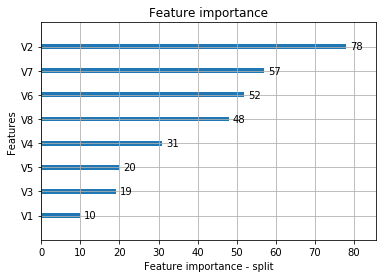

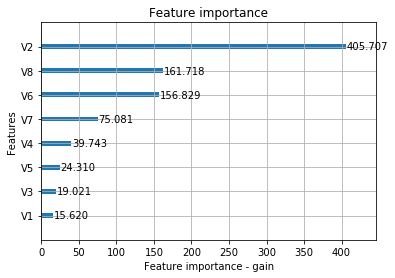

In [56]:
def binary_classification_model_evaluation(true, prob, cutoff = 0.5, beta = 1):
    pred = np.where(prob < cutoff, 0, 1)
    V0 = sklearn.metrics.accuracy_score(true, pred) # Accuracy classification score
    V1 = sklearn.metrics.average_precision_score(true, pred) # Compute average precision (AP) from prediction scores
    V2 = sklearn.metrics.balanced_accuracy_score(true, pred) # Compute the balanced accuracy
    V3 = sklearn.metrics.brier_score_loss(true, pred) # Compute the Brier score
    V4 = sklearn.metrics.cohen_kappa_score(true, pred) # Cohen’s kappa: a statistic that measures inter-annotator agreement
    V5 = sklearn.metrics.f1_score(true, pred) # Compute the F1 score, also known as balanced F-score or F-measure
    V6 = sklearn.metrics.fbeta_score(true, pred, beta) # Compute the F-beta score
    V7 = sklearn.metrics.hamming_loss(true, pred) # Compute the average Hamming loss
    V8 = sklearn.metrics.hinge_loss(true, pred) # Average hinge loss (non-regularized)
    V9 = sklearn.metrics.jaccard_score(true, pred) # Jaccard similarity coefficient score
    V10 = sklearn.metrics.log_loss(true, pred) # Log loss, aka logistic loss or cross-entropy loss
    V11 = sklearn.metrics.matthews_corrcoef(true, pred) # Compute the Matthews correlation coefficient (MCC)
    V12 = sklearn.metrics.precision_score(true, pred) # Compute the precision
    V13 = sklearn.metrics.recall_score(true, pred) # Compute the recall
    V14 = sklearn.metrics.roc_auc_score(true, prob) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
    V15 = sklearn.metrics.zero_one_loss(true, pred) # Zero-one classification loss
    scores = [V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15]
    results = {'function': ["accuracy_score", "average_precision_score", "balanced_accuracy_score", "brier_score_loss",
                            "cohen_kappa_score", "f1_score", "fbeta_score", "hamming_loss", "hinge_loss", "jaccard_score",
                            "log_loss", "matthews_corrcoef", "precision_score", "recall_score", "roc_auc_score", "zero_one_loss"],
               'scores': scores,
               'function description': ["Accuracy classification score", "Average precision", "Balanced accuracy", "Brier score",
                                        "Cohen’s kappa - inter-annotator agreement", "F1 score (balanced F-score, balanced F-measure)",
                                        "F-beta score", "Average Hamming loss", "Average hinge loss (non-regularized)",
                                        "Jaccard similarity coefficient score", "Log loss (logistic loss, cross-entropy loss)", 
                                        "Matthews correlation coefficient (MCC)", "Precision", "Recall (Sensitivity, True Positive Rate)", 
                                        "Area Under the Receiver Operating Characteristic Curve (ROC AUC)", "Zero-one classification loss"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

LGBM_model_best = LGBM_model_grid.best_estimator_
LGBM_model_best_train = LGBM_model_best.predict_proba(X_train)
LGBM_model_best_train = pd.DataFrame(data = LGBM_model_best_train, columns = ["negative", "positive"])
LGBM_model_best_train = np.array(LGBM_model_best_train["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best_validation_train_dataset_")
display(binary_classification_model_evaluation(Y_train, LGBM_model_best_train))
LGBM_model_best_test = LGBM_model_best.predict_proba(X_test)
LGBM_model_best_test = pd.DataFrame(data = LGBM_model_best_test, columns = ["negative", "positive"])
LGBM_model_best_test = np.array(LGBM_model_best_test["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best_validation_validation_dataset_")
display(binary_classification_model_evaluation(Y_test, LGBM_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_estimator_")
display(LGBM_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_params_")
display(LGBM_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_estimator_Metrics")
display(results[results["params"] == LGBM_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.best_score_")
display(LGBM_model_best.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.feature_importances_")
display(LGBM_model_best.feature_importances_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.feature_importances_scaled_splits")
dictionary = dict(zip(data.columns[:-1], LGBM_model_best.feature_importances_/LGBM_model_best.feature_importances_.sum()))
display(dictionary)
print("lgb.plot_importance(LGBM_model_best)")
display(lgb.plot_importance(LGBM_model_best, importance_type = "split", xlabel = "Feature importance - split"))
print("lgb.plot_importance(LGBM_model_best)")
display(lgb.plot_importance(LGBM_model_best, importance_type = "gain", xlabel = "Feature importance - gain"))

# LightGBM Regression:
## Model implementation & training:

In [65]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("diamonds.csv", index_col = 0)
data["cut"] = pd.Categorical(data["cut"])
data["color"] = pd.Categorical(data["color"])
data["clarity"] = pd.Categorical(data["clarity"])
data = pd.get_dummies(data, columns = ["cut"])
data = pd.get_dummies(data, columns = ["color"])
data = pd.get_dummies(data, columns = ["clarity"])
data = data.sample(n = 10000, random_state = 42) 
Y = data["price"]
X = data.drop(["price"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

params_base = {'boosting_type': 'gbdt',
               'objective': 'regression',
               'random_state': 42,
               'max_depth' : -1,
               'njobs': -1,
               'silent': True}

params_grid = {'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'num_leaves': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'colsample_bytree' : np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'subsample' : np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'reg_alpha' : np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist(),
               'reg_lambda' : np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist()}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'mean_absolute_error',
             'return_train_score': False}

scoring = {'explained_variance_score': sklearn.metrics.make_scorer(sklearn.metrics.explained_variance_score, greater_is_better = True),
           'max_error': sklearn.metrics.make_scorer(sklearn.metrics.max_error, greater_is_better = False),
           'mean_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error, greater_is_better = False),
           'mean_squared_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better = False),
           'median_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.median_absolute_error, greater_is_better = False),
           'r2_score': sklearn.metrics.make_scorer(sklearn.metrics.r2_score, greater_is_better = True)}

LGBM_model_base = lgb.LGBMRegressor(device = 'cpu',
                                     boosting_type= params_base['boosting_type'],
                                     objective = params_base['objective'],
                                     n_jobs = params_base['njobs'],
                                     silent = params_base['silent'],
                                     random_state = params_base['random_state'],
                                     max_depth = params_base['max_depth'])

LGBM_model_grid = sklearn.model_selection.GridSearchCV(estimator = LGBM_model_base, 
                                                       param_grid = params_grid,
                                                       cv = params_cv['cv'],
                                                       n_jobs = params_cv['n_jobs'],
                                                       verbose = params_cv['verbose'],
                                                       scoring = scoring,
                                                       refit = params_cv['refit'],
                                                       return_train_score = params_cv['return_train_score'])

LGBM_model_grid.fit(X_train, Y_train)

X_train (8000, 9)
Y_train (8000,)
X_test (2000, 9)
Y_test (2000,)
Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 225 out of 256 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.2s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0, device='cpu',
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective='regression', random_state=42,
                                     reg_alpha=0.0, reg_lam...
             scoring={'explained_variance_score': make_scorer(explained_variance_score),
                      'max_error': make_scorer(max_error, greater_is_better=False),
                      'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
                      'mean_squared_error': make_scorer(mean_squared_error, gre

## Grid Search Evaluation:

In [66]:
results = LGBM_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_max_error"] = results["mean_test_max_error"] * (-1)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"] * (-1)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"] * (-1)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"] * (-1)
results = results.sort_values(["mean_test_mean_absolute_error"], ascending = [True])
results["mean_test_explained_variance_score"] = results["mean_test_explained_variance_score"].apply(lambda x: '%.5f' % x)
results["mean_test_max_error"] = results["mean_test_max_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"].apply(lambda x: '%.5f' % x)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_r2_score"] = results["mean_test_r2_score"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_score_")
display(LGBM_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.multimetric_")
display(LGBM_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.scorer_")
display(LGBM_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.n_splits_")
display(LGBM_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.refit_time_")
display(LGBM_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
88  {'colsample_bytree': 0.8505, 'learning_rate': ...   
89  {'colsample_bytree': 0.8505, 'learning_rate': ...   
93  {'colsample_bytree': 0.8505, 'learning_rate': ...   
92  {'colsample_bytree': 0.8505, 'learning_rate': ...   
85  {'colsample_bytree': 0.8505, 'learning_rate': ...   
..                                                ...   
59  {'colsample_bytree': 0.8272, 'learning_rate': ...   
43  {'colsample_bytree': 0.8272, 'learning_rate': ...   
42  {'colsample_bytree': 0.8272, 'learning_rate': ...   
46  {'colsample_bytree': 0.8272, 'learning_rate': ...   
47  {'colsample_bytree': 0.8272, 'learning_rate': ...   

   mean_test_explained_variance_score mean_test_max_error  \
88                            0.96856          6727.86413   
89                            0.96856          6727.86413   
93                            0.96852          6744.26672   
92                            0.96852          6744.26672   
85                            0.96811          6917.39424   
..                                ...                 ...   
59                            0.96202          6249.10500   
43                            0.96214          6183.93660   
42                            0.96214          6183.93660   
46                            0.96213          6184.16425   
47                            0.96213          6184.16425   

   mean_test_mean_absolute_error mean_test_mean_squared_error  \
88                     358.01065                 499777.88421   
89                     358.01065                 499777.88421   
93                     358.74254                 500370.32363   
92                     358.74254                 500370.32363   
85                     363.04988                 506976.19534   
..                           ...                          ...   
59                     403.16966                 603285.39872   
43                     404.30926                 601353.14202   
42                     404.30926                 601353.14202   
46                     404.32074                 601380.99506   
47                     404.32074                 601380.99506   

   mean_test_median_absolute_error mean_test_r2_score  
88                       142.67798            0.96855  
89                       142.67798            0.96855  
93                       143.13977            0.96851  
92                       143.13977            0.96851  
85                       144.39800            0.96811  
..                             ...                ...  
59                       153.45429            0.96201  
43                       156.97547            0.96213  
42                       156.97547            0.96213  
46                       156.96385            0.96212  
47                       156.96385            0.96212  

[128 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_score_


-358.01065370080676

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.scorer_


{'explained_variance_score': make_scorer(explained_variance_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'r2_score': make_scorer(r2_score)}

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.refit_time_


0.041887521743774414

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best_validation_train_dataset_


function        scores  \
0  explained_variance_score       0.98458   
1                 max_error    5228.66844   
2       mean_absolute_error     276.41428   
3        mean_squared_error  245080.63766   
4     median_absolute_error     130.30639   
5                  r2_score       0.98458   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best_validation_validation_dataset_


function        scores  \
0  explained_variance_score       0.97546   
1                 max_error    5329.89417   
2       mean_absolute_error     330.81568   
3        mean_squared_error  395810.90235   
4     median_absolute_error     141.22340   
5                  r2_score       0.97544   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_estimator_


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8505,
              device='cpu', importance_type='split', learning_rate=0.1961,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=34, n_jobs=-1, num_leaves=29,
              objective='regression', random_state=42, reg_alpha=3.4286,
              reg_lambda=8.9688, silent=True, subsample=0.587,
              subsample_for_bin=200000, subsample_freq=0)

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_params_


{'colsample_bytree': 0.8505,
 'learning_rate': 0.1961,
 'n_estimators': 34,
 'num_leaves': 29,
 'reg_alpha': 3.4286,
 'reg_lambda': 8.9688,
 'subsample': 0.587}

----------------------------------------------------------------------------------------------------------------------
LGBM_model_grid.best_estimator_Metrics


params  \
88  {'colsample_bytree': 0.8505, 'learning_rate': ...   

   mean_test_explained_variance_score mean_test_max_error  \
88                            0.96856          6727.86413   

   mean_test_mean_absolute_error mean_test_mean_squared_error  \
88                     358.01065                 499777.88421   

   mean_test_median_absolute_error mean_test_r2_score  
88                       142.67798            0.96855

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.best_score_


defaultdict(collections.OrderedDict, {})

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.feature_importances_


array([117,  19, 151, 119,  88,  37, 104, 189, 128])

----------------------------------------------------------------------------------------------------------------------
LGBM_model_best.feature_importances_scaled_splits


{'carat': 0.12289915966386554,
 'cut': 0.01995798319327731,
 'color': 0.15861344537815125,
 'clarity': 0.125,
 'depth': 0.09243697478991597,
 'table': 0.038865546218487396,
 'price': 0.1092436974789916,
 'x': 0.19852941176470587,
 'y': 0.13445378151260504}

lgb.plot_importance(LGBM_model_best)


lgb.plot_importance(LGBM_model_best)


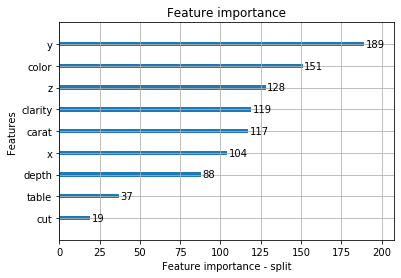

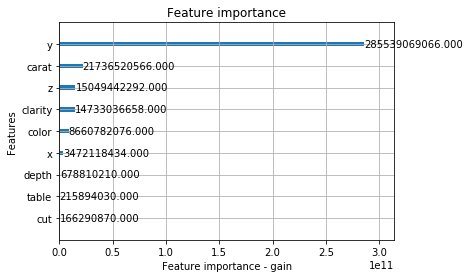

In [67]:
def regression_model_evaluation(true, pred):
    
    V0 = sklearn.metrics.explained_variance_score(true, pred) # Explained variance regression score function
    V1 = sklearn.metrics.max_error(true, pred) # max_error metric calculates the maximum residual error
    V2 = sklearn.metrics.mean_absolute_error(true, pred) # Mean absolute error regression loss
    V3 = sklearn.metrics.mean_squared_error(true, pred) # Mean squared error regression loss
    V4 = sklearn.metrics.median_absolute_error(true, pred) # Median absolute error regression loss
    V5 = sklearn.metrics.r2_score(true, pred) # R^2 (coefficient of determination) regression score function.
    
    scores = [V0, V1, V2, V3, V4, V5]
    results = {'function': ["explained_variance_score", "max_error", "mean_absolute_error", "mean_squared_error",
                            "median_absolute_error", "r2_score"],
               'scores': scores,
               'function description': ["Explained variance regression score", "Maximum residual error",
                                        "Mean absolute error regression loss", "Mean squared error regression loss",
                                        "Median absolute error regression loss", "R^2 regression score"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

LGBM_model_best = LGBM_model_grid.best_estimator_
LGBM_model_best_train = LGBM_model_best.predict(X_train)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best_validation_train_dataset_")
display(regression_model_evaluation(Y_train, LGBM_model_best_train))
LGBM_model_best = LGBM_model_grid.best_estimator_
LGBM_model_best_test = LGBM_model_best.predict(X_test)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best_validation_validation_dataset_")
display(regression_model_evaluation(Y_test, LGBM_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_estimator_")
display(LGBM_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_params_")
display(LGBM_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_grid.best_estimator_Metrics")
display(results[results["params"] == LGBM_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.best_score_")
display(LGBM_model_best.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.feature_importances_")
display(LGBM_model_best.feature_importances_)
print("----------------------------------------------------------------------------------------------------------------------")
print("LGBM_model_best.feature_importances_scaled_splits")
dictionary = dict(zip(data.columns[:-1], LGBM_model_best.feature_importances_/LGBM_model_best.feature_importances_.sum()))
display(dictionary)
print("lgb.plot_importance(LGBM_model_best)")
display(lgb.plot_importance(LGBM_model_best, importance_type = "split", xlabel = "Feature importance - split"))
print("lgb.plot_importance(LGBM_model_best)")
display(lgb.plot_importance(LGBM_model_best, importance_type = "gain", xlabel = "Feature importance - gain"))


# XGBoost Classification:
## Model implementation & training:

In [128]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("Pima-Indians-Diabetes.csv", header = None, names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Target'])
Y = data["Target"]
X = data.drop(["Target"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

params_base = {'tree_method': 'hist',
               'booster': 'gbtree',
               'objective': 'binary:logistic',
               'random_state': 42,
               'njobs': -1,
               'verbosity': 1,
               'missing': "Nan"}

params_grid = {'max_depth': np.random.uniform(low = 1, high = 20, size = 2).round(decimals = 0).astype(int).tolist(),
               'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'gamma': np.random.uniform(low = 0.0, high = 25, size = 2).round(decimals = 4).tolist(),
               'min_child_weight ': np.random.uniform(low = 0.0, high = 25, size = 2).round(decimals = 4).tolist(),
               'colsample_bytree': np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'subsample': np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'reg_alpha': np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist(),
               'reg_lambda': np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist()}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'accuracy_score',
             'return_train_score': False}

scoring = {'roc_auc_score': sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score, greater_is_better = True),
           'accuracy_score': sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score, greater_is_better = True),
           'f1_score': sklearn.metrics.make_scorer(sklearn.metrics.f1_score, greater_is_better = True),
           'precision_score': sklearn.metrics.make_scorer(sklearn.metrics.precision_score, greater_is_better = True),
           'recall_score': sklearn.metrics.make_scorer(sklearn.metrics.recall_score, greater_is_better = True),
           'zero_one_loss': sklearn.metrics.make_scorer(sklearn.metrics.zero_one_loss, greater_is_better = False)}

XGB_model_base = xgb.XGBClassifier(tree_method = params_base['tree_method'],
                                   booster = params_base['booster'],
                                   objective = params_base['objective'],
                                   random_state = params_base['random_state'],
                                   n_jobs = params_base['njobs'],
                                   verbosity = params_base['verbosity'])

XGB_model_grid = sklearn.model_selection.GridSearchCV(estimator = XGB_model_base, 
                                                      param_grid = params_grid,
                                                      cv = params_cv['cv'],
                                                      n_jobs = params_cv['n_jobs'],
                                                      verbose = params_cv['verbose'],
                                                      scoring = scoring,
                                                      refit = params_cv['refit'],
                                                      return_train_score = params_cv['return_train_score'])

XGB_model_grid.fit(X_train, Y_train)

X_train (614, 8)
Y_train (614,)
X_test (154, 8)
Y_test (154,)
Fitting 2 folds for each of 512 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:   11.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_...
             pre_dispatch='2*n_jobs', refit='accuracy_score',
             return_train_score=False,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                   

## Grid Search Evaluation:

In [129]:
results = XGB_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"] * (-1)
results = results.sort_values(["mean_test_accuracy_score"], ascending = [False])
results["mean_test_roc_auc_score"] = results["mean_test_roc_auc_score"].apply(lambda x: '%.5f' % x)
results["mean_test_accuracy_score"] = results["mean_test_accuracy_score"].apply(lambda x: '%.5f' % x)
results["mean_test_f1_score"] = results["mean_test_f1_score"].apply(lambda x: '%.5f' % x)
results["mean_test_precision_score"] = results["mean_test_precision_score"].apply(lambda x: '%.5f' % x)
results["mean_test_recall_score"] = results["mean_test_recall_score"].apply(lambda x: '%.5f' % x)
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.classes_")
display(XGB_model_grid.classes_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.multimetric_")
display(XGB_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.scorer_")
display(XGB_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.n_splits_")
display(XGB_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.refit_time_")
display(XGB_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
367  {'colsample_bytree': 0.7694, 'gamma': 11.4227,...   
103  {'colsample_bytree': 0.7059, 'gamma': 11.4227,...   
375  {'colsample_bytree': 0.7694, 'gamma': 11.4227,...   
335  {'colsample_bytree': 0.7694, 'gamma': 11.4227,...   
343  {'colsample_bytree': 0.7694, 'gamma': 11.4227,...   
..                                                 ...   
218  {'colsample_bytree': 0.7059, 'gamma': 24.6773,...   
217  {'colsample_bytree': 0.7059, 'gamma': 24.6773,...   
216  {'colsample_bytree': 0.7059, 'gamma': 24.6773,...   
214  {'colsample_bytree': 0.7059, 'gamma': 24.6773,...   
256  {'colsample_bytree': 0.7694, 'gamma': 11.4227,...   

    mean_test_roc_auc_score mean_test_accuracy_score mean_test_f1_score  \
367                 0.69610                  0.76384            0.58042   
103                 0.69610                  0.76384            0.58042   
375                 0.69610                  0.76384            0.58042   
335                 0.69610                  0.76384            0.58042   
343                 0.69610                  0.76384            0.58042   
..                      ...                      ...                ...   
218                 0.50000                  0.65309            0.00000   
217                 0.50000                  0.65309            0.00000   
216                 0.50000                  0.65309            0.00000   
214                 0.50000                  0.65309            0.00000   
256                 0.50000                  0.65309            0.00000   

    mean_test_precision_score mean_test_recall_score mean_test_zero_one_loss  
367                   0.76076                0.47443                 0.23616  
103                   0.76076                0.47443                 0.23616  
375                   0.76076                0.47443                 0.23616  
335                   0.76076                0.47443                 0.23616  
343                   0.76076                0.47443                 0.23616  
..                        ...                    ...                     ...  
218                   0.00000                0.00000                 0.34691  
217                   0.00000                0.00000                 0.34691  
216                   0.00000                0.00000                 0.34691  
214                   0.00000                0.00000                 0.34691  
256                   0.00000                0.00000                 0.34691  

[512 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.classes_


array([0, 1], dtype=int64)

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.scorer_


{'roc_auc_score': make_scorer(roc_auc_score),
 'accuracy_score': make_scorer(accuracy_score),
 'f1_score': make_scorer(f1_score),
 'precision_score': make_scorer(precision_score),
 'recall_score': make_scorer(recall_score),
 'zero_one_loss': make_scorer(zero_one_loss, greater_is_better=False)}

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.refit_time_


0.5115342140197754

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
XGB_model_best_validation_train_dataset_


function   scores  \
0            accuracy_score  0.77199   
1   average_precision_score  0.55435   
2   balanced_accuracy_score  0.71318   
3          brier_score_loss  0.22801   
4         cohen_kappa_score  0.45867   
5                  f1_score  0.61326   
6               fbeta_score  0.61326   
7              hamming_loss  0.22801   
8                hinge_loss  0.88111   
9             jaccard_score  0.44223   
10                 log_loss  7.87534   
11        matthews_corrcoef  0.47339   
12          precision_score  0.74497   
13             recall_score  0.52113   
14            roc_auc_score  0.85872   
15            zero_one_loss  0.22801   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
XGB_model_best_validation_validation_dataset_


function   scores  \
0            accuracy_score  0.78571   
1   average_precision_score  0.59328   
2   balanced_accuracy_score  0.74848   
3          brier_score_loss  0.21429   
4         cohen_kappa_score  0.51572   
5                  f1_score  0.67327   
6               fbeta_score  0.67327   
7              hamming_loss  0.21429   
8                hinge_loss  0.85714   
9             jaccard_score  0.50746   
10                 log_loss  7.40123   
11        matthews_corrcoef  0.52028   
12          precision_score  0.73913   
13             recall_score  0.61818   
14            roc_auc_score  0.81625   
15            zero_one_loss  0.21429   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7059, gamma=11.4227,
              learning_rate=0.4495, max_delta_step=0, max_depth=18,
              min_child_weight=1, min_child_weight =10.0779, missing=None,
              n_estimators=31, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=1.6386,
              reg_lambda=1.5412, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9344, tree_method='hist', verbosity=1)

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_params_


{'colsample_bytree': 0.7059,
 'gamma': 11.4227,
 'learning_rate': 0.4495,
 'max_depth': 18,
 'min_child_weight ': 10.0779,
 'n_estimators': 31,
 'reg_alpha': 1.6386,
 'reg_lambda': 1.5412,
 'subsample': 0.9344}

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_estimator_Metrics


params mean_test_roc_auc_score  \
71  {'colsample_bytree': 0.7059, 'gamma': 11.4227,...                 0.69610   

   mean_test_accuracy_score mean_test_f1_score mean_test_precision_score  \
71                  0.76384            0.58042                   0.76076   

   mean_test_recall_score mean_test_zero_one_loss  
71                0.47443                 0.23616

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_score_


0.7638436482084691

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_


{'V1': 0.0,
 'V2': 0.28525528,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.20970331,
 'V6': 0.14976372,
 'V7': 0.0,
 'V8': 0.3552777}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_weight


{'V8': 2, 'V6': 3, 'V5': 1, 'V2': 5}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_gain


{'V8': 34.98856735,
 'V6': 14.749075566666667,
 'V5': 20.6520653,
 'V2': 28.09259778}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_cover


{'V8': 123.5284765,
 'V6': 79.33033999999999,
 'V5': 73.5,
 'V2': 109.38568133999999}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_total_gain


{'V8': 69.9771347, 'V6': 44.2472267, 'V5': 20.6520653, 'V2': 140.4629889}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_total_cover


{'V8': 247.056953, 'V6': 237.99102, 'V5': 73.5, 'V2': 546.9284067}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_plot


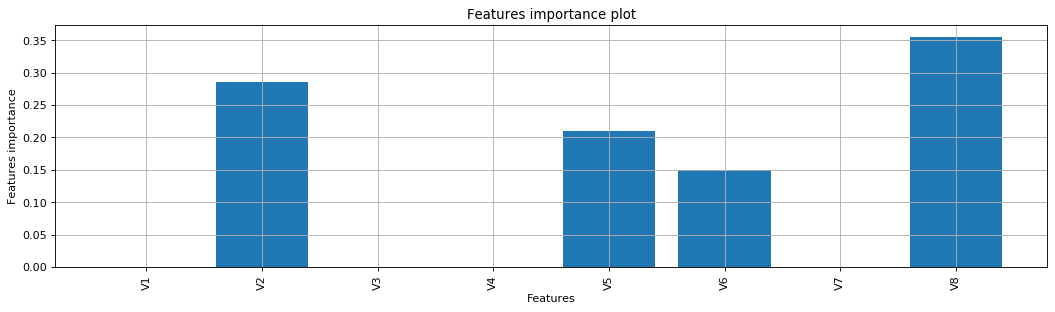

In [133]:
def binary_classification_model_evaluation(true, prob, cutoff = 0.5, beta = 1):
    pred = np.where(prob < cutoff, 0, 1)
    V0 = sklearn.metrics.accuracy_score(true, pred) # Accuracy classification score
    V1 = sklearn.metrics.average_precision_score(true, pred) # Compute average precision (AP) from prediction scores
    V2 = sklearn.metrics.balanced_accuracy_score(true, pred) # Compute the balanced accuracy
    V3 = sklearn.metrics.brier_score_loss(true, pred) # Compute the Brier score
    V4 = sklearn.metrics.cohen_kappa_score(true, pred) # Cohen’s kappa: a statistic that measures inter-annotator agreement
    V5 = sklearn.metrics.f1_score(true, pred) # Compute the F1 score, also known as balanced F-score or F-measure
    V6 = sklearn.metrics.fbeta_score(true, pred, beta) # Compute the F-beta score
    V7 = sklearn.metrics.hamming_loss(true, pred) # Compute the average Hamming loss
    V8 = sklearn.metrics.hinge_loss(true, pred) # Average hinge loss (non-regularized)
    V9 = sklearn.metrics.jaccard_score(true, pred) # Jaccard similarity coefficient score
    V10 = sklearn.metrics.log_loss(true, pred) # Log loss, aka logistic loss or cross-entropy loss
    V11 = sklearn.metrics.matthews_corrcoef(true, pred) # Compute the Matthews correlation coefficient (MCC)
    V12 = sklearn.metrics.precision_score(true, pred) # Compute the precision
    V13 = sklearn.metrics.recall_score(true, pred) # Compute the recall
    V14 = sklearn.metrics.roc_auc_score(true, prob) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
    V15 = sklearn.metrics.zero_one_loss(true, pred) # Zero-one classification loss
    scores = [V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15]
    results = {'function': ["accuracy_score", "average_precision_score", "balanced_accuracy_score", "brier_score_loss",
                            "cohen_kappa_score", "f1_score", "fbeta_score", "hamming_loss", "hinge_loss", "jaccard_score",
                            "log_loss", "matthews_corrcoef", "precision_score", "recall_score", "roc_auc_score", "zero_one_loss"],
               'scores': scores,
               'function description': ["Accuracy classification score", "Average precision", "Balanced accuracy", "Brier score",
                                        "Cohen’s kappa - inter-annotator agreement", "F1 score (balanced F-score, balanced F-measure)",
                                        "F-beta score", "Average Hamming loss", "Average hinge loss (non-regularized)",
                                        "Jaccard similarity coefficient score", "Log loss (logistic loss, cross-entropy loss)", 
                                        "Matthews correlation coefficient (MCC)", "Precision", "Recall (Sensitivity, True Positive Rate)", 
                                        "Area Under the Receiver Operating Characteristic Curve (ROC AUC)", "Zero-one classification loss"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

XGB_model_best = XGB_model_grid.best_estimator_
XGB_model_best_train = XGB_model_best.predict_proba(X_train)
XGB_model_best_train = pd.DataFrame(data = XGB_model_best_train, columns = ["negative", "positive"])
XGB_model_best_train = np.array(XGB_model_best_train["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best_validation_train_dataset_")
display(binary_classification_model_evaluation(Y_train, XGB_model_best_train))
XGB_model_best_test = XGB_model_best.predict_proba(X_test)
XGB_model_best_test = pd.DataFrame(data = XGB_model_best_test, columns = ["negative", "positive"])
XGB_model_best_test = np.array(XGB_model_best_test["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best_validation_validation_dataset_")
display(binary_classification_model_evaluation(Y_test, XGB_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_estimator_")
display(XGB_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_params_")
display(XGB_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_estimator_Metrics")
display(results[results["params"] == XGB_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_score_")
display(XGB_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_")
dictionary = dict(zip(data.columns[:-1], XGB_model_best.feature_importances_))
display(dictionary)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_weight")
display(XGB_model_best.get_booster().get_score(importance_type = "weight"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_gain")
display(XGB_model_best.get_booster().get_score(importance_type = "gain"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_cover")
display(XGB_model_best.get_booster().get_score(importance_type = "cover"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_total_gain")
display(XGB_model_best.get_booster().get_score(importance_type = "total_gain"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_total_cover")
display(XGB_model_best.get_booster().get_score(importance_type = "total_cover"))
print("----------------------------------------------------------------------------------------------------------------------")
fig = plt.figure(figsize = (16, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
print("XGB_model_best.feature_importances_plot")
plt.bar(x = X.columns, height = XGB_model_best.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Features importance")
plt.title("Features importance plot")
plt.grid()

# XGBoost Regression:
## Model implementation & training:

In [134]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("diamonds.csv", index_col = 0)
data["cut"] = pd.Categorical(data["cut"])
data["color"] = pd.Categorical(data["color"])
data["clarity"] = pd.Categorical(data["clarity"])
data = pd.get_dummies(data, columns = ["cut"])
data = pd.get_dummies(data, columns = ["color"])
data = pd.get_dummies(data, columns = ["clarity"])
data = data.sample(n = 10000, random_state = 42) 
Y = data["price"]
X = data.drop(["price"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

params_base = {'tree_method': 'hist',
               'booster': 'gbtree',
               'objective': 'reg:squarederror',
               'random_state': 42,
               'njobs': -1,
               'verbosity': 1,
               'missing': "Nan"}

params_grid = {'max_depth': np.random.uniform(low = 1, high = 20, size = 2).round(decimals = 0).astype(int).tolist(),
               'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'gamma': np.random.uniform(low = 0.0, high = 25, size = 2).round(decimals = 4).tolist(),
               'min_child_weight ': np.random.uniform(low = 0.0, high = 25, size = 2).round(decimals = 4).tolist(),
               'colsample_bytree': np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'subsample': np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'reg_alpha': np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist(),
               'reg_lambda': np.random.uniform(low = 0, high = 10, size = 2).round(decimals = 4).tolist()}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'mean_absolute_error',
             'return_train_score': False}

scoring = {'explained_variance_score': sklearn.metrics.make_scorer(sklearn.metrics.explained_variance_score, greater_is_better = True),
           'max_error': sklearn.metrics.make_scorer(sklearn.metrics.max_error, greater_is_better = False),
           'mean_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error, greater_is_better = False),
           'mean_squared_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better = False),
           'median_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.median_absolute_error, greater_is_better = False),
           'r2_score': sklearn.metrics.make_scorer(sklearn.metrics.r2_score, greater_is_better = True)}

XGB_model_base = xgb.XGBRegressor(tree_method = params_base['tree_method'],
                                  booster = params_base['booster'],
                                  objective = params_base['objective'],
                                  random_state = params_base['random_state'],
                                  n_jobs = params_base['njobs'],
                                  verbosity = params_base['verbosity'])

XGB_model_grid = sklearn.model_selection.GridSearchCV(estimator = XGB_model_base, 
                                                      param_grid = params_grid,
                                                      cv = params_cv['cv'],
                                                      n_jobs = params_cv['n_jobs'],
                                                      verbose = params_cv['verbose'],
                                                      scoring = scoring,
                                                      refit = params_cv['refit'],
                                                      return_train_score = params_cv['return_train_score'])

XGB_model_grid.fit(X_train, Y_train)

X_train (8000, 26)
Y_train (8000,)
X_test (2000, 26)
Y_test (2000,)
Fitting 2 folds for each of 512 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:  1.0min finished
C:\Users\admin\Anaconda3\envs\GPU_ML\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alph...
             scoring={'explained_variance_score': make_scorer(explained_variance_score),
                      'max_error': make_scorer(max_error, greater_is_better=False),
                      'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
                      'mean_squared_error': make_

## Grid Search Evaluation:

In [135]:
results = XGB_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_max_error"] = results["mean_test_max_error"] * (-1)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"] * (-1)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"] * (-1)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"] * (-1)
results = results.sort_values(["mean_test_mean_squared_error"], ascending = [True])
results["mean_test_explained_variance_score"] = results["mean_test_explained_variance_score"].apply(lambda x: '%.5f' % x)
results["mean_test_max_error"] = results["mean_test_max_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"].apply(lambda x: '%.5f' % x)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_r2_score"] = results["mean_test_r2_score"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.multimetric_")
display(XGB_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.scorer_")
display(XGB_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.n_splits_")
display(XGB_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.refit_time_")
display(XGB_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
348  {'colsample_bytree': 0.9091, 'gamma': 21.9451,...   
332  {'colsample_bytree': 0.9091, 'gamma': 21.9451,...   
456  {'colsample_bytree': 0.9091, 'gamma': 20.389, ...   
472  {'colsample_bytree': 0.9091, 'gamma': 20.389, ...   
344  {'colsample_bytree': 0.9091, 'gamma': 21.9451,...   
..                                                 ...   
155  {'colsample_bytree': 0.5456, 'gamma': 20.389, ...   
19   {'colsample_bytree': 0.5456, 'gamma': 21.9451,...   
3    {'colsample_bytree': 0.5456, 'gamma': 21.9451,...   
27   {'colsample_bytree': 0.5456, 'gamma': 21.9451,...   
11   {'colsample_bytree': 0.5456, 'gamma': 21.9451,...   

    mean_test_explained_variance_score mean_test_max_error  \
348                            0.96941          6503.81934   
332                            0.96941          6503.81934   
456                            0.96938          6437.65381   
472                            0.96938          6437.65381   
344                            0.96938          6431.89746   
..                                 ...                 ...   
155                            0.92143         10264.98413   
19                             0.92141         10205.03149   
3                              0.92141         10205.03149   
27                             0.92139         10222.84863   
11                             0.92139         10222.84863   

    mean_test_mean_absolute_error mean_test_mean_squared_error  \
348                     350.96424                 486453.35972   
332                     350.96424                 486453.35972   
456                     351.99074                 486935.12884   
472                     351.99074                 486935.12884   
344                     351.37938                 486988.24703   
..                            ...                          ...   
155                     607.15630                1248763.25062   
19                      606.26490                1248965.36026   
3                       606.26490                1248965.36026   
27                      607.15769                1249319.53824   
11                      607.15769                1249319.53824   

    mean_test_median_absolute_error mean_test_r2_score  
348                       128.67316            0.96940  
332                       128.67316            0.96940  
456                       128.85539            0.96937  
472                       128.85539            0.96937  
344                       128.86227            0.96937  
..                              ...                ...  
155                       247.67386            0.92143  
19                        248.45232            0.92141  
3                         248.45232            0.92141  
27                        247.43802            0.92139  
11                        247.43802            0.92139  

[512 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.scorer_


{'explained_variance_score': make_scorer(explained_variance_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'r2_score': make_scorer(r2_score)}

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.refit_time_


2.240020751953125

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
XGB_model_best_validation_train_dataset_


function       scores  \
0  explained_variance_score      0.99861   
1                 max_error   2892.31152   
2       mean_absolute_error     77.27897   
3        mean_squared_error  22035.53322   
4     median_absolute_error     34.54028   
5                  r2_score      0.99861   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
XGB_model_best_validation_validation_dataset_


function        scores  \
0  explained_variance_score       0.97400   
1                 max_error    5416.43457   
2       mean_absolute_error     324.69911   
3        mean_squared_error  419304.26973   
4     median_absolute_error     121.36017   
5                  r2_score       0.97399   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9091, gamma=21.9451,
             importance_type='gain', learning_rate=0.297, max_delta_step=0,
             max_depth=16, min_child_weight=1, min_child_weight =13.254,
             missing=None, n_estimators=35, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=4.6306,
             reg_lambda=8.5429, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.9388, tree_method='hist', verbosity=1)

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_params_


{'colsample_bytree': 0.9091,
 'gamma': 21.9451,
 'learning_rate': 0.297,
 'max_depth': 16,
 'min_child_weight ': 13.254,
 'n_estimators': 35,
 'reg_alpha': 4.6306,
 'reg_lambda': 8.5429,
 'subsample': 0.9388}

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_estimator_Metrics


params  \
332  {'colsample_bytree': 0.9091, 'gamma': 21.9451,...   

    mean_test_explained_variance_score mean_test_max_error  \
332                            0.96941          6503.81934   

    mean_test_mean_absolute_error mean_test_mean_squared_error  \
332                     350.96424                 486453.35972   

    mean_test_median_absolute_error mean_test_r2_score  
332                       128.67316            0.96940

----------------------------------------------------------------------------------------------------------------------
XGB_model_grid.best_score_


-350.9642424659729

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_


{'carat': 0.011344548,
 'depth': 0.0015200828,
 'table': 0.0010524449,
 'x': 0.0040533794,
 'y': 0.5788598,
 'z': 0.06150722,
 'cut_Fair': 0.0012059152,
 'cut_Good': 0.001027659,
 'cut_Ideal': 0.0027298464,
 'cut_Premium': 0.0020626597,
 'cut_Very Good': 0.0009838805,
 'color_D': 0.013054379,
 'color_E': 0.0058182525,
 'color_F': 0.0031241197,
 'color_G': 0.004252582,
 'color_H': 0.010344084,
 'color_I': 0.013709974,
 'color_J': 0.029189888,
 'clarity_I1': 0.05024485,
 'clarity_IF': 0.066411175,
 'clarity_SI1': 0.014524775,
 'clarity_SI2': 0.0393839,
 'clarity_VS1': 0.008861136,
 'clarity_VS2': 0.0068634376,
 'clarity_VVS1': 0.029783292,
 'clarity_VVS2': 0.03808668}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_weight


{'y': 2483,
 'carat': 4970,
 'clarity_SI2': 475,
 'color_J': 419,
 'color_I': 496,
 'depth': 4873,
 'clarity_I1': 174,
 'color_H': 460,
 'z': 1834,
 'x': 3103,
 'clarity_SI1': 459,
 'clarity_VS2': 280,
 'table': 3232,
 'clarity_VVS2': 188,
 'clarity_IF': 92,
 'clarity_VS1': 271,
 'clarity_VVS1': 146,
 'cut_Good': 230,
 'color_G': 318,
 'cut_Very Good': 462,
 'cut_Ideal': 335,
 'cut_Fair': 43,
 'color_D': 213,
 'cut_Premium': 342,
 'color_F': 357,
 'color_E': 217}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_gain


{'y': 75846703.91160442,
 'carat': 1486450.802601531,
 'clarity_SI2': 5160384.249091785,
 'color_J': 3824685.6374212517,
 'color_I': 1796387.0966645617,
 'depth': 199173.03910952804,
 'clarity_I1': 6583470.016290114,
 'color_H': 1355362.2049807818,
 'z': 8059153.533552144,
 'x': 531105.2705418378,
 'clarity_SI1': 1903148.647885846,
 'clarity_VS2': 899300.8699041137,
 'table': 137899.50273101832,
 'clarity_VVS2': 4990411.75266834,
 'clarity_IF': 8701706.979116749,
 'clarity_VS1': 1161054.765080707,
 'clarity_VVS1': 3902438.025619108,
 'cut_Good': 134651.85901047874,
 'color_G': 557206.2696820366,
 'cut_Very Good': 128915.65120368089,
 'cut_Ideal': 357685.66684104456,
 'cut_Fair': 158008.37344511627,
 'color_D': 1710486.1779061982,
 'cut_Premium': 270265.68229132186,
 'color_F': 409346.40468184435,
 'color_E': 762352.5535043759}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_cover


{'y': 281.2066049134112,
 'carat': 113.28692152917505,
 'clarity_SI2': 145.64631578947368,
 'color_J': 126.05011933174224,
 'color_I': 80.26209677419355,
 'depth': 57.213215678226966,
 'clarity_I1': 209.88505747126436,
 'color_H': 82.97608695652174,
 'z': 202.85496183206106,
 'x': 150.6551724137931,
 'clarity_SI1': 111.28976034858388,
 'clarity_VS2': 107.45357142857142,
 'table': 49.99566831683168,
 'clarity_VVS2': 469.8989361702128,
 'clarity_IF': 1804.7934782608695,
 'clarity_VS1': 128.24723247232473,
 'clarity_VVS1': 774.2123287671233,
 'cut_Good': 40.6695652173913,
 'color_G': 88.16037735849056,
 'cut_Very Good': 41.45670995670996,
 'cut_Ideal': 68.77910447761194,
 'cut_Fair': 165.30232558139534,
 'color_D': 472.38497652582157,
 'cut_Premium': 67.09941520467837,
 'color_F': 114.38655462184875,
 'color_E': 316.4193548387097}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_total_gain


{'y': 188327365812.51376,
 'carat': 7387660488.929608,
 'clarity_SI2': 2451182518.3185983,
 'color_J': 1602543282.0795045,
 'color_I': 891007999.9456226,
 'depth': 970570219.5807301,
 'clarity_I1': 1145523782.8344798,
 'color_H': 623466614.2911596,
 'z': 14780487580.534632,
 'x': 1648019654.4913228,
 'clarity_SI1': 873545229.3796033,
 'clarity_VS2': 251804243.57315183,
 'table': 445691192.8266512,
 'clarity_VVS2': 938197409.5016478,
 'clarity_IF': 800557042.0787408,
 'clarity_VS1': 314645841.33687156,
 'clarity_VVS1': 569755951.7403898,
 'cut_Good': 30969927.57241011,
 'color_G': 177191593.75888765,
 'cut_Very Good': 59559030.85610057,
 'cut_Ideal': 119824698.39174992,
 'cut_Fair': 6794360.058139999,
 'color_D': 364333555.8940202,
 'cut_Premium': 92430863.34363209,
 'color_F': 146136666.47141844,
 'color_E': 165430504.11044955}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_total_cover


{'y': 698236.0,
 'carat': 563036.0,
 'clarity_SI2': 69182.0,
 'color_J': 52815.0,
 'color_I': 39810.0,
 'depth': 278800.0,
 'clarity_I1': 36520.0,
 'color_H': 38169.0,
 'z': 372036.0,
 'x': 467483.0,
 'clarity_SI1': 51082.0,
 'clarity_VS2': 30087.0,
 'table': 161586.0,
 'clarity_VVS2': 88341.0,
 'clarity_IF': 166041.0,
 'clarity_VS1': 34755.0,
 'clarity_VVS1': 113035.0,
 'cut_Good': 9354.0,
 'color_G': 28035.0,
 'cut_Very Good': 19153.0,
 'cut_Ideal': 23041.0,
 'cut_Fair': 7108.0,
 'color_D': 100618.0,
 'cut_Premium': 22948.0,
 'color_F': 40836.0,
 'color_E': 68663.0}

----------------------------------------------------------------------------------------------------------------------
XGB_model_best.feature_importances_plot


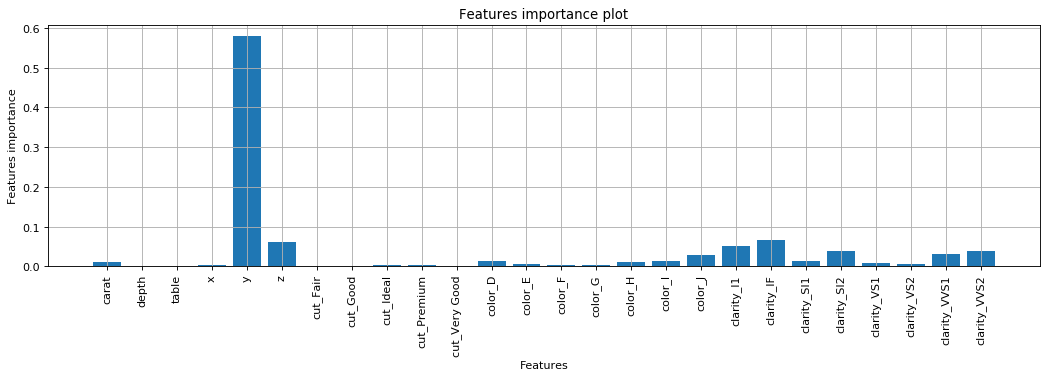

In [140]:
def regression_model_evaluation(true, pred):
    
    V0 = sklearn.metrics.explained_variance_score(true, pred) # Explained variance regression score function
    V1 = sklearn.metrics.max_error(true, pred) # max_error metric calculates the maximum residual error
    V2 = sklearn.metrics.mean_absolute_error(true, pred) # Mean absolute error regression loss
    V3 = sklearn.metrics.mean_squared_error(true, pred) # Mean squared error regression loss
    V4 = sklearn.metrics.median_absolute_error(true, pred) # Median absolute error regression loss
    V5 = sklearn.metrics.r2_score(true, pred) # R^2 (coefficient of determination) regression score function.
    
    scores = [V0, V1, V2, V3, V4, V5]
    results = {'function': ["explained_variance_score", "max_error", "mean_absolute_error", "mean_squared_error",
                            "median_absolute_error", "r2_score"],
               'scores': scores,
               'function description': ["Explained variance regression score", "Maximum residual error",
                                        "Mean absolute error regression loss", "Mean squared error regression loss",
                                        "Median absolute error regression loss", "R^2 regression score"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

XGB_model_best = XGB_model_grid.best_estimator_
XGB_model_best_train = XGB_model_best.predict(X_train)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best_validation_train_dataset_")
display(regression_model_evaluation(Y_train, XGB_model_best_train))
XGB_model_best = XGB_model_grid.best_estimator_
XGB_model_best_test = XGB_model_best.predict(X_test)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best_validation_validation_dataset_")
display(regression_model_evaluation(Y_test, XGB_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_estimator_")
display(XGB_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_params_")
display(XGB_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_estimator_Metrics")
display(results[results["params"] == XGB_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_grid.best_score_")
display(XGB_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_")
dictionary = dict(zip(X.columns, XGB_model_best.feature_importances_))
display(dictionary)
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_weight")
display(XGB_model_best.get_booster().get_score(importance_type = "weight"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_gain")
display(XGB_model_best.get_booster().get_score(importance_type = "gain"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_cover")
display(XGB_model_best.get_booster().get_score(importance_type = "cover"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_total_gain")
display(XGB_model_best.get_booster().get_score(importance_type = "total_gain"))
print("----------------------------------------------------------------------------------------------------------------------")
print("XGB_model_best.feature_importances_total_cover")
display(XGB_model_best.get_booster().get_score(importance_type = "total_cover"))
print("----------------------------------------------------------------------------------------------------------------------")
fig = plt.figure(figsize = (16, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
print("XGB_model_best.feature_importances_plot")
plt.bar(x = X.columns, height = XGB_model_best.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Features importance")
plt.title("Features importance plot")
plt.grid()

# AdaBoost Classification:
## Model implementation & training:

In [160]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("Pima-Indians-Diabetes.csv", header = None, names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Target'])
Y = data["Target"]
X = data.drop(["Target"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

DTC_params_base = {'random_state': 42}

AdaBoost_params_base = {'random_state': 42}

params_grid = {'n_estimators': np.random.uniform(low = 100, high = 300, size = 4).round(decimals = 0).astype(int).tolist(),
               'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'algorithm': ['SAMME', 'SAMME.R'],
               'base_estimator__criterion': ['gini', 'entropy'],
               'base_estimator__splitter': ['best', 'random'],
               'base_estimator__max_depth': np.arange(2, 3).tolist(),
               'base_estimator__max_features': ['auto', 'sqrt', 'log2', 'None']}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'accuracy_score',
             'return_train_score': False}

scoring = {'roc_auc_score': sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score, greater_is_better = True),
           'accuracy_score': sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score, greater_is_better = True),
           'f1_score': sklearn.metrics.make_scorer(sklearn.metrics.f1_score, greater_is_better = True),
           'precision_score': sklearn.metrics.make_scorer(sklearn.metrics.precision_score, greater_is_better = True),
           'recall_score': sklearn.metrics.make_scorer(sklearn.metrics.recall_score, greater_is_better = True),
           'zero_one_loss': sklearn.metrics.make_scorer(sklearn.metrics.zero_one_loss, greater_is_better = False)}

DTC_model_base = sklearn.tree.DecisionTreeClassifier(random_state = DTC_params_base['random_state'])

AdaBoost_model_base = sklearn.ensemble.AdaBoostClassifier(base_estimator = DTC_model_base,
                                         random_state = AdaBoost_params_base['random_state'])

AdaBoost_model_grid = sklearn.model_selection.GridSearchCV(estimator = AdaBoost_model_base,
                                                           param_grid = params_grid,
                                                           cv = params_cv['cv'],
                                                           n_jobs = params_cv['n_jobs'],
                                                           verbose = params_cv['verbose'],
                                                           scoring = scoring,
                                                           refit = params_cv['refit'],
                                                           return_train_score = params_cv['return_train_score'])

AdaBoost_model_grid.fit(X_train, Y_train)

X_train (614, 8)
Y_train (614,)
X_test (154, 8)
Y_test (154,)
Fitting 2 folds for each of 192 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   10.0s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

## Grid Search Evaluation:

In [156]:
results = AdaBoost_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"] * (-1)
results = results.sort_values(["mean_test_accuracy_score"], ascending = [False])
results["mean_test_roc_auc_score"] = results["mean_test_roc_auc_score"].apply(lambda x: '%.5f' % x)
results["mean_test_accuracy_score"] = results["mean_test_accuracy_score"].apply(lambda x: '%.5f' % x)
results["mean_test_f1_score"] = results["mean_test_f1_score"].apply(lambda x: '%.5f' % x)
results["mean_test_precision_score"] = results["mean_test_precision_score"].apply(lambda x: '%.5f' % x)
results["mean_test_recall_score"] = results["mean_test_recall_score"].apply(lambda x: '%.5f' % x)
results["mean_test_zero_one_loss"] = results["mean_test_zero_one_loss"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.classes_")
display(AdaBoost_model_grid.classes_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.multimetric_")
display(AdaBoost_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.scorer_")
display(AdaBoost_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.n_splits_")
display(AdaBoost_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.refit_time_")
display(AdaBoost_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
96   {'algorithm': 'SAMME.R', 'base_estimator__crit...   
112  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
113  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
97   {'algorithm': 'SAMME.R', 'base_estimator__crit...   
26   {'algorithm': 'SAMME', 'base_estimator__criter...   
..                                                 ...   
140  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
118  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
102  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
103  {'algorithm': 'SAMME.R', 'base_estimator__crit...   
119  {'algorithm': 'SAMME.R', 'base_estimator__crit...   

    mean_test_roc_auc_score mean_test_accuracy_score mean_test_f1_score  \
96                  0.74025                  0.77850            0.65805   
112                 0.74025                  0.77850            0.65805   
113                 0.73991                  0.77524            0.65841   
97                  0.73991                  0.77524            0.65841   
26                  0.71856                  0.77036            0.62399   
..                      ...                      ...                ...   
140                 0.67261                  0.71173            0.56717   
118                 0.67013                  0.71010            0.56352   
102                 0.67013                  0.71010            0.56352   
103                 0.66411                  0.70358            0.55610   
119                 0.66411                  0.70358            0.55610   

    mean_test_precision_score mean_test_recall_score mean_test_zero_one_loss  
96                    0.70847                0.61515                 0.22150  
112                   0.70847                0.61515                 0.22150  
113                   0.69642                0.62445                 0.22476  
97                    0.69642                0.62445                 0.22476  
26                    0.72226                0.54933                 0.22964  
..                        ...                    ...                     ...  
140                   0.59159                0.54475                 0.28827  
118                   0.58952                0.53972                 0.28990  
102                   0.58952                0.53972                 0.28990  
103                   0.57875                0.53518                 0.29642  
119                   0.57875                0.53518                 0.29642  

[192 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.classes_


array([0, 1], dtype=int64)

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.scorer_


{'roc_auc_score': make_scorer(roc_auc_score),
 'accuracy_score': make_scorer(accuracy_score),
 'f1_score': make_scorer(f1_score),
 'precision_score': make_scorer(precision_score),
 'recall_score': make_scorer(recall_score),
 'zero_one_loss': make_scorer(zero_one_loss, greater_is_better=False)}

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.refit_time_


0.10828542709350586

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best_validation_train_dataset_


function   scores  \
0            accuracy_score  0.87622   
1   average_precision_score  0.74195   
2   balanced_accuracy_score  0.84911   
3          brier_score_loss  0.12378   
4         cohen_kappa_score  0.71879   
5                  f1_score  0.81000   
6               fbeta_score  0.81000   
7              hamming_loss  0.12378   
8                hinge_loss  0.77687   
9             jaccard_score  0.68067   
10                 log_loss  4.27519   
11        matthews_corrcoef  0.72214   
12          precision_score  0.86631   
13             recall_score  0.76056   
14            roc_auc_score  0.95679   
15            zero_one_loss  0.12378   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best_validation_validation_dataset_


function   scores  \
0            accuracy_score  0.72078   
1   average_precision_score  0.51388   
2   balanced_accuracy_score  0.70202   
3          brier_score_loss  0.27922   
4         cohen_kappa_score  0.39920   
5                  f1_score  0.61947   
6               fbeta_score  0.61947   
7              hamming_loss  0.27922   
8                hinge_loss  0.92208   
9             jaccard_score  0.44872   
10                 log_loss  9.64406   
11        matthews_corrcoef  0.39955   
12          precision_score  0.60345   
13             recall_score  0.63636   
14            roc_auc_score  0.80422   
15            zero_one_loss  0.27922   

                                 function description  
0                       Accuracy classification score  
1                                   Average precision  
2                                   Balanced accuracy  
3                                         Brier score  
4           Cohen’s kappa - inter-annotator agreement  
5     F1 score (balanced F-score, balanced F-measure)  
6                                        F-beta score  
7                                Average Hamming loss  
8                Average hinge loss (non-regularized)  
9                Jaccard similarity coefficient score  
10       Log loss (logistic loss, cross-entropy loss)  
11             Matthews correlation coefficient (MCC)  
12                                          Precision  
13           Recall (Sensitivity, True Positive Rate)  
14  Area Under the Receiver Operating Characterist...  
15                       Zero-one classification loss

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_estimator_


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                        

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_params_


{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': 'auto',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.0781,
 'n_estimators': 110}

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_estimator_Metrics


params mean_test_roc_auc_score  \
96  {'algorithm': 'SAMME.R', 'base_estimator__crit...                 0.74025   

   mean_test_accuracy_score mean_test_f1_score mean_test_precision_score  \
96                  0.77850            0.65805                   0.70847   

   mean_test_recall_score mean_test_zero_one_loss  
96                0.61515                 0.22150

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_score_


0.7785016286644951

----------------------------------------------------------------------------------------------------------------------


Variable  Feature_Importance
0       V1            0.053800
1       V2            0.245249
2       V3            0.091206
3       V4            0.052941
4       V5            0.118784
5       V6            0.114672
6       V7            0.151412
7       V8            0.171937

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best.feature_importances_plot


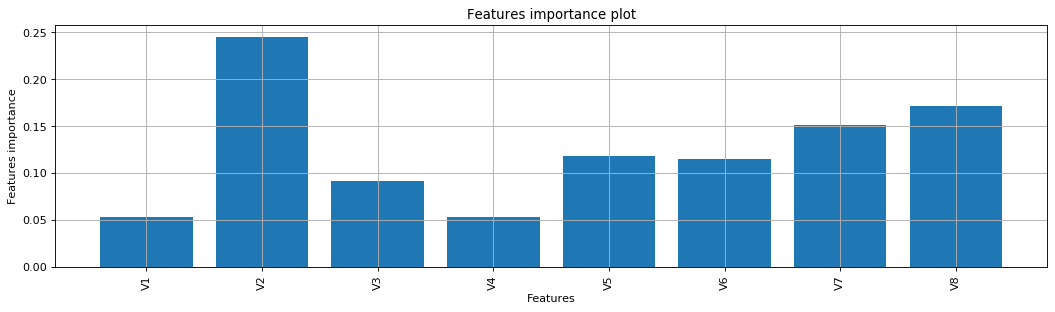

In [157]:
def binary_classification_model_evaluation(true, prob, cutoff = 0.5, beta = 1):
    pred = np.where(prob < cutoff, 0, 1)
    V0 = sklearn.metrics.accuracy_score(true, pred) # Accuracy classification score
    V1 = sklearn.metrics.average_precision_score(true, pred) # Compute average precision (AP) from prediction scores
    V2 = sklearn.metrics.balanced_accuracy_score(true, pred) # Compute the balanced accuracy
    V3 = sklearn.metrics.brier_score_loss(true, pred) # Compute the Brier score
    V4 = sklearn.metrics.cohen_kappa_score(true, pred) # Cohen’s kappa: a statistic that measures inter-annotator agreement
    V5 = sklearn.metrics.f1_score(true, pred) # Compute the F1 score, also known as balanced F-score or F-measure
    V6 = sklearn.metrics.fbeta_score(true, pred, beta) # Compute the F-beta score
    V7 = sklearn.metrics.hamming_loss(true, pred) # Compute the average Hamming loss
    V8 = sklearn.metrics.hinge_loss(true, pred) # Average hinge loss (non-regularized)
    V9 = sklearn.metrics.jaccard_score(true, pred) # Jaccard similarity coefficient score
    V10 = sklearn.metrics.log_loss(true, pred) # Log loss, aka logistic loss or cross-entropy loss
    V11 = sklearn.metrics.matthews_corrcoef(true, pred) # Compute the Matthews correlation coefficient (MCC)
    V12 = sklearn.metrics.precision_score(true, pred) # Compute the precision
    V13 = sklearn.metrics.recall_score(true, pred) # Compute the recall
    V14 = sklearn.metrics.roc_auc_score(true, prob) # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
    V15 = sklearn.metrics.zero_one_loss(true, pred) # Zero-one classification loss
    scores = [V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15]
    results = {'function': ["accuracy_score", "average_precision_score", "balanced_accuracy_score", "brier_score_loss",
                            "cohen_kappa_score", "f1_score", "fbeta_score", "hamming_loss", "hinge_loss", "jaccard_score",
                            "log_loss", "matthews_corrcoef", "precision_score", "recall_score", "roc_auc_score", "zero_one_loss"],
               'scores': scores,
               'function description': ["Accuracy classification score", "Average precision", "Balanced accuracy", "Brier score",
                                        "Cohen’s kappa - inter-annotator agreement", "F1 score (balanced F-score, balanced F-measure)",
                                        "F-beta score", "Average Hamming loss", "Average hinge loss (non-regularized)",
                                        "Jaccard similarity coefficient score", "Log loss (logistic loss, cross-entropy loss)", 
                                        "Matthews correlation coefficient (MCC)", "Precision", "Recall (Sensitivity, True Positive Rate)", 
                                        "Area Under the Receiver Operating Characteristic Curve (ROC AUC)", "Zero-one classification loss"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

AdaBoost_model_best = AdaBoost_model_grid.best_estimator_
AdaBoost_model_best_train = AdaBoost_model_best.predict_proba(X_train)
AdaBoost_model_best_train = pd.DataFrame(data = AdaBoost_model_best_train, columns = ["negative", "positive"])
AdaBoost_model_best_train = np.array(AdaBoost_model_best_train["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_best_validation_train_dataset_")
display(binary_classification_model_evaluation(Y_train, AdaBoost_model_best_train))
AdaBoost_model_best_test = AdaBoost_model_best.predict_proba(X_test)
AdaBoost_model_best_test = pd.DataFrame(data = AdaBoost_model_best_test, columns = ["negative", "positive"])
AdaBoost_model_best_test = np.array(AdaBoost_model_best_test["positive"])
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_best_validation_validation_dataset_")
display(binary_classification_model_evaluation(Y_test, AdaBoost_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_estimator_")
display(AdaBoost_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_params_")
display(AdaBoost_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_estimator_Metrics")
display(results[results["params"] == AdaBoost_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_score_")
display(AdaBoost_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
Importances = pd.DataFrame({'Variable': X.columns,
                            'Feature_Importance': AdaBoost_model_grid.best_estimator_.feature_importances_})
display(Importances)
print("----------------------------------------------------------------------------------------------------------------------")
fig = plt.figure(figsize = (16, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
print("AdaBoost_model_best.feature_importances_plot")
plt.bar(x = X.columns, height = AdaBoost_model_grid.best_estimator_.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Features importance")
plt.title("Features importance plot")
plt.grid()

# AdaBoost Regression:
## Model implementation & training:

In [12]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("diamonds.csv", index_col = 0)
data["cut"] = pd.Categorical(data["cut"])
data["color"] = pd.Categorical(data["color"])
data["clarity"] = pd.Categorical(data["clarity"])
data = pd.get_dummies(data, columns = ["cut"])
data = pd.get_dummies(data, columns = ["color"])
data = pd.get_dummies(data, columns = ["clarity"])
data = data.sample(n = 10000, random_state = 42) 
Y = data["price"]
X = data.drop(["price"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

DTC_params_base = {'random_state': 42}

AdaBoost_params_base = {'random_state': 42}

params_grid = {'n_estimators': np.random.uniform(low = 10, high = 20, size = 2).round(decimals = 0).astype(int).tolist(),
               'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'loss': ['linear', 'square', 'exponential'],
               'base_estimator__criterion': ['mse', 'friedman_mse', 'mae'],
               'base_estimator__splitter': ['best', 'random'],
               'base_estimator__max_depth': np.arange(2, 3).tolist(),
               'base_estimator__max_features': ['auto', 'sqrt', 'log2', None]}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 2,
             'refit': 'mean_squared_error',
             'return_train_score': False}

scoring = {'explained_variance_score': sklearn.metrics.make_scorer(sklearn.metrics.explained_variance_score, greater_is_better = True),
           'max_error': sklearn.metrics.make_scorer(sklearn.metrics.max_error, greater_is_better = False),
           'mean_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error, greater_is_better = False),
           'mean_squared_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better = False),
           'median_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.median_absolute_error, greater_is_better = False),
           'r2_score': sklearn.metrics.make_scorer(sklearn.metrics.r2_score, greater_is_better = True)}

DTC_model_base = sklearn.tree.DecisionTreeRegressor(random_state = DTC_params_base['random_state'])

AdaBoost_model_base = sklearn.ensemble.AdaBoostRegressor(base_estimator = DTC_model_base,
                                         random_state = AdaBoost_params_base['random_state'])

AdaBoost_model_grid = sklearn.model_selection.GridSearchCV(estimator = AdaBoost_model_base,
                                                           param_grid = params_grid,
                                                           cv = params_cv['cv'],
                                                           n_jobs = params_cv['n_jobs'],
                                                           verbose = params_cv['verbose'],
                                                           scoring = scoring,
                                                           refit = params_cv['refit'],
                                                           return_train_score = params_cv['return_train_score'])

AdaBoost_model_grid.fit(X_train, Y_train)

X_train (8000, 26)
Y_train (8000,)
X_test (2000, 26)
Y_test (2000,)
Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   42.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

## Grid Search Evaluation:

In [13]:
results = AdaBoost_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_max_error"] = results["mean_test_max_error"] * (-1)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"] * (-1)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"] * (-1)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"] * (-1)
results = results.sort_values(["mean_test_mean_squared_error"], ascending = [True])
results["mean_test_explained_variance_score"] = results["mean_test_explained_variance_score"].apply(lambda x: '%.5f' % x)
results["mean_test_max_error"] = results["mean_test_max_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"].apply(lambda x: '%.5f' % x)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_r2_score"] = results["mean_test_r2_score"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.multimetric_")
display(AdaBoost_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.scorer_")
display(AdaBoost_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.n_splits_")
display(AdaBoost_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.refit_time_")
display(AdaBoost_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
284  {'base_estimator__criterion': 'mae', 'base_est...   
212  {'base_estimator__criterion': 'mae', 'base_est...   
275  {'base_estimator__criterion': 'mae', 'base_est...   
203  {'base_estimator__criterion': 'mae', 'base_est...   
194  {'base_estimator__criterion': 'mae', 'base_est...   
..                                                 ...   
256  {'base_estimator__criterion': 'mae', 'base_est...   
259  {'base_estimator__criterion': 'mae', 'base_est...   
70   {'base_estimator__criterion': 'mse', 'base_est...   
166  {'base_estimator__criterion': 'friedman_mse', ...   
258  {'base_estimator__criterion': 'mae', 'base_est...   

    mean_test_explained_variance_score mean_test_max_error  \
284                            0.86481         10667.25000   
212                            0.86481         10667.25000   
275                            0.86281         10887.50000   
203                            0.86281         10887.50000   
194                            0.86191         10370.50000   
..                                 ...                 ...   
256                            0.52570         13071.50000   
259                            0.53116         13066.00000   
70                             0.51016         12442.76403   
166                            0.51016         12442.76403   
258                            0.49226         13330.00000   

    mean_test_mean_absolute_error mean_test_mean_squared_error  \
284                     890.36200                2167730.12212   
212                     890.36200                2167730.12212   
275                     921.11744                2190771.87716   
203                     921.11744                2190771.87716   
194                     940.61244                2194833.63259   
..                            ...                          ...   
256                    1805.27931                7652631.22878   
259                    1777.34600                7745590.07575   
70                     2044.33579                7870955.98503   
166                    2044.33579                7870955.98503   
258                    1843.38250                8419447.68419   

    mean_test_median_absolute_error mean_test_r2_score  
284                       446.00000            0.86351  
212                       446.00000            0.86351  
275                       477.87500            0.86215  
203                       477.87500            0.86215  
194                       498.25000            0.86169  
..                              ...                ...  
256                      1213.00000            0.51675  
259                      1184.50000            0.50943  
70                       1622.47266            0.50240  
166                      1622.47266            0.50240  
258                      1205.50000            0.46756  

[288 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.scorer_


{'explained_variance_score': make_scorer(explained_variance_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'r2_score': make_scorer(r2_score)}

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.refit_time_


10.221680641174316

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best_validation_train_dataset_


function         scores  \
0  explained_variance_score        0.83518   
1                 max_error    11400.00000   
2       mean_absolute_error      956.99050   
3        mean_squared_error  2619558.51356   
4     median_absolute_error      394.75000   
5                  r2_score        0.83515   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best_validation_validation_dataset_


function         scores  \
0  explained_variance_score        0.82674   
1                 max_error     7736.50000   
2       mean_absolute_error      994.74600   
3        mean_squared_error  2800180.83825   
4     median_absolute_error      409.75000   
5                  r2_score        0.82628   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_estimator_


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mae',
                                                       max_depth=2,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=42,
                                                       splitter='random'),
                

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_params_


{'base_estimator__criterion': 'mae',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': 'auto',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.3488,
 'loss': 'square',
 'n_estimators': 12}

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_estimator_Metrics


params  \
212  {'base_estimator__criterion': 'mae', 'base_est...   

    mean_test_explained_variance_score mean_test_max_error  \
212                            0.86481         10667.25000   

    mean_test_mean_absolute_error mean_test_mean_squared_error  \
212                     890.36200                2167730.12212   

    mean_test_median_absolute_error mean_test_r2_score  
212                       446.00000            0.86351

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_grid.best_score_


-2167730.1221249998

----------------------------------------------------------------------------------------------------------------------


Variable  Feature_Importance
0           carat            0.184663
1           depth            0.000000
2           table            0.000000
3               x            0.327313
4               y            0.295965
5               z            0.141982
6        cut_Fair            0.000000
7        cut_Good            0.000000
8       cut_Ideal            0.000000
9     cut_Premium            0.000000
10  cut_Very Good            0.000000
11        color_D            0.000000
12        color_E            0.000000
13        color_F            0.000000
14        color_G            0.000000
15        color_H            0.000000
16        color_I            0.000121
17        color_J            0.000000
18     clarity_I1            0.001239
19     clarity_IF            0.041762
20    clarity_SI1            0.000090
21    clarity_SI2            0.006863
22    clarity_VS1            0.000000
23    clarity_VS2            0.000000
24   clarity_VVS1            0.000000
25   clarity_VVS2            0.000000

----------------------------------------------------------------------------------------------------------------------
AdaBoost_model_best.feature_importances_plot


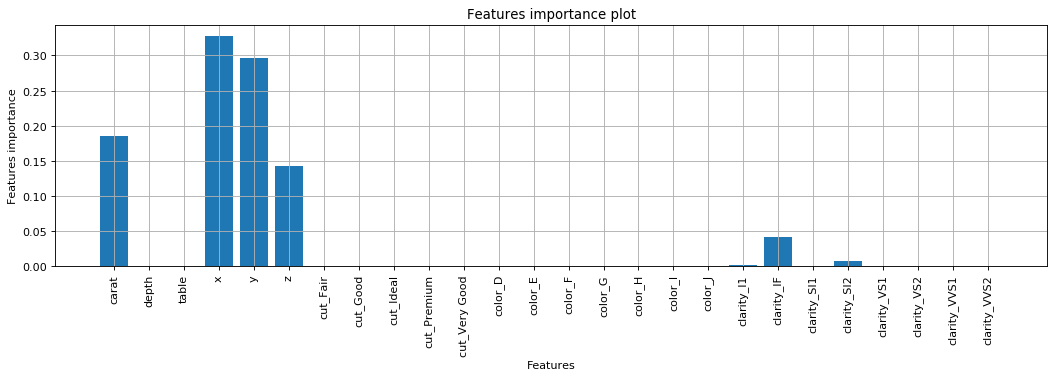

In [14]:
def regression_model_evaluation(true, pred):
    
    V0 = sklearn.metrics.explained_variance_score(true, pred) # Explained variance regression score function
    V1 = sklearn.metrics.max_error(true, pred) # max_error metric calculates the maximum residual error
    V2 = sklearn.metrics.mean_absolute_error(true, pred) # Mean absolute error regression loss
    V3 = sklearn.metrics.mean_squared_error(true, pred) # Mean squared error regression loss
    V4 = sklearn.metrics.median_absolute_error(true, pred) # Median absolute error regression loss
    V5 = sklearn.metrics.r2_score(true, pred) # R^2 (coefficient of determination) regression score function.
    
    scores = [V0, V1, V2, V3, V4, V5]
    results = {'function': ["explained_variance_score", "max_error", "mean_absolute_error", "mean_squared_error",
                            "median_absolute_error", "r2_score"],
               'scores': scores,
               'function description': ["Explained variance regression score", "Maximum residual error",
                                        "Mean absolute error regression loss", "Mean squared error regression loss",
                                        "Median absolute error regression loss", "R^2 regression score"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

AdaBoost_model_best = AdaBoost_model_grid.best_estimator_
Adaboost_model_best_train = AdaBoost_model_best.predict(X_train)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_best_validation_train_dataset_")
display(regression_model_evaluation(Y_train, Adaboost_model_best_train))
AdaBoost_model_best = AdaBoost_model_grid.best_estimator_
AdaBoost_model_best_test = AdaBoost_model_best.predict(X_test)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_best_validation_validation_dataset_")
display(regression_model_evaluation(Y_test, AdaBoost_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_estimator_")
display(AdaBoost_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_params_")
display(AdaBoost_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_estimator_Metrics")
display(results[results["params"] == AdaBoost_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("AdaBoost_model_grid.best_score_")
display(AdaBoost_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
Importances = pd.DataFrame({'Variable': X.columns,
                            'Feature_Importance': AdaBoost_model_grid.best_estimator_.feature_importances_})
display(Importances)
print("----------------------------------------------------------------------------------------------------------------------")
fig = plt.figure(figsize = (16, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
print("AdaBoost_model_best.feature_importances_plot")
plt.bar(x = X.columns, height = AdaBoost_model_grid.best_estimator_.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Features importance")
plt.title("Features importance plot")
plt.grid()

# Gradient Boosting Classification:
## Model implementation & training:

In [2]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, make_scorer
import os
from IPython.display import display, HTML

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("Pima-Indians-Diabetes.csv", header = None, names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Target'])
Y = data["Target"]
X = data.drop(["Target"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (614, 8)
Y_train (614,)
X_test (154, 8)
Y_test (154,)


In [ ]:
params_base = {'random_state': 42}

params_grid = {'loss': ['deviance', 'exponential'],
               'learning_rate': np.random.uniform(low = 0, high = 1, size = 2).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 20, high = 40, size = 2).round(decimals = 0).astype(int).tolist(),
               'subsample': np.random.uniform(low = 0.5, high = 1, size = 2).round(decimals = 4).tolist(),
               'criterion': ['friedman_mse', 'mse', 'mae'],
               'max_depth': np.arange(2, 3).tolist(),
               'max_features': ['auto', 'sqrt', 'log2', None]}
    
params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'accuracy_score',
             'return_train_score': False}

scoring = {'roc_auc_score': sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score, greater_is_better = True),
           'accuracy_score': sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score, greater_is_better = True),
           'f1_score': sklearn.metrics.make_scorer(sklearn.metrics.f1_score, greater_is_better = True),
           'precision_score': sklearn.metrics.make_scorer(sklearn.metrics.precision_score, greater_is_better = True),
           'recall_score': sklearn.metrics.make_scorer(sklearn.metrics.recall_score, greater_is_better = True),
           'zero_one_loss': sklearn.metrics.make_scorer(sklearn.metrics.zero_one_loss, greater_is_better = False)}

GBM_model_base = sklearn.ensemble.GradientBoostingClassifier(random_state = params_base['random_state'])

GBM_model_grid = sklearn.model_selection.GridSearchCV(estimator = GBM_model_base, 
                                                      param_grid = params_grid,
                                                      cv = params_cv['cv'],
                                                      n_jobs = params_cv['n_jobs'],
                                                      verbose = params_cv['verbose'],
                                                      scoring = scoring,
                                                      refit = params_cv['refit'],
                                                      return_train_score = params_cv['return_train_score'])

GBM_model_grid.fit(X_train, Y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


C:\Users\admin\Anaconda3\envs\GPU_ML\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


# CatBoost Classification:
## Model implementation & training:

# CatBoost Regression:
## Model implementation & training:

In [46]:
import pandas as pd
import numpy as np
from catboost import Pool, cv
from catboost import CatBoostRegressor

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("diamonds.csv", index_col = 0)
data["cut"] = pd.Categorical(data["cut"])
data["color"] = pd.Categorical(data["color"])
data["clarity"] = pd.Categorical(data["clarity"])
# data = pd.get_dummies(data, columns = ["cut"])
# data = pd.get_dummies(data, columns = ["color"])
# data = pd.get_dummies(data, columns = ["clarity"])
data = data.sample(n = 10000, random_state = 42) 
Y = data["price"]
X = data.drop(["price"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

train_dataset = Pool(data = X_train,
                     label = Y_train,
                     cat_features = [1, 2, 3])

CatBoost_Model = CatBoostRegressor(task_type = "GPU",
                                   devices = '0:1')

#CatBoost_Model = CatBoostRegressor(task_type = "CPU")

grid_params = {"iterations": [300],
               "depth": [1, 2, 3, 4],
               "learning_rate": np.random.uniform(low = 0, high = 1, size = 4).round(decimals = 4).tolist()}

CatBoost_Grid_Search = CatBoost_Model.grid_search(param_grid = grid_params,
                                                  X = train_dataset,
                                                  cv = 3, 
                                                  partition_random_seed = 42,
                                                  refit = True,
                                                  calc_cv_statistics = True,
                                                  shuffle = True,
                                                  verbose = True,
                                                  plot = True)

X_train (8000, 9)
Y_train (8000,)
X_test (2000, 9)
Y_test (2000,)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 1066.0164351	best: 1066.0164351 (0)	total: 2.48s	remaining: 37.3s
1:	loss: 1059.6231783	best: 1059.6231783 (1)	total: 4.78s	remaining: 33.4s
2:	loss: 1064.2932679	best: 1059.6231783 (1)	total: 7.07s	remaining: 30.6s
3:	loss: 1042.4306212	best: 1042.4306212 (3)	total: 9.4s	remaining: 28.2s
4:	loss: 661.1047118	best: 661.1047118 (4)	total: 12.5s	remaining: 27.5s
5:	loss: 721.5886640	best: 661.1047118 (4)	total: 15.6s	remaining: 26s
6:	loss: 699.9758853	best: 661.1047118 (4)	total: 18.8s	remaining: 24.2s
7:	loss: 728.4088138	best: 661.1047118 (4)	total: 21.9s	remaining: 21.9s
8:	loss: 622.9607371	best: 622.9607371 (8)	total: 25.9s	remaining: 20.2s
9:	loss: 618.8912021	best: 618.8912021 (9)	total: 29.9s	remaining: 18s
10:	loss: 612.7903720	best: 612.7903720 (10)	total: 34s	remaining: 15.5s
11:	loss: 612.0100653	best: 612.0100653 (11)	total: 38.2s	remaining: 12.7s
12:	loss: 622.4212079	best: 612.0100653 (11)	total: 43.3s	remaining: 9.99s
13:	loss: 598.6495469	best: 598.6495469 (13)

In [52]:
CatBoost_Grid_Search["params"] # best model parameters
pd.DataFrame(data = CatBoost_Grid_Search["cv_results"])

iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  \
0             0     4339.237595      69.717610      4340.246696   
1             1     3413.921010      63.985925      3413.876296   
2             2     2740.468521      71.458086      2734.093531   
3             3     2237.392698      62.473379      2232.181475   
4             4     1869.468635      49.101426      1865.738448   
..          ...             ...            ...              ...   
295         295      646.947104      19.669667       579.907957   
296         296      646.946716      19.759079       579.523840   
297         297      646.670561      19.702338       579.384366   
298         298      646.776658      19.669036       579.234153   
299         299      646.809151      19.644990       579.195977   

     train-RMSE-std  
0         24.340036  
1         21.647065  
2         19.156988  
3         14.423269  
4         14.316411  
..              ...  
295       20.502255  
296       20.806037  
297       20.868728  
298       20.662192  
299       20.694035  

[300 rows x 5 columns]

In [44]:
scores = pd.DataFrame(data = CatBoost_Grid_Search.values())
scores

depth                                         iterations  \
0    8.0                                                500   
1    NaN  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                      test-RMSE-mean  \
0                                                NaN   
1  [5416.208082510005, 5268.310567819711, 5122.77...   

                                       test-RMSE-std  \
0                                                NaN   
1  [62.78307918422986, 61.90178248038739, 61.9242...   

                                     train-RMSE-mean  \
0                                                NaN   
1  [5416.561912390764, 5267.83652853681, 5122.100...   

                                      train-RMSE-std  
0                                                NaN  
1  [29.572947128949604, 28.501316300244834, 27.77...

In [6]:
import pandas as pd
import numpy as np
from catboost import Pool, cv
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import os

os.chdir(r"C:\Users\admin\Desktop\GitHub")
# os.chdir(r"C:\Users\adam.nowacki\Desktop\My_Files")
os.getcwd()

data = pd.read_csv("diamonds.csv", index_col = 0)
data["cut"] = pd.Categorical(data["cut"])
data["color"] = pd.Categorical(data["color"])
data["clarity"] = pd.Categorical(data["clarity"])
# data = pd.get_dummies(data, columns = ["cut"])
# data = pd.get_dummies(data, columns = ["color"])
# data = pd.get_dummies(data, columns = ["clarity"])
data = data.sample(n = 10000, random_state = 42) 
Y = data["price"]
X = data.drop(["price"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

params_base = {'random_state': 42,
               'task_type': 'GPU',
               'devices': '0:1'}

params_grid = {'learning_rate': np.random.uniform(low = 0, high = 1, size = 10).round(decimals = 4).tolist(),
               'n_estimators': np.random.uniform(low = 100, high = 500, size = 10).round(decimals = 0).astype(int).tolist()}

params_cv = {'cv': 2,
             'n_jobs': -1,
             'verbose': 1,
             'refit': 'mean_squared_error',
             'return_train_score': False}

scoring = {'explained_variance_score': sklearn.metrics.make_scorer(sklearn.metrics.explained_variance_score, greater_is_better = True),
           'max_error': sklearn.metrics.make_scorer(sklearn.metrics.max_error, greater_is_better = False),
           'mean_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error, greater_is_better = False),
           'mean_squared_error': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better = False),
           'median_absolute_error': sklearn.metrics.make_scorer(sklearn.metrics.median_absolute_error, greater_is_better = False),
           'r2_score': sklearn.metrics.make_scorer(sklearn.metrics.r2_score, greater_is_better = True)}

CatBoost_Model = CatBoostRegressor(task_type = params_base['task_type'],
                                   devices = params_base['devices'],
                                   cat_features = [1, 2, 3])

CatBoost_model_grid = sklearn.model_selection.GridSearchCV(estimator = CatBoost_Model, 
                                                      param_grid = params_grid,
                                                      cv = params_cv['cv'],
                                                      # n_jobs = params_cv['n_jobs'],
                                                      verbose = params_cv['verbose'],
                                                      scoring = scoring,
                                                      refit = params_cv['refit'],
                                                      return_train_score = params_cv['return_train_score'])

CatBoost_model_grid.fit(X_train, Y_train)

X_train (8000, 9)
Y_train (8000,)
X_test (2000, 9)
Y_test (2000,)
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1628.4029379	total: 14ms	remaining: 6.9s
1:	learn: 1097.9390730	total: 28.3ms	remaining: 6.95s
2:	learn: 946.1326419	total: 41.9ms	remaining: 6.84s
3:	learn: 873.9303405	total: 54.8ms	remaining: 6.7s
4:	learn: 822.4825639	total: 67.1ms	remaining: 6.55s
5:	learn: 789.8056065	total: 80ms	remaining: 6.49s
6:	learn: 761.1269119	total: 93.3ms	remaining: 6.48s
7:	learn: 736.2842929	total: 106ms	remaining: 6.41s
8:	learn: 719.1540364	total: 118ms	remaining: 6.37s
9:	learn: 698.6625852	total: 130ms	remaining: 6.26s
10:	learn: 693.9700051	total: 145ms	remaining: 6.33s
11:	learn: 681.4261281	total: 158ms	remaining: 6.33s
12:	learn: 669.2570209	total: 171ms	remaining: 6.31s
13:	learn: 657.4622727	total: 185ms	remaining: 6.33s
14:	learn: 647.8674926	total: 198ms	remaining: 6.32s
15:	learn: 625.4021682	total: 212ms	remaining: 6.32s
16:	learn: 617.2045366	total: 225ms	remaining: 6.3s
17:	learn: 609.6730140	total: 241ms	remaining: 6.36s
18:	learn: 604.4810270	total: 252ms	remaining: 6.28s
1

161:	learn: 266.1902928	total: 2.18s	remaining: 4.46s
162:	learn: 265.6564699	total: 2.2s	remaining: 4.45s
163:	learn: 264.5633988	total: 2.21s	remaining: 4.43s
164:	learn: 263.4762987	total: 2.23s	remaining: 4.43s
165:	learn: 262.7251035	total: 2.24s	remaining: 4.41s
166:	learn: 262.1169052	total: 2.25s	remaining: 4.4s
167:	learn: 261.4510279	total: 2.27s	remaining: 4.39s
168:	learn: 260.3504868	total: 2.28s	remaining: 4.38s
169:	learn: 259.1011077	total: 2.3s	remaining: 4.36s
170:	learn: 258.2935075	total: 2.31s	remaining: 4.35s
171:	learn: 257.6399348	total: 2.33s	remaining: 4.34s
172:	learn: 255.9917186	total: 2.34s	remaining: 4.33s
173:	learn: 255.5240967	total: 2.35s	remaining: 4.31s
174:	learn: 254.2939087	total: 2.37s	remaining: 4.3s
175:	learn: 253.5526770	total: 2.38s	remaining: 4.29s
176:	learn: 253.1317918	total: 2.4s	remaining: 4.28s
177:	learn: 251.6288378	total: 2.41s	remaining: 4.27s
178:	learn: 250.8417589	total: 2.43s	remaining: 4.26s
179:	learn: 249.7178568	total: 2.

322:	learn: 170.9684532	total: 4.56s	remaining: 2.4s
323:	learn: 170.5254996	total: 4.58s	remaining: 2.39s
324:	learn: 168.6794297	total: 4.59s	remaining: 2.37s
325:	learn: 168.1052646	total: 4.6s	remaining: 2.36s
326:	learn: 167.9669789	total: 4.62s	remaining: 2.34s
327:	learn: 167.7674343	total: 4.63s	remaining: 2.33s
328:	learn: 167.4792405	total: 4.64s	remaining: 2.31s
329:	learn: 166.8207301	total: 4.66s	remaining: 2.3s
330:	learn: 166.4947687	total: 4.67s	remaining: 2.29s
331:	learn: 166.3045520	total: 4.69s	remaining: 2.27s
332:	learn: 165.8212833	total: 4.7s	remaining: 2.26s
333:	learn: 165.4222839	total: 4.72s	remaining: 2.25s
334:	learn: 165.0034242	total: 4.73s	remaining: 2.23s
335:	learn: 164.7169451	total: 4.75s	remaining: 2.22s
336:	learn: 164.5501626	total: 4.76s	remaining: 2.21s
337:	learn: 164.3460313	total: 4.78s	remaining: 2.19s
338:	learn: 164.1239288	total: 4.79s	remaining: 2.18s
339:	learn: 163.7448686	total: 4.81s	remaining: 2.16s
340:	learn: 163.0493300	total: 4

481:	learn: 121.9467056	total: 6.92s	remaining: 158ms
482:	learn: 121.6840910	total: 6.93s	remaining: 143ms
483:	learn: 121.3625931	total: 6.94s	remaining: 129ms
484:	learn: 120.9868133	total: 6.96s	remaining: 115ms
485:	learn: 120.8575484	total: 6.97s	remaining: 100ms
486:	learn: 120.6255653	total: 6.99s	remaining: 86.1ms
487:	learn: 120.4202475	total: 7s	remaining: 71.7ms
488:	learn: 119.7063073	total: 7.01s	remaining: 57.4ms
489:	learn: 119.4491565	total: 7.03s	remaining: 43ms
490:	learn: 119.2945347	total: 7.04s	remaining: 28.7ms
491:	learn: 119.0768659	total: 7.06s	remaining: 14.3ms
492:	learn: 118.6993429	total: 7.07s	remaining: 0us
0:	learn: 1576.6578931	total: 12.5ms	remaining: 6.16s
1:	learn: 1042.8122592	total: 25.8ms	remaining: 6.34s
2:	learn: 913.4869632	total: 41.3ms	remaining: 6.75s
3:	learn: 835.7403999	total: 53.4ms	remaining: 6.52s
4:	learn: 787.1003189	total: 65.3ms	remaining: 6.37s
5:	learn: 743.6999825	total: 78.1ms	remaining: 6.34s
6:	learn: 716.6446483	total: 88.6

146:	learn: 270.9343832	total: 1.95s	remaining: 4.6s
147:	learn: 270.3426566	total: 1.97s	remaining: 4.59s
148:	learn: 269.4096064	total: 1.98s	remaining: 4.57s
149:	learn: 268.2998323	total: 2s	remaining: 4.56s
150:	learn: 267.3286517	total: 2.01s	remaining: 4.55s
151:	learn: 266.6484127	total: 2.02s	remaining: 4.53s
152:	learn: 265.4843724	total: 2.03s	remaining: 4.52s
153:	learn: 264.2021650	total: 2.04s	remaining: 4.5s
154:	learn: 262.4513060	total: 2.05s	remaining: 4.48s
155:	learn: 261.5450095	total: 2.07s	remaining: 4.47s
156:	learn: 260.9102528	total: 2.08s	remaining: 4.46s
157:	learn: 259.9081376	total: 2.1s	remaining: 4.45s
158:	learn: 259.6885827	total: 2.11s	remaining: 4.44s
159:	learn: 258.3951083	total: 2.13s	remaining: 4.43s
160:	learn: 257.1757687	total: 2.14s	remaining: 4.42s
161:	learn: 255.8713270	total: 2.16s	remaining: 4.41s
162:	learn: 255.1197836	total: 2.17s	remaining: 4.39s
163:	learn: 254.3180922	total: 2.19s	remaining: 4.38s
164:	learn: 253.8894641	total: 2.2

309:	learn: 170.5240159	total: 4.32s	remaining: 2.55s
310:	learn: 170.0012000	total: 4.33s	remaining: 2.53s
311:	learn: 169.7429351	total: 4.35s	remaining: 2.52s
312:	learn: 169.2073816	total: 4.36s	remaining: 2.51s
313:	learn: 168.7670228	total: 4.38s	remaining: 2.5s
314:	learn: 168.5717533	total: 4.4s	remaining: 2.49s
315:	learn: 168.1129144	total: 4.41s	remaining: 2.47s
316:	learn: 167.6265313	total: 4.43s	remaining: 2.46s
317:	learn: 167.3457080	total: 4.45s	remaining: 2.45s
318:	learn: 166.6960108	total: 4.46s	remaining: 2.43s
319:	learn: 166.4294986	total: 4.48s	remaining: 2.42s
320:	learn: 165.7486893	total: 4.49s	remaining: 2.41s
321:	learn: 165.0719843	total: 4.51s	remaining: 2.39s
322:	learn: 164.4001703	total: 4.52s	remaining: 2.38s
323:	learn: 163.9804135	total: 4.53s	remaining: 2.37s
324:	learn: 163.7812627	total: 4.55s	remaining: 2.35s
325:	learn: 163.3215479	total: 4.56s	remaining: 2.34s
326:	learn: 162.6298005	total: 4.58s	remaining: 2.32s
327:	learn: 162.4775861	total:

468:	learn: 115.8150940	total: 6.64s	remaining: 340ms
469:	learn: 115.5779218	total: 6.66s	remaining: 326ms
470:	learn: 115.3090543	total: 6.67s	remaining: 311ms
471:	learn: 115.0023608	total: 6.68s	remaining: 297ms
472:	learn: 114.6018455	total: 6.7s	remaining: 283ms
473:	learn: 114.3477678	total: 6.71s	remaining: 269ms
474:	learn: 114.1123569	total: 6.72s	remaining: 255ms
475:	learn: 113.9901706	total: 6.73s	remaining: 241ms
476:	learn: 113.9146347	total: 6.75s	remaining: 226ms
477:	learn: 113.7217042	total: 6.76s	remaining: 212ms
478:	learn: 113.3668117	total: 6.78s	remaining: 198ms
479:	learn: 112.9324400	total: 6.79s	remaining: 184ms
480:	learn: 112.6007327	total: 6.8s	remaining: 170ms
481:	learn: 112.3045413	total: 6.82s	remaining: 156ms
482:	learn: 111.9619221	total: 6.83s	remaining: 141ms
483:	learn: 111.6014292	total: 6.84s	remaining: 127ms
484:	learn: 111.3990126	total: 6.86s	remaining: 113ms
485:	learn: 111.1312827	total: 6.88s	remaining: 99.1ms
486:	learn: 110.8525642	total

135:	learn: 289.5593065	total: 1.79s	remaining: 3.16s
136:	learn: 288.8582905	total: 1.8s	remaining: 3.15s
137:	learn: 287.5667157	total: 1.82s	remaining: 3.14s
138:	learn: 286.3208690	total: 1.83s	remaining: 3.13s
139:	learn: 285.5068055	total: 1.85s	remaining: 3.12s
140:	learn: 284.6275602	total: 1.86s	remaining: 3.1s
141:	learn: 284.2419814	total: 1.88s	remaining: 3.09s
142:	learn: 283.5378211	total: 1.89s	remaining: 3.08s
143:	learn: 282.9085506	total: 1.91s	remaining: 3.07s
144:	learn: 282.1311752	total: 1.92s	remaining: 3.06s
145:	learn: 281.4017484	total: 1.94s	remaining: 3.05s
146:	learn: 280.1900783	total: 1.95s	remaining: 3.04s
147:	learn: 278.9120722	total: 1.96s	remaining: 3.02s
148:	learn: 278.5230762	total: 1.98s	remaining: 3.01s
149:	learn: 277.7696312	total: 2s	remaining: 3.01s
150:	learn: 276.9432144	total: 2.01s	remaining: 3s
151:	learn: 275.9398630	total: 2.02s	remaining: 2.98s
152:	learn: 275.2445313	total: 2.04s	remaining: 2.97s
153:	learn: 274.9079410	total: 2.05s

297:	learn: 181.3664081	total: 4.09s	remaining: 1.07s
298:	learn: 181.1156205	total: 4.1s	remaining: 1.06s
299:	learn: 180.5201928	total: 4.12s	remaining: 1.04s
300:	learn: 180.3167990	total: 4.13s	remaining: 1.03s
301:	learn: 179.8891881	total: 4.14s	remaining: 1.01s
302:	learn: 179.5795980	total: 4.15s	remaining: 1s
303:	learn: 178.8674705	total: 4.17s	remaining: 987ms
304:	learn: 178.4540725	total: 4.18s	remaining: 974ms
305:	learn: 178.0007360	total: 4.2s	remaining: 960ms
306:	learn: 177.1841867	total: 4.21s	remaining: 946ms
307:	learn: 176.2757669	total: 4.23s	remaining: 933ms
308:	learn: 175.8150221	total: 4.24s	remaining: 920ms
309:	learn: 175.5827383	total: 4.26s	remaining: 907ms
310:	learn: 174.8646219	total: 4.27s	remaining: 893ms
311:	learn: 174.5054555	total: 4.29s	remaining: 879ms
312:	learn: 174.2179095	total: 4.3s	remaining: 866ms
313:	learn: 174.0488897	total: 4.31s	remaining: 852ms
314:	learn: 173.7270157	total: 4.33s	remaining: 838ms
315:	learn: 173.2197564	total: 4.3

78:	learn: 354.5894753	total: 1.01s	remaining: 3.82s
79:	learn: 353.3093149	total: 1.03s	remaining: 3.82s
80:	learn: 352.8852051	total: 1.04s	remaining: 3.8s
81:	learn: 350.4557718	total: 1.05s	remaining: 3.79s
82:	learn: 349.4825890	total: 1.07s	remaining: 3.77s
83:	learn: 348.7532308	total: 1.08s	remaining: 3.76s
84:	learn: 347.1485446	total: 1.1s	remaining: 3.76s
85:	learn: 345.9161633	total: 1.11s	remaining: 3.75s
86:	learn: 344.9342894	total: 1.13s	remaining: 3.74s
87:	learn: 344.1942126	total: 1.14s	remaining: 3.73s
88:	learn: 342.6071570	total: 1.16s	remaining: 3.73s
89:	learn: 341.3748204	total: 1.17s	remaining: 3.72s
90:	learn: 339.5963604	total: 1.18s	remaining: 3.7s
91:	learn: 339.0683471	total: 1.19s	remaining: 3.68s
92:	learn: 337.8034221	total: 1.2s	remaining: 3.66s
93:	learn: 335.2454623	total: 1.22s	remaining: 3.65s
94:	learn: 334.1968282	total: 1.23s	remaining: 3.64s
95:	learn: 332.5515058	total: 1.24s	remaining: 3.63s
96:	learn: 330.9097279	total: 1.25s	remaining: 3.6

243:	learn: 199.2754476	total: 3.31s	remaining: 1.79s
244:	learn: 199.2260826	total: 3.33s	remaining: 1.78s
245:	learn: 198.9717970	total: 3.34s	remaining: 1.77s
246:	learn: 198.5971400	total: 3.35s	remaining: 1.75s
247:	learn: 197.9749883	total: 3.37s	remaining: 1.74s
248:	learn: 197.7563653	total: 3.38s	remaining: 1.72s
249:	learn: 197.3043030	total: 3.39s	remaining: 1.71s
250:	learn: 196.6735163	total: 3.41s	remaining: 1.7s
251:	learn: 196.3869853	total: 3.42s	remaining: 1.68s
252:	learn: 195.6423880	total: 3.43s	remaining: 1.67s
253:	learn: 194.3144977	total: 3.45s	remaining: 1.66s
254:	learn: 193.7647440	total: 3.46s	remaining: 1.64s
255:	learn: 193.1643238	total: 3.47s	remaining: 1.63s
256:	learn: 192.7115046	total: 3.49s	remaining: 1.61s
257:	learn: 192.2772061	total: 3.5s	remaining: 1.6s
258:	learn: 191.7033229	total: 3.52s	remaining: 1.59s
259:	learn: 191.1996862	total: 3.53s	remaining: 1.57s
260:	learn: 190.7609394	total: 3.55s	remaining: 1.56s
261:	learn: 190.1911985	total: 

31:	learn: 512.8989608	total: 408ms	remaining: 2.55s
32:	learn: 507.5507305	total: 420ms	remaining: 2.53s
33:	learn: 504.4018398	total: 432ms	remaining: 2.51s
34:	learn: 500.2183523	total: 444ms	remaining: 2.5s
35:	learn: 495.3744442	total: 455ms	remaining: 2.48s
36:	learn: 489.4152920	total: 470ms	remaining: 2.48s
37:	learn: 487.6305487	total: 484ms	remaining: 2.47s
38:	learn: 484.9965608	total: 501ms	remaining: 2.48s
39:	learn: 480.5735074	total: 513ms	remaining: 2.46s
40:	learn: 475.9104790	total: 529ms	remaining: 2.46s
41:	learn: 470.0452574	total: 540ms	remaining: 2.44s
42:	learn: 460.7304288	total: 554ms	remaining: 2.43s
43:	learn: 456.1864882	total: 566ms	remaining: 2.42s
44:	learn: 451.9421910	total: 583ms	remaining: 2.42s
45:	learn: 449.4375151	total: 595ms	remaining: 2.41s
46:	learn: 448.6625636	total: 607ms	remaining: 2.39s
47:	learn: 446.7190795	total: 620ms	remaining: 2.38s
48:	learn: 443.6289260	total: 633ms	remaining: 2.36s
49:	learn: 439.6241668	total: 644ms	remaining: 

186:	learn: 244.7311178	total: 2.53s	remaining: 610ms
187:	learn: 243.8179567	total: 2.55s	remaining: 597ms
188:	learn: 243.4774076	total: 2.56s	remaining: 583ms
189:	learn: 242.7073052	total: 2.58s	remaining: 570ms
190:	learn: 242.0109832	total: 2.59s	remaining: 556ms
191:	learn: 241.2369789	total: 2.6s	remaining: 542ms
192:	learn: 240.4520659	total: 2.62s	remaining: 529ms
193:	learn: 239.8654123	total: 2.64s	remaining: 516ms
194:	learn: 239.2063712	total: 2.65s	remaining: 503ms
195:	learn: 238.5794459	total: 2.66s	remaining: 489ms
196:	learn: 238.4250322	total: 2.68s	remaining: 476ms
197:	learn: 237.9541973	total: 2.69s	remaining: 462ms
198:	learn: 236.6742741	total: 2.7s	remaining: 448ms
199:	learn: 236.3420487	total: 2.72s	remaining: 435ms
200:	learn: 235.5029087	total: 2.73s	remaining: 421ms
201:	learn: 234.7834492	total: 2.75s	remaining: 408ms
202:	learn: 234.2574054	total: 2.77s	remaining: 395ms
203:	learn: 233.5886812	total: 2.78s	remaining: 381ms
204:	learn: 232.9653880	total:

115:	learn: 304.2937791	total: 1.56s	remaining: 1.56s
116:	learn: 301.9543012	total: 1.57s	remaining: 1.55s
117:	learn: 299.3422389	total: 1.58s	remaining: 1.53s
118:	learn: 297.3670594	total: 1.6s	remaining: 1.51s
119:	learn: 295.8154830	total: 1.61s	remaining: 1.5s
120:	learn: 294.2945191	total: 1.62s	remaining: 1.49s
121:	learn: 292.7471810	total: 1.64s	remaining: 1.48s
122:	learn: 291.3200714	total: 1.65s	remaining: 1.46s
123:	learn: 290.4954939	total: 1.66s	remaining: 1.45s
124:	learn: 289.3296528	total: 1.68s	remaining: 1.44s
125:	learn: 287.5277934	total: 1.69s	remaining: 1.43s
126:	learn: 286.9576415	total: 1.71s	remaining: 1.41s
127:	learn: 286.3133668	total: 1.72s	remaining: 1.4s
128:	learn: 285.5607816	total: 1.74s	remaining: 1.39s
129:	learn: 284.3328613	total: 1.75s	remaining: 1.37s
130:	learn: 284.1677814	total: 1.77s	remaining: 1.36s
131:	learn: 282.4152262	total: 1.78s	remaining: 1.35s
132:	learn: 281.5061776	total: 1.79s	remaining: 1.33s
133:	learn: 281.0371363	total: 

36:	learn: 477.1147619	total: 194ms	remaining: 562ms
37:	learn: 473.1632784	total: 200ms	remaining: 558ms
38:	learn: 469.9143582	total: 206ms	remaining: 554ms
39:	learn: 465.2584314	total: 211ms	remaining: 549ms
40:	learn: 461.7987614	total: 216ms	remaining: 543ms
41:	learn: 457.4968765	total: 222ms	remaining: 539ms
42:	learn: 451.0141993	total: 227ms	remaining: 534ms
43:	learn: 448.6167362	total: 232ms	remaining: 528ms
44:	learn: 446.3643713	total: 238ms	remaining: 523ms
45:	learn: 442.7860341	total: 243ms	remaining: 517ms
46:	learn: 440.0097453	total: 248ms	remaining: 511ms
47:	learn: 436.8795898	total: 253ms	remaining: 506ms
48:	learn: 432.7549145	total: 258ms	remaining: 500ms
49:	learn: 428.7220825	total: 263ms	remaining: 495ms
50:	learn: 426.2557167	total: 269ms	remaining: 490ms
51:	learn: 423.3921303	total: 274ms	remaining: 484ms
52:	learn: 421.7277795	total: 279ms	remaining: 479ms
53:	learn: 418.5741320	total: 284ms	remaining: 473ms
54:	learn: 416.2938001	total: 289ms	remaining:

70:	learn: 368.5730104	total: 378ms	remaining: 388ms
71:	learn: 367.3307610	total: 383ms	remaining: 383ms
72:	learn: 365.3462358	total: 388ms	remaining: 377ms
73:	learn: 361.5422299	total: 393ms	remaining: 372ms
74:	learn: 358.2322040	total: 399ms	remaining: 367ms
75:	learn: 355.2417205	total: 404ms	remaining: 361ms
76:	learn: 353.0658749	total: 409ms	remaining: 356ms
77:	learn: 351.4913484	total: 414ms	remaining: 351ms
78:	learn: 350.1348312	total: 420ms	remaining: 346ms
79:	learn: 349.0305316	total: 426ms	remaining: 340ms
80:	learn: 347.3616674	total: 431ms	remaining: 335ms
81:	learn: 345.1480378	total: 436ms	remaining: 330ms
82:	learn: 344.5244142	total: 441ms	remaining: 324ms
83:	learn: 340.1508371	total: 446ms	remaining: 319ms
84:	learn: 337.0555563	total: 452ms	remaining: 314ms
85:	learn: 335.3051744	total: 457ms	remaining: 308ms
86:	learn: 333.6248192	total: 463ms	remaining: 303ms
87:	learn: 332.2148221	total: 468ms	remaining: 298ms
88:	learn: 330.4643158	total: 473ms	remaining:

85:	learn: 366.3163988	total: 1.17s	remaining: 3.01s
86:	learn: 363.2754657	total: 1.18s	remaining: 3s
87:	learn: 361.6299103	total: 1.19s	remaining: 2.98s
88:	learn: 359.7087489	total: 1.2s	remaining: 2.96s
89:	learn: 356.6996832	total: 1.21s	remaining: 2.94s
90:	learn: 355.3894427	total: 1.23s	remaining: 2.92s
91:	learn: 353.8682693	total: 1.24s	remaining: 2.91s
92:	learn: 352.9091214	total: 1.25s	remaining: 2.9s
93:	learn: 350.1964363	total: 1.27s	remaining: 2.89s
94:	learn: 348.6749891	total: 1.28s	remaining: 2.88s
95:	learn: 347.0414154	total: 1.3s	remaining: 2.86s
96:	learn: 346.0987258	total: 1.31s	remaining: 2.84s
97:	learn: 344.3901044	total: 1.32s	remaining: 2.83s
98:	learn: 342.0164207	total: 1.33s	remaining: 2.81s
99:	learn: 340.2499082	total: 1.34s	remaining: 2.79s
100:	learn: 337.9954083	total: 1.35s	remaining: 2.78s
101:	learn: 337.1853022	total: 1.37s	remaining: 2.77s
102:	learn: 336.6240633	total: 1.38s	remaining: 2.75s
103:	learn: 334.7018494	total: 1.4s	remaining: 2.

240:	learn: 209.9759224	total: 3.33s	remaining: 927ms
241:	learn: 209.7265076	total: 3.35s	remaining: 914ms
242:	learn: 209.4026934	total: 3.36s	remaining: 900ms
243:	learn: 208.3732228	total: 3.38s	remaining: 886ms
244:	learn: 207.5531354	total: 3.39s	remaining: 872ms
245:	learn: 207.4416641	total: 3.41s	remaining: 859ms
246:	learn: 206.9076896	total: 3.42s	remaining: 845ms
247:	learn: 206.5051864	total: 3.44s	remaining: 831ms
248:	learn: 205.8990044	total: 3.45s	remaining: 818ms
249:	learn: 205.6411146	total: 3.46s	remaining: 804ms
250:	learn: 205.3193415	total: 3.48s	remaining: 790ms
251:	learn: 205.1542054	total: 3.49s	remaining: 777ms
252:	learn: 204.3472633	total: 3.51s	remaining: 763ms
253:	learn: 203.9159435	total: 3.52s	remaining: 749ms
254:	learn: 203.3215778	total: 3.54s	remaining: 736ms
255:	learn: 202.7151992	total: 3.55s	remaining: 722ms
256:	learn: 201.8968846	total: 3.57s	remaining: 708ms
257:	learn: 200.8495756	total: 3.58s	remaining: 694ms
258:	learn: 199.4910123	tota

89:	learn: 341.3748204	total: 1.14s	remaining: 2.77s
90:	learn: 339.5963604	total: 1.15s	remaining: 2.75s
91:	learn: 339.0683471	total: 1.16s	remaining: 2.73s
92:	learn: 337.8034221	total: 1.18s	remaining: 2.72s
93:	learn: 335.2454623	total: 1.19s	remaining: 2.71s
94:	learn: 334.1968282	total: 1.21s	remaining: 2.7s
95:	learn: 332.5515058	total: 1.22s	remaining: 2.69s
96:	learn: 330.9097279	total: 1.23s	remaining: 2.68s
97:	learn: 329.4968892	total: 1.25s	remaining: 2.67s
98:	learn: 328.1106399	total: 1.26s	remaining: 2.66s
99:	learn: 326.1759648	total: 1.27s	remaining: 2.65s
100:	learn: 325.2727471	total: 1.29s	remaining: 2.64s
101:	learn: 324.3917878	total: 1.3s	remaining: 2.63s
102:	learn: 323.0347845	total: 1.32s	remaining: 2.62s
103:	learn: 321.3141765	total: 1.33s	remaining: 2.62s
104:	learn: 319.4476859	total: 1.34s	remaining: 2.6s
105:	learn: 318.1691877	total: 1.36s	remaining: 2.59s
106:	learn: 317.1921437	total: 1.37s	remaining: 2.58s
107:	learn: 314.8242939	total: 1.38s	remai

254:	learn: 193.7647440	total: 3.47s	remaining: 722ms
255:	learn: 193.1643238	total: 3.48s	remaining: 708ms
256:	learn: 192.7115046	total: 3.5s	remaining: 695ms
257:	learn: 192.2772061	total: 3.51s	remaining: 681ms
258:	learn: 191.7033229	total: 3.53s	remaining: 668ms
259:	learn: 191.1996862	total: 3.54s	remaining: 654ms
260:	learn: 190.7609394	total: 3.56s	remaining: 641ms
261:	learn: 190.1911985	total: 3.57s	remaining: 627ms
262:	learn: 189.6710521	total: 3.58s	remaining: 613ms
263:	learn: 189.3035023	total: 3.6s	remaining: 599ms
264:	learn: 189.0937122	total: 3.61s	remaining: 586ms
265:	learn: 188.7537443	total: 3.63s	remaining: 573ms
266:	learn: 188.6149623	total: 3.64s	remaining: 559ms
267:	learn: 188.2065355	total: 3.65s	remaining: 546ms
268:	learn: 187.5343489	total: 3.67s	remaining: 532ms
269:	learn: 186.8500682	total: 3.68s	remaining: 518ms
270:	learn: 186.5549142	total: 3.69s	remaining: 504ms
271:	learn: 186.0022150	total: 3.71s	remaining: 491ms
272:	learn: 185.3810670	total:

103:	learn: 334.7018494	total: 1.39s	remaining: 5.05s
104:	learn: 333.4134970	total: 1.41s	remaining: 5.05s
105:	learn: 331.8322950	total: 1.42s	remaining: 5.04s
106:	learn: 330.6668656	total: 1.44s	remaining: 5.02s
107:	learn: 329.7105761	total: 1.45s	remaining: 5s
108:	learn: 328.3970036	total: 1.46s	remaining: 4.98s
109:	learn: 327.1295034	total: 1.47s	remaining: 4.96s
110:	learn: 325.7588310	total: 1.48s	remaining: 4.94s
111:	learn: 324.1584551	total: 1.49s	remaining: 4.92s
112:	learn: 323.1241990	total: 1.51s	remaining: 4.92s
113:	learn: 319.7191643	total: 1.52s	remaining: 4.9s
114:	learn: 316.9789898	total: 1.53s	remaining: 4.88s
115:	learn: 314.9606452	total: 1.55s	remaining: 4.87s
116:	learn: 313.9431541	total: 1.56s	remaining: 4.86s
117:	learn: 312.3777969	total: 1.57s	remaining: 4.85s
118:	learn: 311.2533630	total: 1.59s	remaining: 4.84s
119:	learn: 310.3394529	total: 1.6s	remaining: 4.83s
120:	learn: 308.6296421	total: 1.62s	remaining: 4.82s
121:	learn: 308.3831124	total: 1.

264:	learn: 196.1802437	total: 3.71s	remaining: 3.03s
265:	learn: 195.8399959	total: 3.73s	remaining: 3.01s
266:	learn: 195.3726183	total: 3.74s	remaining: 3s
267:	learn: 194.9337118	total: 3.76s	remaining: 2.98s
268:	learn: 194.5995375	total: 3.77s	remaining: 2.97s
269:	learn: 194.0682766	total: 3.79s	remaining: 2.96s
270:	learn: 193.5010388	total: 3.8s	remaining: 2.94s
271:	learn: 192.5302678	total: 3.81s	remaining: 2.93s
272:	learn: 191.9271945	total: 3.83s	remaining: 2.92s
273:	learn: 191.5628774	total: 3.84s	remaining: 2.9s
274:	learn: 191.0269510	total: 3.85s	remaining: 2.89s
275:	learn: 190.7884064	total: 3.87s	remaining: 2.87s
276:	learn: 190.2860794	total: 3.88s	remaining: 2.86s
277:	learn: 189.9602064	total: 3.9s	remaining: 2.84s
278:	learn: 189.5635724	total: 3.91s	remaining: 2.83s
279:	learn: 188.9503427	total: 3.92s	remaining: 2.82s
280:	learn: 187.8513348	total: 3.94s	remaining: 2.8s
281:	learn: 187.3774159	total: 3.95s	remaining: 2.79s
282:	learn: 187.3009984	total: 3.97

423:	learn: 137.3250887	total: 6.05s	remaining: 813ms
424:	learn: 136.9689527	total: 6.06s	remaining: 799ms
425:	learn: 136.7678690	total: 6.08s	remaining: 784ms
426:	learn: 136.0990962	total: 6.09s	remaining: 770ms
427:	learn: 135.7932841	total: 6.11s	remaining: 756ms
428:	learn: 135.5936872	total: 6.12s	remaining: 742ms
429:	learn: 135.2937545	total: 6.14s	remaining: 728ms
430:	learn: 135.1801465	total: 6.16s	remaining: 714ms
431:	learn: 135.0515383	total: 6.17s	remaining: 700ms
432:	learn: 134.8019288	total: 6.19s	remaining: 686ms
433:	learn: 134.5729022	total: 6.2s	remaining: 672ms
434:	learn: 134.1454956	total: 6.22s	remaining: 658ms
435:	learn: 133.5394474	total: 6.24s	remaining: 644ms
436:	learn: 133.3451236	total: 6.25s	remaining: 629ms
437:	learn: 133.0362357	total: 6.27s	remaining: 615ms
438:	learn: 132.5798024	total: 6.29s	remaining: 602ms
439:	learn: 132.3997508	total: 6.31s	remaining: 588ms
440:	learn: 132.0347000	total: 6.33s	remaining: 574ms
441:	learn: 131.7811064	total

107:	learn: 314.8242939	total: 1.39s	remaining: 4.8s
108:	learn: 313.5919259	total: 1.4s	remaining: 4.78s
109:	learn: 312.2834354	total: 1.42s	remaining: 4.77s
110:	learn: 311.5798967	total: 1.43s	remaining: 4.76s
111:	learn: 309.0364639	total: 1.44s	remaining: 4.75s
112:	learn: 307.5051219	total: 1.46s	remaining: 4.74s
113:	learn: 306.9429784	total: 1.47s	remaining: 4.74s
114:	learn: 304.5782789	total: 1.49s	remaining: 4.73s
115:	learn: 304.2937791	total: 1.5s	remaining: 4.72s
116:	learn: 301.9543012	total: 1.51s	remaining: 4.7s
117:	learn: 299.3422389	total: 1.52s	remaining: 4.68s
118:	learn: 297.3670594	total: 1.53s	remaining: 4.66s
119:	learn: 295.8154830	total: 1.55s	remaining: 4.65s
120:	learn: 294.2945191	total: 1.56s	remaining: 4.64s
121:	learn: 292.7471810	total: 1.57s	remaining: 4.62s
122:	learn: 291.3200714	total: 1.58s	remaining: 4.61s
123:	learn: 290.4954939	total: 1.6s	remaining: 4.6s
124:	learn: 289.3296528	total: 1.61s	remaining: 4.59s
125:	learn: 287.5277934	total: 1.6

274:	learn: 184.8556410	total: 3.77s	remaining: 2.83s
275:	learn: 184.5770950	total: 3.79s	remaining: 2.81s
276:	learn: 184.0567195	total: 3.8s	remaining: 2.8s
277:	learn: 183.8492426	total: 3.82s	remaining: 2.79s
278:	learn: 183.3180078	total: 3.83s	remaining: 2.77s
279:	learn: 182.9578421	total: 3.85s	remaining: 2.76s
280:	learn: 182.4186065	total: 3.86s	remaining: 2.75s
281:	learn: 182.1567237	total: 3.88s	remaining: 2.74s
282:	learn: 181.5732029	total: 3.9s	remaining: 2.73s
283:	learn: 181.2312445	total: 3.91s	remaining: 2.71s
284:	learn: 180.7972345	total: 3.92s	remaining: 2.7s
285:	learn: 180.4380780	total: 3.93s	remaining: 2.68s
286:	learn: 179.6972843	total: 3.95s	remaining: 2.67s
287:	learn: 179.4632441	total: 3.96s	remaining: 2.65s
288:	learn: 178.9349155	total: 3.97s	remaining: 2.64s
289:	learn: 178.5466886	total: 3.99s	remaining: 2.63s
290:	learn: 177.9369045	total: 4s	remaining: 2.61s
291:	learn: 177.4628694	total: 4.02s	remaining: 2.6s
292:	learn: 177.1241824	total: 4.03s

432:	learn: 125.7214898	total: 6.09s	remaining: 676ms
433:	learn: 125.5960031	total: 6.11s	remaining: 662ms
434:	learn: 125.2579818	total: 6.13s	remaining: 648ms
435:	learn: 125.0407294	total: 6.14s	remaining: 634ms
436:	learn: 124.6280627	total: 6.15s	remaining: 620ms
437:	learn: 124.1873585	total: 6.17s	remaining: 605ms
438:	learn: 124.1034488	total: 6.18s	remaining: 591ms
439:	learn: 123.7733655	total: 6.19s	remaining: 577ms
440:	learn: 123.5250501	total: 6.21s	remaining: 563ms
441:	learn: 123.3622714	total: 6.22s	remaining: 549ms
442:	learn: 123.0661367	total: 6.24s	remaining: 535ms
443:	learn: 122.7165637	total: 6.25s	remaining: 521ms
444:	learn: 122.5342483	total: 6.26s	remaining: 506ms
445:	learn: 121.9518348	total: 6.27s	remaining: 492ms
446:	learn: 121.7550861	total: 6.29s	remaining: 478ms
447:	learn: 121.4462968	total: 6.3s	remaining: 464ms
448:	learn: 121.2922916	total: 6.32s	remaining: 451ms
449:	learn: 120.6026865	total: 6.33s	remaining: 436ms
450:	learn: 120.4336373	total

117:	learn: 312.3777969	total: 1.56s	remaining: 1.94s
118:	learn: 311.2533630	total: 1.58s	remaining: 1.93s
119:	learn: 310.3394529	total: 1.59s	remaining: 1.92s
120:	learn: 308.6296421	total: 1.6s	remaining: 1.91s
121:	learn: 308.3831124	total: 1.62s	remaining: 1.9s
122:	learn: 307.3459029	total: 1.63s	remaining: 1.89s
123:	learn: 305.4151535	total: 1.65s	remaining: 1.87s
124:	learn: 304.3185962	total: 1.66s	remaining: 1.86s
125:	learn: 303.7471580	total: 1.68s	remaining: 1.85s
126:	learn: 302.0325280	total: 1.69s	remaining: 1.84s
127:	learn: 301.1229649	total: 1.7s	remaining: 1.82s
128:	learn: 299.9090929	total: 1.71s	remaining: 1.81s
129:	learn: 296.9158130	total: 1.73s	remaining: 1.79s
130:	learn: 295.1605800	total: 1.74s	remaining: 1.78s
131:	learn: 293.6980218	total: 1.75s	remaining: 1.77s
132:	learn: 292.4498863	total: 1.77s	remaining: 1.75s
133:	learn: 291.8507016	total: 1.78s	remaining: 1.74s
134:	learn: 291.1124044	total: 1.8s	remaining: 1.73s
135:	learn: 289.5593065	total: 1

15:	learn: 594.4521108	total: 204ms	remaining: 3.18s
16:	learn: 587.0138670	total: 213ms	remaining: 3.11s
17:	learn: 577.5756228	total: 225ms	remaining: 3.09s
18:	learn: 572.6880337	total: 238ms	remaining: 3.08s
19:	learn: 558.9123438	total: 250ms	remaining: 3.06s
20:	learn: 552.4783145	total: 263ms	remaining: 3.05s
21:	learn: 542.6480259	total: 275ms	remaining: 3.03s
22:	learn: 531.4081520	total: 287ms	remaining: 3.02s
23:	learn: 527.6476097	total: 302ms	remaining: 3.03s
24:	learn: 517.8491827	total: 315ms	remaining: 3.02s
25:	learn: 515.0604469	total: 327ms	remaining: 3s
26:	learn: 506.6167625	total: 339ms	remaining: 2.99s
27:	learn: 502.3494083	total: 354ms	remaining: 3s
28:	learn: 495.7194206	total: 365ms	remaining: 2.97s
29:	learn: 490.5534181	total: 377ms	remaining: 2.95s
30:	learn: 484.6610362	total: 389ms	remaining: 2.94s
31:	learn: 482.1370096	total: 403ms	remaining: 2.94s
32:	learn: 477.2944751	total: 417ms	remaining: 2.93s
33:	learn: 467.2964969	total: 431ms	remaining: 2.93s

172:	learn: 246.4961825	total: 2.36s	remaining: 1.26s
173:	learn: 246.2241093	total: 2.38s	remaining: 1.25s
174:	learn: 245.7452502	total: 2.39s	remaining: 1.23s
175:	learn: 245.0102937	total: 2.41s	remaining: 1.22s
176:	learn: 244.3943535	total: 2.42s	remaining: 1.2s
177:	learn: 243.7186575	total: 2.43s	remaining: 1.19s
178:	learn: 242.7409319	total: 2.45s	remaining: 1.18s
179:	learn: 241.2367053	total: 2.46s	remaining: 1.16s
180:	learn: 240.0323478	total: 2.48s	remaining: 1.15s
181:	learn: 239.8462841	total: 2.49s	remaining: 1.14s
182:	learn: 239.5274348	total: 2.51s	remaining: 1.12s
183:	learn: 238.3268680	total: 2.52s	remaining: 1.11s
184:	learn: 237.7149217	total: 2.53s	remaining: 1.09s
185:	learn: 237.0737101	total: 2.55s	remaining: 1.08s
186:	learn: 236.5824085	total: 2.56s	remaining: 1.07s
187:	learn: 235.8701338	total: 2.58s	remaining: 1.06s
188:	learn: 234.7678683	total: 2.59s	remaining: 1.04s
189:	learn: 234.3417846	total: 2.61s	remaining: 1.03s
190:	learn: 233.5064367	total

73:	learn: 386.8724234	total: 997ms	remaining: 3.77s
74:	learn: 383.6530099	total: 1.01s	remaining: 3.76s
75:	learn: 382.5334495	total: 1.02s	remaining: 3.75s
76:	learn: 380.3667283	total: 1.04s	remaining: 3.74s
77:	learn: 378.8930403	total: 1.05s	remaining: 3.73s
78:	learn: 377.1781966	total: 1.07s	remaining: 3.71s
79:	learn: 375.1281594	total: 1.08s	remaining: 3.7s
80:	learn: 373.3293666	total: 1.09s	remaining: 3.68s
81:	learn: 372.8418431	total: 1.11s	remaining: 3.67s
82:	learn: 371.9347039	total: 1.12s	remaining: 3.66s
83:	learn: 368.9355066	total: 1.13s	remaining: 3.65s
84:	learn: 368.1323675	total: 1.15s	remaining: 3.64s
85:	learn: 366.3163988	total: 1.17s	remaining: 3.63s
86:	learn: 363.2754657	total: 1.18s	remaining: 3.61s
87:	learn: 361.6299103	total: 1.19s	remaining: 3.6s
88:	learn: 359.7087489	total: 1.2s	remaining: 3.58s
89:	learn: 356.6996832	total: 1.21s	remaining: 3.56s
90:	learn: 355.3894427	total: 1.23s	remaining: 3.54s
91:	learn: 353.8682693	total: 1.24s	remaining: 3.

227:	learn: 217.2372252	total: 3.18s	remaining: 1.76s
228:	learn: 216.4969746	total: 3.2s	remaining: 1.75s
229:	learn: 215.8938258	total: 3.21s	remaining: 1.73s
230:	learn: 215.4183465	total: 3.23s	remaining: 1.72s
231:	learn: 214.7592233	total: 3.24s	remaining: 1.7s
232:	learn: 214.2016620	total: 3.25s	remaining: 1.69s
233:	learn: 213.4376068	total: 3.27s	remaining: 1.67s
234:	learn: 212.8918975	total: 3.28s	remaining: 1.66s
235:	learn: 211.9408691	total: 3.29s	remaining: 1.65s
236:	learn: 211.8137861	total: 3.3s	remaining: 1.63s
237:	learn: 211.5585971	total: 3.32s	remaining: 1.62s
238:	learn: 211.2122724	total: 3.34s	remaining: 1.61s
239:	learn: 210.9432246	total: 3.36s	remaining: 1.59s
240:	learn: 209.9759224	total: 3.38s	remaining: 1.58s
241:	learn: 209.7265076	total: 3.39s	remaining: 1.57s
242:	learn: 209.4026934	total: 3.4s	remaining: 1.55s
243:	learn: 208.3732228	total: 3.42s	remaining: 1.54s
244:	learn: 207.5531354	total: 3.44s	remaining: 1.53s
245:	learn: 207.4416641	total: 3

30:	learn: 484.6610362	total: 397ms	remaining: 4.14s
31:	learn: 482.1370096	total: 411ms	remaining: 4.14s
32:	learn: 477.2944751	total: 424ms	remaining: 4.12s
33:	learn: 467.2964969	total: 437ms	remaining: 4.11s
34:	learn: 464.1158131	total: 448ms	remaining: 4.08s
35:	learn: 462.6359606	total: 459ms	remaining: 4.05s
36:	learn: 460.6563665	total: 472ms	remaining: 4.05s
37:	learn: 457.9880348	total: 486ms	remaining: 4.04s
38:	learn: 453.1140607	total: 497ms	remaining: 4.01s
39:	learn: 450.1656584	total: 510ms	remaining: 4s
40:	learn: 446.8688935	total: 523ms	remaining: 3.99s
41:	learn: 441.8188226	total: 534ms	remaining: 3.96s
42:	learn: 439.8040837	total: 548ms	remaining: 3.96s
43:	learn: 437.1663665	total: 562ms	remaining: 3.96s
44:	learn: 435.6143248	total: 578ms	remaining: 3.97s
45:	learn: 434.0192438	total: 594ms	remaining: 3.98s
46:	learn: 431.2421315	total: 610ms	remaining: 3.98s
47:	learn: 426.6314944	total: 622ms	remaining: 3.96s
48:	learn: 421.1899904	total: 635ms	remaining: 3.

187:	learn: 235.8701338	total: 2.53s	remaining: 2.23s
188:	learn: 234.7678683	total: 2.54s	remaining: 2.22s
189:	learn: 234.3417846	total: 2.55s	remaining: 2.2s
190:	learn: 233.5064367	total: 2.57s	remaining: 2.19s
191:	learn: 232.7418570	total: 2.58s	remaining: 2.18s
192:	learn: 232.0602853	total: 2.59s	remaining: 2.16s
193:	learn: 230.7960312	total: 2.61s	remaining: 2.15s
194:	learn: 230.2165068	total: 2.62s	remaining: 2.14s
195:	learn: 228.7462699	total: 2.63s	remaining: 2.12s
196:	learn: 227.8310690	total: 2.65s	remaining: 2.11s
197:	learn: 226.9094269	total: 2.66s	remaining: 2.1s
198:	learn: 226.1619685	total: 2.68s	remaining: 2.08s
199:	learn: 225.2761505	total: 2.69s	remaining: 2.07s
200:	learn: 224.3956149	total: 2.7s	remaining: 2.06s
201:	learn: 223.3539254	total: 2.72s	remaining: 2.04s
202:	learn: 222.7610199	total: 2.73s	remaining: 2.03s
203:	learn: 221.9581582	total: 2.75s	remaining: 2.02s
204:	learn: 221.6876361	total: 2.77s	remaining: 2.01s
205:	learn: 221.2244742	total: 

353:	learn: 152.3052855	total: 4.9s	remaining: 0us
0:	learn: 1628.4029379	total: 14.9ms	remaining: 4.39s
1:	learn: 1097.9390730	total: 29.5ms	remaining: 4.33s
2:	learn: 946.1326419	total: 40.9ms	remaining: 3.99s
3:	learn: 873.9303405	total: 53.5ms	remaining: 3.91s
4:	learn: 822.4825639	total: 65.6ms	remaining: 3.82s
5:	learn: 789.8056065	total: 78.6ms	remaining: 3.8s
6:	learn: 761.1269119	total: 91.5ms	remaining: 3.78s
7:	learn: 736.2842929	total: 104ms	remaining: 3.73s
8:	learn: 719.1540364	total: 116ms	remaining: 3.69s
9:	learn: 698.6625852	total: 126ms	remaining: 3.62s
10:	learn: 693.9700051	total: 140ms	remaining: 3.63s
11:	learn: 681.4261281	total: 154ms	remaining: 3.63s
12:	learn: 669.2570209	total: 167ms	remaining: 3.64s
13:	learn: 657.4622727	total: 182ms	remaining: 3.66s
14:	learn: 647.8674926	total: 194ms	remaining: 3.63s
15:	learn: 625.4021682	total: 207ms	remaining: 3.63s
16:	learn: 617.2045366	total: 220ms	remaining: 3.61s
17:	learn: 609.6730140	total: 236ms	remaining: 3.6

159:	learn: 267.3481476	total: 2.15s	remaining: 1.83s
160:	learn: 266.9591879	total: 2.17s	remaining: 1.82s
161:	learn: 266.1902928	total: 2.18s	remaining: 1.8s
162:	learn: 265.6564699	total: 2.19s	remaining: 1.79s
163:	learn: 264.5633988	total: 2.21s	remaining: 1.78s
164:	learn: 263.4762987	total: 2.22s	remaining: 1.76s
165:	learn: 262.7251035	total: 2.23s	remaining: 1.75s
166:	learn: 262.1169052	total: 2.25s	remaining: 1.74s
167:	learn: 261.4510279	total: 2.27s	remaining: 1.73s
168:	learn: 260.3504868	total: 2.28s	remaining: 1.71s
169:	learn: 259.1011077	total: 2.3s	remaining: 1.7s
170:	learn: 258.2935075	total: 2.31s	remaining: 1.69s
171:	learn: 257.6399348	total: 2.33s	remaining: 1.68s
172:	learn: 255.9917186	total: 2.34s	remaining: 1.66s
173:	learn: 255.5240967	total: 2.35s	remaining: 1.65s
174:	learn: 254.2939087	total: 2.37s	remaining: 1.64s
175:	learn: 253.5526770	total: 2.38s	remaining: 1.63s
176:	learn: 253.1317918	total: 2.4s	remaining: 1.61s
177:	learn: 251.6288378	total: 2

30:	learn: 484.6610362	total: 397ms	remaining: 3.39s
31:	learn: 482.1370096	total: 410ms	remaining: 3.38s
32:	learn: 477.2944751	total: 422ms	remaining: 3.36s
33:	learn: 467.2964969	total: 435ms	remaining: 3.35s
34:	learn: 464.1158131	total: 447ms	remaining: 3.33s
35:	learn: 462.6359606	total: 459ms	remaining: 3.31s
36:	learn: 460.6563665	total: 472ms	remaining: 3.3s
37:	learn: 457.9880348	total: 485ms	remaining: 3.29s
38:	learn: 453.1140607	total: 496ms	remaining: 3.27s
39:	learn: 450.1656584	total: 508ms	remaining: 3.25s
40:	learn: 446.8688935	total: 522ms	remaining: 3.24s
41:	learn: 441.8188226	total: 534ms	remaining: 3.23s
42:	learn: 439.8040837	total: 547ms	remaining: 3.21s
43:	learn: 437.1663665	total: 561ms	remaining: 3.21s
44:	learn: 435.6143248	total: 580ms	remaining: 3.23s
45:	learn: 434.0192438	total: 594ms	remaining: 3.23s
46:	learn: 431.2421315	total: 615ms	remaining: 3.25s
47:	learn: 426.6314944	total: 630ms	remaining: 3.25s
48:	learn: 421.1899904	total: 650ms	remaining: 

198:	learn: 226.1619685	total: 2.71s	remaining: 1.32s
199:	learn: 225.2761505	total: 2.72s	remaining: 1.31s
200:	learn: 224.3956149	total: 2.74s	remaining: 1.29s
201:	learn: 223.3539254	total: 2.75s	remaining: 1.28s
202:	learn: 222.7610199	total: 2.77s	remaining: 1.27s
203:	learn: 221.9581582	total: 2.78s	remaining: 1.25s
204:	learn: 221.6876361	total: 2.8s	remaining: 1.24s
205:	learn: 221.2244742	total: 2.81s	remaining: 1.23s
206:	learn: 220.0082453	total: 2.83s	remaining: 1.22s
207:	learn: 219.7603058	total: 2.84s	remaining: 1.2s
208:	learn: 218.8485686	total: 2.86s	remaining: 1.19s
209:	learn: 218.4792530	total: 2.87s	remaining: 1.18s
210:	learn: 218.1143095	total: 2.89s	remaining: 1.16s
211:	learn: 217.5362682	total: 2.9s	remaining: 1.15s
212:	learn: 216.5268205	total: 2.92s	remaining: 1.14s
213:	learn: 215.9885738	total: 2.93s	remaining: 1.12s
214:	learn: 215.8058572	total: 2.95s	remaining: 1.11s
215:	learn: 215.4368492	total: 2.96s	remaining: 1.1s
216:	learn: 214.2894771	total: 2

58:	learn: 415.5139276	total: 788ms	remaining: 4.21s
59:	learn: 413.8533073	total: 803ms	remaining: 4.2s
60:	learn: 411.0944612	total: 816ms	remaining: 4.19s
61:	learn: 408.7965166	total: 829ms	remaining: 4.17s
62:	learn: 407.5871244	total: 844ms	remaining: 4.17s
63:	learn: 405.6713941	total: 861ms	remaining: 4.17s
64:	learn: 404.3065372	total: 873ms	remaining: 4.15s
65:	learn: 401.6192824	total: 885ms	remaining: 4.13s
66:	learn: 400.2247369	total: 904ms	remaining: 4.14s
67:	learn: 398.9910475	total: 923ms	remaining: 4.15s
68:	learn: 396.9015193	total: 940ms	remaining: 4.16s
69:	learn: 395.9055039	total: 961ms	remaining: 4.17s
70:	learn: 395.2457059	total: 976ms	remaining: 4.17s
71:	learn: 390.5181379	total: 989ms	remaining: 4.15s
72:	learn: 389.2687298	total: 1s	remaining: 4.12s
73:	learn: 386.8724234	total: 1.01s	remaining: 4.11s
74:	learn: 383.6530099	total: 1.03s	remaining: 4.1s
75:	learn: 382.5334495	total: 1.04s	remaining: 4.09s
76:	learn: 380.3667283	total: 1.06s	remaining: 4.09

217:	learn: 223.4587747	total: 3.15s	remaining: 2.25s
218:	learn: 222.3380309	total: 3.17s	remaining: 2.24s
219:	learn: 221.7340208	total: 3.18s	remaining: 2.23s
220:	learn: 221.2591964	total: 3.2s	remaining: 2.21s
221:	learn: 220.9916922	total: 3.21s	remaining: 2.2s
222:	learn: 219.8525870	total: 3.23s	remaining: 2.19s
223:	learn: 218.9778345	total: 3.24s	remaining: 2.17s
224:	learn: 218.6462714	total: 3.26s	remaining: 2.16s
225:	learn: 218.3246482	total: 3.28s	remaining: 2.15s
226:	learn: 217.8982056	total: 3.29s	remaining: 2.13s
227:	learn: 217.2372252	total: 3.31s	remaining: 2.12s
228:	learn: 216.4969746	total: 3.33s	remaining: 2.11s
229:	learn: 215.8938258	total: 3.35s	remaining: 2.1s
230:	learn: 215.4183465	total: 3.36s	remaining: 2.08s
231:	learn: 214.7592233	total: 3.37s	remaining: 2.06s
232:	learn: 214.2016620	total: 3.39s	remaining: 2.05s
233:	learn: 213.4376068	total: 3.4s	remaining: 2.04s
234:	learn: 212.8918975	total: 3.42s	remaining: 2.02s
235:	learn: 211.9408691	total: 3

0:	learn: 1576.6578931	total: 12.8ms	remaining: 4.76s
1:	learn: 1042.8122592	total: 26ms	remaining: 4.83s
2:	learn: 913.4869632	total: 40.9ms	remaining: 5.06s
3:	learn: 835.7403999	total: 52.7ms	remaining: 4.87s
4:	learn: 787.1003189	total: 66.7ms	remaining: 4.92s
5:	learn: 743.6999825	total: 80ms	remaining: 4.9s
6:	learn: 716.6446483	total: 91.7ms	remaining: 4.81s
7:	learn: 686.8114152	total: 105ms	remaining: 4.79s
8:	learn: 664.7836099	total: 117ms	remaining: 4.76s
9:	learn: 656.4195244	total: 131ms	remaining: 4.78s
10:	learn: 647.6079061	total: 147ms	remaining: 4.86s
11:	learn: 638.4424547	total: 160ms	remaining: 4.83s
12:	learn: 621.8450482	total: 171ms	remaining: 4.74s
13:	learn: 607.6826014	total: 181ms	remaining: 4.66s
14:	learn: 600.2859585	total: 196ms	remaining: 4.7s
15:	learn: 594.4521108	total: 210ms	remaining: 4.7s
16:	learn: 587.0138670	total: 219ms	remaining: 4.61s
17:	learn: 577.5756228	total: 231ms	remaining: 4.58s
18:	learn: 572.6880337	total: 244ms	remaining: 4.55s
1

163:	learn: 254.3180922	total: 2.15s	remaining: 2.76s
164:	learn: 253.8894641	total: 2.17s	remaining: 2.75s
165:	learn: 251.9755861	total: 2.19s	remaining: 2.74s
166:	learn: 250.6299024	total: 2.2s	remaining: 2.73s
167:	learn: 250.1933013	total: 2.22s	remaining: 2.72s
168:	learn: 249.0695485	total: 2.23s	remaining: 2.71s
169:	learn: 248.4902332	total: 2.25s	remaining: 2.7s
170:	learn: 247.6574328	total: 2.26s	remaining: 2.69s
171:	learn: 246.9710833	total: 2.28s	remaining: 2.68s
172:	learn: 246.4961825	total: 2.3s	remaining: 2.67s
173:	learn: 246.2241093	total: 2.31s	remaining: 2.66s
174:	learn: 245.7452502	total: 2.32s	remaining: 2.64s
175:	learn: 245.0102937	total: 2.34s	remaining: 2.63s
176:	learn: 244.3943535	total: 2.35s	remaining: 2.62s
177:	learn: 243.7186575	total: 2.36s	remaining: 2.6s
178:	learn: 242.7409319	total: 2.38s	remaining: 2.59s
179:	learn: 241.2367053	total: 2.39s	remaining: 2.58s
180:	learn: 240.0323478	total: 2.4s	remaining: 2.56s
181:	learn: 239.8462841	total: 2.

328:	learn: 162.1209055	total: 4.51s	remaining: 617ms
329:	learn: 162.0289974	total: 4.52s	remaining: 603ms
330:	learn: 161.5400260	total: 4.54s	remaining: 590ms
331:	learn: 161.3258938	total: 4.55s	remaining: 576ms
332:	learn: 160.8481147	total: 4.57s	remaining: 562ms
333:	learn: 160.2932687	total: 4.58s	remaining: 548ms
334:	learn: 159.4492584	total: 4.59s	remaining: 535ms
335:	learn: 158.7877955	total: 4.61s	remaining: 521ms
336:	learn: 158.5072238	total: 4.62s	remaining: 508ms
337:	learn: 157.8376001	total: 4.64s	remaining: 494ms
338:	learn: 157.6425196	total: 4.66s	remaining: 481ms
339:	learn: 157.2818998	total: 4.67s	remaining: 467ms
340:	learn: 157.0090061	total: 4.69s	remaining: 454ms
341:	learn: 156.4499345	total: 4.71s	remaining: 440ms
342:	learn: 155.5089965	total: 4.72s	remaining: 427ms
343:	learn: 155.2844744	total: 4.74s	remaining: 413ms
344:	learn: 154.6529340	total: 4.75s	remaining: 399ms
345:	learn: 154.1990272	total: 4.76s	remaining: 385ms
346:	learn: 153.8005332	tota

116:	learn: 328.6504283	total: 1.54s	remaining: 4.96s
117:	learn: 327.4215631	total: 1.56s	remaining: 4.95s
118:	learn: 326.7690071	total: 1.57s	remaining: 4.93s
119:	learn: 325.5425011	total: 1.59s	remaining: 4.93s
120:	learn: 325.1141707	total: 1.6s	remaining: 4.92s
121:	learn: 324.0223943	total: 1.61s	remaining: 4.91s
122:	learn: 322.2276090	total: 1.63s	remaining: 4.89s
123:	learn: 320.6502394	total: 1.64s	remaining: 4.88s
124:	learn: 320.3703856	total: 1.65s	remaining: 4.87s
125:	learn: 320.0132497	total: 1.66s	remaining: 4.85s
126:	learn: 317.7922592	total: 1.68s	remaining: 4.83s
127:	learn: 316.9554669	total: 1.69s	remaining: 4.82s
128:	learn: 316.1749642	total: 1.7s	remaining: 4.8s
129:	learn: 315.5476002	total: 1.71s	remaining: 4.78s
130:	learn: 314.6545026	total: 1.73s	remaining: 4.77s
131:	learn: 313.4447447	total: 1.74s	remaining: 4.76s
132:	learn: 312.6144974	total: 1.75s	remaining: 4.75s
133:	learn: 311.5325858	total: 1.77s	remaining: 4.73s
134:	learn: 310.3709265	total: 

277:	learn: 202.3502805	total: 3.9s	remaining: 3.02s
278:	learn: 201.4027209	total: 3.91s	remaining: 3s
279:	learn: 201.2042942	total: 3.93s	remaining: 2.99s
280:	learn: 200.8499340	total: 3.94s	remaining: 2.98s
281:	learn: 200.4370225	total: 3.96s	remaining: 2.96s
282:	learn: 199.4406478	total: 3.97s	remaining: 2.95s
283:	learn: 199.0715851	total: 3.99s	remaining: 2.94s
284:	learn: 198.8219706	total: 4s	remaining: 2.92s
285:	learn: 197.9309577	total: 4.01s	remaining: 2.91s
286:	learn: 197.4487073	total: 4.03s	remaining: 2.89s
287:	learn: 197.3123108	total: 4.04s	remaining: 2.88s
288:	learn: 196.5760820	total: 4.06s	remaining: 2.87s
289:	learn: 196.2852516	total: 4.07s	remaining: 2.85s
290:	learn: 195.5784446	total: 4.09s	remaining: 2.84s
291:	learn: 195.0900202	total: 4.1s	remaining: 2.82s
292:	learn: 194.8654100	total: 4.12s	remaining: 2.81s
293:	learn: 193.9317509	total: 4.13s	remaining: 2.79s
294:	learn: 193.4951369	total: 4.14s	remaining: 2.78s
295:	learn: 193.1972049	total: 4.16s

437:	learn: 142.0157949	total: 6.26s	remaining: 786ms
438:	learn: 141.9160738	total: 6.28s	remaining: 772ms
439:	learn: 141.8200762	total: 6.29s	remaining: 758ms
440:	learn: 141.7362057	total: 6.3s	remaining: 743ms
441:	learn: 141.6058191	total: 6.32s	remaining: 729ms
442:	learn: 141.4606800	total: 6.34s	remaining: 715ms
443:	learn: 140.9309122	total: 6.35s	remaining: 701ms
444:	learn: 140.5056084	total: 6.36s	remaining: 686ms
445:	learn: 140.3014968	total: 6.38s	remaining: 672ms
446:	learn: 140.1489921	total: 6.39s	remaining: 658ms
447:	learn: 139.7116888	total: 6.41s	remaining: 643ms
448:	learn: 139.2787565	total: 6.42s	remaining: 629ms
449:	learn: 139.0487253	total: 6.43s	remaining: 615ms
450:	learn: 138.7007570	total: 6.45s	remaining: 600ms
451:	learn: 138.3920012	total: 6.46s	remaining: 586ms
452:	learn: 138.1630124	total: 6.47s	remaining: 572ms
453:	learn: 137.9943042	total: 6.49s	remaining: 557ms
454:	learn: 137.9385080	total: 6.5s	remaining: 543ms
455:	learn: 137.6933840	total:

101:	learn: 322.4190317	total: 1.35s	remaining: 5.18s
102:	learn: 320.9121998	total: 1.36s	remaining: 5.17s
103:	learn: 319.9637104	total: 1.38s	remaining: 5.15s
104:	learn: 319.3388796	total: 1.39s	remaining: 5.14s
105:	learn: 317.6816897	total: 1.4s	remaining: 5.12s
106:	learn: 317.0337774	total: 1.41s	remaining: 5.1s
107:	learn: 315.0576963	total: 1.43s	remaining: 5.09s
108:	learn: 314.6046916	total: 1.44s	remaining: 5.09s
109:	learn: 313.3592698	total: 1.46s	remaining: 5.09s
110:	learn: 311.9948974	total: 1.47s	remaining: 5.07s
111:	learn: 311.5644396	total: 1.49s	remaining: 5.07s
112:	learn: 308.9073907	total: 1.5s	remaining: 5.05s
113:	learn: 307.9930389	total: 1.51s	remaining: 5.04s
114:	learn: 305.8958516	total: 1.52s	remaining: 5.01s
115:	learn: 305.5594607	total: 1.54s	remaining: 5s
116:	learn: 305.3371907	total: 1.55s	remaining: 4.99s
117:	learn: 303.7023279	total: 1.56s	remaining: 4.97s
118:	learn: 302.4531170	total: 1.58s	remaining: 4.96s
119:	learn: 301.1377226	total: 1.5

262:	learn: 196.4516531	total: 3.65s	remaining: 3.19s
263:	learn: 196.3544550	total: 3.67s	remaining: 3.18s
264:	learn: 196.1025956	total: 3.69s	remaining: 3.17s
265:	learn: 195.4529918	total: 3.7s	remaining: 3.16s
266:	learn: 194.9351277	total: 3.71s	remaining: 3.14s
267:	learn: 194.3896911	total: 3.73s	remaining: 3.13s
268:	learn: 193.5895452	total: 3.74s	remaining: 3.12s
269:	learn: 193.1980331	total: 3.76s	remaining: 3.1s
270:	learn: 192.9725265	total: 3.77s	remaining: 3.09s
271:	learn: 192.5296237	total: 3.79s	remaining: 3.08s
272:	learn: 191.9299560	total: 3.8s	remaining: 3.06s
273:	learn: 191.8185914	total: 3.81s	remaining: 3.05s
274:	learn: 191.1397290	total: 3.83s	remaining: 3.03s
275:	learn: 190.8574023	total: 3.85s	remaining: 3.02s
276:	learn: 190.2079809	total: 3.86s	remaining: 3.01s
277:	learn: 189.9128853	total: 3.88s	remaining: 3s
278:	learn: 189.7456403	total: 3.89s	remaining: 2.99s
279:	learn: 189.4024393	total: 3.91s	remaining: 2.97s
280:	learn: 189.1621950	total: 3.9

424:	learn: 136.6219016	total: 6s	remaining: 959ms
425:	learn: 136.4153804	total: 6.01s	remaining: 946ms
426:	learn: 135.9760861	total: 6.03s	remaining: 932ms
427:	learn: 135.4956678	total: 6.04s	remaining: 918ms
428:	learn: 135.3438658	total: 6.05s	remaining: 903ms
429:	learn: 135.2057691	total: 6.07s	remaining: 889ms
430:	learn: 134.9398977	total: 6.08s	remaining: 875ms
431:	learn: 134.8054302	total: 6.1s	remaining: 861ms
432:	learn: 134.5472854	total: 6.11s	remaining: 846ms
433:	learn: 134.2320379	total: 6.12s	remaining: 832ms
434:	learn: 134.0010597	total: 6.13s	remaining: 817ms
435:	learn: 133.8256627	total: 6.15s	remaining: 804ms
436:	learn: 133.7141279	total: 6.16s	remaining: 790ms
437:	learn: 133.3457011	total: 6.18s	remaining: 776ms
438:	learn: 133.2053678	total: 6.2s	remaining: 762ms
439:	learn: 132.7320760	total: 6.21s	remaining: 748ms
440:	learn: 132.3315457	total: 6.22s	remaining: 734ms
441:	learn: 132.1218528	total: 6.24s	remaining: 720ms
442:	learn: 131.6373047	total: 6.

87:	learn: 370.5296965	total: 1.13s	remaining: 3.71s
88:	learn: 369.3719859	total: 1.15s	remaining: 3.69s
89:	learn: 368.5599870	total: 1.16s	remaining: 3.68s
90:	learn: 367.1843570	total: 1.17s	remaining: 3.67s
91:	learn: 366.1506575	total: 1.19s	remaining: 3.66s
92:	learn: 365.5498872	total: 1.2s	remaining: 3.65s
93:	learn: 363.9411821	total: 1.21s	remaining: 3.64s
94:	learn: 361.8744534	total: 1.23s	remaining: 3.63s
95:	learn: 360.1595202	total: 1.24s	remaining: 3.61s
96:	learn: 358.6479946	total: 1.25s	remaining: 3.59s
97:	learn: 355.9552331	total: 1.26s	remaining: 3.58s
98:	learn: 354.3598849	total: 1.28s	remaining: 3.57s
99:	learn: 352.9495828	total: 1.29s	remaining: 3.56s
100:	learn: 352.1455154	total: 1.3s	remaining: 3.54s
101:	learn: 350.7915620	total: 1.32s	remaining: 3.54s
102:	learn: 349.7994397	total: 1.34s	remaining: 3.54s
103:	learn: 348.1002384	total: 1.35s	remaining: 3.53s
104:	learn: 345.7681998	total: 1.36s	remaining: 3.52s
105:	learn: 343.7199325	total: 1.38s	remain

250:	learn: 218.7108136	total: 3.47s	remaining: 1.73s
251:	learn: 218.4363340	total: 3.49s	remaining: 1.72s
252:	learn: 218.1863240	total: 3.5s	remaining: 1.7s
253:	learn: 217.6316705	total: 3.51s	remaining: 1.69s
254:	learn: 216.8238917	total: 3.53s	remaining: 1.67s
255:	learn: 216.2936337	total: 3.54s	remaining: 1.66s
256:	learn: 215.3417098	total: 3.56s	remaining: 1.65s
257:	learn: 214.2680471	total: 3.57s	remaining: 1.63s
258:	learn: 213.6732271	total: 3.58s	remaining: 1.62s
259:	learn: 213.2332338	total: 3.6s	remaining: 1.6s
260:	learn: 212.9155889	total: 3.62s	remaining: 1.59s
261:	learn: 212.2788920	total: 3.63s	remaining: 1.58s
262:	learn: 211.4852430	total: 3.65s	remaining: 1.57s
263:	learn: 210.2475493	total: 3.66s	remaining: 1.55s
264:	learn: 209.4912218	total: 3.67s	remaining: 1.54s
265:	learn: 208.8578272	total: 3.69s	remaining: 1.52s
266:	learn: 207.9498593	total: 3.7s	remaining: 1.51s
267:	learn: 207.4813727	total: 3.71s	remaining: 1.5s
268:	learn: 206.5921683	total: 3.7

30:	learn: 509.5052816	total: 392ms	remaining: 4.37s
31:	learn: 506.0978562	total: 405ms	remaining: 4.35s
32:	learn: 497.6667158	total: 419ms	remaining: 4.35s
33:	learn: 489.9168256	total: 431ms	remaining: 4.33s
34:	learn: 485.1976257	total: 442ms	remaining: 4.31s
35:	learn: 481.0986759	total: 456ms	remaining: 4.3s
36:	learn: 478.3850332	total: 469ms	remaining: 4.29s
37:	learn: 473.4215542	total: 478ms	remaining: 4.25s
38:	learn: 467.3914505	total: 492ms	remaining: 4.25s
39:	learn: 464.1978888	total: 505ms	remaining: 4.25s
40:	learn: 460.5194285	total: 520ms	remaining: 4.25s
41:	learn: 455.2311413	total: 532ms	remaining: 4.23s
42:	learn: 449.7730450	total: 547ms	remaining: 4.23s
43:	learn: 446.4069175	total: 559ms	remaining: 4.22s
44:	learn: 444.6816209	total: 572ms	remaining: 4.21s
45:	learn: 443.0946806	total: 585ms	remaining: 4.2s
46:	learn: 437.9140007	total: 597ms	remaining: 4.18s
47:	learn: 433.3307836	total: 609ms	remaining: 4.16s
48:	learn: 429.0897156	total: 622ms	remaining: 4

187:	learn: 240.6454238	total: 2.5s	remaining: 2.5s
188:	learn: 239.8972030	total: 2.52s	remaining: 2.49s
189:	learn: 239.2953322	total: 2.53s	remaining: 2.48s
190:	learn: 238.7453706	total: 2.54s	remaining: 2.46s
191:	learn: 238.1153502	total: 2.56s	remaining: 2.45s
192:	learn: 236.9713063	total: 2.57s	remaining: 2.44s
193:	learn: 235.8603824	total: 2.58s	remaining: 2.42s
194:	learn: 234.6463893	total: 2.6s	remaining: 2.41s
195:	learn: 234.4474525	total: 2.61s	remaining: 2.4s
196:	learn: 234.0607015	total: 2.63s	remaining: 2.39s
197:	learn: 233.2561939	total: 2.65s	remaining: 2.38s
198:	learn: 232.3041971	total: 2.66s	remaining: 2.37s
199:	learn: 231.4501761	total: 2.67s	remaining: 2.35s
200:	learn: 230.4154769	total: 2.69s	remaining: 2.34s
201:	learn: 229.9577526	total: 2.7s	remaining: 2.33s
202:	learn: 229.1006504	total: 2.71s	remaining: 2.31s
203:	learn: 228.4793207	total: 2.73s	remaining: 2.3s
204:	learn: 228.0186133	total: 2.74s	remaining: 2.29s
205:	learn: 227.6500472	total: 2.7

342:	learn: 162.9946625	total: 4.83s	remaining: 465ms
343:	learn: 162.6321186	total: 4.84s	remaining: 451ms
344:	learn: 161.8591116	total: 4.86s	remaining: 437ms
345:	learn: 161.3941821	total: 4.88s	remaining: 423ms
346:	learn: 160.9675557	total: 4.89s	remaining: 409ms
347:	learn: 160.7796505	total: 4.9s	remaining: 394ms
348:	learn: 160.2509345	total: 4.92s	remaining: 380ms
349:	learn: 160.0737955	total: 4.93s	remaining: 366ms
350:	learn: 159.8872478	total: 4.94s	remaining: 352ms
351:	learn: 159.6041165	total: 4.96s	remaining: 338ms
352:	learn: 159.1978580	total: 4.97s	remaining: 324ms
353:	learn: 158.9623666	total: 4.99s	remaining: 310ms
354:	learn: 158.5419944	total: 5s	remaining: 296ms
355:	learn: 158.4151129	total: 5.01s	remaining: 282ms
356:	learn: 158.1402226	total: 5.03s	remaining: 268ms
357:	learn: 158.0240931	total: 5.04s	remaining: 254ms
358:	learn: 157.8020912	total: 5.05s	remaining: 239ms
359:	learn: 157.5522707	total: 5.07s	remaining: 225ms
360:	learn: 156.9131480	total: 5

129:	learn: 315.5476002	total: 1.75s	remaining: 1.37s
130:	learn: 314.6545026	total: 1.76s	remaining: 1.35s
131:	learn: 313.4447447	total: 1.77s	remaining: 1.34s
132:	learn: 312.6144974	total: 1.79s	remaining: 1.33s
133:	learn: 311.5325858	total: 1.8s	remaining: 1.31s
134:	learn: 310.3709265	total: 1.81s	remaining: 1.3s
135:	learn: 308.6974182	total: 1.82s	remaining: 1.29s
136:	learn: 307.8393737	total: 1.84s	remaining: 1.27s
137:	learn: 306.3374349	total: 1.85s	remaining: 1.26s
138:	learn: 305.2844837	total: 1.87s	remaining: 1.25s
139:	learn: 304.1791577	total: 1.88s	remaining: 1.24s
140:	learn: 303.3845612	total: 1.9s	remaining: 1.22s
141:	learn: 302.1104434	total: 1.91s	remaining: 1.21s
142:	learn: 301.1534758	total: 1.92s	remaining: 1.2s
143:	learn: 300.7417497	total: 1.93s	remaining: 1.18s
144:	learn: 299.3114766	total: 1.95s	remaining: 1.17s
145:	learn: 298.0224958	total: 1.96s	remaining: 1.15s
146:	learn: 295.8063691	total: 1.97s	remaining: 1.14s
147:	learn: 294.4926077	total: 1

61:	learn: 396.0955642	total: 773ms	remaining: 2.12s
62:	learn: 393.5484316	total: 784ms	remaining: 2.1s
63:	learn: 391.5263669	total: 797ms	remaining: 2.09s
64:	learn: 388.2994515	total: 812ms	remaining: 2.08s
65:	learn: 385.2201241	total: 828ms	remaining: 2.08s
66:	learn: 383.4580551	total: 843ms	remaining: 2.08s
67:	learn: 381.1948793	total: 855ms	remaining: 2.06s
68:	learn: 378.4195344	total: 868ms	remaining: 2.05s
69:	learn: 376.7800844	total: 881ms	remaining: 2.04s
70:	learn: 375.6497731	total: 894ms	remaining: 2.03s
71:	learn: 374.4481166	total: 908ms	remaining: 2.02s
72:	learn: 372.6534047	total: 920ms	remaining: 2s
73:	learn: 370.5245363	total: 934ms	remaining: 1.99s
74:	learn: 367.6538807	total: 945ms	remaining: 1.98s
75:	learn: 365.0502212	total: 961ms	remaining: 1.97s
76:	learn: 362.4996110	total: 974ms	remaining: 1.96s
77:	learn: 361.3052781	total: 987ms	remaining: 1.95s
78:	learn: 359.2994740	total: 1s	remaining: 1.94s
79:	learn: 358.2508618	total: 1.01s	remaining: 1.92s


220:	learn: 218.7890217	total: 2.93s	remaining: 146ms
221:	learn: 218.3270941	total: 2.95s	remaining: 133ms
222:	learn: 217.9155983	total: 2.96s	remaining: 120ms
223:	learn: 217.3358783	total: 2.98s	remaining: 107ms
224:	learn: 217.0908197	total: 2.99s	remaining: 93.1ms
225:	learn: 216.7987269	total: 3.01s	remaining: 79.9ms
226:	learn: 216.3151497	total: 3.02s	remaining: 66.6ms
227:	learn: 215.3384963	total: 3.04s	remaining: 53.3ms
228:	learn: 214.6103632	total: 3.05s	remaining: 40ms
229:	learn: 214.0647752	total: 3.07s	remaining: 26.7ms
230:	learn: 213.5528600	total: 3.08s	remaining: 13.3ms
231:	learn: 213.5181959	total: 3.1s	remaining: 0us
0:	learn: 1904.4383361	total: 7.84ms	remaining: 1.12s
1:	learn: 1219.5295618	total: 13.7ms	remaining: 973ms
2:	learn: 961.5647914	total: 19.4ms	remaining: 911ms
3:	learn: 864.0789594	total: 25.6ms	remaining: 895ms
4:	learn: 799.7850911	total: 31.2ms	remaining: 867ms
5:	learn: 781.6383205	total: 36.8ms	remaining: 847ms
6:	learn: 755.5654624	total: 4

0:	learn: 1883.2836005	total: 6.59ms	remaining: 943ms
1:	learn: 1141.8897460	total: 12.1ms	remaining: 856ms
2:	learn: 902.5839883	total: 16.9ms	remaining: 795ms
3:	learn: 832.4876263	total: 22ms	remaining: 770ms
4:	learn: 786.5561595	total: 27.2ms	remaining: 757ms
5:	learn: 743.3506844	total: 32.6ms	remaining: 750ms
6:	learn: 717.7918584	total: 37.7ms	remaining: 738ms
7:	learn: 688.7110512	total: 43ms	remaining: 730ms
8:	learn: 674.2042421	total: 48ms	remaining: 720ms
9:	learn: 662.1805192	total: 53ms	remaining: 710ms
10:	learn: 648.5111564	total: 57.8ms	remaining: 699ms
11:	learn: 631.9139182	total: 63.1ms	remaining: 694ms
12:	learn: 622.0531167	total: 68.5ms	remaining: 690ms
13:	learn: 608.6560145	total: 73.9ms	remaining: 686ms
14:	learn: 601.2979561	total: 79.5ms	remaining: 684ms
15:	learn: 596.0646139	total: 84.6ms	remaining: 676ms
16:	learn: 588.0243804	total: 89.6ms	remaining: 669ms
17:	learn: 586.0800764	total: 94.7ms	remaining: 663ms
18:	learn: 582.3158181	total: 99.6ms	remaini

16:	learn: 638.0486502	total: 209ms	remaining: 3.57s
17:	learn: 626.3985696	total: 219ms	remaining: 3.52s
18:	learn: 606.8210148	total: 231ms	remaining: 3.51s
19:	learn: 600.7652986	total: 244ms	remaining: 3.52s
20:	learn: 593.7217934	total: 255ms	remaining: 3.48s
21:	learn: 588.7428777	total: 268ms	remaining: 3.49s
22:	learn: 583.0626450	total: 284ms	remaining: 3.52s
23:	learn: 574.3625893	total: 295ms	remaining: 3.5s
24:	learn: 570.8730717	total: 309ms	remaining: 3.5s
25:	learn: 565.9474746	total: 324ms	remaining: 3.51s
26:	learn: 559.5492472	total: 339ms	remaining: 3.53s
27:	learn: 550.8414799	total: 352ms	remaining: 3.52s
28:	learn: 544.5997282	total: 363ms	remaining: 3.49s
29:	learn: 532.2708183	total: 374ms	remaining: 3.46s
30:	learn: 528.6215433	total: 387ms	remaining: 3.45s
31:	learn: 522.1805358	total: 398ms	remaining: 3.43s
32:	learn: 517.8881733	total: 410ms	remaining: 3.42s
33:	learn: 513.3209834	total: 422ms	remaining: 3.4s
34:	learn: 505.7287336	total: 434ms	remaining: 3.

181:	learn: 266.5091218	total: 2.49s	remaining: 1.72s
182:	learn: 265.0552244	total: 2.5s	remaining: 1.71s
183:	learn: 264.4956862	total: 2.52s	remaining: 1.7s
184:	learn: 263.8655415	total: 2.53s	remaining: 1.68s
185:	learn: 262.6172576	total: 2.54s	remaining: 1.67s
186:	learn: 261.1545749	total: 2.56s	remaining: 1.66s
187:	learn: 259.9208803	total: 2.57s	remaining: 1.64s
188:	learn: 258.4480760	total: 2.59s	remaining: 1.63s
189:	learn: 257.3462648	total: 2.6s	remaining: 1.62s
190:	learn: 257.1147370	total: 2.62s	remaining: 1.6s
191:	learn: 256.4097034	total: 2.63s	remaining: 1.59s
192:	learn: 255.7529902	total: 2.65s	remaining: 1.58s
193:	learn: 255.1768015	total: 2.67s	remaining: 1.57s
194:	learn: 254.6648700	total: 2.69s	remaining: 1.55s
195:	learn: 253.3636517	total: 2.7s	remaining: 1.54s
196:	learn: 253.2072906	total: 2.72s	remaining: 1.53s
197:	learn: 252.2012213	total: 2.73s	remaining: 1.52s
198:	learn: 251.7619987	total: 2.75s	remaining: 1.5s
199:	learn: 251.1445878	total: 2.7

29:	learn: 513.0299017	total: 406ms	remaining: 3.76s
30:	learn: 509.5052816	total: 418ms	remaining: 3.74s
31:	learn: 506.0978562	total: 433ms	remaining: 3.73s
32:	learn: 497.6667158	total: 448ms	remaining: 3.73s
33:	learn: 489.9168256	total: 460ms	remaining: 3.71s
34:	learn: 485.1976257	total: 472ms	remaining: 3.68s
35:	learn: 481.0986759	total: 485ms	remaining: 3.67s
36:	learn: 478.3850332	total: 500ms	remaining: 3.66s
37:	learn: 473.4215542	total: 510ms	remaining: 3.63s
38:	learn: 467.3914505	total: 526ms	remaining: 3.63s
39:	learn: 464.1978888	total: 538ms	remaining: 3.61s
40:	learn: 460.5194285	total: 554ms	remaining: 3.61s
41:	learn: 455.2311413	total: 566ms	remaining: 3.59s
42:	learn: 449.7730450	total: 581ms	remaining: 3.58s
43:	learn: 446.4069175	total: 594ms	remaining: 3.56s
44:	learn: 444.6816209	total: 607ms	remaining: 3.54s
45:	learn: 443.0946806	total: 619ms	remaining: 3.53s
46:	learn: 437.9140007	total: 630ms	remaining: 3.5s
47:	learn: 433.3307836	total: 641ms	remaining: 

185:	learn: 242.2016598	total: 2.5s	remaining: 1.64s
186:	learn: 241.0078173	total: 2.52s	remaining: 1.63s
187:	learn: 240.6454238	total: 2.54s	remaining: 1.62s
188:	learn: 239.8972030	total: 2.55s	remaining: 1.61s
189:	learn: 239.2953322	total: 2.57s	remaining: 1.59s
190:	learn: 238.7453706	total: 2.58s	remaining: 1.58s
191:	learn: 238.1153502	total: 2.6s	remaining: 1.57s
192:	learn: 236.9713063	total: 2.61s	remaining: 1.56s
193:	learn: 235.8603824	total: 2.63s	remaining: 1.54s
194:	learn: 234.6463893	total: 2.64s	remaining: 1.53s
195:	learn: 234.4474525	total: 2.65s	remaining: 1.52s
196:	learn: 234.0607015	total: 2.67s	remaining: 1.5s
197:	learn: 233.2561939	total: 2.68s	remaining: 1.49s
198:	learn: 232.3041971	total: 2.7s	remaining: 1.48s
199:	learn: 231.4501761	total: 2.71s	remaining: 1.46s
200:	learn: 230.4154769	total: 2.73s	remaining: 1.45s
201:	learn: 229.9577526	total: 2.74s	remaining: 1.44s
202:	learn: 229.1006504	total: 2.75s	remaining: 1.42s
203:	learn: 228.4793207	total: 2

43:	learn: 474.9779784	total: 587ms	remaining: 5.83s
44:	learn: 470.6638206	total: 603ms	remaining: 5.84s
45:	learn: 462.0739335	total: 617ms	remaining: 5.84s
46:	learn: 458.9689314	total: 630ms	remaining: 5.82s
47:	learn: 455.8336363	total: 643ms	remaining: 5.8s
48:	learn: 454.1886833	total: 659ms	remaining: 5.81s
49:	learn: 446.8285398	total: 672ms	remaining: 5.8s
50:	learn: 442.9655156	total: 686ms	remaining: 5.78s
51:	learn: 439.2368473	total: 698ms	remaining: 5.76s
52:	learn: 435.2047978	total: 713ms	remaining: 5.75s
53:	learn: 434.5415239	total: 728ms	remaining: 5.75s
54:	learn: 431.5860795	total: 740ms	remaining: 5.73s
55:	learn: 428.0232891	total: 751ms	remaining: 5.7s
56:	learn: 425.6780380	total: 763ms	remaining: 5.68s
57:	learn: 425.1719276	total: 775ms	remaining: 5.65s
58:	learn: 422.6668665	total: 787ms	remaining: 5.63s
59:	learn: 419.3766040	total: 798ms	remaining: 5.6s
60:	learn: 419.0769285	total: 809ms	remaining: 5.57s
61:	learn: 417.3107811	total: 823ms	remaining: 5.5

209:	learn: 244.8127611	total: 2.86s	remaining: 3.69s
210:	learn: 244.2928652	total: 2.87s	remaining: 3.68s
211:	learn: 244.0514290	total: 2.89s	remaining: 3.66s
212:	learn: 243.7540646	total: 2.9s	remaining: 3.65s
213:	learn: 243.0786375	total: 2.92s	remaining: 3.64s
214:	learn: 242.8850592	total: 2.93s	remaining: 3.63s
215:	learn: 241.9606745	total: 2.95s	remaining: 3.62s
216:	learn: 241.0338980	total: 2.96s	remaining: 3.6s
217:	learn: 240.0473370	total: 2.97s	remaining: 3.59s
218:	learn: 239.3045257	total: 2.99s	remaining: 3.57s
219:	learn: 238.8772739	total: 3s	remaining: 3.56s
220:	learn: 237.7968461	total: 3.01s	remaining: 3.55s
221:	learn: 237.5459366	total: 3.03s	remaining: 3.54s
222:	learn: 237.0750008	total: 3.04s	remaining: 3.52s
223:	learn: 236.5497664	total: 3.06s	remaining: 3.51s
224:	learn: 235.7418758	total: 3.07s	remaining: 3.5s
225:	learn: 235.4870018	total: 3.09s	remaining: 3.48s
226:	learn: 234.8721099	total: 3.1s	remaining: 3.47s
227:	learn: 234.3595870	total: 3.12

373:	learn: 162.1818855	total: 5.23s	remaining: 1.5s
374:	learn: 161.9982963	total: 5.24s	remaining: 1.48s
375:	learn: 161.6734610	total: 5.25s	remaining: 1.47s
376:	learn: 161.4316450	total: 5.26s	remaining: 1.45s
377:	learn: 161.2439580	total: 5.28s	remaining: 1.44s
378:	learn: 161.0365114	total: 5.29s	remaining: 1.42s
379:	learn: 160.5314424	total: 5.31s	remaining: 1.41s
380:	learn: 160.1056089	total: 5.32s	remaining: 1.4s
381:	learn: 159.7823958	total: 5.34s	remaining: 1.38s
382:	learn: 159.6393623	total: 5.35s	remaining: 1.37s
383:	learn: 159.4255877	total: 5.37s	remaining: 1.36s
384:	learn: 158.8689712	total: 5.38s	remaining: 1.34s
385:	learn: 158.5559207	total: 5.4s	remaining: 1.33s
386:	learn: 158.1628907	total: 5.42s	remaining: 1.31s
387:	learn: 157.9606343	total: 5.43s	remaining: 1.3s
388:	learn: 157.7900947	total: 5.45s	remaining: 1.29s
389:	learn: 157.6025190	total: 5.46s	remaining: 1.27s
390:	learn: 157.4326015	total: 5.48s	remaining: 1.26s
391:	learn: 157.0577983	total: 5

46:	learn: 437.9140007	total: 608ms	remaining: 5.61s
47:	learn: 433.3307836	total: 621ms	remaining: 5.6s
48:	learn: 429.0897156	total: 634ms	remaining: 5.59s
49:	learn: 425.4495975	total: 646ms	remaining: 5.57s
50:	learn: 423.0470045	total: 660ms	remaining: 5.57s
51:	learn: 419.8275074	total: 672ms	remaining: 5.54s
52:	learn: 418.8958057	total: 685ms	remaining: 5.53s
53:	learn: 417.3835838	total: 697ms	remaining: 5.51s
54:	learn: 416.6257217	total: 710ms	remaining: 5.5s
55:	learn: 413.9511276	total: 725ms	remaining: 5.5s
56:	learn: 411.3972679	total: 735ms	remaining: 5.47s
57:	learn: 408.6666319	total: 746ms	remaining: 5.44s
58:	learn: 404.8307696	total: 757ms	remaining: 5.41s
59:	learn: 401.7602071	total: 769ms	remaining: 5.4s
60:	learn: 400.0652147	total: 781ms	remaining: 5.38s
61:	learn: 396.0955642	total: 794ms	remaining: 5.37s
62:	learn: 393.5484316	total: 805ms	remaining: 5.34s
63:	learn: 391.5263669	total: 820ms	remaining: 5.34s
64:	learn: 388.2994515	total: 840ms	remaining: 5.3

213:	learn: 223.2454792	total: 2.89s	remaining: 3.61s
214:	learn: 222.6420445	total: 2.91s	remaining: 3.6s
215:	learn: 222.2270371	total: 2.92s	remaining: 3.58s
216:	learn: 220.9063874	total: 2.94s	remaining: 3.57s
217:	learn: 220.4814278	total: 2.95s	remaining: 3.56s
218:	learn: 219.4631541	total: 2.96s	remaining: 3.54s
219:	learn: 219.3193835	total: 2.98s	remaining: 3.53s
220:	learn: 218.7890217	total: 2.99s	remaining: 3.52s
221:	learn: 218.3270941	total: 3.01s	remaining: 3.51s
222:	learn: 217.9155983	total: 3.03s	remaining: 3.5s
223:	learn: 217.3358783	total: 3.04s	remaining: 3.49s
224:	learn: 217.0908197	total: 3.05s	remaining: 3.47s
225:	learn: 216.7987269	total: 3.07s	remaining: 3.46s
226:	learn: 216.3151497	total: 3.08s	remaining: 3.45s
227:	learn: 215.3384963	total: 3.1s	remaining: 3.44s
228:	learn: 214.6103632	total: 3.11s	remaining: 3.43s
229:	learn: 214.0647752	total: 3.13s	remaining: 3.42s
230:	learn: 213.5528600	total: 3.14s	remaining: 3.4s
231:	learn: 213.5181959	total: 3

374:	learn: 150.6224286	total: 5.25s	remaining: 1.48s
375:	learn: 150.4861854	total: 5.26s	remaining: 1.47s
376:	learn: 150.3269437	total: 5.28s	remaining: 1.46s
377:	learn: 150.0624070	total: 5.29s	remaining: 1.44s
378:	learn: 149.7164587	total: 5.3s	remaining: 1.43s
379:	learn: 149.5085549	total: 5.32s	remaining: 1.41s
380:	learn: 149.1078536	total: 5.34s	remaining: 1.4s
381:	learn: 148.8898250	total: 5.35s	remaining: 1.39s
382:	learn: 148.3071542	total: 5.37s	remaining: 1.37s
383:	learn: 148.0092632	total: 5.38s	remaining: 1.36s
384:	learn: 147.9202285	total: 5.39s	remaining: 1.34s
385:	learn: 147.8068063	total: 5.41s	remaining: 1.33s
386:	learn: 147.2103189	total: 5.42s	remaining: 1.32s
387:	learn: 146.7344063	total: 5.44s	remaining: 1.3s
388:	learn: 146.4410052	total: 5.45s	remaining: 1.29s
389:	learn: 145.8813628	total: 5.47s	remaining: 1.27s
390:	learn: 145.8130035	total: 5.49s	remaining: 1.26s
391:	learn: 145.6439082	total: 5.5s	remaining: 1.25s
392:	learn: 145.1657535	total: 5

60:	learn: 419.0769285	total: 788ms	remaining: 2.64s
61:	learn: 417.3107811	total: 802ms	remaining: 2.62s
62:	learn: 415.3735861	total: 812ms	remaining: 2.6s
63:	learn: 413.9341397	total: 822ms	remaining: 2.58s
64:	learn: 411.0899853	total: 833ms	remaining: 2.56s
65:	learn: 407.2538668	total: 844ms	remaining: 2.54s
66:	learn: 406.6015839	total: 855ms	remaining: 2.53s
67:	learn: 404.6949271	total: 867ms	remaining: 2.51s
68:	learn: 402.6837171	total: 880ms	remaining: 2.5s
69:	learn: 401.4117288	total: 889ms	remaining: 2.48s
70:	learn: 399.9028282	total: 901ms	remaining: 2.46s
71:	learn: 399.0931119	total: 913ms	remaining: 2.45s
72:	learn: 397.4640814	total: 926ms	remaining: 2.44s
73:	learn: 394.3047755	total: 941ms	remaining: 2.43s
74:	learn: 392.2232833	total: 954ms	remaining: 2.42s
75:	learn: 389.0614142	total: 968ms	remaining: 2.41s
76:	learn: 386.5005666	total: 983ms	remaining: 2.4s
77:	learn: 384.6286521	total: 995ms	remaining: 2.38s
78:	learn: 382.1900679	total: 1s	remaining: 2.37s

226:	learn: 234.8721099	total: 3.12s	remaining: 523ms
227:	learn: 234.3595870	total: 3.14s	remaining: 510ms
228:	learn: 234.0462775	total: 3.16s	remaining: 496ms
229:	learn: 233.3734004	total: 3.17s	remaining: 482ms
230:	learn: 232.6821007	total: 3.18s	remaining: 469ms
231:	learn: 231.7922518	total: 3.2s	remaining: 455ms
232:	learn: 231.1161440	total: 3.21s	remaining: 441ms
233:	learn: 230.7253259	total: 3.23s	remaining: 427ms
234:	learn: 230.1211855	total: 3.24s	remaining: 414ms
235:	learn: 229.3980732	total: 3.25s	remaining: 400ms
236:	learn: 228.6034120	total: 3.27s	remaining: 386ms
237:	learn: 228.1564200	total: 3.28s	remaining: 372ms
238:	learn: 226.6720097	total: 3.3s	remaining: 359ms
239:	learn: 226.0549048	total: 3.31s	remaining: 345ms
240:	learn: 225.2619098	total: 3.33s	remaining: 331ms
241:	learn: 224.6824960	total: 3.34s	remaining: 318ms
242:	learn: 224.1720143	total: 3.36s	remaining: 304ms
243:	learn: 223.1068713	total: 3.37s	remaining: 290ms
244:	learn: 222.7128285	total:

119:	learn: 301.1377226	total: 1.58s	remaining: 1.91s
120:	learn: 300.1595709	total: 1.6s	remaining: 1.9s
121:	learn: 298.6631280	total: 1.61s	remaining: 1.89s
122:	learn: 297.8881669	total: 1.63s	remaining: 1.88s
123:	learn: 296.5033018	total: 1.64s	remaining: 1.86s
124:	learn: 295.1614473	total: 1.65s	remaining: 1.85s
125:	learn: 293.7280511	total: 1.67s	remaining: 1.84s
126:	learn: 292.4164017	total: 1.68s	remaining: 1.82s
127:	learn: 290.6822045	total: 1.69s	remaining: 1.81s
128:	learn: 290.2041350	total: 1.7s	remaining: 1.8s
129:	learn: 289.1453890	total: 1.72s	remaining: 1.78s
130:	learn: 288.2835132	total: 1.73s	remaining: 1.77s
131:	learn: 287.4643769	total: 1.74s	remaining: 1.76s
132:	learn: 286.4242587	total: 1.75s	remaining: 1.74s
133:	learn: 285.7529702	total: 1.77s	remaining: 1.73s
134:	learn: 285.2437274	total: 1.78s	remaining: 1.72s
135:	learn: 284.7219275	total: 1.8s	remaining: 1.71s
136:	learn: 284.1809564	total: 1.82s	remaining: 1.7s
137:	learn: 283.3239559	total: 1.8

16:	learn: 638.0486502	total: 208ms	remaining: 4.13s
17:	learn: 626.3985696	total: 220ms	remaining: 4.11s
18:	learn: 606.8210148	total: 232ms	remaining: 4.09s
19:	learn: 600.7652986	total: 246ms	remaining: 4.12s
20:	learn: 593.7217934	total: 258ms	remaining: 4.09s
21:	learn: 588.7428777	total: 271ms	remaining: 4.09s
22:	learn: 583.0626450	total: 286ms	remaining: 4.12s
23:	learn: 574.3625893	total: 297ms	remaining: 4.08s
24:	learn: 570.8730717	total: 310ms	remaining: 4.08s
25:	learn: 565.9474746	total: 324ms	remaining: 4.09s
26:	learn: 559.5492472	total: 340ms	remaining: 4.11s
27:	learn: 550.8414799	total: 355ms	remaining: 4.13s
28:	learn: 544.5997282	total: 367ms	remaining: 4.11s
29:	learn: 532.2708183	total: 378ms	remaining: 4.09s
30:	learn: 528.6215433	total: 392ms	remaining: 4.08s
31:	learn: 522.1805358	total: 404ms	remaining: 4.07s
32:	learn: 517.8881733	total: 419ms	remaining: 4.07s
33:	learn: 513.3209834	total: 433ms	remaining: 4.07s
34:	learn: 505.7287336	total: 445ms	remaining:

175:	learn: 270.5175484	total: 2.33s	remaining: 2.35s
176:	learn: 269.8821521	total: 2.34s	remaining: 2.34s
177:	learn: 268.4991173	total: 2.35s	remaining: 2.33s
178:	learn: 267.5785343	total: 2.37s	remaining: 2.31s
179:	learn: 267.1721393	total: 2.38s	remaining: 2.3s
180:	learn: 266.6916722	total: 2.4s	remaining: 2.29s
181:	learn: 266.5091218	total: 2.41s	remaining: 2.28s
182:	learn: 265.0552244	total: 2.43s	remaining: 2.27s
183:	learn: 264.4956862	total: 2.44s	remaining: 2.26s
184:	learn: 263.8655415	total: 2.46s	remaining: 2.25s
185:	learn: 262.6172576	total: 2.47s	remaining: 2.23s
186:	learn: 261.1545749	total: 2.48s	remaining: 2.22s
187:	learn: 259.9208803	total: 2.5s	remaining: 2.21s
188:	learn: 258.4480760	total: 2.51s	remaining: 2.19s
189:	learn: 257.3462648	total: 2.53s	remaining: 2.18s
190:	learn: 257.1147370	total: 2.54s	remaining: 2.17s
191:	learn: 256.4097034	total: 2.56s	remaining: 2.16s
192:	learn: 255.7529902	total: 2.57s	remaining: 2.15s
193:	learn: 255.1768015	total: 

337:	learn: 176.5894957	total: 4.65s	remaining: 220ms
338:	learn: 176.4921358	total: 4.67s	remaining: 206ms
339:	learn: 176.1945062	total: 4.68s	remaining: 193ms
340:	learn: 175.6967672	total: 4.69s	remaining: 179ms
341:	learn: 175.5438863	total: 4.71s	remaining: 165ms
342:	learn: 174.9885882	total: 4.72s	remaining: 151ms
343:	learn: 174.6854373	total: 4.74s	remaining: 138ms
344:	learn: 174.2493788	total: 4.75s	remaining: 124ms
345:	learn: 174.1353726	total: 4.76s	remaining: 110ms
346:	learn: 173.5732353	total: 4.78s	remaining: 96.4ms
347:	learn: 173.0075605	total: 4.79s	remaining: 82.7ms
348:	learn: 172.5703045	total: 4.81s	remaining: 68.9ms
349:	learn: 172.1574163	total: 4.83s	remaining: 55.2ms
350:	learn: 171.5913634	total: 4.84s	remaining: 41.4ms
351:	learn: 171.2895035	total: 4.86s	remaining: 27.6ms
352:	learn: 170.7715550	total: 4.88s	remaining: 13.8ms
353:	learn: 170.5583654	total: 4.89s	remaining: 0us
0:	learn: 1871.1559123	total: 13.3ms	remaining: 4.69s
1:	learn: 1150.8103302	

137:	learn: 283.3239559	total: 1.78s	remaining: 2.79s
138:	learn: 281.5271355	total: 1.8s	remaining: 2.78s
139:	learn: 280.3651191	total: 1.81s	remaining: 2.77s
140:	learn: 279.4786718	total: 1.82s	remaining: 2.76s
141:	learn: 279.2312160	total: 1.84s	remaining: 2.75s
142:	learn: 278.4701923	total: 1.86s	remaining: 2.74s
143:	learn: 276.9757823	total: 1.87s	remaining: 2.73s
144:	learn: 276.4118377	total: 1.88s	remaining: 2.71s
145:	learn: 275.9650703	total: 1.9s	remaining: 2.7s
146:	learn: 275.2547039	total: 1.91s	remaining: 2.7s
147:	learn: 274.7531838	total: 1.93s	remaining: 2.68s
148:	learn: 273.9226752	total: 1.94s	remaining: 2.67s
149:	learn: 273.6275425	total: 1.96s	remaining: 2.66s
150:	learn: 272.8939135	total: 1.98s	remaining: 2.65s
151:	learn: 271.8999228	total: 1.99s	remaining: 2.65s
152:	learn: 271.3309713	total: 2.01s	remaining: 2.64s
153:	learn: 269.9117782	total: 2.03s	remaining: 2.63s
154:	learn: 268.8452343	total: 2.04s	remaining: 2.62s
155:	learn: 268.1212114	total: 2

296:	learn: 181.3402437	total: 4.12s	remaining: 790ms
297:	learn: 180.8300860	total: 4.13s	remaining: 776ms
298:	learn: 180.1896223	total: 4.14s	remaining: 763ms
299:	learn: 179.4338040	total: 4.16s	remaining: 748ms
300:	learn: 179.0360802	total: 4.17s	remaining: 735ms
301:	learn: 178.8847618	total: 4.19s	remaining: 721ms
302:	learn: 178.4600179	total: 4.2s	remaining: 707ms
303:	learn: 178.2540603	total: 4.22s	remaining: 693ms
304:	learn: 177.8435942	total: 4.23s	remaining: 679ms
305:	learn: 177.5962387	total: 4.24s	remaining: 666ms
306:	learn: 177.4352389	total: 4.26s	remaining: 652ms
307:	learn: 176.7029881	total: 4.27s	remaining: 638ms
308:	learn: 176.2570793	total: 4.29s	remaining: 624ms
309:	learn: 175.7251206	total: 4.3s	remaining: 611ms
310:	learn: 175.0294547	total: 4.32s	remaining: 597ms
311:	learn: 174.6249467	total: 4.33s	remaining: 583ms
312:	learn: 174.0948247	total: 4.34s	remaining: 569ms
313:	learn: 173.5231224	total: 4.36s	remaining: 555ms
314:	learn: 173.3899766	total:

105:	learn: 343.7199325	total: 1.39s	remaining: 2.49s
106:	learn: 341.4589990	total: 1.4s	remaining: 2.48s
107:	learn: 340.3098823	total: 1.42s	remaining: 2.46s
108:	learn: 339.4050206	total: 1.43s	remaining: 2.45s
109:	learn: 338.1057823	total: 1.44s	remaining: 2.44s
110:	learn: 335.8335302	total: 1.46s	remaining: 2.43s
111:	learn: 335.0057194	total: 1.47s	remaining: 2.41s
112:	learn: 333.1717875	total: 1.48s	remaining: 2.4s
113:	learn: 331.6308068	total: 1.49s	remaining: 2.39s
114:	learn: 330.7117174	total: 1.51s	remaining: 2.37s
115:	learn: 329.8482318	total: 1.52s	remaining: 2.36s
116:	learn: 328.6504283	total: 1.53s	remaining: 2.34s
117:	learn: 327.4215631	total: 1.55s	remaining: 2.33s
118:	learn: 326.7690071	total: 1.56s	remaining: 2.32s
119:	learn: 325.5425011	total: 1.58s	remaining: 2.31s
120:	learn: 325.1141707	total: 1.59s	remaining: 2.3s
121:	learn: 324.0223943	total: 1.6s	remaining: 2.29s
122:	learn: 322.2276090	total: 1.62s	remaining: 2.27s
123:	learn: 320.6502394	total: 1

264:	learn: 209.4912218	total: 3.68s	remaining: 431ms
265:	learn: 208.8578272	total: 3.7s	remaining: 417ms
266:	learn: 207.9498593	total: 3.71s	remaining: 403ms
267:	learn: 207.4813727	total: 3.72s	remaining: 389ms
268:	learn: 206.5921683	total: 3.74s	remaining: 375ms
269:	learn: 206.2878377	total: 3.75s	remaining: 362ms
270:	learn: 205.6416884	total: 3.77s	remaining: 348ms
271:	learn: 205.1421946	total: 3.78s	remaining: 334ms
272:	learn: 204.4125436	total: 3.79s	remaining: 320ms
273:	learn: 203.5356971	total: 3.81s	remaining: 306ms
274:	learn: 203.2780460	total: 3.82s	remaining: 292ms
275:	learn: 203.2267896	total: 3.84s	remaining: 278ms
276:	learn: 202.6947459	total: 3.85s	remaining: 264ms
277:	learn: 202.3502805	total: 3.87s	remaining: 250ms
278:	learn: 201.4027209	total: 3.88s	remaining: 237ms
279:	learn: 201.2042942	total: 3.9s	remaining: 223ms
280:	learn: 200.8499340	total: 3.92s	remaining: 209ms
281:	learn: 200.4370225	total: 3.93s	remaining: 195ms
282:	learn: 199.4406478	total:

134:	learn: 285.2437274	total: 1.73s	remaining: 2.07s
135:	learn: 284.7219275	total: 1.75s	remaining: 2.06s
136:	learn: 284.1809564	total: 1.77s	remaining: 2.05s
137:	learn: 283.3239559	total: 1.78s	remaining: 2.04s
138:	learn: 281.5271355	total: 1.8s	remaining: 2.03s
139:	learn: 280.3651191	total: 1.81s	remaining: 2.02s
140:	learn: 279.4786718	total: 1.82s	remaining: 2s
141:	learn: 279.2312160	total: 1.84s	remaining: 1.99s
142:	learn: 278.4701923	total: 1.85s	remaining: 1.98s
143:	learn: 276.9757823	total: 1.86s	remaining: 1.97s
144:	learn: 276.4118377	total: 1.87s	remaining: 1.95s
145:	learn: 275.9650703	total: 1.89s	remaining: 1.94s
146:	learn: 275.2547039	total: 1.9s	remaining: 1.93s
147:	learn: 274.7531838	total: 1.91s	remaining: 1.91s
148:	learn: 273.9226752	total: 1.93s	remaining: 1.91s
149:	learn: 273.6275425	total: 1.94s	remaining: 1.89s
150:	learn: 272.8939135	total: 1.96s	remaining: 1.88s
151:	learn: 271.8999228	total: 1.97s	remaining: 1.87s
152:	learn: 271.3309713	total: 1.

0:	learn: 1902.7481599	total: 12.3ms	remaining: 4.6s
1:	learn: 1201.3811785	total: 24.9ms	remaining: 4.63s
2:	learn: 943.0454835	total: 37.4ms	remaining: 4.63s
3:	learn: 855.0722449	total: 49.8ms	remaining: 4.61s
4:	learn: 818.1993107	total: 61.4ms	remaining: 4.53s
5:	learn: 780.2908996	total: 74.6ms	remaining: 4.58s
6:	learn: 755.0034490	total: 87.5ms	remaining: 4.58s
7:	learn: 738.1197301	total: 98ms	remaining: 4.48s
8:	learn: 731.0504442	total: 112ms	remaining: 4.54s
9:	learn: 709.6071251	total: 124ms	remaining: 4.52s
10:	learn: 693.6460884	total: 136ms	remaining: 4.49s
11:	learn: 683.9057245	total: 147ms	remaining: 4.43s
12:	learn: 671.5315272	total: 159ms	remaining: 4.4s
13:	learn: 661.7335778	total: 172ms	remaining: 4.42s
14:	learn: 649.5567473	total: 183ms	remaining: 4.37s
15:	learn: 640.5912019	total: 193ms	remaining: 4.33s
16:	learn: 638.0486502	total: 207ms	remaining: 4.36s
17:	learn: 626.3985696	total: 219ms	remaining: 4.32s
18:	learn: 606.8210148	total: 232ms	remaining: 4.3

160:	learn: 282.8396578	total: 2.11s	remaining: 2.79s
161:	learn: 282.1689423	total: 2.12s	remaining: 2.77s
162:	learn: 281.0819667	total: 2.13s	remaining: 2.76s
163:	learn: 280.4868624	total: 2.15s	remaining: 2.75s
164:	learn: 278.5937401	total: 2.17s	remaining: 2.74s
165:	learn: 278.1794529	total: 2.18s	remaining: 2.73s
166:	learn: 277.9280339	total: 2.19s	remaining: 2.72s
167:	learn: 276.6842388	total: 2.21s	remaining: 2.71s
168:	learn: 276.0755114	total: 2.22s	remaining: 2.7s
169:	learn: 275.1420579	total: 2.24s	remaining: 2.68s
170:	learn: 274.3325865	total: 2.25s	remaining: 2.67s
171:	learn: 273.6625513	total: 2.27s	remaining: 2.66s
172:	learn: 272.4212620	total: 2.28s	remaining: 2.65s
173:	learn: 271.5577287	total: 2.3s	remaining: 2.64s
174:	learn: 271.2105455	total: 2.31s	remaining: 2.63s
175:	learn: 270.5175484	total: 2.33s	remaining: 2.62s
176:	learn: 269.8821521	total: 2.34s	remaining: 2.6s
177:	learn: 268.4991173	total: 2.35s	remaining: 2.59s
178:	learn: 267.5785343	total: 

320:	learn: 183.4710004	total: 4.44s	remaining: 733ms
321:	learn: 183.3389757	total: 4.46s	remaining: 720ms
322:	learn: 182.7192929	total: 4.47s	remaining: 706ms
323:	learn: 182.4236607	total: 4.49s	remaining: 693ms
324:	learn: 181.4101375	total: 4.5s	remaining: 679ms
325:	learn: 180.9519439	total: 4.52s	remaining: 666ms
326:	learn: 180.7065079	total: 4.54s	remaining: 652ms
327:	learn: 180.0282756	total: 4.55s	remaining: 638ms
328:	learn: 179.6156508	total: 4.57s	remaining: 624ms
329:	learn: 179.3757230	total: 4.58s	remaining: 611ms
330:	learn: 179.1270499	total: 4.59s	remaining: 597ms
331:	learn: 178.4318245	total: 4.61s	remaining: 583ms
332:	learn: 178.3207279	total: 4.62s	remaining: 569ms
333:	learn: 177.6976984	total: 4.64s	remaining: 555ms
334:	learn: 177.3970406	total: 4.65s	remaining: 541ms
335:	learn: 177.1666108	total: 4.66s	remaining: 527ms
336:	learn: 176.7876410	total: 4.68s	remaining: 514ms
337:	learn: 176.5894957	total: 4.69s	remaining: 500ms
338:	learn: 176.4921358	total

102:	learn: 320.9121998	total: 1.32s	remaining: 3.48s
103:	learn: 319.9637104	total: 1.33s	remaining: 3.46s
104:	learn: 319.3388796	total: 1.35s	remaining: 3.46s
105:	learn: 317.6816897	total: 1.36s	remaining: 3.44s
106:	learn: 317.0337774	total: 1.37s	remaining: 3.43s
107:	learn: 315.0576963	total: 1.39s	remaining: 3.42s
108:	learn: 314.6046916	total: 1.41s	remaining: 3.42s
109:	learn: 313.3592698	total: 1.42s	remaining: 3.41s
110:	learn: 311.9948974	total: 1.44s	remaining: 3.4s
111:	learn: 311.5644396	total: 1.45s	remaining: 3.4s
112:	learn: 308.9073907	total: 1.47s	remaining: 3.38s
113:	learn: 307.9930389	total: 1.48s	remaining: 3.38s
114:	learn: 305.8958516	total: 1.49s	remaining: 3.36s
115:	learn: 305.5594607	total: 1.5s	remaining: 3.35s
116:	learn: 305.3371907	total: 1.52s	remaining: 3.34s
117:	learn: 303.7023279	total: 1.53s	remaining: 3.32s
118:	learn: 302.4531170	total: 1.55s	remaining: 3.31s
119:	learn: 301.1377226	total: 1.56s	remaining: 3.3s
120:	learn: 300.1595709	total: 1

255:	learn: 200.4736491	total: 3.61s	remaining: 1.67s
256:	learn: 200.0988556	total: 3.63s	remaining: 1.65s
257:	learn: 199.2171679	total: 3.64s	remaining: 1.64s
258:	learn: 198.3331843	total: 3.66s	remaining: 1.62s
259:	learn: 197.3321565	total: 3.67s	remaining: 1.61s
260:	learn: 197.0525412	total: 3.69s	remaining: 1.6s
261:	learn: 196.7560113	total: 3.7s	remaining: 1.58s
262:	learn: 196.4516531	total: 3.72s	remaining: 1.57s
263:	learn: 196.3544550	total: 3.74s	remaining: 1.56s
264:	learn: 196.1025956	total: 3.76s	remaining: 1.54s
265:	learn: 195.4529918	total: 3.77s	remaining: 1.53s
266:	learn: 194.9351277	total: 3.78s	remaining: 1.52s
267:	learn: 194.3896911	total: 3.8s	remaining: 1.5s
268:	learn: 193.5895452	total: 3.82s	remaining: 1.49s
269:	learn: 193.1980331	total: 3.84s	remaining: 1.48s
270:	learn: 192.9725265	total: 3.85s	remaining: 1.47s
271:	learn: 192.5296237	total: 3.87s	remaining: 1.45s
272:	learn: 191.9299560	total: 3.89s	remaining: 1.44s
273:	learn: 191.8185914	total: 3

44:	learn: 632.2745733	total: 575ms	remaining: 5.73s
45:	learn: 628.8856430	total: 590ms	remaining: 5.74s
46:	learn: 625.6916557	total: 601ms	remaining: 5.7s
47:	learn: 620.6306212	total: 611ms	remaining: 5.66s
48:	learn: 615.5878621	total: 624ms	remaining: 5.65s
49:	learn: 612.5205629	total: 638ms	remaining: 5.65s
50:	learn: 609.6694974	total: 651ms	remaining: 5.64s
51:	learn: 606.7296729	total: 662ms	remaining: 5.62s
52:	learn: 604.4317927	total: 676ms	remaining: 5.61s
53:	learn: 601.1297364	total: 689ms	remaining: 5.6s
54:	learn: 599.3801598	total: 701ms	remaining: 5.58s
55:	learn: 596.5082397	total: 715ms	remaining: 5.58s
56:	learn: 594.5611087	total: 728ms	remaining: 5.57s
57:	learn: 592.7807284	total: 740ms	remaining: 5.55s
58:	learn: 590.6714823	total: 754ms	remaining: 5.54s
59:	learn: 588.6111926	total: 767ms	remaining: 5.53s
60:	learn: 586.1780753	total: 780ms	remaining: 5.52s
61:	learn: 584.5921382	total: 795ms	remaining: 5.52s
62:	learn: 582.2877914	total: 808ms	remaining: 5

202:	learn: 449.9559445	total: 2.86s	remaining: 4.09s
203:	learn: 449.5461890	total: 2.88s	remaining: 4.08s
204:	learn: 448.7632249	total: 2.89s	remaining: 4.06s
205:	learn: 447.9188141	total: 2.9s	remaining: 4.05s
206:	learn: 447.3590773	total: 2.92s	remaining: 4.03s
207:	learn: 446.5368607	total: 2.93s	remaining: 4.02s
208:	learn: 445.9141083	total: 2.95s	remaining: 4s
209:	learn: 445.2972401	total: 2.96s	remaining: 3.99s
210:	learn: 444.8469040	total: 2.98s	remaining: 3.98s
211:	learn: 444.1440847	total: 2.99s	remaining: 3.97s
212:	learn: 443.5497357	total: 3.01s	remaining: 3.96s
213:	learn: 442.9023369	total: 3.03s	remaining: 3.94s
214:	learn: 441.6264304	total: 3.04s	remaining: 3.93s
215:	learn: 440.8850372	total: 3.05s	remaining: 3.91s
216:	learn: 440.4148408	total: 3.07s	remaining: 3.9s
217:	learn: 439.7143800	total: 3.08s	remaining: 3.89s
218:	learn: 439.4446859	total: 3.1s	remaining: 3.88s
219:	learn: 438.8262891	total: 3.12s	remaining: 3.87s
220:	learn: 438.4535004	total: 3.1

366:	learn: 370.7598252	total: 5.42s	remaining: 1.86s
367:	learn: 370.3530424	total: 5.43s	remaining: 1.84s
368:	learn: 369.8068036	total: 5.44s	remaining: 1.83s
369:	learn: 369.3557635	total: 5.46s	remaining: 1.81s
370:	learn: 369.0237066	total: 5.48s	remaining: 1.8s
371:	learn: 368.6908732	total: 5.49s	remaining: 1.79s
372:	learn: 368.3676859	total: 5.51s	remaining: 1.77s
373:	learn: 367.9858258	total: 5.52s	remaining: 1.76s
374:	learn: 367.0900489	total: 5.54s	remaining: 1.74s
375:	learn: 366.9248860	total: 5.55s	remaining: 1.73s
376:	learn: 366.6270039	total: 5.57s	remaining: 1.71s
377:	learn: 366.3304519	total: 5.58s	remaining: 1.7s
378:	learn: 366.0419211	total: 5.6s	remaining: 1.68s
379:	learn: 365.4796957	total: 5.62s	remaining: 1.67s
380:	learn: 365.1539401	total: 5.63s	remaining: 1.66s
381:	learn: 364.6477972	total: 5.65s	remaining: 1.64s
382:	learn: 364.3080345	total: 5.67s	remaining: 1.63s
383:	learn: 363.8005827	total: 5.68s	remaining: 1.61s
384:	learn: 363.6548253	total: 

31:	learn: 702.3023622	total: 399ms	remaining: 5.75s
32:	learn: 690.4470436	total: 411ms	remaining: 5.73s
33:	learn: 680.5813045	total: 427ms	remaining: 5.76s
34:	learn: 670.7260782	total: 442ms	remaining: 5.78s
35:	learn: 661.0376812	total: 456ms	remaining: 5.78s
36:	learn: 653.5474153	total: 473ms	remaining: 5.83s
37:	learn: 646.2302500	total: 488ms	remaining: 5.84s
38:	learn: 641.0084056	total: 506ms	remaining: 5.89s
39:	learn: 634.2728498	total: 523ms	remaining: 5.92s
40:	learn: 630.3194872	total: 534ms	remaining: 5.88s
41:	learn: 624.4158614	total: 547ms	remaining: 5.87s
42:	learn: 619.9852385	total: 561ms	remaining: 5.87s
43:	learn: 613.8842106	total: 575ms	remaining: 5.87s
44:	learn: 610.3636162	total: 590ms	remaining: 5.88s
45:	learn: 606.8264991	total: 605ms	remaining: 5.87s
46:	learn: 603.1359648	total: 618ms	remaining: 5.87s
47:	learn: 598.8270669	total: 629ms	remaining: 5.83s
48:	learn: 595.9409367	total: 641ms	remaining: 5.8s
49:	learn: 592.2045052	total: 653ms	remaining: 

188:	learn: 427.9905606	total: 2.53s	remaining: 4.07s
189:	learn: 427.3364950	total: 2.54s	remaining: 4.05s
190:	learn: 426.9434061	total: 2.56s	remaining: 4.04s
191:	learn: 426.0803680	total: 2.57s	remaining: 4.03s
192:	learn: 425.8348976	total: 2.59s	remaining: 4.02s
193:	learn: 424.5195308	total: 2.6s	remaining: 4.01s
194:	learn: 423.9981887	total: 2.61s	remaining: 3.99s
195:	learn: 423.0017872	total: 2.62s	remaining: 3.98s
196:	learn: 422.5401283	total: 2.64s	remaining: 3.97s
197:	learn: 422.0039242	total: 2.66s	remaining: 3.96s
198:	learn: 421.5380789	total: 2.67s	remaining: 3.95s
199:	learn: 421.0248449	total: 2.69s	remaining: 3.94s
200:	learn: 419.9889522	total: 2.7s	remaining: 3.92s
201:	learn: 419.3539412	total: 2.71s	remaining: 3.91s
202:	learn: 418.8689915	total: 2.73s	remaining: 3.9s
203:	learn: 418.6421670	total: 2.74s	remaining: 3.88s
204:	learn: 418.1402827	total: 2.76s	remaining: 3.87s
205:	learn: 417.9433837	total: 2.77s	remaining: 3.86s
206:	learn: 417.2435260	total: 

351:	learn: 349.4076359	total: 4.84s	remaining: 1.94s
352:	learn: 349.2722949	total: 4.86s	remaining: 1.93s
353:	learn: 348.6807021	total: 4.87s	remaining: 1.91s
354:	learn: 348.6358559	total: 4.89s	remaining: 1.9s
355:	learn: 348.4714508	total: 4.91s	remaining: 1.89s
356:	learn: 348.3964409	total: 4.92s	remaining: 1.88s
357:	learn: 348.2117632	total: 4.94s	remaining: 1.86s
358:	learn: 347.8125932	total: 4.95s	remaining: 1.85s
359:	learn: 347.7572602	total: 4.97s	remaining: 1.84s
360:	learn: 347.4448791	total: 4.98s	remaining: 1.82s
361:	learn: 347.0373121	total: 5s	remaining: 1.81s
362:	learn: 346.6544908	total: 5.01s	remaining: 1.79s
363:	learn: 346.3708764	total: 5.03s	remaining: 1.78s
364:	learn: 345.7348117	total: 5.04s	remaining: 1.77s
365:	learn: 345.0641679	total: 5.06s	remaining: 1.76s
366:	learn: 344.8231083	total: 5.07s	remaining: 1.74s
367:	learn: 344.7104408	total: 5.09s	remaining: 1.73s
368:	learn: 344.1652394	total: 5.1s	remaining: 1.71s
369:	learn: 344.0820019	total: 5.

17:	learn: 1050.5603533	total: 210ms	remaining: 4.17s
18:	learn: 1002.5302709	total: 221ms	remaining: 4.16s
19:	learn: 962.7585699	total: 236ms	remaining: 4.2s
20:	learn: 926.2115871	total: 248ms	remaining: 4.2s
21:	learn: 894.6615718	total: 259ms	remaining: 4.17s
22:	learn: 864.6865791	total: 270ms	remaining: 4.14s
23:	learn: 840.2304827	total: 281ms	remaining: 4.12s
24:	learn: 816.9766704	total: 293ms	remaining: 4.12s
25:	learn: 794.0461649	total: 306ms	remaining: 4.12s
26:	learn: 776.3218302	total: 318ms	remaining: 4.11s
27:	learn: 761.9071229	total: 332ms	remaining: 4.12s
28:	learn: 746.9328430	total: 344ms	remaining: 4.12s
29:	learn: 733.9276041	total: 356ms	remaining: 4.1s
30:	learn: 722.4441183	total: 367ms	remaining: 4.09s
31:	learn: 712.6818084	total: 381ms	remaining: 4.09s
32:	learn: 701.2585258	total: 392ms	remaining: 4.07s
33:	learn: 693.0774733	total: 404ms	remaining: 4.06s
34:	learn: 685.7879789	total: 418ms	remaining: 4.07s
35:	learn: 677.3623196	total: 431ms	remaining: 

182:	learn: 462.0834557	total: 2.52s	remaining: 2.66s
183:	learn: 461.2236768	total: 2.54s	remaining: 2.65s
184:	learn: 460.2712592	total: 2.56s	remaining: 2.64s
185:	learn: 459.4848942	total: 2.57s	remaining: 2.63s
186:	learn: 459.0084618	total: 2.59s	remaining: 2.61s
187:	learn: 457.9999301	total: 2.6s	remaining: 2.6s
188:	learn: 457.3027006	total: 2.62s	remaining: 2.59s
189:	learn: 457.0107045	total: 2.63s	remaining: 2.58s
190:	learn: 456.6824192	total: 2.65s	remaining: 2.56s
191:	learn: 456.3000767	total: 2.66s	remaining: 2.55s
192:	learn: 455.7793677	total: 2.68s	remaining: 2.54s
193:	learn: 455.4438363	total: 2.69s	remaining: 2.53s
194:	learn: 455.0554779	total: 2.71s	remaining: 2.52s
195:	learn: 454.0195062	total: 2.72s	remaining: 2.5s
196:	learn: 453.1632112	total: 2.74s	remaining: 2.49s
197:	learn: 453.0412785	total: 2.75s	remaining: 2.48s
198:	learn: 452.5358947	total: 2.77s	remaining: 2.46s
199:	learn: 452.3301803	total: 2.79s	remaining: 2.45s
200:	learn: 451.5873160	total: 

338:	learn: 382.9907571	total: 4.85s	remaining: 529ms
339:	learn: 382.5579590	total: 4.86s	remaining: 515ms
340:	learn: 381.5612559	total: 4.87s	remaining: 500ms
341:	learn: 381.2426839	total: 4.89s	remaining: 486ms
342:	learn: 380.8638182	total: 4.9s	remaining: 472ms
343:	learn: 380.1731605	total: 4.92s	remaining: 458ms
344:	learn: 379.7727531	total: 4.93s	remaining: 443ms
345:	learn: 379.4977945	total: 4.95s	remaining: 429ms
346:	learn: 378.8284467	total: 4.96s	remaining: 415ms
347:	learn: 378.3901479	total: 4.98s	remaining: 400ms
348:	learn: 377.9704115	total: 4.99s	remaining: 386ms
349:	learn: 377.4854063	total: 5s	remaining: 372ms
350:	learn: 377.1445983	total: 5.02s	remaining: 358ms
351:	learn: 376.8302323	total: 5.04s	remaining: 344ms
352:	learn: 376.5160501	total: 5.06s	remaining: 330ms
353:	learn: 376.3007308	total: 5.08s	remaining: 315ms
354:	learn: 375.9191828	total: 5.09s	remaining: 301ms
355:	learn: 375.3693861	total: 5.1s	remaining: 287ms
356:	learn: 375.0033173	total: 5.

119:	learn: 477.3679001	total: 1.54s	remaining: 3.29s
120:	learn: 476.8136743	total: 1.55s	remaining: 3.27s
121:	learn: 475.5166285	total: 1.57s	remaining: 3.26s
122:	learn: 474.7049779	total: 1.58s	remaining: 3.25s
123:	learn: 474.1414979	total: 1.59s	remaining: 3.24s
124:	learn: 473.3885170	total: 1.6s	remaining: 3.22s
125:	learn: 472.9113574	total: 1.62s	remaining: 3.21s
126:	learn: 472.0678595	total: 1.63s	remaining: 3.19s
127:	learn: 471.3784721	total: 1.64s	remaining: 3.18s
128:	learn: 470.3901019	total: 1.65s	remaining: 3.17s
129:	learn: 469.9712672	total: 1.67s	remaining: 3.15s
130:	learn: 469.0813490	total: 1.68s	remaining: 3.14s
131:	learn: 468.4886850	total: 1.69s	remaining: 3.12s
132:	learn: 467.7881401	total: 1.7s	remaining: 3.11s
133:	learn: 467.2275506	total: 1.72s	remaining: 3.1s
134:	learn: 465.9650116	total: 1.73s	remaining: 3.08s
135:	learn: 464.8010327	total: 1.74s	remaining: 3.07s
136:	learn: 464.6253200	total: 1.75s	remaining: 3.06s
137:	learn: 464.5172462	total: 

283:	learn: 375.9344198	total: 3.86s	remaining: 1.25s
284:	learn: 375.4278626	total: 3.88s	remaining: 1.24s
285:	learn: 375.2296577	total: 3.89s	remaining: 1.22s
286:	learn: 374.7903521	total: 3.91s	remaining: 1.21s
287:	learn: 374.3451028	total: 3.92s	remaining: 1.2s
288:	learn: 373.8753375	total: 3.93s	remaining: 1.18s
289:	learn: 373.1540808	total: 3.95s	remaining: 1.17s
290:	learn: 372.6994714	total: 3.96s	remaining: 1.16s
291:	learn: 372.2925946	total: 3.97s	remaining: 1.14s
292:	learn: 372.1021795	total: 3.99s	remaining: 1.13s
293:	learn: 371.5649068	total: 4s	remaining: 1.12s
294:	learn: 371.1896550	total: 4.02s	remaining: 1.1s
295:	learn: 370.7441598	total: 4.03s	remaining: 1.09s
296:	learn: 370.0877950	total: 4.04s	remaining: 1.08s
297:	learn: 369.4982977	total: 4.06s	remaining: 1.06s
298:	learn: 369.1028258	total: 4.08s	remaining: 1.05s
299:	learn: 368.5989040	total: 4.1s	remaining: 1.04s
300:	learn: 368.3485523	total: 4.12s	remaining: 1.02s
301:	learn: 368.0256295	total: 4.1

72:	learn: 564.8486098	total: 989ms	remaining: 2.15s
73:	learn: 563.1902272	total: 1s	remaining: 2.15s
74:	learn: 561.2393714	total: 1.02s	remaining: 2.13s
75:	learn: 559.5291735	total: 1.03s	remaining: 2.12s
76:	learn: 557.9109606	total: 1.05s	remaining: 2.11s
77:	learn: 557.0006248	total: 1.06s	remaining: 2.1s
78:	learn: 555.9879135	total: 1.08s	remaining: 2.09s
79:	learn: 554.0047364	total: 1.09s	remaining: 2.07s
80:	learn: 552.7647456	total: 1.11s	remaining: 2.06s
81:	learn: 551.6108773	total: 1.12s	remaining: 2.04s
82:	learn: 549.8047071	total: 1.13s	remaining: 2.03s
83:	learn: 547.8325876	total: 1.14s	remaining: 2.01s
84:	learn: 546.1059824	total: 1.15s	remaining: 1.99s
85:	learn: 545.1726772	total: 1.17s	remaining: 1.98s
86:	learn: 544.2547639	total: 1.18s	remaining: 1.97s
87:	learn: 543.4309965	total: 1.19s	remaining: 1.95s
88:	learn: 542.7226474	total: 1.2s	remaining: 1.93s
89:	learn: 541.4010270	total: 1.22s	remaining: 1.93s
90:	learn: 540.3078530	total: 1.23s	remaining: 1.91

227:	learn: 434.9043113	total: 3.25s	remaining: 57.1ms
228:	learn: 434.6502042	total: 3.27s	remaining: 42.9ms
229:	learn: 434.0895023	total: 3.29s	remaining: 28.6ms
230:	learn: 433.7897002	total: 3.31s	remaining: 14.3ms
231:	learn: 433.2287894	total: 3.32s	remaining: 0us
0:	learn: 3654.9260567	total: 17.9ms	remaining: 4.13s
1:	learn: 3333.1970191	total: 31.7ms	remaining: 3.65s
2:	learn: 3045.3408243	total: 43.7ms	remaining: 3.33s
3:	learn: 2792.3127389	total: 57.5ms	remaining: 3.28s
4:	learn: 2556.3107417	total: 68.1ms	remaining: 3.09s
5:	learn: 2349.8499016	total: 80.1ms	remaining: 3.02s
6:	learn: 2163.2120710	total: 90.6ms	remaining: 2.91s
7:	learn: 1994.4420052	total: 102ms	remaining: 2.85s
8:	learn: 1846.2220365	total: 114ms	remaining: 2.83s
9:	learn: 1708.5387815	total: 126ms	remaining: 2.79s
10:	learn: 1593.1800250	total: 138ms	remaining: 2.76s
11:	learn: 1486.1866801	total: 153ms	remaining: 2.8s
12:	learn: 1390.3511154	total: 167ms	remaining: 2.81s
13:	learn: 1300.7733331	total:

149:	learn: 455.9637880	total: 1.95s	remaining: 1.07s
150:	learn: 454.7591187	total: 1.97s	remaining: 1.05s
151:	learn: 454.2369954	total: 1.98s	remaining: 1.04s
152:	learn: 453.1780048	total: 1.99s	remaining: 1.03s
153:	learn: 452.4309627	total: 2.01s	remaining: 1.02s
154:	learn: 451.0848435	total: 2.02s	remaining: 1s
155:	learn: 450.8021118	total: 2.04s	remaining: 994ms
156:	learn: 450.0939280	total: 2.06s	remaining: 983ms
157:	learn: 449.6830172	total: 2.08s	remaining: 972ms
158:	learn: 448.8775156	total: 2.09s	remaining: 959ms
159:	learn: 447.4390417	total: 2.1s	remaining: 946ms
160:	learn: 446.6476553	total: 2.12s	remaining: 933ms
161:	learn: 446.2080232	total: 2.13s	remaining: 922ms
162:	learn: 445.4908304	total: 2.15s	remaining: 912ms
163:	learn: 444.7328367	total: 2.17s	remaining: 900ms
164:	learn: 443.6878723	total: 2.18s	remaining: 887ms
165:	learn: 443.0854365	total: 2.2s	remaining: 874ms
166:	learn: 442.9105372	total: 2.21s	remaining: 862ms
167:	learn: 442.0053936	total: 2.

87:	learn: 550.9280606	total: 544ms	remaining: 346ms
88:	learn: 550.0205960	total: 550ms	remaining: 340ms
89:	learn: 548.5737434	total: 556ms	remaining: 334ms
90:	learn: 546.6893231	total: 562ms	remaining: 328ms
91:	learn: 545.4952685	total: 568ms	remaining: 321ms
92:	learn: 544.3767813	total: 574ms	remaining: 315ms
93:	learn: 543.6800235	total: 579ms	remaining: 308ms
94:	learn: 542.7940162	total: 585ms	remaining: 302ms
95:	learn: 541.9244818	total: 591ms	remaining: 296ms
96:	learn: 540.6201180	total: 597ms	remaining: 289ms
97:	learn: 539.9080218	total: 604ms	remaining: 283ms
98:	learn: 538.4970789	total: 611ms	remaining: 278ms
99:	learn: 537.0481394	total: 617ms	remaining: 272ms
100:	learn: 535.8347506	total: 624ms	remaining: 266ms
101:	learn: 534.8546868	total: 630ms	remaining: 259ms
102:	learn: 534.4607151	total: 637ms	remaining: 254ms
103:	learn: 533.2086721	total: 644ms	remaining: 248ms
104:	learn: 532.8262456	total: 650ms	remaining: 241ms
105:	learn: 531.9280553	total: 656ms	rema

123:	learn: 488.8909735	total: 728ms	remaining: 117ms
124:	learn: 488.6080147	total: 733ms	remaining: 111ms
125:	learn: 487.3928026	total: 739ms	remaining: 106ms
126:	learn: 487.0157616	total: 745ms	remaining: 99.7ms
127:	learn: 485.8261417	total: 750ms	remaining: 93.8ms
128:	learn: 484.6873797	total: 756ms	remaining: 87.9ms
129:	learn: 484.1387074	total: 761ms	remaining: 81.9ms
130:	learn: 482.5652951	total: 766ms	remaining: 76ms
131:	learn: 482.0842084	total: 772ms	remaining: 70.2ms
132:	learn: 481.5921262	total: 778ms	remaining: 64.3ms
133:	learn: 481.0236751	total: 784ms	remaining: 58.5ms
134:	learn: 479.2766216	total: 789ms	remaining: 52.6ms
135:	learn: 478.1071344	total: 794ms	remaining: 46.7ms
136:	learn: 477.3321527	total: 799ms	remaining: 40.8ms
137:	learn: 476.5971548	total: 805ms	remaining: 35ms
138:	learn: 476.3344707	total: 810ms	remaining: 29.1ms
139:	learn: 475.6282246	total: 816ms	remaining: 23.3ms
140:	learn: 474.2028595	total: 821ms	remaining: 17.5ms
141:	learn: 473.0

145:	learn: 487.9313722	total: 1.94s	remaining: 2.15s
146:	learn: 487.7594489	total: 1.95s	remaining: 2.14s
147:	learn: 487.0311037	total: 1.97s	remaining: 2.13s
148:	learn: 485.9700402	total: 1.98s	remaining: 2.11s
149:	learn: 485.2461314	total: 1.99s	remaining: 2.1s
150:	learn: 484.8444039	total: 2.01s	remaining: 2.09s
151:	learn: 483.8721484	total: 2.02s	remaining: 2.08s
152:	learn: 483.2537387	total: 2.04s	remaining: 2.06s
153:	learn: 482.7774643	total: 2.05s	remaining: 2.05s
154:	learn: 482.0160827	total: 2.06s	remaining: 2.04s
155:	learn: 481.5213557	total: 2.08s	remaining: 2.02s
156:	learn: 480.9210829	total: 2.09s	remaining: 2.01s
157:	learn: 480.0017833	total: 2.11s	remaining: 2s
158:	learn: 479.7357272	total: 2.12s	remaining: 1.99s
159:	learn: 479.3220045	total: 2.14s	remaining: 1.98s
160:	learn: 478.8614998	total: 2.15s	remaining: 1.97s
161:	learn: 477.4901046	total: 2.17s	remaining: 1.95s
162:	learn: 476.4777770	total: 2.18s	remaining: 1.94s
163:	learn: 475.6181662	total: 2

303:	learn: 397.5021409	total: 4.24s	remaining: 55.8ms
304:	learn: 397.1424933	total: 4.25s	remaining: 41.8ms
305:	learn: 396.5164309	total: 4.27s	remaining: 27.9ms
306:	learn: 396.1532633	total: 4.29s	remaining: 14ms
307:	learn: 395.1957895	total: 4.3s	remaining: 0us
0:	learn: 3654.9260567	total: 13ms	remaining: 4s
1:	learn: 3333.1970191	total: 25.2ms	remaining: 3.85s
2:	learn: 3045.3408243	total: 36.9ms	remaining: 3.75s
3:	learn: 2792.3127389	total: 50.1ms	remaining: 3.81s
4:	learn: 2556.3107417	total: 60.2ms	remaining: 3.65s
5:	learn: 2349.8499016	total: 72.7ms	remaining: 3.66s
6:	learn: 2163.2120710	total: 83.6ms	remaining: 3.6s
7:	learn: 1994.4420052	total: 97.2ms	remaining: 3.64s
8:	learn: 1846.2220365	total: 111ms	remaining: 3.68s
9:	learn: 1708.5387815	total: 124ms	remaining: 3.69s
10:	learn: 1593.1800250	total: 137ms	remaining: 3.69s
11:	learn: 1486.1866801	total: 149ms	remaining: 3.67s
12:	learn: 1390.3511154	total: 160ms	remaining: 3.64s
13:	learn: 1300.7733331	total: 171ms	

154:	learn: 451.0848435	total: 1.93s	remaining: 1.91s
155:	learn: 450.8021118	total: 1.95s	remaining: 1.9s
156:	learn: 450.0939280	total: 1.97s	remaining: 1.89s
157:	learn: 449.6830172	total: 1.98s	remaining: 1.88s
158:	learn: 448.8775156	total: 2s	remaining: 1.87s
159:	learn: 447.4390417	total: 2.01s	remaining: 1.86s
160:	learn: 446.6476553	total: 2.02s	remaining: 1.85s
161:	learn: 446.2080232	total: 2.04s	remaining: 1.84s
162:	learn: 445.4908304	total: 2.05s	remaining: 1.82s
163:	learn: 444.7328367	total: 2.07s	remaining: 1.82s
164:	learn: 443.6878723	total: 2.08s	remaining: 1.8s
165:	learn: 443.0854365	total: 2.1s	remaining: 1.79s
166:	learn: 442.9105372	total: 2.12s	remaining: 1.79s
167:	learn: 442.0053936	total: 2.13s	remaining: 1.77s
168:	learn: 441.3389808	total: 2.14s	remaining: 1.76s
169:	learn: 440.6655693	total: 2.16s	remaining: 1.75s
170:	learn: 439.8100317	total: 2.17s	remaining: 1.74s
171:	learn: 438.9710150	total: 2.18s	remaining: 1.73s
172:	learn: 438.4367685	total: 2.1

0:	learn: 3605.2248662	total: 12.9ms	remaining: 6.2s
1:	learn: 3286.3074573	total: 28.6ms	remaining: 6.84s
2:	learn: 3007.1501778	total: 40.6ms	remaining: 6.48s
3:	learn: 2754.1242964	total: 54ms	remaining: 6.44s
4:	learn: 2533.6688844	total: 67.9ms	remaining: 6.46s
5:	learn: 2334.5926720	total: 80ms	remaining: 6.33s
6:	learn: 2149.8342113	total: 91.3ms	remaining: 6.18s
7:	learn: 1985.2133709	total: 103ms	remaining: 6.11s
8:	learn: 1839.3166035	total: 115ms	remaining: 6.02s
9:	learn: 1707.4657713	total: 125ms	remaining: 5.91s
10:	learn: 1588.4820629	total: 138ms	remaining: 5.88s
11:	learn: 1484.6716324	total: 149ms	remaining: 5.82s
12:	learn: 1388.0351350	total: 160ms	remaining: 5.77s
13:	learn: 1303.2599618	total: 172ms	remaining: 5.73s
14:	learn: 1227.2772336	total: 183ms	remaining: 5.68s
15:	learn: 1161.3318699	total: 194ms	remaining: 5.64s
16:	learn: 1102.9848086	total: 205ms	remaining: 5.6s
17:	learn: 1050.5603533	total: 216ms	remaining: 5.57s
18:	learn: 1002.5302709	total: 228ms	

162:	learn: 476.4777770	total: 2.13s	remaining: 4.15s
163:	learn: 475.6181662	total: 2.14s	remaining: 4.13s
164:	learn: 475.2227772	total: 2.15s	remaining: 4.12s
165:	learn: 474.3678573	total: 2.17s	remaining: 4.11s
166:	learn: 473.8604014	total: 2.18s	remaining: 4.1s
167:	learn: 473.2186979	total: 2.2s	remaining: 4.09s
168:	learn: 472.6485036	total: 2.21s	remaining: 4.08s
169:	learn: 471.2739161	total: 2.23s	remaining: 4.07s
170:	learn: 469.8318508	total: 2.24s	remaining: 4.05s
171:	learn: 469.1237790	total: 2.25s	remaining: 4.05s
172:	learn: 468.5768752	total: 2.27s	remaining: 4.04s
173:	learn: 467.7474190	total: 2.28s	remaining: 4.03s
174:	learn: 467.5696483	total: 2.3s	remaining: 4.02s
175:	learn: 466.9618229	total: 2.32s	remaining: 4.01s
176:	learn: 466.1608993	total: 2.33s	remaining: 4s
177:	learn: 465.7168925	total: 2.34s	remaining: 3.99s
178:	learn: 465.2382787	total: 2.36s	remaining: 3.98s
179:	learn: 464.4947018	total: 2.37s	remaining: 3.96s
180:	learn: 463.7262123	total: 2.3

323:	learn: 388.6381968	total: 4.44s	remaining: 2.15s
324:	learn: 388.1161063	total: 4.45s	remaining: 2.14s
325:	learn: 387.8482177	total: 4.46s	remaining: 2.12s
326:	learn: 387.5209414	total: 4.48s	remaining: 2.11s
327:	learn: 387.1014751	total: 4.49s	remaining: 2.1s
328:	learn: 386.3963561	total: 4.51s	remaining: 2.08s
329:	learn: 385.8558280	total: 4.52s	remaining: 2.07s
330:	learn: 385.3891332	total: 4.53s	remaining: 2.05s
331:	learn: 385.2693188	total: 4.55s	remaining: 2.04s
332:	learn: 384.9328253	total: 4.56s	remaining: 2.03s
333:	learn: 384.4458453	total: 4.57s	remaining: 2.01s
334:	learn: 384.3394541	total: 4.59s	remaining: 2s
335:	learn: 383.9727907	total: 4.6s	remaining: 1.99s
336:	learn: 383.5179057	total: 4.61s	remaining: 1.97s
337:	learn: 383.2420436	total: 4.63s	remaining: 1.96s
338:	learn: 382.9907571	total: 4.65s	remaining: 1.95s
339:	learn: 382.5579590	total: 4.66s	remaining: 1.93s
340:	learn: 381.5612559	total: 4.67s	remaining: 1.92s
341:	learn: 381.2426839	total: 4.

478:	learn: 334.1790897	total: 6.58s	remaining: 27.5ms
479:	learn: 333.9373115	total: 6.59s	remaining: 13.7ms
480:	learn: 333.5598417	total: 6.61s	remaining: 0us
0:	learn: 3654.9260567	total: 10.9ms	remaining: 5.21s
1:	learn: 3333.1970191	total: 23.8ms	remaining: 5.7s
2:	learn: 3045.3408243	total: 34.5ms	remaining: 5.5s
3:	learn: 2792.3127389	total: 46.7ms	remaining: 5.56s
4:	learn: 2556.3107417	total: 58.1ms	remaining: 5.53s
5:	learn: 2349.8499016	total: 73.4ms	remaining: 5.81s
6:	learn: 2163.2120710	total: 85.3ms	remaining: 5.78s
7:	learn: 1994.4420052	total: 97ms	remaining: 5.73s
8:	learn: 1846.2220365	total: 111ms	remaining: 5.8s
9:	learn: 1708.5387815	total: 125ms	remaining: 5.88s
10:	learn: 1593.1800250	total: 139ms	remaining: 5.96s
11:	learn: 1486.1866801	total: 154ms	remaining: 6.02s
12:	learn: 1390.3511154	total: 166ms	remaining: 5.96s
13:	learn: 1300.7733331	total: 178ms	remaining: 5.92s
14:	learn: 1225.9216288	total: 190ms	remaining: 5.91s
15:	learn: 1158.6992431	total: 206m

161:	learn: 446.2080232	total: 2.12s	remaining: 4.18s
162:	learn: 445.4908304	total: 2.14s	remaining: 4.17s
163:	learn: 444.7328367	total: 2.15s	remaining: 4.16s
164:	learn: 443.6878723	total: 2.17s	remaining: 4.15s
165:	learn: 443.0854365	total: 2.18s	remaining: 4.14s
166:	learn: 442.9105372	total: 2.2s	remaining: 4.13s
167:	learn: 442.0053936	total: 2.21s	remaining: 4.12s
168:	learn: 441.3389808	total: 2.22s	remaining: 4.1s
169:	learn: 440.6655693	total: 2.24s	remaining: 4.09s
170:	learn: 439.8100317	total: 2.25s	remaining: 4.08s
171:	learn: 438.9710150	total: 2.26s	remaining: 4.06s
172:	learn: 438.4367685	total: 2.27s	remaining: 4.05s
173:	learn: 438.1332583	total: 2.29s	remaining: 4.04s
174:	learn: 437.0124758	total: 2.3s	remaining: 4.03s
175:	learn: 435.9596679	total: 2.31s	remaining: 4.01s
176:	learn: 435.5302791	total: 2.33s	remaining: 4s
177:	learn: 434.8976339	total: 2.34s	remaining: 3.99s
178:	learn: 434.2897650	total: 2.35s	remaining: 3.97s
179:	learn: 433.5760879	total: 2.3

314:	learn: 362.9386174	total: 4.26s	remaining: 2.24s
315:	learn: 362.7816864	total: 4.27s	remaining: 2.23s
316:	learn: 362.7013427	total: 4.29s	remaining: 2.22s
317:	learn: 362.2087796	total: 4.31s	remaining: 2.21s
318:	learn: 361.7031601	total: 4.32s	remaining: 2.19s
319:	learn: 361.2526318	total: 4.33s	remaining: 2.18s
320:	learn: 360.4094671	total: 4.34s	remaining: 2.16s
321:	learn: 359.7188569	total: 4.35s	remaining: 2.15s
322:	learn: 359.4580365	total: 4.37s	remaining: 2.14s
323:	learn: 359.3890594	total: 4.38s	remaining: 2.12s
324:	learn: 359.1000863	total: 4.4s	remaining: 2.11s
325:	learn: 358.9011675	total: 4.41s	remaining: 2.1s
326:	learn: 358.4199883	total: 4.42s	remaining: 2.08s
327:	learn: 358.0964674	total: 4.43s	remaining: 2.07s
328:	learn: 357.6443708	total: 4.45s	remaining: 2.06s
329:	learn: 357.4318173	total: 4.46s	remaining: 2.04s
330:	learn: 357.3253308	total: 4.48s	remaining: 2.03s
331:	learn: 356.6989319	total: 4.49s	remaining: 2.02s
332:	learn: 356.5869319	total:

480:	learn: 307.5821061	total: 6.64s	remaining: 0us
0:	learn: 3605.2248662	total: 12.4ms	remaining: 3.28s
1:	learn: 3286.3074573	total: 25ms	remaining: 3.29s
2:	learn: 3007.1501778	total: 36.2ms	remaining: 3.16s
3:	learn: 2754.1242964	total: 49ms	remaining: 3.19s
4:	learn: 2533.6688844	total: 60.4ms	remaining: 3.14s
5:	learn: 2334.5926720	total: 72.9ms	remaining: 3.15s
6:	learn: 2149.8342113	total: 84.1ms	remaining: 3.1s
7:	learn: 1985.2133709	total: 95.5ms	remaining: 3.07s
8:	learn: 1839.3166035	total: 106ms	remaining: 3.01s
9:	learn: 1707.4657713	total: 117ms	remaining: 2.99s
10:	learn: 1588.4820629	total: 129ms	remaining: 2.98s
11:	learn: 1484.6716324	total: 141ms	remaining: 2.96s
12:	learn: 1388.0351350	total: 151ms	remaining: 2.93s
13:	learn: 1303.2599618	total: 162ms	remaining: 2.91s
14:	learn: 1227.2772336	total: 173ms	remaining: 2.88s
15:	learn: 1161.3318699	total: 183ms	remaining: 2.85s
16:	learn: 1102.9848086	total: 194ms	remaining: 2.82s
17:	learn: 1050.5603533	total: 205ms	

155:	learn: 481.5213557	total: 1.98s	remaining: 1.38s
156:	learn: 480.9210829	total: 1.99s	remaining: 1.37s
157:	learn: 480.0017833	total: 2.01s	remaining: 1.36s
158:	learn: 479.7357272	total: 2.02s	remaining: 1.35s
159:	learn: 479.3220045	total: 2.04s	remaining: 1.34s
160:	learn: 478.8614998	total: 2.05s	remaining: 1.33s
161:	learn: 477.4901046	total: 2.07s	remaining: 1.31s
162:	learn: 476.4777770	total: 2.08s	remaining: 1.3s
163:	learn: 475.6181662	total: 2.09s	remaining: 1.29s
164:	learn: 475.2227772	total: 2.11s	remaining: 1.28s
165:	learn: 474.3678573	total: 2.12s	remaining: 1.26s
166:	learn: 473.8604014	total: 2.14s	remaining: 1.25s
167:	learn: 473.2186979	total: 2.15s	remaining: 1.24s
168:	learn: 472.6485036	total: 2.16s	remaining: 1.23s
169:	learn: 471.2739161	total: 2.18s	remaining: 1.22s
170:	learn: 469.8318508	total: 2.19s	remaining: 1.2s
171:	learn: 469.1237790	total: 2.21s	remaining: 1.19s
172:	learn: 468.5768752	total: 2.22s	remaining: 1.18s
173:	learn: 467.7474190	total:

46:	learn: 603.1359648	total: 597ms	remaining: 2.77s
47:	learn: 598.8270669	total: 609ms	remaining: 2.75s
48:	learn: 595.9409367	total: 620ms	remaining: 2.73s
49:	learn: 592.2045052	total: 631ms	remaining: 2.71s
50:	learn: 589.8740747	total: 646ms	remaining: 2.71s
51:	learn: 587.6522237	total: 657ms	remaining: 2.69s
52:	learn: 585.2724767	total: 671ms	remaining: 2.69s
53:	learn: 581.6773264	total: 684ms	remaining: 2.67s
54:	learn: 579.0587949	total: 696ms	remaining: 2.66s
55:	learn: 575.3952103	total: 709ms	remaining: 2.65s
56:	learn: 571.2277864	total: 721ms	remaining: 2.63s
57:	learn: 569.3057667	total: 733ms	remaining: 2.62s
58:	learn: 565.9170823	total: 745ms	remaining: 2.6s
59:	learn: 563.7275938	total: 761ms	remaining: 2.6s
60:	learn: 562.0581607	total: 775ms	remaining: 2.59s
61:	learn: 559.8633548	total: 786ms	remaining: 2.57s
62:	learn: 558.4794213	total: 799ms	remaining: 2.56s
63:	learn: 556.2276944	total: 815ms	remaining: 2.56s
64:	learn: 553.4445446	total: 830ms	remaining: 2

204:	learn: 418.1402827	total: 2.74s	remaining: 802ms
205:	learn: 417.9433837	total: 2.75s	remaining: 789ms
206:	learn: 417.2435260	total: 2.77s	remaining: 776ms
207:	learn: 416.3757534	total: 2.78s	remaining: 762ms
208:	learn: 415.1990944	total: 2.79s	remaining: 748ms
209:	learn: 414.6210993	total: 2.8s	remaining: 734ms
210:	learn: 414.2021149	total: 2.82s	remaining: 721ms
211:	learn: 413.7278332	total: 2.83s	remaining: 708ms
212:	learn: 412.6336874	total: 2.85s	remaining: 695ms
213:	learn: 412.1832214	total: 2.86s	remaining: 681ms
214:	learn: 411.6190083	total: 2.87s	remaining: 668ms
215:	learn: 410.9634144	total: 2.88s	remaining: 654ms
216:	learn: 410.3042383	total: 2.9s	remaining: 641ms
217:	learn: 409.7903464	total: 2.91s	remaining: 628ms
218:	learn: 408.9352809	total: 2.93s	remaining: 615ms
219:	learn: 408.2656586	total: 2.94s	remaining: 602ms
220:	learn: 407.8732156	total: 2.96s	remaining: 588ms
221:	learn: 407.4276574	total: 2.97s	remaining: 575ms
222:	learn: 407.1668356	total:

103:	learn: 525.8631305	total: 1.36s	remaining: 3.28s
104:	learn: 525.1809593	total: 1.38s	remaining: 3.27s
105:	learn: 524.0779484	total: 1.39s	remaining: 3.25s
106:	learn: 523.4012151	total: 1.4s	remaining: 3.23s
107:	learn: 522.4621096	total: 1.41s	remaining: 3.22s
108:	learn: 521.1509110	total: 1.43s	remaining: 3.21s
109:	learn: 519.6082216	total: 1.44s	remaining: 3.2s
110:	learn: 519.1925115	total: 1.46s	remaining: 3.19s
111:	learn: 517.5627498	total: 1.47s	remaining: 3.18s
112:	learn: 516.8436050	total: 1.49s	remaining: 3.17s
113:	learn: 515.9886510	total: 1.5s	remaining: 3.17s
114:	learn: 514.9660494	total: 1.52s	remaining: 3.15s
115:	learn: 514.1233315	total: 1.53s	remaining: 3.14s
116:	learn: 512.1287651	total: 1.54s	remaining: 3.12s
117:	learn: 510.9990372	total: 1.55s	remaining: 3.11s
118:	learn: 509.7131429	total: 1.57s	remaining: 3.1s
119:	learn: 508.8824619	total: 1.58s	remaining: 3.08s
120:	learn: 507.8448897	total: 1.59s	remaining: 3.06s
121:	learn: 507.1447604	total: 1

268:	learn: 413.5258347	total: 3.79s	remaining: 1.2s
269:	learn: 413.1016727	total: 3.81s	remaining: 1.18s
270:	learn: 411.9472393	total: 3.82s	remaining: 1.17s
271:	learn: 411.2748375	total: 3.83s	remaining: 1.16s
272:	learn: 410.7674768	total: 3.85s	remaining: 1.14s
273:	learn: 410.3012357	total: 3.86s	remaining: 1.13s
274:	learn: 410.0422222	total: 3.88s	remaining: 1.11s
275:	learn: 409.1375514	total: 3.89s	remaining: 1.1s
276:	learn: 408.6919622	total: 3.9s	remaining: 1.08s
277:	learn: 408.3451481	total: 3.92s	remaining: 1.07s
278:	learn: 408.0917936	total: 3.93s	remaining: 1.06s
279:	learn: 407.6832692	total: 3.94s	remaining: 1.04s
280:	learn: 406.9660821	total: 3.96s	remaining: 1.03s
281:	learn: 406.6844674	total: 3.97s	remaining: 1.01s
282:	learn: 406.1143484	total: 3.98s	remaining: 1000ms
283:	learn: 405.6099604	total: 4s	remaining: 986ms
284:	learn: 404.9312040	total: 4.01s	remaining: 971ms
285:	learn: 404.6773727	total: 4.02s	remaining: 957ms
286:	learn: 404.5626775	total: 4.

80:	learn: 524.7897560	total: 988ms	remaining: 3.33s
81:	learn: 523.1936391	total: 999ms	remaining: 3.31s
82:	learn: 522.0586634	total: 1.01s	remaining: 3.3s
83:	learn: 521.3655301	total: 1.02s	remaining: 3.29s
84:	learn: 520.1012824	total: 1.04s	remaining: 3.28s
85:	learn: 518.1959475	total: 1.05s	remaining: 3.26s
86:	learn: 516.7756341	total: 1.06s	remaining: 3.25s
87:	learn: 515.9862634	total: 1.07s	remaining: 3.25s
88:	learn: 514.4305590	total: 1.08s	remaining: 3.23s
89:	learn: 512.3635272	total: 1.09s	remaining: 3.21s
90:	learn: 511.3793113	total: 1.11s	remaining: 3.2s
91:	learn: 509.1228535	total: 1.12s	remaining: 3.19s
92:	learn: 508.1163331	total: 1.14s	remaining: 3.19s
93:	learn: 506.9898145	total: 1.15s	remaining: 3.18s
94:	learn: 506.0023241	total: 1.16s	remaining: 3.17s
95:	learn: 505.1344059	total: 1.18s	remaining: 3.16s
96:	learn: 504.7549267	total: 1.19s	remaining: 3.16s
97:	learn: 503.4703884	total: 1.21s	remaining: 3.15s
98:	learn: 501.7585077	total: 1.22s	remaining: 3

235:	learn: 400.1678048	total: 3.06s	remaining: 1.53s
236:	learn: 399.6682624	total: 3.07s	remaining: 1.52s
237:	learn: 398.8339404	total: 3.09s	remaining: 1.5s
238:	learn: 398.3192689	total: 3.1s	remaining: 1.49s
239:	learn: 397.7606516	total: 3.11s	remaining: 1.48s
240:	learn: 397.5410017	total: 3.13s	remaining: 1.47s
241:	learn: 397.0830039	total: 3.14s	remaining: 1.45s
242:	learn: 396.6996244	total: 3.15s	remaining: 1.44s
243:	learn: 395.8904091	total: 3.17s	remaining: 1.43s
244:	learn: 395.6179571	total: 3.18s	remaining: 1.42s
245:	learn: 394.7383538	total: 3.2s	remaining: 1.4s
246:	learn: 394.1405638	total: 3.21s	remaining: 1.39s
247:	learn: 393.3941738	total: 3.22s	remaining: 1.38s
248:	learn: 392.8485102	total: 3.23s	remaining: 1.36s
249:	learn: 392.4678637	total: 3.25s	remaining: 1.35s
250:	learn: 391.8588930	total: 3.26s	remaining: 1.34s
251:	learn: 391.4488779	total: 3.27s	remaining: 1.32s
252:	learn: 391.0145777	total: 3.29s	remaining: 1.31s
253:	learn: 390.4815489	total: 3

34:	learn: 685.7879789	total: 424ms	remaining: 3.16s
35:	learn: 677.3623196	total: 437ms	remaining: 3.15s
36:	learn: 671.9692374	total: 451ms	remaining: 3.16s
37:	learn: 665.5191778	total: 466ms	remaining: 3.16s
38:	learn: 661.6280042	total: 481ms	remaining: 3.17s
39:	learn: 655.7440476	total: 493ms	remaining: 3.15s
40:	learn: 648.6248839	total: 504ms	remaining: 3.13s
41:	learn: 643.7849579	total: 516ms	remaining: 3.12s
42:	learn: 638.8449076	total: 529ms	remaining: 3.11s
43:	learn: 635.0170013	total: 542ms	remaining: 3.1s
44:	learn: 632.2745733	total: 554ms	remaining: 3.09s
45:	learn: 628.8856430	total: 565ms	remaining: 3.07s
46:	learn: 625.6916557	total: 577ms	remaining: 3.06s
47:	learn: 620.6306212	total: 586ms	remaining: 3.03s
48:	learn: 615.5878621	total: 599ms	remaining: 3.02s
49:	learn: 612.5205629	total: 611ms	remaining: 3s
50:	learn: 609.6694974	total: 623ms	remaining: 3s
51:	learn: 606.7296729	total: 634ms	remaining: 2.98s
52:	learn: 604.4317927	total: 647ms	remaining: 2.97s


192:	learn: 455.7793677	total: 2.52s	remaining: 1.35s
193:	learn: 455.4438363	total: 2.54s	remaining: 1.34s
194:	learn: 455.0554779	total: 2.56s	remaining: 1.32s
195:	learn: 454.0195062	total: 2.57s	remaining: 1.31s
196:	learn: 453.1632112	total: 2.58s	remaining: 1.3s
197:	learn: 453.0412785	total: 2.6s	remaining: 1.29s
198:	learn: 452.5358947	total: 2.61s	remaining: 1.27s
199:	learn: 452.3301803	total: 2.63s	remaining: 1.26s
200:	learn: 451.5873160	total: 2.64s	remaining: 1.25s
201:	learn: 450.6314858	total: 2.65s	remaining: 1.23s
202:	learn: 449.9559445	total: 2.67s	remaining: 1.22s
203:	learn: 449.5461890	total: 2.68s	remaining: 1.21s
204:	learn: 448.7632249	total: 2.69s	remaining: 1.2s
205:	learn: 447.9188141	total: 2.71s	remaining: 1.18s
206:	learn: 447.3590773	total: 2.72s	remaining: 1.17s
207:	learn: 446.5368607	total: 2.73s	remaining: 1.16s
208:	learn: 445.9141083	total: 2.75s	remaining: 1.14s
209:	learn: 445.2972401	total: 2.76s	remaining: 1.13s
210:	learn: 444.8469040	total: 

64:	learn: 553.4445446	total: 801ms	remaining: 2.85s
65:	learn: 551.9542010	total: 813ms	remaining: 2.83s
66:	learn: 548.9103679	total: 826ms	remaining: 2.82s
67:	learn: 546.0490527	total: 837ms	remaining: 2.81s
68:	learn: 544.3721080	total: 850ms	remaining: 2.8s
69:	learn: 542.4838578	total: 863ms	remaining: 2.79s
70:	learn: 540.2017105	total: 875ms	remaining: 2.77s
71:	learn: 537.7514073	total: 888ms	remaining: 2.76s
72:	learn: 536.2194476	total: 900ms	remaining: 2.75s
73:	learn: 534.6294118	total: 911ms	remaining: 2.73s
74:	learn: 533.5544808	total: 927ms	remaining: 2.73s
75:	learn: 531.6181487	total: 939ms	remaining: 2.72s
76:	learn: 530.3279287	total: 952ms	remaining: 2.71s
77:	learn: 529.4821621	total: 969ms	remaining: 2.71s
78:	learn: 528.2304346	total: 982ms	remaining: 2.7s
79:	learn: 526.3774767	total: 996ms	remaining: 2.69s
80:	learn: 524.7897560	total: 1.01s	remaining: 2.68s
81:	learn: 523.1936391	total: 1.02s	remaining: 2.66s
82:	learn: 522.0586634	total: 1.03s	remaining: 2

225:	learn: 404.7444231	total: 2.91s	remaining: 902ms
226:	learn: 404.4116121	total: 2.93s	remaining: 890ms
227:	learn: 403.3836685	total: 2.94s	remaining: 877ms
228:	learn: 402.8879348	total: 2.96s	remaining: 865ms
229:	learn: 402.3756255	total: 2.97s	remaining: 851ms
230:	learn: 401.6583424	total: 2.98s	remaining: 838ms
231:	learn: 401.4819348	total: 2.99s	remaining: 826ms
232:	learn: 401.1825121	total: 3.01s	remaining: 814ms
233:	learn: 400.9268262	total: 3.02s	remaining: 801ms
234:	learn: 400.4846863	total: 3.04s	remaining: 789ms
235:	learn: 400.1678048	total: 3.05s	remaining: 776ms
236:	learn: 399.6682624	total: 3.07s	remaining: 764ms
237:	learn: 398.8339404	total: 3.08s	remaining: 751ms
238:	learn: 398.3192689	total: 3.09s	remaining: 738ms
239:	learn: 397.7606516	total: 3.1s	remaining: 724ms
240:	learn: 397.5410017	total: 3.12s	remaining: 712ms
241:	learn: 397.0830039	total: 3.13s	remaining: 699ms
242:	learn: 396.6996244	total: 3.15s	remaining: 687ms
243:	learn: 395.8904091	total

92:	learn: 538.5523707	total: 1.14s	remaining: 3.45s
93:	learn: 538.0759500	total: 1.16s	remaining: 3.45s
94:	learn: 536.7718622	total: 1.17s	remaining: 3.44s
95:	learn: 535.9246216	total: 1.18s	remaining: 3.43s
96:	learn: 535.3077321	total: 1.2s	remaining: 3.42s
97:	learn: 534.3274801	total: 1.21s	remaining: 3.41s
98:	learn: 531.8207518	total: 1.22s	remaining: 3.39s
99:	learn: 530.3494697	total: 1.23s	remaining: 3.37s
100:	learn: 529.3516034	total: 1.24s	remaining: 3.36s
101:	learn: 528.2663873	total: 1.25s	remaining: 3.35s
102:	learn: 527.1857358	total: 1.26s	remaining: 3.33s
103:	learn: 525.8631305	total: 1.28s	remaining: 3.32s
104:	learn: 525.1809593	total: 1.29s	remaining: 3.31s
105:	learn: 524.0779484	total: 1.3s	remaining: 3.29s
106:	learn: 523.4012151	total: 1.31s	remaining: 3.28s
107:	learn: 522.4621096	total: 1.33s	remaining: 3.27s
108:	learn: 521.1509110	total: 1.34s	remaining: 3.26s
109:	learn: 519.6082216	total: 1.35s	remaining: 3.25s
110:	learn: 519.1925115	total: 1.37s	r

250:	learn: 422.8918160	total: 3.32s	remaining: 1.63s
251:	learn: 422.3887120	total: 3.33s	remaining: 1.61s
252:	learn: 421.3787465	total: 3.34s	remaining: 1.6s
253:	learn: 420.7491224	total: 3.35s	remaining: 1.58s
254:	learn: 420.1664432	total: 3.37s	remaining: 1.57s
255:	learn: 419.7778841	total: 3.38s	remaining: 1.56s
256:	learn: 419.3559824	total: 3.39s	remaining: 1.54s
257:	learn: 418.4219497	total: 3.41s	remaining: 1.53s
258:	learn: 417.9666398	total: 3.42s	remaining: 1.52s
259:	learn: 417.6307652	total: 3.43s	remaining: 1.5s
260:	learn: 417.2061361	total: 3.45s	remaining: 1.49s
261:	learn: 416.4853515	total: 3.46s	remaining: 1.48s
262:	learn: 415.9994423	total: 3.47s	remaining: 1.47s
263:	learn: 415.5632130	total: 3.49s	remaining: 1.45s
264:	learn: 414.9083176	total: 3.5s	remaining: 1.44s
265:	learn: 414.2933067	total: 3.52s	remaining: 1.43s
266:	learn: 414.0367520	total: 3.53s	remaining: 1.42s
267:	learn: 413.7581516	total: 3.55s	remaining: 1.4s
268:	learn: 413.5258347	total: 3

35:	learn: 661.0376812	total: 414ms	remaining: 3.89s
36:	learn: 653.5474153	total: 427ms	remaining: 3.89s
37:	learn: 646.2302500	total: 439ms	remaining: 3.88s
38:	learn: 641.0084056	total: 451ms	remaining: 3.87s
39:	learn: 634.2728498	total: 462ms	remaining: 3.85s
40:	learn: 630.3194872	total: 472ms	remaining: 3.83s
41:	learn: 624.4158614	total: 483ms	remaining: 3.82s
42:	learn: 619.9852385	total: 494ms	remaining: 3.81s
43:	learn: 613.8842106	total: 506ms	remaining: 3.8s
44:	learn: 610.3636162	total: 518ms	remaining: 3.78s
45:	learn: 606.8264991	total: 531ms	remaining: 3.78s
46:	learn: 603.1359648	total: 543ms	remaining: 3.78s
47:	learn: 598.8270669	total: 554ms	remaining: 3.76s
48:	learn: 595.9409367	total: 565ms	remaining: 3.74s
49:	learn: 592.2045052	total: 576ms	remaining: 3.73s
50:	learn: 589.8740747	total: 590ms	remaining: 3.74s
51:	learn: 587.6522237	total: 602ms	remaining: 3.73s
52:	learn: 585.2724767	total: 615ms	remaining: 3.73s
53:	learn: 581.6773264	total: 628ms	remaining: 

197:	learn: 422.0039242	total: 2.54s	remaining: 2.26s
198:	learn: 421.5380789	total: 2.56s	remaining: 2.25s
199:	learn: 421.0248449	total: 2.57s	remaining: 2.23s
200:	learn: 419.9889522	total: 2.58s	remaining: 2.22s
201:	learn: 419.3539412	total: 2.6s	remaining: 2.21s
202:	learn: 418.8689915	total: 2.61s	remaining: 2.2s
203:	learn: 418.6421670	total: 2.62s	remaining: 2.18s
204:	learn: 418.1402827	total: 2.63s	remaining: 2.17s
205:	learn: 417.9433837	total: 2.65s	remaining: 2.16s
206:	learn: 417.2435260	total: 2.66s	remaining: 2.15s
207:	learn: 416.3757534	total: 2.67s	remaining: 2.13s
208:	learn: 415.1990944	total: 2.68s	remaining: 2.12s
209:	learn: 414.6210993	total: 2.69s	remaining: 2.1s
210:	learn: 414.2021149	total: 2.71s	remaining: 2.09s
211:	learn: 413.7278332	total: 2.72s	remaining: 2.08s
212:	learn: 412.6336874	total: 2.73s	remaining: 2.07s
213:	learn: 412.1832214	total: 2.75s	remaining: 2.05s
214:	learn: 411.6190083	total: 2.76s	remaining: 2.04s
215:	learn: 410.9634144	total: 

356:	learn: 348.3964409	total: 4.7s	remaining: 224ms
357:	learn: 348.2117632	total: 4.72s	remaining: 211ms
358:	learn: 347.8125932	total: 4.73s	remaining: 198ms
359:	learn: 347.7572602	total: 4.75s	remaining: 185ms
360:	learn: 347.4448791	total: 4.76s	remaining: 171ms
361:	learn: 347.0373121	total: 4.77s	remaining: 158ms
362:	learn: 346.6544908	total: 4.79s	remaining: 145ms
363:	learn: 346.3708764	total: 4.8s	remaining: 132ms
364:	learn: 345.7348117	total: 4.82s	remaining: 119ms
365:	learn: 345.0641679	total: 4.83s	remaining: 106ms
366:	learn: 344.8231083	total: 4.85s	remaining: 92.4ms
367:	learn: 344.7104408	total: 4.86s	remaining: 79.3ms
368:	learn: 344.1652394	total: 4.87s	remaining: 66ms
369:	learn: 344.0820019	total: 4.89s	remaining: 52.9ms
370:	learn: 343.7943455	total: 4.9s	remaining: 39.6ms
371:	learn: 343.1556731	total: 4.92s	remaining: 26.4ms
372:	learn: 342.9119187	total: 4.93s	remaining: 13.2ms
373:	learn: 342.4837398	total: 4.94s	remaining: 0us
0:	learn: 3207.4377562	total

136:	learn: 411.0822594	total: 1.8s	remaining: 4.67s
137:	learn: 409.8553696	total: 1.81s	remaining: 4.67s
138:	learn: 409.1291630	total: 1.83s	remaining: 4.66s
139:	learn: 408.2783756	total: 1.84s	remaining: 4.65s
140:	learn: 406.8348461	total: 1.86s	remaining: 4.64s
141:	learn: 406.2028656	total: 1.87s	remaining: 4.63s
142:	learn: 405.6641961	total: 1.89s	remaining: 4.62s
143:	learn: 404.9847009	total: 1.9s	remaining: 4.61s
144:	learn: 403.6698453	total: 1.91s	remaining: 4.59s
145:	learn: 403.0261133	total: 1.93s	remaining: 4.58s
146:	learn: 402.2990132	total: 1.95s	remaining: 4.58s
147:	learn: 400.6687210	total: 1.96s	remaining: 4.57s
148:	learn: 399.8111754	total: 1.97s	remaining: 4.55s
149:	learn: 399.2173543	total: 1.98s	remaining: 4.53s
150:	learn: 398.0016482	total: 1.99s	remaining: 4.51s
151:	learn: 397.0922714	total: 2.01s	remaining: 4.51s
152:	learn: 395.7453120	total: 2.02s	remaining: 4.5s
153:	learn: 395.2566761	total: 2.04s	remaining: 4.49s
154:	learn: 393.8824596	total: 

302:	learn: 301.0978180	total: 4.12s	remaining: 2.58s
303:	learn: 300.6687480	total: 4.14s	remaining: 2.57s
304:	learn: 300.3332949	total: 4.15s	remaining: 2.56s
305:	learn: 300.0581010	total: 4.16s	remaining: 2.54s
306:	learn: 299.1251109	total: 4.18s	remaining: 2.53s
307:	learn: 298.6971175	total: 4.19s	remaining: 2.52s
308:	learn: 298.2638563	total: 4.21s	remaining: 2.51s
309:	learn: 297.8888383	total: 4.22s	remaining: 2.49s
310:	learn: 297.5983333	total: 4.24s	remaining: 2.48s
311:	learn: 297.2717006	total: 4.25s	remaining: 2.47s
312:	learn: 297.0996735	total: 4.27s	remaining: 2.45s
313:	learn: 296.6748254	total: 4.28s	remaining: 2.44s
314:	learn: 296.3778669	total: 4.3s	remaining: 2.43s
315:	learn: 295.6660819	total: 4.31s	remaining: 2.42s
316:	learn: 295.1843898	total: 4.32s	remaining: 2.4s
317:	learn: 294.5014771	total: 4.34s	remaining: 2.39s
318:	learn: 294.0528388	total: 4.35s	remaining: 2.37s
319:	learn: 293.6529244	total: 4.36s	remaining: 2.36s
320:	learn: 293.1349314	total:

467:	learn: 239.4835777	total: 6.47s	remaining: 346ms
468:	learn: 239.3074591	total: 6.48s	remaining: 332ms
469:	learn: 238.9509657	total: 6.5s	remaining: 318ms
470:	learn: 238.5067379	total: 6.51s	remaining: 304ms
471:	learn: 238.1669331	total: 6.52s	remaining: 290ms
472:	learn: 237.8301999	total: 6.54s	remaining: 276ms
473:	learn: 237.6702926	total: 6.55s	remaining: 263ms
474:	learn: 237.4219114	total: 6.57s	remaining: 249ms
475:	learn: 237.2271823	total: 6.58s	remaining: 235ms
476:	learn: 237.0884055	total: 6.59s	remaining: 221ms
477:	learn: 236.7398741	total: 6.61s	remaining: 207ms
478:	learn: 236.4459008	total: 6.62s	remaining: 194ms
479:	learn: 236.2159182	total: 6.63s	remaining: 180ms
480:	learn: 235.9724391	total: 6.65s	remaining: 166ms
481:	learn: 235.5564391	total: 6.67s	remaining: 152ms
482:	learn: 235.0615494	total: 6.68s	remaining: 138ms
483:	learn: 234.7142603	total: 6.7s	remaining: 125ms
484:	learn: 234.3005762	total: 6.71s	remaining: 111ms
485:	learn: 233.9973846	total:

134:	learn: 388.5396659	total: 1.73s	remaining: 4.59s
135:	learn: 387.4294775	total: 1.75s	remaining: 4.58s
136:	learn: 387.2473112	total: 1.76s	remaining: 4.58s
137:	learn: 386.0288901	total: 1.77s	remaining: 4.56s
138:	learn: 384.9191915	total: 1.79s	remaining: 4.56s
139:	learn: 383.9530805	total: 1.8s	remaining: 4.54s
140:	learn: 383.5909488	total: 1.81s	remaining: 4.53s
141:	learn: 382.1439938	total: 1.83s	remaining: 4.52s
142:	learn: 381.5589496	total: 1.84s	remaining: 4.5s
143:	learn: 381.1990556	total: 1.85s	remaining: 4.49s
144:	learn: 380.5416981	total: 1.86s	remaining: 4.48s
145:	learn: 379.1916244	total: 1.88s	remaining: 4.46s
146:	learn: 378.2131463	total: 1.89s	remaining: 4.46s
147:	learn: 377.2927140	total: 1.91s	remaining: 4.45s
148:	learn: 376.3148044	total: 1.92s	remaining: 4.43s
149:	learn: 374.4019658	total: 1.93s	remaining: 4.42s
150:	learn: 373.5716906	total: 1.94s	remaining: 4.4s
151:	learn: 373.0023914	total: 1.96s	remaining: 4.4s
152:	learn: 372.3259217	total: 1

291:	learn: 284.9562773	total: 3.85s	remaining: 2.65s
292:	learn: 284.5677002	total: 3.87s	remaining: 2.64s
293:	learn: 283.9462625	total: 3.88s	remaining: 2.63s
294:	learn: 283.5191704	total: 3.89s	remaining: 2.61s
295:	learn: 282.9578485	total: 3.91s	remaining: 2.6s
296:	learn: 282.1809349	total: 3.92s	remaining: 2.59s
297:	learn: 281.8866723	total: 3.93s	remaining: 2.57s
298:	learn: 281.7235524	total: 3.95s	remaining: 2.56s
299:	learn: 281.3732041	total: 3.96s	remaining: 2.55s
300:	learn: 281.1900425	total: 3.98s	remaining: 2.54s
301:	learn: 280.9827041	total: 3.99s	remaining: 2.52s
302:	learn: 280.6838791	total: 4s	remaining: 2.51s
303:	learn: 280.3213584	total: 4.02s	remaining: 2.5s
304:	learn: 279.9003251	total: 4.03s	remaining: 2.49s
305:	learn: 279.4898066	total: 4.05s	remaining: 2.47s
306:	learn: 278.6555723	total: 4.06s	remaining: 2.46s
307:	learn: 277.6980663	total: 4.07s	remaining: 2.44s
308:	learn: 277.6152157	total: 4.08s	remaining: 2.43s
309:	learn: 277.1928426	total: 4.

445:	learn: 227.5123733	total: 6s	remaining: 633ms
446:	learn: 227.2580912	total: 6.02s	remaining: 619ms
447:	learn: 226.7362962	total: 6.03s	remaining: 606ms
448:	learn: 226.5711544	total: 6.05s	remaining: 593ms
449:	learn: 226.0664681	total: 6.06s	remaining: 579ms
450:	learn: 225.5508989	total: 6.07s	remaining: 565ms
451:	learn: 225.3342406	total: 6.08s	remaining: 552ms
452:	learn: 225.1490262	total: 6.09s	remaining: 538ms
453:	learn: 224.9462958	total: 6.11s	remaining: 525ms
454:	learn: 224.6565111	total: 6.12s	remaining: 511ms
455:	learn: 224.2992287	total: 6.14s	remaining: 498ms
456:	learn: 223.8944751	total: 6.15s	remaining: 484ms
457:	learn: 223.5060626	total: 6.16s	remaining: 471ms
458:	learn: 223.3355592	total: 6.18s	remaining: 458ms
459:	learn: 223.2396739	total: 6.19s	remaining: 444ms
460:	learn: 222.8931583	total: 6.21s	remaining: 431ms
461:	learn: 222.2914123	total: 6.22s	remaining: 417ms
462:	learn: 222.0444820	total: 6.24s	remaining: 404ms
463:	learn: 221.7776183	total: 

119:	learn: 428.9242917	total: 1.55s	remaining: 3.31s
120:	learn: 427.6830602	total: 1.56s	remaining: 3.29s
121:	learn: 425.9412729	total: 1.58s	remaining: 3.28s
122:	learn: 424.9931388	total: 1.59s	remaining: 3.27s
123:	learn: 424.0608258	total: 1.6s	remaining: 3.26s
124:	learn: 422.4913538	total: 1.61s	remaining: 3.24s
125:	learn: 420.3404715	total: 1.62s	remaining: 3.22s
126:	learn: 418.9109309	total: 1.64s	remaining: 3.21s
127:	learn: 418.3128399	total: 1.65s	remaining: 3.19s
128:	learn: 417.3186408	total: 1.66s	remaining: 3.18s
129:	learn: 416.8969945	total: 1.67s	remaining: 3.17s
130:	learn: 415.8239243	total: 1.69s	remaining: 3.15s
131:	learn: 414.9503874	total: 1.7s	remaining: 3.14s
132:	learn: 413.9336758	total: 1.71s	remaining: 3.13s
133:	learn: 413.4358282	total: 1.73s	remaining: 3.12s
134:	learn: 412.8081976	total: 1.74s	remaining: 3.11s
135:	learn: 412.3000073	total: 1.75s	remaining: 3.1s
136:	learn: 411.0822594	total: 1.77s	remaining: 3.08s
137:	learn: 409.8553696	total: 

273:	learn: 316.4814055	total: 3.74s	remaining: 1.39s
274:	learn: 316.3270460	total: 3.75s	remaining: 1.38s
275:	learn: 315.3450047	total: 3.76s	remaining: 1.36s
276:	learn: 314.7058944	total: 3.78s	remaining: 1.35s
277:	learn: 314.4146053	total: 3.8s	remaining: 1.34s
278:	learn: 313.6791099	total: 3.81s	remaining: 1.32s
279:	learn: 313.3025886	total: 3.83s	remaining: 1.31s
280:	learn: 313.0607225	total: 3.85s	remaining: 1.3s
281:	learn: 312.9250389	total: 3.86s	remaining: 1.29s
282:	learn: 312.3352045	total: 3.87s	remaining: 1.27s
283:	learn: 311.9978461	total: 3.89s	remaining: 1.26s
284:	learn: 311.3375018	total: 3.91s	remaining: 1.25s
285:	learn: 311.0317669	total: 3.93s	remaining: 1.24s
286:	learn: 310.3076409	total: 3.95s	remaining: 1.22s
287:	learn: 309.9427818	total: 3.96s	remaining: 1.21s
288:	learn: 309.3294684	total: 3.98s	remaining: 1.2s
289:	learn: 308.6520500	total: 3.99s	remaining: 1.18s
290:	learn: 307.8019883	total: 4s	remaining: 1.17s
291:	learn: 307.1266579	total: 4.0

59:	learn: 486.7149638	total: 767ms	remaining: 4.04s
60:	learn: 484.3356357	total: 780ms	remaining: 4.03s
61:	learn: 481.8337473	total: 793ms	remaining: 4.01s
62:	learn: 480.7405620	total: 809ms	remaining: 4.02s
63:	learn: 478.5929210	total: 819ms	remaining: 3.99s
64:	learn: 476.6476938	total: 833ms	remaining: 3.99s
65:	learn: 475.9853107	total: 848ms	remaining: 3.98s
66:	learn: 474.9563180	total: 862ms	remaining: 3.98s
67:	learn: 473.6861408	total: 878ms	remaining: 3.98s
68:	learn: 472.8865234	total: 893ms	remaining: 3.97s
69:	learn: 470.0394877	total: 905ms	remaining: 3.96s
70:	learn: 468.4175232	total: 920ms	remaining: 3.95s
71:	learn: 466.2121062	total: 934ms	remaining: 3.94s
72:	learn: 463.0829213	total: 945ms	remaining: 3.92s
73:	learn: 461.4929165	total: 960ms	remaining: 3.92s
74:	learn: 460.2727365	total: 972ms	remaining: 3.9s
75:	learn: 459.3113280	total: 985ms	remaining: 3.89s
76:	learn: 457.6323765	total: 998ms	remaining: 3.88s
77:	learn: 456.7331475	total: 1.01s	remaining: 

226:	learn: 318.6620781	total: 3.06s	remaining: 2.01s
227:	learn: 318.2071401	total: 3.08s	remaining: 2s
228:	learn: 317.1884235	total: 3.09s	remaining: 1.98s
229:	learn: 317.1416466	total: 3.1s	remaining: 1.97s
230:	learn: 316.6548405	total: 3.12s	remaining: 1.96s
231:	learn: 316.1270378	total: 3.13s	remaining: 1.94s
232:	learn: 315.7999113	total: 3.15s	remaining: 1.93s
233:	learn: 315.2399721	total: 3.16s	remaining: 1.92s
234:	learn: 314.6502566	total: 3.18s	remaining: 1.91s
235:	learn: 313.9232518	total: 3.19s	remaining: 1.89s
236:	learn: 313.6243230	total: 3.2s	remaining: 1.88s
237:	learn: 313.2699539	total: 3.22s	remaining: 1.87s
238:	learn: 312.9489160	total: 3.23s	remaining: 1.85s
239:	learn: 312.5312272	total: 3.25s	remaining: 1.84s
240:	learn: 311.9056909	total: 3.26s	remaining: 1.83s
241:	learn: 311.3787404	total: 3.27s	remaining: 1.81s
242:	learn: 310.1436828	total: 3.29s	remaining: 1.8s
243:	learn: 309.3923593	total: 3.3s	remaining: 1.79s
244:	learn: 309.2160798	total: 3.32

17:	learn: 661.2280938	total: 213ms	remaining: 2.53s
18:	learn: 652.7801958	total: 224ms	remaining: 2.52s
19:	learn: 645.2710190	total: 237ms	remaining: 2.51s
20:	learn: 636.8991380	total: 249ms	remaining: 2.5s
21:	learn: 632.2188482	total: 262ms	remaining: 2.5s
22:	learn: 627.4674430	total: 277ms	remaining: 2.51s
23:	learn: 619.9161492	total: 291ms	remaining: 2.52s
24:	learn: 614.7630438	total: 305ms	remaining: 2.53s
25:	learn: 608.9909293	total: 319ms	remaining: 2.53s
26:	learn: 605.8841605	total: 334ms	remaining: 2.54s
27:	learn: 601.6871214	total: 349ms	remaining: 2.54s
28:	learn: 598.4931211	total: 364ms	remaining: 2.54s
29:	learn: 596.9217034	total: 378ms	remaining: 2.54s
30:	learn: 592.1774329	total: 390ms	remaining: 2.52s
31:	learn: 589.7115770	total: 402ms	remaining: 2.51s
32:	learn: 586.7575172	total: 415ms	remaining: 2.5s
33:	learn: 583.4575837	total: 430ms	remaining: 2.51s
34:	learn: 580.9743540	total: 446ms	remaining: 2.51s
35:	learn: 576.8589706	total: 458ms	remaining: 2.

184:	learn: 369.3178144	total: 2.51s	remaining: 637ms
185:	learn: 368.0879025	total: 2.52s	remaining: 623ms
186:	learn: 367.7685359	total: 2.54s	remaining: 611ms
187:	learn: 366.5944899	total: 2.55s	remaining: 597ms
188:	learn: 366.1690757	total: 2.56s	remaining: 583ms
189:	learn: 365.7334877	total: 2.58s	remaining: 570ms
190:	learn: 365.2823565	total: 2.59s	remaining: 556ms
191:	learn: 364.6198788	total: 2.6s	remaining: 543ms
192:	learn: 364.0561495	total: 2.62s	remaining: 529ms
193:	learn: 363.6258517	total: 2.63s	remaining: 516ms
194:	learn: 362.9194952	total: 2.65s	remaining: 503ms
195:	learn: 362.2452429	total: 2.67s	remaining: 490ms
196:	learn: 361.3615032	total: 2.68s	remaining: 477ms
197:	learn: 360.9008174	total: 2.7s	remaining: 463ms
198:	learn: 360.3062919	total: 2.71s	remaining: 450ms
199:	learn: 359.5732582	total: 2.73s	remaining: 437ms
200:	learn: 358.5204039	total: 2.75s	remaining: 423ms
201:	learn: 357.7957183	total: 2.76s	remaining: 410ms
202:	learn: 356.8463087	total:

119:	learn: 401.8411627	total: 1.53s	remaining: 1.43s
120:	learn: 401.0652615	total: 1.54s	remaining: 1.41s
121:	learn: 400.1980110	total: 1.55s	remaining: 1.4s
122:	learn: 398.9495407	total: 1.57s	remaining: 1.39s
123:	learn: 397.5298932	total: 1.58s	remaining: 1.38s
124:	learn: 396.6856690	total: 1.6s	remaining: 1.37s
125:	learn: 396.3359989	total: 1.61s	remaining: 1.35s
126:	learn: 395.7108035	total: 1.63s	remaining: 1.34s
127:	learn: 394.8638246	total: 1.64s	remaining: 1.33s
128:	learn: 393.6842796	total: 1.65s	remaining: 1.32s
129:	learn: 392.4498847	total: 1.67s	remaining: 1.31s
130:	learn: 391.3820027	total: 1.68s	remaining: 1.3s
131:	learn: 391.2267476	total: 1.7s	remaining: 1.29s
132:	learn: 390.2681950	total: 1.71s	remaining: 1.27s
133:	learn: 389.3925731	total: 1.72s	remaining: 1.26s
134:	learn: 388.5396659	total: 1.74s	remaining: 1.25s
135:	learn: 387.4294775	total: 1.75s	remaining: 1.24s
136:	learn: 387.2473112	total: 1.77s	remaining: 1.23s
137:	learn: 386.0288901	total: 1

67:	learn: 509.9995922	total: 373ms	remaining: 416ms
68:	learn: 508.1301093	total: 378ms	remaining: 411ms
69:	learn: 506.6498752	total: 384ms	remaining: 406ms
70:	learn: 505.4432352	total: 388ms	remaining: 399ms
71:	learn: 504.7167602	total: 394ms	remaining: 394ms
72:	learn: 503.1771696	total: 400ms	remaining: 389ms
73:	learn: 502.3312214	total: 405ms	remaining: 383ms
74:	learn: 501.7593367	total: 410ms	remaining: 377ms
75:	learn: 500.1357896	total: 415ms	remaining: 372ms
76:	learn: 499.3181911	total: 420ms	remaining: 366ms
77:	learn: 498.0564305	total: 426ms	remaining: 360ms
78:	learn: 494.2184618	total: 431ms	remaining: 355ms
79:	learn: 493.2452210	total: 436ms	remaining: 349ms
80:	learn: 491.7488465	total: 442ms	remaining: 344ms
81:	learn: 489.7827110	total: 448ms	remaining: 338ms
82:	learn: 488.1919295	total: 453ms	remaining: 333ms
83:	learn: 486.8191286	total: 458ms	remaining: 327ms
84:	learn: 485.4793260	total: 463ms	remaining: 322ms
85:	learn: 484.3723361	total: 468ms	remaining:

101:	learn: 430.6514507	total: 558ms	remaining: 230ms
102:	learn: 429.5574467	total: 564ms	remaining: 224ms
103:	learn: 428.7792719	total: 569ms	remaining: 219ms
104:	learn: 427.7708171	total: 575ms	remaining: 213ms
105:	learn: 426.8082661	total: 581ms	remaining: 208ms
106:	learn: 424.8438019	total: 586ms	remaining: 203ms
107:	learn: 424.1618748	total: 592ms	remaining: 197ms
108:	learn: 423.7495487	total: 598ms	remaining: 192ms
109:	learn: 422.0914403	total: 603ms	remaining: 186ms
110:	learn: 421.5865842	total: 608ms	remaining: 181ms
111:	learn: 420.4281437	total: 615ms	remaining: 176ms
112:	learn: 418.5272464	total: 620ms	remaining: 170ms
113:	learn: 418.3427112	total: 625ms	remaining: 164ms
114:	learn: 416.1532026	total: 632ms	remaining: 159ms
115:	learn: 415.1905972	total: 637ms	remaining: 154ms
116:	learn: 414.3723543	total: 642ms	remaining: 148ms
117:	learn: 412.7499194	total: 648ms	remaining: 143ms
118:	learn: 411.2856331	total: 653ms	remaining: 137ms
119:	learn: 409.7564545	tota

114:	learn: 433.8597746	total: 1.54s	remaining: 2.59s
115:	learn: 433.2935818	total: 1.55s	remaining: 2.58s
116:	learn: 432.7115806	total: 1.57s	remaining: 2.56s
117:	learn: 431.1180256	total: 1.58s	remaining: 2.55s
118:	learn: 429.9039521	total: 1.6s	remaining: 2.54s
119:	learn: 428.9242917	total: 1.62s	remaining: 2.53s
120:	learn: 427.6830602	total: 1.63s	remaining: 2.52s
121:	learn: 425.9412729	total: 1.64s	remaining: 2.5s
122:	learn: 424.9931388	total: 1.66s	remaining: 2.49s
123:	learn: 424.0608258	total: 1.67s	remaining: 2.48s
124:	learn: 422.4913538	total: 1.68s	remaining: 2.46s
125:	learn: 420.3404715	total: 1.69s	remaining: 2.45s
126:	learn: 418.9109309	total: 1.71s	remaining: 2.43s
127:	learn: 418.3128399	total: 1.72s	remaining: 2.42s
128:	learn: 417.3186408	total: 1.73s	remaining: 2.41s
129:	learn: 416.8969945	total: 1.75s	remaining: 2.4s
130:	learn: 415.8239243	total: 1.76s	remaining: 2.38s
131:	learn: 414.9503874	total: 1.78s	remaining: 2.37s
132:	learn: 413.9336758	total: 

271:	learn: 317.4758448	total: 3.84s	remaining: 509ms
272:	learn: 317.0588463	total: 3.85s	remaining: 494ms
273:	learn: 316.4814055	total: 3.87s	remaining: 480ms
274:	learn: 316.3270460	total: 3.88s	remaining: 466ms
275:	learn: 315.3450047	total: 3.89s	remaining: 452ms
276:	learn: 314.7058944	total: 3.91s	remaining: 437ms
277:	learn: 314.4146053	total: 3.92s	remaining: 423ms
278:	learn: 313.6791099	total: 3.93s	remaining: 409ms
279:	learn: 313.3025886	total: 3.95s	remaining: 395ms
280:	learn: 313.0607225	total: 3.96s	remaining: 381ms
281:	learn: 312.9250389	total: 3.97s	remaining: 366ms
282:	learn: 312.3352045	total: 3.99s	remaining: 352ms
283:	learn: 311.9978461	total: 4s	remaining: 338ms
284:	learn: 311.3375018	total: 4.02s	remaining: 324ms
285:	learn: 311.0317669	total: 4.04s	remaining: 311ms
286:	learn: 310.3076409	total: 4.05s	remaining: 297ms
287:	learn: 309.9427818	total: 4.07s	remaining: 283ms
288:	learn: 309.3294684	total: 4.08s	remaining: 268ms
289:	learn: 308.6520500	total: 

117:	learn: 403.5861841	total: 1.57s	remaining: 2.53s
118:	learn: 402.4164808	total: 1.58s	remaining: 2.52s
119:	learn: 401.8411627	total: 1.6s	remaining: 2.5s
120:	learn: 401.0652615	total: 1.61s	remaining: 2.49s
121:	learn: 400.1980110	total: 1.62s	remaining: 2.48s
122:	learn: 398.9495407	total: 1.64s	remaining: 2.47s
123:	learn: 397.5298932	total: 1.65s	remaining: 2.45s
124:	learn: 396.6856690	total: 1.66s	remaining: 2.44s
125:	learn: 396.3359989	total: 1.68s	remaining: 2.42s
126:	learn: 395.7108035	total: 1.69s	remaining: 2.41s
127:	learn: 394.8638246	total: 1.71s	remaining: 2.4s
128:	learn: 393.6842796	total: 1.73s	remaining: 2.39s
129:	learn: 392.4498847	total: 1.74s	remaining: 2.38s
130:	learn: 391.3820027	total: 1.75s	remaining: 2.37s
131:	learn: 391.2267476	total: 1.77s	remaining: 2.36s
132:	learn: 390.2681950	total: 1.78s	remaining: 2.35s
133:	learn: 389.3925731	total: 1.8s	remaining: 2.33s
134:	learn: 388.5396659	total: 1.81s	remaining: 2.32s
135:	learn: 387.4294775	total: 1

276:	learn: 292.6174841	total: 3.91s	remaining: 438ms
277:	learn: 292.3089598	total: 3.93s	remaining: 424ms
278:	learn: 291.7945579	total: 3.94s	remaining: 410ms
279:	learn: 291.3620703	total: 3.96s	remaining: 396ms
280:	learn: 290.7773306	total: 3.97s	remaining: 382ms
281:	learn: 290.3004926	total: 3.99s	remaining: 368ms
282:	learn: 289.7357693	total: 4s	remaining: 354ms
283:	learn: 288.9870447	total: 4.02s	remaining: 339ms
284:	learn: 288.3923577	total: 4.03s	remaining: 325ms
285:	learn: 287.8331739	total: 4.05s	remaining: 311ms
286:	learn: 287.3648274	total: 4.06s	remaining: 297ms
287:	learn: 286.7954253	total: 4.08s	remaining: 283ms
288:	learn: 286.3886730	total: 4.09s	remaining: 269ms
289:	learn: 285.8089992	total: 4.11s	remaining: 255ms
290:	learn: 285.5980392	total: 4.13s	remaining: 241ms
291:	learn: 284.9562773	total: 4.14s	remaining: 227ms
292:	learn: 284.5677002	total: 4.16s	remaining: 213ms
293:	learn: 283.9462625	total: 4.17s	remaining: 199ms
294:	learn: 283.5191704	total: 

132:	learn: 413.9336758	total: 1.77s	remaining: 4.63s
133:	learn: 413.4358282	total: 1.78s	remaining: 4.62s
134:	learn: 412.8081976	total: 1.8s	remaining: 4.61s
135:	learn: 412.3000073	total: 1.81s	remaining: 4.59s
136:	learn: 411.0822594	total: 1.82s	remaining: 4.58s
137:	learn: 409.8553696	total: 1.84s	remaining: 4.57s
138:	learn: 409.1291630	total: 1.85s	remaining: 4.56s
139:	learn: 408.2783756	total: 1.87s	remaining: 4.55s
140:	learn: 406.8348461	total: 1.88s	remaining: 4.54s
141:	learn: 406.2028656	total: 1.89s	remaining: 4.52s
142:	learn: 405.6641961	total: 1.91s	remaining: 4.51s
143:	learn: 404.9847009	total: 1.92s	remaining: 4.5s
144:	learn: 403.6698453	total: 1.94s	remaining: 4.49s
145:	learn: 403.0261133	total: 1.95s	remaining: 4.48s
146:	learn: 402.2990132	total: 1.97s	remaining: 4.47s
147:	learn: 400.6687210	total: 1.98s	remaining: 4.45s
148:	learn: 399.8111754	total: 1.99s	remaining: 4.44s
149:	learn: 399.2173543	total: 2s	remaining: 4.42s
150:	learn: 398.0016482	total: 2.

288:	learn: 309.3294684	total: 3.98s	remaining: 2.64s
289:	learn: 308.6520500	total: 3.99s	remaining: 2.63s
290:	learn: 307.8019883	total: 4.01s	remaining: 2.62s
291:	learn: 307.1266579	total: 4.02s	remaining: 2.6s
292:	learn: 306.5630637	total: 4.03s	remaining: 2.59s
293:	learn: 306.0085228	total: 4.05s	remaining: 2.58s
294:	learn: 305.3661278	total: 4.07s	remaining: 2.56s
295:	learn: 304.3902232	total: 4.08s	remaining: 2.55s
296:	learn: 303.6826633	total: 4.1s	remaining: 2.54s
297:	learn: 303.2243922	total: 4.12s	remaining: 2.53s
298:	learn: 302.7015692	total: 4.13s	remaining: 2.51s
299:	learn: 302.4003307	total: 4.14s	remaining: 2.5s
300:	learn: 301.9658789	total: 4.16s	remaining: 2.49s
301:	learn: 301.5865780	total: 4.17s	remaining: 2.47s
302:	learn: 301.0978180	total: 4.19s	remaining: 2.46s
303:	learn: 300.6687480	total: 4.2s	remaining: 2.45s
304:	learn: 300.3332949	total: 4.21s	remaining: 2.43s
305:	learn: 300.0581010	total: 4.23s	remaining: 2.42s
306:	learn: 299.1251109	total: 4

448:	learn: 245.5910748	total: 6.29s	remaining: 448ms
449:	learn: 245.4079705	total: 6.3s	remaining: 434ms
450:	learn: 245.2166471	total: 6.32s	remaining: 420ms
451:	learn: 245.0722179	total: 6.33s	remaining: 406ms
452:	learn: 244.7103104	total: 6.35s	remaining: 393ms
453:	learn: 244.4544702	total: 6.37s	remaining: 379ms
454:	learn: 244.1838160	total: 6.38s	remaining: 364ms
455:	learn: 243.4610441	total: 6.39s	remaining: 350ms
456:	learn: 243.3787254	total: 6.41s	remaining: 336ms
457:	learn: 242.9322128	total: 6.42s	remaining: 322ms
458:	learn: 242.5490301	total: 6.44s	remaining: 309ms
459:	learn: 241.9905287	total: 6.45s	remaining: 295ms
460:	learn: 241.7503423	total: 6.47s	remaining: 281ms
461:	learn: 241.6494734	total: 6.48s	remaining: 267ms
462:	learn: 241.1178467	total: 6.5s	remaining: 253ms
463:	learn: 240.9180442	total: 6.51s	remaining: 239ms
464:	learn: 240.6671228	total: 6.52s	remaining: 224ms
465:	learn: 240.4895008	total: 6.54s	remaining: 211ms
466:	learn: 240.1509026	total:

123:	learn: 397.5298932	total: 1.58s	remaining: 4.54s
124:	learn: 396.6856690	total: 1.59s	remaining: 4.53s
125:	learn: 396.3359989	total: 1.6s	remaining: 4.52s
126:	learn: 395.7108035	total: 1.62s	remaining: 4.51s
127:	learn: 394.8638246	total: 1.63s	remaining: 4.5s
128:	learn: 393.6842796	total: 1.64s	remaining: 4.48s
129:	learn: 392.4498847	total: 1.66s	remaining: 4.47s
130:	learn: 391.3820027	total: 1.67s	remaining: 4.46s
131:	learn: 391.2267476	total: 1.69s	remaining: 4.46s
132:	learn: 390.2681950	total: 1.7s	remaining: 4.45s
133:	learn: 389.3925731	total: 1.71s	remaining: 4.44s
134:	learn: 388.5396659	total: 1.73s	remaining: 4.42s
135:	learn: 387.4294775	total: 1.74s	remaining: 4.41s
136:	learn: 387.2473112	total: 1.75s	remaining: 4.4s
137:	learn: 386.0288901	total: 1.76s	remaining: 4.39s
138:	learn: 384.9191915	total: 1.78s	remaining: 4.38s
139:	learn: 383.9530805	total: 1.79s	remaining: 4.37s
140:	learn: 383.5909488	total: 1.81s	remaining: 4.37s
141:	learn: 382.1439938	total: 1

282:	learn: 289.7357693	total: 3.77s	remaining: 2.64s
283:	learn: 288.9870447	total: 3.78s	remaining: 2.62s
284:	learn: 288.3923577	total: 3.79s	remaining: 2.61s
285:	learn: 287.8331739	total: 3.81s	remaining: 2.6s
286:	learn: 287.3648274	total: 3.82s	remaining: 2.58s
287:	learn: 286.7954253	total: 3.84s	remaining: 2.57s
288:	learn: 286.3886730	total: 3.85s	remaining: 2.56s
289:	learn: 285.8089992	total: 3.87s	remaining: 2.55s
290:	learn: 285.5980392	total: 3.88s	remaining: 2.54s
291:	learn: 284.9562773	total: 3.9s	remaining: 2.52s
292:	learn: 284.5677002	total: 3.91s	remaining: 2.51s
293:	learn: 283.9462625	total: 3.92s	remaining: 2.5s
294:	learn: 283.5191704	total: 3.94s	remaining: 2.48s
295:	learn: 282.9578485	total: 3.95s	remaining: 2.47s
296:	learn: 282.1809349	total: 3.96s	remaining: 2.45s
297:	learn: 281.8866723	total: 3.97s	remaining: 2.44s
298:	learn: 281.7235524	total: 3.99s	remaining: 2.43s
299:	learn: 281.3732041	total: 4s	remaining: 2.42s
300:	learn: 281.1900425	total: 4.0

436:	learn: 230.3948524	total: 6.1s	remaining: 614ms
437:	learn: 230.0116606	total: 6.12s	remaining: 600ms
438:	learn: 229.5608677	total: 6.13s	remaining: 586ms
439:	learn: 229.3535350	total: 6.14s	remaining: 572ms
440:	learn: 228.8702602	total: 6.16s	remaining: 559ms
441:	learn: 228.5168003	total: 6.17s	remaining: 545ms
442:	learn: 228.3534453	total: 6.19s	remaining: 531ms
443:	learn: 228.1969413	total: 6.2s	remaining: 517ms
444:	learn: 228.0939982	total: 6.21s	remaining: 503ms
445:	learn: 227.5123733	total: 6.23s	remaining: 489ms
446:	learn: 227.2580912	total: 6.24s	remaining: 475ms
447:	learn: 226.7362962	total: 6.25s	remaining: 461ms
448:	learn: 226.5711544	total: 6.27s	remaining: 447ms
449:	learn: 226.0664681	total: 6.29s	remaining: 433ms
450:	learn: 225.5508989	total: 6.3s	remaining: 419ms
451:	learn: 225.3342406	total: 6.31s	remaining: 405ms
452:	learn: 225.1490262	total: 6.33s	remaining: 391ms
453:	learn: 224.9462958	total: 6.34s	remaining: 377ms
454:	learn: 224.6565111	total: 

116:	learn: 432.7115806	total: 1.55s	remaining: 1.96s
117:	learn: 431.1180256	total: 1.57s	remaining: 1.95s
118:	learn: 429.9039521	total: 1.58s	remaining: 1.94s
119:	learn: 428.9242917	total: 1.6s	remaining: 1.93s
120:	learn: 427.6830602	total: 1.61s	remaining: 1.92s
121:	learn: 425.9412729	total: 1.62s	remaining: 1.9s
122:	learn: 424.9931388	total: 1.64s	remaining: 1.89s
123:	learn: 424.0608258	total: 1.65s	remaining: 1.88s
124:	learn: 422.4913538	total: 1.66s	remaining: 1.86s
125:	learn: 420.3404715	total: 1.68s	remaining: 1.85s
126:	learn: 418.9109309	total: 1.69s	remaining: 1.83s
127:	learn: 418.3128399	total: 1.7s	remaining: 1.82s
128:	learn: 417.3186408	total: 1.72s	remaining: 1.81s
129:	learn: 416.8969945	total: 1.74s	remaining: 1.8s
130:	learn: 415.8239243	total: 1.75s	remaining: 1.79s
131:	learn: 414.9503874	total: 1.77s	remaining: 1.78s
132:	learn: 413.9336758	total: 1.78s	remaining: 1.77s
133:	learn: 413.4358282	total: 1.8s	remaining: 1.76s
134:	learn: 412.8081976	total: 1.

17:	learn: 635.9228632	total: 200ms	remaining: 2.74s
18:	learn: 628.8541198	total: 213ms	remaining: 2.75s
19:	learn: 619.7905453	total: 224ms	remaining: 2.74s
20:	learn: 613.3764912	total: 237ms	remaining: 2.76s
21:	learn: 605.9162186	total: 252ms	remaining: 2.78s
22:	learn: 601.2403446	total: 266ms	remaining: 2.8s
23:	learn: 595.5916991	total: 277ms	remaining: 2.78s
24:	learn: 590.7605674	total: 289ms	remaining: 2.77s
25:	learn: 586.6876239	total: 301ms	remaining: 2.77s
26:	learn: 583.1424389	total: 313ms	remaining: 2.76s
27:	learn: 578.7121703	total: 324ms	remaining: 2.75s
28:	learn: 569.5120157	total: 336ms	remaining: 2.74s
29:	learn: 565.6301831	total: 348ms	remaining: 2.73s
30:	learn: 561.7310104	total: 363ms	remaining: 2.74s
31:	learn: 557.0062262	total: 375ms	remaining: 2.73s
32:	learn: 551.7438826	total: 389ms	remaining: 2.73s
33:	learn: 549.4563422	total: 400ms	remaining: 2.72s
34:	learn: 542.3392886	total: 412ms	remaining: 2.71s
35:	learn: 540.0906591	total: 425ms	remaining: 

176:	learn: 352.9672846	total: 2.33s	remaining: 1.16s
177:	learn: 352.1297488	total: 2.35s	remaining: 1.15s
178:	learn: 351.7341610	total: 2.36s	remaining: 1.13s
179:	learn: 350.9343186	total: 2.37s	remaining: 1.12s
180:	learn: 349.9323592	total: 2.38s	remaining: 1.11s
181:	learn: 349.3954894	total: 2.4s	remaining: 1.09s
182:	learn: 348.4103558	total: 2.42s	remaining: 1.08s
183:	learn: 347.3913758	total: 2.43s	remaining: 1.07s
184:	learn: 347.3343519	total: 2.44s	remaining: 1.06s
185:	learn: 346.8853643	total: 2.46s	remaining: 1.04s
186:	learn: 346.1140852	total: 2.47s	remaining: 1.03s
187:	learn: 345.9155041	total: 2.49s	remaining: 1.02s
188:	learn: 345.0944219	total: 2.5s	remaining: 1s
189:	learn: 344.4999158	total: 2.52s	remaining: 993ms
190:	learn: 344.0864543	total: 2.53s	remaining: 981ms
191:	learn: 343.2126455	total: 2.55s	remaining: 970ms
192:	learn: 342.9695963	total: 2.56s	remaining: 957ms
193:	learn: 341.9271267	total: 2.58s	remaining: 945ms
194:	learn: 340.8138260	total: 2.

74:	learn: 488.6615516	total: 968ms	remaining: 3.6s
75:	learn: 485.8234741	total: 980ms	remaining: 3.58s
76:	learn: 485.0503314	total: 994ms	remaining: 3.58s
77:	learn: 483.0421597	total: 1.01s	remaining: 3.56s
78:	learn: 482.4594491	total: 1.02s	remaining: 3.55s
79:	learn: 481.5434352	total: 1.03s	remaining: 3.54s
80:	learn: 478.2811725	total: 1.04s	remaining: 3.52s
81:	learn: 477.2555039	total: 1.06s	remaining: 3.51s
82:	learn: 475.7246599	total: 1.07s	remaining: 3.49s
83:	learn: 474.7792582	total: 1.08s	remaining: 3.48s
84:	learn: 473.0900464	total: 1.09s	remaining: 3.46s
85:	learn: 472.1485529	total: 1.11s	remaining: 3.45s
86:	learn: 471.1061706	total: 1.12s	remaining: 3.44s
87:	learn: 469.3894588	total: 1.14s	remaining: 3.44s
88:	learn: 468.2608504	total: 1.15s	remaining: 3.42s
89:	learn: 467.7778618	total: 1.16s	remaining: 3.41s
90:	learn: 465.1122703	total: 1.17s	remaining: 3.39s
91:	learn: 462.4720359	total: 1.19s	remaining: 3.38s
92:	learn: 460.7079075	total: 1.2s	remaining: 3

238:	learn: 335.7232193	total: 3.31s	remaining: 1.59s
239:	learn: 335.3512547	total: 3.32s	remaining: 1.58s
240:	learn: 334.7278656	total: 3.33s	remaining: 1.56s
241:	learn: 333.9388447	total: 3.35s	remaining: 1.55s
242:	learn: 333.4307364	total: 3.36s	remaining: 1.53s
243:	learn: 332.7565837	total: 3.38s	remaining: 1.52s
244:	learn: 332.3632110	total: 3.4s	remaining: 1.51s
245:	learn: 331.9419949	total: 3.41s	remaining: 1.5s
246:	learn: 331.7127070	total: 3.43s	remaining: 1.49s
247:	learn: 331.1949758	total: 3.44s	remaining: 1.47s
248:	learn: 330.5507283	total: 3.45s	remaining: 1.46s
249:	learn: 329.5513314	total: 3.47s	remaining: 1.44s
250:	learn: 329.2439946	total: 3.48s	remaining: 1.43s
251:	learn: 328.8366890	total: 3.5s	remaining: 1.41s
252:	learn: 328.6859656	total: 3.51s	remaining: 1.4s
253:	learn: 327.5340715	total: 3.52s	remaining: 1.39s
254:	learn: 327.0889787	total: 3.54s	remaining: 1.37s
255:	learn: 326.5488509	total: 3.55s	remaining: 1.36s
256:	learn: 325.8922276	total: 3

48:	learn: 509.8371505	total: 608ms	remaining: 3.78s
49:	learn: 508.7238622	total: 620ms	remaining: 3.77s
50:	learn: 505.3612094	total: 632ms	remaining: 3.75s
51:	learn: 504.3714346	total: 646ms	remaining: 3.75s
52:	learn: 501.6831351	total: 659ms	remaining: 3.74s
53:	learn: 499.1051833	total: 672ms	remaining: 3.73s
54:	learn: 496.6050825	total: 683ms	remaining: 3.71s
55:	learn: 493.5066524	total: 696ms	remaining: 3.7s
56:	learn: 492.7723694	total: 711ms	remaining: 3.71s
57:	learn: 491.5007548	total: 728ms	remaining: 3.71s
58:	learn: 488.5802779	total: 743ms	remaining: 3.71s
59:	learn: 486.7149638	total: 755ms	remaining: 3.7s
60:	learn: 484.3356357	total: 768ms	remaining: 3.69s
61:	learn: 481.8337473	total: 782ms	remaining: 3.68s
62:	learn: 480.7405620	total: 797ms	remaining: 3.68s
63:	learn: 478.5929210	total: 807ms	remaining: 3.66s
64:	learn: 476.6476938	total: 819ms	remaining: 3.64s
65:	learn: 475.9853107	total: 834ms	remaining: 3.64s
66:	learn: 474.9563180	total: 847ms	remaining: 3

211:	learn: 327.5152760	total: 2.76s	remaining: 1.85s
212:	learn: 326.5221463	total: 2.77s	remaining: 1.83s
213:	learn: 326.0281951	total: 2.78s	remaining: 1.82s
214:	learn: 325.6061179	total: 2.79s	remaining: 1.8s
215:	learn: 325.3984388	total: 2.81s	remaining: 1.79s
216:	learn: 324.4405400	total: 2.82s	remaining: 1.78s
217:	learn: 323.6807316	total: 2.84s	remaining: 1.77s
218:	learn: 322.7708537	total: 2.85s	remaining: 1.76s
219:	learn: 322.1545219	total: 2.87s	remaining: 1.75s
220:	learn: 321.8161463	total: 2.89s	remaining: 1.74s
221:	learn: 321.4201985	total: 2.9s	remaining: 1.73s
222:	learn: 321.0583249	total: 2.92s	remaining: 1.71s
223:	learn: 320.1670564	total: 2.93s	remaining: 1.7s
224:	learn: 319.8659469	total: 2.95s	remaining: 1.69s
225:	learn: 319.5309813	total: 2.97s	remaining: 1.68s
226:	learn: 318.6620781	total: 2.98s	remaining: 1.67s
227:	learn: 318.2071401	total: 3s	remaining: 1.66s
228:	learn: 317.1884235	total: 3.01s	remaining: 1.64s
229:	learn: 317.1416466	total: 3.0

17:	learn: 661.2280938	total: 208ms	remaining: 3.21s
18:	learn: 652.7801958	total: 219ms	remaining: 3.19s
19:	learn: 645.2710190	total: 233ms	remaining: 3.21s
20:	learn: 636.8991380	total: 246ms	remaining: 3.22s
21:	learn: 632.2188482	total: 258ms	remaining: 3.21s
22:	learn: 627.4674430	total: 271ms	remaining: 3.21s
23:	learn: 619.9161492	total: 284ms	remaining: 3.22s
24:	learn: 614.7630438	total: 297ms	remaining: 3.22s
25:	learn: 608.9909293	total: 310ms	remaining: 3.21s
26:	learn: 605.8841605	total: 324ms	remaining: 3.23s
27:	learn: 601.6871214	total: 340ms	remaining: 3.25s
28:	learn: 598.4931211	total: 355ms	remaining: 3.27s
29:	learn: 596.9217034	total: 369ms	remaining: 3.27s
30:	learn: 592.1774329	total: 380ms	remaining: 3.25s
31:	learn: 589.7115770	total: 392ms	remaining: 3.24s
32:	learn: 586.7575172	total: 404ms	remaining: 3.22s
33:	learn: 583.4575837	total: 417ms	remaining: 3.21s
34:	learn: 580.9743540	total: 430ms	remaining: 3.21s
35:	learn: 576.8589706	total: 442ms	remaining:

175:	learn: 374.9973013	total: 2.35s	remaining: 1.6s
176:	learn: 374.7562621	total: 2.36s	remaining: 1.59s
177:	learn: 373.9466058	total: 2.37s	remaining: 1.57s
178:	learn: 372.8509407	total: 2.38s	remaining: 1.56s
179:	learn: 372.1506362	total: 2.4s	remaining: 1.55s
180:	learn: 371.3806888	total: 2.41s	remaining: 1.53s
181:	learn: 370.8510644	total: 2.43s	remaining: 1.52s
182:	learn: 370.3765003	total: 2.44s	remaining: 1.51s
183:	learn: 370.0911455	total: 2.45s	remaining: 1.49s
184:	learn: 369.3178144	total: 2.47s	remaining: 1.48s
185:	learn: 368.0879025	total: 2.49s	remaining: 1.47s
186:	learn: 367.7685359	total: 2.5s	remaining: 1.46s
187:	learn: 366.5944899	total: 2.52s	remaining: 1.45s
188:	learn: 366.1690757	total: 2.53s	remaining: 1.43s
189:	learn: 365.7334877	total: 2.55s	remaining: 1.42s
190:	learn: 365.2823565	total: 2.56s	remaining: 1.41s
191:	learn: 364.6198788	total: 2.57s	remaining: 1.39s
192:	learn: 364.0561495	total: 2.59s	remaining: 1.38s
193:	learn: 363.6258517	total: 

32:	learn: 551.7438826	total: 397ms	remaining: 3.17s
33:	learn: 549.4563422	total: 409ms	remaining: 3.15s
34:	learn: 542.3392886	total: 420ms	remaining: 3.13s
35:	learn: 540.0906591	total: 435ms	remaining: 3.14s
36:	learn: 538.2297502	total: 448ms	remaining: 3.13s
37:	learn: 534.5409994	total: 460ms	remaining: 3.12s
38:	learn: 530.3637997	total: 470ms	remaining: 3.1s
39:	learn: 529.0393104	total: 484ms	remaining: 3.1s
40:	learn: 526.6579003	total: 495ms	remaining: 3.08s
41:	learn: 524.7733835	total: 505ms	remaining: 3.05s
42:	learn: 521.2894781	total: 518ms	remaining: 3.05s
43:	learn: 519.6640145	total: 532ms	remaining: 3.04s
44:	learn: 517.0776344	total: 543ms	remaining: 3.03s
45:	learn: 515.5465605	total: 557ms	remaining: 3.03s
46:	learn: 513.2826434	total: 571ms	remaining: 3.03s
47:	learn: 510.5465307	total: 583ms	remaining: 3.01s
48:	learn: 509.8371505	total: 598ms	remaining: 3.02s
49:	learn: 508.7238622	total: 610ms	remaining: 3s
50:	learn: 505.3612094	total: 623ms	remaining: 2.99

195:	learn: 340.0683108	total: 2.56s	remaining: 1.3s
196:	learn: 339.2871586	total: 2.57s	remaining: 1.29s
197:	learn: 337.9385033	total: 2.58s	remaining: 1.28s
198:	learn: 337.5885543	total: 2.6s	remaining: 1.27s
199:	learn: 336.4891677	total: 2.61s	remaining: 1.25s
200:	learn: 335.5070789	total: 2.62s	remaining: 1.24s
201:	learn: 334.6815561	total: 2.64s	remaining: 1.23s
202:	learn: 333.7882682	total: 2.65s	remaining: 1.21s
203:	learn: 333.1282396	total: 2.66s	remaining: 1.2s
204:	learn: 332.5078766	total: 2.68s	remaining: 1.19s
205:	learn: 331.8618267	total: 2.69s	remaining: 1.18s
206:	learn: 331.3264734	total: 2.71s	remaining: 1.16s
207:	learn: 330.3172778	total: 2.72s	remaining: 1.15s
208:	learn: 329.6388933	total: 2.73s	remaining: 1.14s
209:	learn: 329.2521222	total: 2.74s	remaining: 1.12s
210:	learn: 328.1773667	total: 2.76s	remaining: 1.11s
211:	learn: 327.5152760	total: 2.77s	remaining: 1.1s
212:	learn: 326.5221463	total: 2.78s	remaining: 1.08s
213:	learn: 326.0281951	total: 2

59:	learn: 518.9657715	total: 761ms	remaining: 3.98s
60:	learn: 517.3390532	total: 776ms	remaining: 3.98s
61:	learn: 515.6576539	total: 788ms	remaining: 3.97s
62:	learn: 514.4426421	total: 802ms	remaining: 3.96s
63:	learn: 512.8585614	total: 817ms	remaining: 3.96s
64:	learn: 509.6634026	total: 827ms	remaining: 3.93s
65:	learn: 507.0186427	total: 841ms	remaining: 3.92s
66:	learn: 506.2479076	total: 853ms	remaining: 3.91s
67:	learn: 503.6072438	total: 866ms	remaining: 3.9s
68:	learn: 501.3260017	total: 878ms	remaining: 3.88s
69:	learn: 499.6776881	total: 894ms	remaining: 3.88s
70:	learn: 496.9539858	total: 904ms	remaining: 3.86s
71:	learn: 494.8801067	total: 916ms	remaining: 3.84s
72:	learn: 493.3423963	total: 931ms	remaining: 3.84s
73:	learn: 491.1568711	total: 944ms	remaining: 3.83s
74:	learn: 488.6615516	total: 955ms	remaining: 3.81s
75:	learn: 485.8234741	total: 968ms	remaining: 3.79s
76:	learn: 485.0503314	total: 982ms	remaining: 3.79s
77:	learn: 483.0421597	total: 994ms	remaining: 

216:	learn: 348.3618808	total: 2.95s	remaining: 2.13s
217:	learn: 347.9581239	total: 2.96s	remaining: 2.12s
218:	learn: 347.0345574	total: 2.98s	remaining: 2.11s
219:	learn: 346.3484719	total: 2.99s	remaining: 2.1s
220:	learn: 346.0663751	total: 3.01s	remaining: 2.08s
221:	learn: 345.6338988	total: 3.02s	remaining: 2.07s
222:	learn: 345.0015188	total: 3.03s	remaining: 2.05s
223:	learn: 344.3905341	total: 3.05s	remaining: 2.04s
224:	learn: 343.9626491	total: 3.07s	remaining: 2.03s
225:	learn: 343.7996859	total: 3.08s	remaining: 2.02s
226:	learn: 343.1794399	total: 3.1s	remaining: 2s
227:	learn: 342.4701096	total: 3.11s	remaining: 1.99s
228:	learn: 341.7149221	total: 3.12s	remaining: 1.98s
229:	learn: 341.5789689	total: 3.14s	remaining: 1.96s
230:	learn: 341.0008211	total: 3.15s	remaining: 1.95s
231:	learn: 340.4297519	total: 3.16s	remaining: 1.94s
232:	learn: 340.0463733	total: 3.18s	remaining: 1.92s
233:	learn: 339.7646950	total: 3.19s	remaining: 1.91s
234:	learn: 338.6170108	total: 3.

0:	learn: 3241.5567223	total: 12.5ms	remaining: 4.67s
1:	learn: 2641.6851834	total: 23.7ms	remaining: 4.41s
2:	learn: 2178.2550668	total: 34.6ms	remaining: 4.28s
3:	learn: 1827.0127400	total: 46.8ms	remaining: 4.33s
4:	learn: 1552.8853557	total: 58.5ms	remaining: 4.32s
5:	learn: 1336.7609330	total: 69.5ms	remaining: 4.26s
6:	learn: 1167.6436717	total: 81.1ms	remaining: 4.25s
7:	learn: 1047.7656532	total: 92.5ms	remaining: 4.23s
8:	learn: 957.7474239	total: 104ms	remaining: 4.21s
9:	learn: 882.3273588	total: 116ms	remaining: 4.23s
10:	learn: 822.8385601	total: 127ms	remaining: 4.21s
11:	learn: 779.5313464	total: 140ms	remaining: 4.21s
12:	learn: 747.8189300	total: 150ms	remaining: 4.17s
13:	learn: 714.6825197	total: 162ms	remaining: 4.17s
14:	learn: 687.3412893	total: 175ms	remaining: 4.18s
15:	learn: 668.7528213	total: 186ms	remaining: 4.17s
16:	learn: 653.2568010	total: 197ms	remaining: 4.14s
17:	learn: 635.9228632	total: 209ms	remaining: 4.14s
18:	learn: 628.8541198	total: 223ms	rema

161:	learn: 363.1765301	total: 2.11s	remaining: 2.76s
162:	learn: 362.7527202	total: 2.12s	remaining: 2.74s
163:	learn: 361.3316704	total: 2.13s	remaining: 2.73s
164:	learn: 361.1834215	total: 2.15s	remaining: 2.72s
165:	learn: 360.5489814	total: 2.16s	remaining: 2.71s
166:	learn: 359.9511522	total: 2.17s	remaining: 2.69s
167:	learn: 359.3564359	total: 2.19s	remaining: 2.69s
168:	learn: 358.4861504	total: 2.2s	remaining: 2.67s
169:	learn: 357.8486943	total: 2.21s	remaining: 2.66s
170:	learn: 356.8380585	total: 2.23s	remaining: 2.64s
171:	learn: 355.9259474	total: 2.24s	remaining: 2.63s
172:	learn: 355.3163548	total: 2.25s	remaining: 2.62s
173:	learn: 354.6042865	total: 2.27s	remaining: 2.6s
174:	learn: 353.7320568	total: 2.28s	remaining: 2.59s
175:	learn: 353.3421005	total: 2.29s	remaining: 2.57s
176:	learn: 352.9672846	total: 2.3s	remaining: 2.56s
177:	learn: 352.1297488	total: 2.31s	remaining: 2.55s
178:	learn: 351.7341610	total: 2.33s	remaining: 2.53s
179:	learn: 350.9343186	total: 

320:	learn: 271.9726457	total: 4.3s	remaining: 711ms
321:	learn: 271.4104051	total: 4.32s	remaining: 698ms
322:	learn: 271.1270403	total: 4.33s	remaining: 684ms
323:	learn: 270.7981684	total: 4.35s	remaining: 671ms
324:	learn: 270.4770157	total: 4.36s	remaining: 658ms
325:	learn: 270.1503137	total: 4.38s	remaining: 645ms
326:	learn: 269.6532440	total: 4.39s	remaining: 631ms
327:	learn: 269.2179786	total: 4.4s	remaining: 617ms
328:	learn: 268.5834098	total: 4.41s	remaining: 604ms
329:	learn: 268.2680003	total: 4.43s	remaining: 591ms
330:	learn: 268.2079193	total: 4.45s	remaining: 578ms
331:	learn: 267.7998954	total: 4.46s	remaining: 564ms
332:	learn: 267.4102018	total: 4.47s	remaining: 551ms
333:	learn: 266.7902697	total: 4.49s	remaining: 537ms
334:	learn: 266.2954449	total: 4.5s	remaining: 524ms
335:	learn: 265.8541856	total: 4.51s	remaining: 511ms
336:	learn: 265.4838903	total: 4.53s	remaining: 497ms
337:	learn: 264.9152619	total: 4.54s	remaining: 484ms
338:	learn: 264.4361851	total: 

105:	learn: 325.6172108	total: 1.39s	remaining: 5.07s
106:	learn: 322.9013843	total: 1.4s	remaining: 5.05s
107:	learn: 321.2834512	total: 1.41s	remaining: 5.04s
108:	learn: 318.9563230	total: 1.43s	remaining: 5.02s
109:	learn: 317.8079672	total: 1.44s	remaining: 5s
110:	learn: 316.2600955	total: 1.45s	remaining: 4.98s
111:	learn: 314.9286014	total: 1.46s	remaining: 4.96s
112:	learn: 313.3937332	total: 1.47s	remaining: 4.96s
113:	learn: 312.9376679	total: 1.49s	remaining: 4.94s
114:	learn: 311.0223143	total: 1.5s	remaining: 4.93s
115:	learn: 309.2878788	total: 1.51s	remaining: 4.91s
116:	learn: 307.9881426	total: 1.53s	remaining: 4.91s
117:	learn: 307.0912047	total: 1.54s	remaining: 4.9s
118:	learn: 306.2540383	total: 1.55s	remaining: 4.89s
119:	learn: 304.7573461	total: 1.57s	remaining: 4.87s
120:	learn: 304.0309984	total: 1.58s	remaining: 4.85s
121:	learn: 302.8552658	total: 1.59s	remaining: 4.83s
122:	learn: 301.5383359	total: 1.6s	remaining: 4.81s
123:	learn: 300.1242809	total: 1.61

264:	learn: 197.4275766	total: 3.75s	remaining: 3.22s
265:	learn: 196.9993503	total: 3.76s	remaining: 3.21s
266:	learn: 196.4374506	total: 3.77s	remaining: 3.19s
267:	learn: 196.0371597	total: 3.79s	remaining: 3.18s
268:	learn: 195.7415234	total: 3.8s	remaining: 3.17s
269:	learn: 195.3234343	total: 3.82s	remaining: 3.15s
270:	learn: 194.6052209	total: 3.83s	remaining: 3.14s
271:	learn: 194.2180424	total: 3.85s	remaining: 3.13s
272:	learn: 193.3707630	total: 3.86s	remaining: 3.11s
273:	learn: 192.9470186	total: 3.88s	remaining: 3.1s
274:	learn: 192.0423912	total: 3.89s	remaining: 3.09s
275:	learn: 191.7263467	total: 3.91s	remaining: 3.07s
276:	learn: 190.9787109	total: 3.92s	remaining: 3.06s
277:	learn: 190.3378365	total: 3.94s	remaining: 3.05s
278:	learn: 189.8038356	total: 3.96s	remaining: 3.04s
279:	learn: 189.5958122	total: 3.97s	remaining: 3.02s
280:	learn: 189.1295218	total: 3.99s	remaining: 3.01s
281:	learn: 188.4132267	total: 4.01s	remaining: 3s
282:	learn: 187.9775944	total: 4.

424:	learn: 135.4485290	total: 6.07s	remaining: 971ms
425:	learn: 135.2536284	total: 6.09s	remaining: 958ms
426:	learn: 134.7426362	total: 6.1s	remaining: 944ms
427:	learn: 134.5055092	total: 6.12s	remaining: 929ms
428:	learn: 133.9716836	total: 6.14s	remaining: 916ms
429:	learn: 133.7334139	total: 6.15s	remaining: 901ms
430:	learn: 133.3707764	total: 6.17s	remaining: 887ms
431:	learn: 133.3092345	total: 6.18s	remaining: 873ms
432:	learn: 133.0561761	total: 6.2s	remaining: 859ms
433:	learn: 132.5944569	total: 6.21s	remaining: 845ms
434:	learn: 132.1096363	total: 6.23s	remaining: 831ms
435:	learn: 132.0435383	total: 6.25s	remaining: 817ms
436:	learn: 131.6555506	total: 6.26s	remaining: 803ms
437:	learn: 131.4860145	total: 6.28s	remaining: 789ms
438:	learn: 131.0352166	total: 6.29s	remaining: 774ms
439:	learn: 130.7505411	total: 6.31s	remaining: 760ms
440:	learn: 130.4842213	total: 6.33s	remaining: 746ms
441:	learn: 130.3419733	total: 6.34s	remaining: 732ms
442:	learn: 130.0441925	total:

92:	learn: 328.0070243	total: 1.19s	remaining: 5.1s
93:	learn: 326.6330785	total: 1.2s	remaining: 5.09s
94:	learn: 324.5683903	total: 1.21s	remaining: 5.07s
95:	learn: 322.7593159	total: 1.22s	remaining: 5.06s
96:	learn: 321.7423938	total: 1.24s	remaining: 5.05s
97:	learn: 321.2798157	total: 1.25s	remaining: 5.03s
98:	learn: 319.8168476	total: 1.26s	remaining: 5.02s
99:	learn: 318.2184658	total: 1.27s	remaining: 5.01s
100:	learn: 316.2846060	total: 1.29s	remaining: 5.01s
101:	learn: 314.7229003	total: 1.3s	remaining: 5s
102:	learn: 314.0263556	total: 1.32s	remaining: 4.99s
103:	learn: 313.2100126	total: 1.33s	remaining: 4.98s
104:	learn: 312.9823509	total: 1.34s	remaining: 4.97s
105:	learn: 311.2612922	total: 1.36s	remaining: 4.95s
106:	learn: 310.1268386	total: 1.37s	remaining: 4.95s
107:	learn: 309.5585760	total: 1.38s	remaining: 4.93s
108:	learn: 307.6475126	total: 1.4s	remaining: 4.92s
109:	learn: 305.4013490	total: 1.41s	remaining: 4.91s
110:	learn: 303.8693272	total: 1.43s	remain

258:	learn: 193.6070453	total: 3.52s	remaining: 3.18s
259:	learn: 192.5820968	total: 3.53s	remaining: 3.16s
260:	learn: 192.2716204	total: 3.55s	remaining: 3.15s
261:	learn: 191.9862495	total: 3.56s	remaining: 3.14s
262:	learn: 191.9032777	total: 3.57s	remaining: 3.13s
263:	learn: 191.5405022	total: 3.59s	remaining: 3.11s
264:	learn: 191.2906271	total: 3.6s	remaining: 3.1s
265:	learn: 190.5531947	total: 3.62s	remaining: 3.09s
266:	learn: 190.0602431	total: 3.63s	remaining: 3.08s
267:	learn: 189.2964025	total: 3.65s	remaining: 3.06s
268:	learn: 189.0693312	total: 3.66s	remaining: 3.05s
269:	learn: 187.5013493	total: 3.68s	remaining: 3.04s
270:	learn: 186.8974585	total: 3.69s	remaining: 3.03s
271:	learn: 186.2186672	total: 3.71s	remaining: 3.01s
272:	learn: 185.4063214	total: 3.73s	remaining: 3s
273:	learn: 185.2210895	total: 3.74s	remaining: 2.99s
274:	learn: 184.7065023	total: 3.75s	remaining: 2.98s
275:	learn: 184.2020195	total: 3.77s	remaining: 2.96s
276:	learn: 183.5012589	total: 3.

415:	learn: 131.4493058	total: 5.86s	remaining: 1.08s
416:	learn: 131.2252110	total: 5.87s	remaining: 1.07s
417:	learn: 130.9801283	total: 5.89s	remaining: 1.06s
418:	learn: 130.7780792	total: 5.91s	remaining: 1.04s
419:	learn: 130.3682247	total: 5.92s	remaining: 1.03s
420:	learn: 130.2098844	total: 5.94s	remaining: 1.01s
421:	learn: 129.8215545	total: 5.96s	remaining: 1s
422:	learn: 129.6152923	total: 5.97s	remaining: 988ms
423:	learn: 129.3902856	total: 5.99s	remaining: 975ms
424:	learn: 129.0608771	total: 6s	remaining: 961ms
425:	learn: 128.7677755	total: 6.02s	remaining: 946ms
426:	learn: 128.6801072	total: 6.03s	remaining: 932ms
427:	learn: 128.3094774	total: 6.04s	remaining: 918ms
428:	learn: 128.0219356	total: 6.06s	remaining: 904ms
429:	learn: 127.8423678	total: 6.08s	remaining: 891ms
430:	learn: 127.7044674	total: 6.09s	remaining: 877ms
431:	learn: 127.5033725	total: 6.11s	remaining: 863ms
432:	learn: 127.2760700	total: 6.13s	remaining: 849ms
433:	learn: 126.8327836	total: 6.1

89:	learn: 351.3377065	total: 1.18s	remaining: 3.74s
90:	learn: 349.3584635	total: 1.19s	remaining: 3.72s
91:	learn: 347.5112660	total: 1.2s	remaining: 3.7s
92:	learn: 346.3080132	total: 1.22s	remaining: 3.7s
93:	learn: 344.8858594	total: 1.23s	remaining: 3.68s
94:	learn: 343.3791374	total: 1.24s	remaining: 3.67s
95:	learn: 342.2932193	total: 1.25s	remaining: 3.65s
96:	learn: 341.2475231	total: 1.26s	remaining: 3.64s
97:	learn: 339.4864710	total: 1.27s	remaining: 3.62s
98:	learn: 338.8085123	total: 1.29s	remaining: 3.61s
99:	learn: 335.8237395	total: 1.3s	remaining: 3.6s
100:	learn: 333.7235143	total: 1.31s	remaining: 3.58s
101:	learn: 332.3478539	total: 1.33s	remaining: 3.56s
102:	learn: 330.7888027	total: 1.34s	remaining: 3.56s
103:	learn: 329.1638862	total: 1.35s	remaining: 3.54s
104:	learn: 326.7198433	total: 1.37s	remaining: 3.53s
105:	learn: 325.6172108	total: 1.38s	remaining: 3.52s
106:	learn: 322.9013843	total: 1.4s	remaining: 3.51s
107:	learn: 321.2834512	total: 1.41s	remainin

251:	learn: 205.5659797	total: 3.5s	remaining: 1.72s
252:	learn: 204.9477397	total: 3.52s	remaining: 1.71s
253:	learn: 204.2164538	total: 3.53s	remaining: 1.7s
254:	learn: 203.5612635	total: 3.55s	remaining: 1.68s
255:	learn: 203.2340719	total: 3.56s	remaining: 1.67s
256:	learn: 202.8052465	total: 3.58s	remaining: 1.66s
257:	learn: 201.7816642	total: 3.59s	remaining: 1.64s
258:	learn: 201.2969349	total: 3.61s	remaining: 1.63s
259:	learn: 200.6591040	total: 3.62s	remaining: 1.62s
260:	learn: 200.2749310	total: 3.64s	remaining: 1.6s
261:	learn: 199.6471087	total: 3.65s	remaining: 1.59s
262:	learn: 198.9773052	total: 3.66s	remaining: 1.57s
263:	learn: 197.9797464	total: 3.68s	remaining: 1.56s
264:	learn: 197.4275766	total: 3.69s	remaining: 1.55s
265:	learn: 196.9993503	total: 3.71s	remaining: 1.53s
266:	learn: 196.4374506	total: 3.72s	remaining: 1.52s
267:	learn: 196.0371597	total: 3.73s	remaining: 1.5s
268:	learn: 195.7415234	total: 3.75s	remaining: 1.49s
269:	learn: 195.3234343	total: 3

30:	learn: 483.5941935	total: 392ms	remaining: 4.36s
31:	learn: 481.9337548	total: 404ms	remaining: 4.35s
32:	learn: 476.5054291	total: 417ms	remaining: 4.33s
33:	learn: 471.7138115	total: 427ms	remaining: 4.3s
34:	learn: 468.4416719	total: 439ms	remaining: 4.28s
35:	learn: 466.1926812	total: 452ms	remaining: 4.27s
36:	learn: 461.8737317	total: 466ms	remaining: 4.27s
37:	learn: 456.1398031	total: 479ms	remaining: 4.26s
38:	learn: 451.9205240	total: 490ms	remaining: 4.23s
39:	learn: 448.7330610	total: 501ms	remaining: 4.21s
40:	learn: 444.8549606	total: 513ms	remaining: 4.19s
41:	learn: 440.5604068	total: 526ms	remaining: 4.18s
42:	learn: 436.5476927	total: 539ms	remaining: 4.17s
43:	learn: 430.9960928	total: 555ms	remaining: 4.19s
44:	learn: 429.7599516	total: 569ms	remaining: 4.19s
45:	learn: 426.0385710	total: 582ms	remaining: 4.17s
46:	learn: 423.8563153	total: 596ms	remaining: 4.17s
47:	learn: 421.1161360	total: 607ms	remaining: 4.15s
48:	learn: 419.7749111	total: 621ms	remaining: 

187:	learn: 233.1157567	total: 2.56s	remaining: 2.56s
188:	learn: 232.2966379	total: 2.57s	remaining: 2.54s
189:	learn: 231.5369344	total: 2.59s	remaining: 2.53s
190:	learn: 231.0043636	total: 2.6s	remaining: 2.52s
191:	learn: 230.3587984	total: 2.61s	remaining: 2.5s
192:	learn: 229.4459501	total: 2.63s	remaining: 2.49s
193:	learn: 229.1146438	total: 2.64s	remaining: 2.48s
194:	learn: 228.4281594	total: 2.65s	remaining: 2.46s
195:	learn: 228.0976896	total: 2.67s	remaining: 2.45s
196:	learn: 227.2734476	total: 2.68s	remaining: 2.43s
197:	learn: 226.3153022	total: 2.7s	remaining: 2.42s
198:	learn: 225.4523630	total: 2.71s	remaining: 2.41s
199:	learn: 225.0264518	total: 2.72s	remaining: 2.4s
200:	learn: 224.6504218	total: 2.73s	remaining: 2.38s
201:	learn: 223.5642905	total: 2.75s	remaining: 2.37s
202:	learn: 222.9600233	total: 2.77s	remaining: 2.36s
203:	learn: 222.7030848	total: 2.78s	remaining: 2.35s
204:	learn: 222.4323717	total: 2.8s	remaining: 2.33s
205:	learn: 221.7773208	total: 2.

348:	learn: 152.7883831	total: 4.87s	remaining: 377ms
349:	learn: 152.3328592	total: 4.89s	remaining: 363ms
350:	learn: 151.6298058	total: 4.9s	remaining: 349ms
351:	learn: 151.1415628	total: 4.92s	remaining: 335ms
352:	learn: 150.7183068	total: 4.93s	remaining: 321ms
353:	learn: 150.5519246	total: 4.95s	remaining: 307ms
354:	learn: 149.9707371	total: 4.96s	remaining: 293ms
355:	learn: 149.2828121	total: 4.97s	remaining: 279ms
356:	learn: 148.6066889	total: 4.98s	remaining: 265ms
357:	learn: 148.3646993	total: 5s	remaining: 251ms
358:	learn: 147.6586063	total: 5.02s	remaining: 238ms
359:	learn: 147.3174124	total: 5.03s	remaining: 223ms
360:	learn: 147.1000476	total: 5.04s	remaining: 210ms
361:	learn: 146.6352822	total: 5.06s	remaining: 196ms
362:	learn: 146.1672193	total: 5.07s	remaining: 182ms
363:	learn: 145.8619210	total: 5.08s	remaining: 168ms
364:	learn: 145.5579747	total: 5.09s	remaining: 154ms
365:	learn: 145.2429000	total: 5.11s	remaining: 140ms
366:	learn: 144.7044989	total: 5

132:	learn: 291.5072555	total: 1.76s	remaining: 1.31s
133:	learn: 290.5065232	total: 1.77s	remaining: 1.29s
134:	learn: 288.2519454	total: 1.78s	remaining: 1.28s
135:	learn: 286.4668637	total: 1.8s	remaining: 1.27s
136:	learn: 285.7239367	total: 1.81s	remaining: 1.26s
137:	learn: 284.5342580	total: 1.82s	remaining: 1.24s
138:	learn: 283.5832999	total: 1.84s	remaining: 1.23s
139:	learn: 282.1882917	total: 1.85s	remaining: 1.22s
140:	learn: 281.5204575	total: 1.87s	remaining: 1.21s
141:	learn: 280.1708479	total: 1.89s	remaining: 1.2s
142:	learn: 279.7592108	total: 1.91s	remaining: 1.19s
143:	learn: 279.2315168	total: 1.92s	remaining: 1.17s
144:	learn: 278.6388200	total: 1.94s	remaining: 1.16s
145:	learn: 277.6864707	total: 1.95s	remaining: 1.15s
146:	learn: 276.5816769	total: 1.97s	remaining: 1.14s
147:	learn: 275.6267912	total: 1.99s	remaining: 1.13s
148:	learn: 274.7308355	total: 2s	remaining: 1.11s
149:	learn: 273.9874742	total: 2.02s	remaining: 1.1s
150:	learn: 273.7252345	total: 2.0

62:	learn: 380.4076340	total: 803ms	remaining: 2.15s
63:	learn: 379.0247907	total: 818ms	remaining: 2.15s
64:	learn: 376.3835278	total: 829ms	remaining: 2.13s
65:	learn: 373.4510624	total: 841ms	remaining: 2.12s
66:	learn: 372.0958586	total: 859ms	remaining: 2.12s
67:	learn: 371.1495440	total: 873ms	remaining: 2.1s
68:	learn: 369.7993834	total: 887ms	remaining: 2.09s
69:	learn: 367.2998993	total: 902ms	remaining: 2.09s
70:	learn: 366.5586120	total: 915ms	remaining: 2.07s
71:	learn: 364.3660577	total: 929ms	remaining: 2.06s
72:	learn: 362.3969867	total: 941ms	remaining: 2.05s
73:	learn: 360.4333614	total: 953ms	remaining: 2.03s
74:	learn: 359.1100778	total: 966ms	remaining: 2.02s
75:	learn: 356.1665902	total: 979ms	remaining: 2.01s
76:	learn: 354.8648193	total: 992ms	remaining: 2s
77:	learn: 353.3511115	total: 1s	remaining: 1.98s
78:	learn: 351.7439523	total: 1.02s	remaining: 1.97s
79:	learn: 349.5976659	total: 1.03s	remaining: 1.96s
80:	learn: 345.7316647	total: 1.04s	remaining: 1.94s


216:	learn: 213.7724491	total: 2.91s	remaining: 201ms
217:	learn: 213.4424606	total: 2.92s	remaining: 188ms
218:	learn: 212.4373602	total: 2.94s	remaining: 174ms
219:	learn: 211.2596317	total: 2.95s	remaining: 161ms
220:	learn: 211.0617350	total: 2.96s	remaining: 148ms
221:	learn: 210.4835195	total: 2.98s	remaining: 134ms
222:	learn: 210.0435955	total: 2.99s	remaining: 121ms
223:	learn: 209.2214712	total: 3s	remaining: 107ms
224:	learn: 208.9881719	total: 3.02s	remaining: 93.9ms
225:	learn: 208.3353835	total: 3.03s	remaining: 80.4ms
226:	learn: 208.1107013	total: 3.04s	remaining: 67.1ms
227:	learn: 207.4913203	total: 3.06s	remaining: 53.7ms
228:	learn: 206.9667606	total: 3.07s	remaining: 40.3ms
229:	learn: 206.8606487	total: 3.09s	remaining: 26.9ms
230:	learn: 206.6121390	total: 3.1s	remaining: 13.4ms
231:	learn: 206.3899998	total: 3.11s	remaining: 0us
0:	learn: 1700.4927662	total: 6.59ms	remaining: 942ms
1:	learn: 1111.1322082	total: 11.7ms	remaining: 830ms
2:	learn: 941.6991622	total

0:	learn: 1666.4231587	total: 7.29ms	remaining: 1.04s
1:	learn: 1053.9105996	total: 13.6ms	remaining: 965ms
2:	learn: 893.4660598	total: 19.9ms	remaining: 937ms
3:	learn: 826.3484979	total: 25.9ms	remaining: 906ms
4:	learn: 791.9972525	total: 32.1ms	remaining: 891ms
5:	learn: 752.3144874	total: 37.9ms	remaining: 871ms
6:	learn: 708.4232181	total: 43.7ms	remaining: 855ms
7:	learn: 696.7030013	total: 49.8ms	remaining: 847ms
8:	learn: 669.5549328	total: 55.9ms	remaining: 838ms
9:	learn: 641.8561334	total: 62ms	remaining: 830ms
10:	learn: 636.1825147	total: 68.1ms	remaining: 823ms
11:	learn: 622.6951999	total: 74ms	remaining: 814ms
12:	learn: 613.3284406	total: 80ms	remaining: 807ms
13:	learn: 605.5192020	total: 86ms	remaining: 798ms
14:	learn: 596.7738600	total: 91.7ms	remaining: 789ms
15:	learn: 587.3902417	total: 97.8ms	remaining: 783ms
16:	learn: 576.0522754	total: 104ms	remaining: 776ms
17:	learn: 573.6089818	total: 110ms	remaining: 768ms
18:	learn: 562.1235451	total: 116ms	remaining:

14:	learn: 634.1545048	total: 207ms	remaining: 4.05s
15:	learn: 626.1262237	total: 220ms	remaining: 4.02s
16:	learn: 614.6265468	total: 230ms	remaining: 3.94s
17:	learn: 606.6292443	total: 243ms	remaining: 3.92s
18:	learn: 596.3359053	total: 256ms	remaining: 3.9s
19:	learn: 589.0540485	total: 269ms	remaining: 3.88s
20:	learn: 582.5023536	total: 283ms	remaining: 3.87s
21:	learn: 572.9939616	total: 297ms	remaining: 3.86s
22:	learn: 567.5793654	total: 311ms	remaining: 3.86s
23:	learn: 561.9592583	total: 327ms	remaining: 3.87s
24:	learn: 555.1165932	total: 341ms	remaining: 3.86s
25:	learn: 536.3792986	total: 352ms	remaining: 3.82s
26:	learn: 532.3013282	total: 365ms	remaining: 3.8s
27:	learn: 527.0138366	total: 378ms	remaining: 3.78s
28:	learn: 520.9192183	total: 389ms	remaining: 3.75s
29:	learn: 517.8864123	total: 401ms	remaining: 3.72s
30:	learn: 516.5443330	total: 413ms	remaining: 3.69s
31:	learn: 510.4964956	total: 429ms	remaining: 3.7s
32:	learn: 506.6825278	total: 445ms	remaining: 3.

169:	learn: 256.1171451	total: 2.37s	remaining: 1.92s
170:	learn: 255.0369228	total: 2.38s	remaining: 1.91s
171:	learn: 254.5578755	total: 2.4s	remaining: 1.9s
172:	learn: 254.0435553	total: 2.42s	remaining: 1.89s
173:	learn: 253.4761764	total: 2.44s	remaining: 1.88s
174:	learn: 252.1572049	total: 2.45s	remaining: 1.86s
175:	learn: 251.8367725	total: 2.46s	remaining: 1.85s
176:	learn: 251.4102782	total: 2.48s	remaining: 1.83s
177:	learn: 250.5347720	total: 2.49s	remaining: 1.82s
178:	learn: 250.2596412	total: 2.51s	remaining: 1.81s
179:	learn: 249.7319523	total: 2.53s	remaining: 1.8s
180:	learn: 249.1498987	total: 2.54s	remaining: 1.78s
181:	learn: 248.3728729	total: 2.56s	remaining: 1.77s
182:	learn: 247.8746942	total: 2.58s	remaining: 1.76s
183:	learn: 246.6366234	total: 2.59s	remaining: 1.75s
184:	learn: 246.3133289	total: 2.61s	remaining: 1.73s
185:	learn: 244.7984069	total: 2.62s	remaining: 1.72s
186:	learn: 244.2591411	total: 2.63s	remaining: 1.7s
187:	learn: 243.4345251	total: 2

14:	learn: 593.6147168	total: 199ms	remaining: 3.88s
15:	learn: 581.7588779	total: 213ms	remaining: 3.88s
16:	learn: 574.3898049	total: 225ms	remaining: 3.85s
17:	learn: 564.5561797	total: 237ms	remaining: 3.81s
18:	learn: 553.8547969	total: 250ms	remaining: 3.8s
19:	learn: 543.3155989	total: 261ms	remaining: 3.76s
20:	learn: 532.8403588	total: 274ms	remaining: 3.75s
21:	learn: 527.2837870	total: 289ms	remaining: 3.75s
22:	learn: 519.5180844	total: 304ms	remaining: 3.76s
23:	learn: 515.0449611	total: 320ms	remaining: 3.79s
24:	learn: 512.7082289	total: 332ms	remaining: 3.76s
25:	learn: 509.2722023	total: 346ms	remaining: 3.75s
26:	learn: 502.6490147	total: 360ms	remaining: 3.75s
27:	learn: 498.4127446	total: 372ms	remaining: 3.72s
28:	learn: 496.6469974	total: 387ms	remaining: 3.72s
29:	learn: 491.1366083	total: 403ms	remaining: 3.73s
30:	learn: 483.5941935	total: 417ms	remaining: 3.73s
31:	learn: 481.9337548	total: 430ms	remaining: 3.71s
32:	learn: 476.5054291	total: 444ms	remaining: 

174:	learn: 240.9717162	total: 2.35s	remaining: 1.79s
175:	learn: 240.3489297	total: 2.37s	remaining: 1.77s
176:	learn: 239.1331261	total: 2.38s	remaining: 1.76s
177:	learn: 238.8246721	total: 2.39s	remaining: 1.75s
178:	learn: 238.3176284	total: 2.41s	remaining: 1.74s
179:	learn: 238.0175540	total: 2.43s	remaining: 1.73s
180:	learn: 237.5372729	total: 2.44s	remaining: 1.71s
181:	learn: 236.7570231	total: 2.45s	remaining: 1.7s
182:	learn: 235.9803212	total: 2.47s	remaining: 1.69s
183:	learn: 235.6505633	total: 2.48s	remaining: 1.67s
184:	learn: 235.1179279	total: 2.5s	remaining: 1.66s
185:	learn: 233.9827515	total: 2.51s	remaining: 1.65s
186:	learn: 233.5359501	total: 2.52s	remaining: 1.63s
187:	learn: 233.1157567	total: 2.54s	remaining: 1.62s
188:	learn: 232.2966379	total: 2.55s	remaining: 1.61s
189:	learn: 231.5369344	total: 2.57s	remaining: 1.59s
190:	learn: 231.0043636	total: 2.58s	remaining: 1.58s
191:	learn: 230.3587984	total: 2.6s	remaining: 1.57s
192:	learn: 229.4459501	total: 

30:	learn: 516.5443330	total: 417ms	remaining: 6.06s
31:	learn: 510.4964956	total: 430ms	remaining: 6.03s
32:	learn: 506.6825278	total: 443ms	remaining: 6.01s
33:	learn: 501.1621534	total: 456ms	remaining: 6s
34:	learn: 498.9600224	total: 470ms	remaining: 5.99s
35:	learn: 495.0675752	total: 482ms	remaining: 5.96s
36:	learn: 491.7837248	total: 496ms	remaining: 5.95s
37:	learn: 484.6562988	total: 509ms	remaining: 5.94s
38:	learn: 480.6250597	total: 523ms	remaining: 5.93s
39:	learn: 477.7227648	total: 537ms	remaining: 5.92s
40:	learn: 476.2585348	total: 552ms	remaining: 5.92s
41:	learn: 472.2449195	total: 568ms	remaining: 5.93s
42:	learn: 465.0877251	total: 581ms	remaining: 5.92s
43:	learn: 459.4194249	total: 592ms	remaining: 5.88s
44:	learn: 456.4148639	total: 608ms	remaining: 5.89s
45:	learn: 452.4956221	total: 622ms	remaining: 5.88s
46:	learn: 450.0972339	total: 635ms	remaining: 5.86s
47:	learn: 447.2979857	total: 649ms	remaining: 5.86s
48:	learn: 445.6071992	total: 663ms	remaining: 5.

191:	learn: 241.5667692	total: 2.72s	remaining: 4.09s
192:	learn: 240.6832109	total: 2.74s	remaining: 4.08s
193:	learn: 240.0728973	total: 2.75s	remaining: 4.07s
194:	learn: 238.5155592	total: 2.77s	remaining: 4.06s
195:	learn: 237.9525331	total: 2.78s	remaining: 4.05s
196:	learn: 237.3632659	total: 2.8s	remaining: 4.03s
197:	learn: 236.8626437	total: 2.81s	remaining: 4.02s
198:	learn: 236.1687363	total: 2.83s	remaining: 4.01s
199:	learn: 235.7552205	total: 2.84s	remaining: 3.99s
200:	learn: 235.2693010	total: 2.85s	remaining: 3.98s
201:	learn: 235.1439899	total: 2.87s	remaining: 3.97s
202:	learn: 234.9050702	total: 2.88s	remaining: 3.95s
203:	learn: 234.1618671	total: 2.9s	remaining: 3.93s
204:	learn: 233.1554074	total: 2.91s	remaining: 3.91s
205:	learn: 231.9965172	total: 2.92s	remaining: 3.9s
206:	learn: 231.0483066	total: 2.93s	remaining: 3.88s
207:	learn: 230.7428439	total: 2.94s	remaining: 3.87s
208:	learn: 229.9602835	total: 2.96s	remaining: 3.85s
209:	learn: 229.1243156	total: 

349:	learn: 160.6086299	total: 5.05s	remaining: 1.89s
350:	learn: 160.4796311	total: 5.06s	remaining: 1.87s
351:	learn: 160.2902742	total: 5.08s	remaining: 1.86s
352:	learn: 158.9936225	total: 5.09s	remaining: 1.84s
353:	learn: 158.8278817	total: 5.1s	remaining: 1.83s
354:	learn: 158.5820797	total: 5.12s	remaining: 1.81s
355:	learn: 158.1544688	total: 5.13s	remaining: 1.8s
356:	learn: 157.7907982	total: 5.14s	remaining: 1.78s
357:	learn: 157.4790716	total: 5.15s	remaining: 1.77s
358:	learn: 157.2288714	total: 5.17s	remaining: 1.76s
359:	learn: 156.9536938	total: 5.18s	remaining: 1.74s
360:	learn: 156.4870538	total: 5.21s	remaining: 1.73s
361:	learn: 155.7242563	total: 5.22s	remaining: 1.72s
362:	learn: 155.5990874	total: 5.23s	remaining: 1.7s
363:	learn: 155.1554446	total: 5.25s	remaining: 1.69s
364:	learn: 154.8701391	total: 5.27s	remaining: 1.67s
365:	learn: 154.6403052	total: 5.29s	remaining: 1.66s
366:	learn: 154.2913867	total: 5.3s	remaining: 1.65s
367:	learn: 154.2128464	total: 5

29:	learn: 491.1366083	total: 403ms	remaining: 6.05s
30:	learn: 483.5941935	total: 418ms	remaining: 6.06s
31:	learn: 481.9337548	total: 431ms	remaining: 6.04s
32:	learn: 476.5054291	total: 445ms	remaining: 6.04s
33:	learn: 471.7138115	total: 458ms	remaining: 6.01s
34:	learn: 468.4416719	total: 470ms	remaining: 5.99s
35:	learn: 466.1926812	total: 484ms	remaining: 5.99s
36:	learn: 461.8737317	total: 499ms	remaining: 5.98s
37:	learn: 456.1398031	total: 513ms	remaining: 5.98s
38:	learn: 451.9205240	total: 525ms	remaining: 5.95s
39:	learn: 448.7330610	total: 538ms	remaining: 5.93s
40:	learn: 444.8549606	total: 550ms	remaining: 5.91s
41:	learn: 440.5604068	total: 563ms	remaining: 5.89s
42:	learn: 436.5476927	total: 575ms	remaining: 5.86s
43:	learn: 430.9960928	total: 590ms	remaining: 5.86s
44:	learn: 429.7599516	total: 605ms	remaining: 5.86s
45:	learn: 426.0385710	total: 619ms	remaining: 5.85s
46:	learn: 423.8563153	total: 633ms	remaining: 5.84s
47:	learn: 421.1161360	total: 643ms	remaining:

192:	learn: 229.4459501	total: 2.71s	remaining: 4.04s
193:	learn: 229.1146438	total: 2.72s	remaining: 4.03s
194:	learn: 228.4281594	total: 2.74s	remaining: 4.01s
195:	learn: 228.0976896	total: 2.75s	remaining: 4s
196:	learn: 227.2734476	total: 2.76s	remaining: 3.98s
197:	learn: 226.3153022	total: 2.78s	remaining: 3.98s
198:	learn: 225.4523630	total: 2.8s	remaining: 3.96s
199:	learn: 225.0264518	total: 2.81s	remaining: 3.95s
200:	learn: 224.6504218	total: 2.82s	remaining: 3.93s
201:	learn: 223.5642905	total: 2.83s	remaining: 3.92s
202:	learn: 222.9600233	total: 2.85s	remaining: 3.9s
203:	learn: 222.7030848	total: 2.87s	remaining: 3.89s
204:	learn: 222.4323717	total: 2.88s	remaining: 3.88s
205:	learn: 221.7773208	total: 2.9s	remaining: 3.87s
206:	learn: 220.5041133	total: 2.91s	remaining: 3.85s
207:	learn: 220.3400009	total: 2.92s	remaining: 3.84s
208:	learn: 218.2546036	total: 2.94s	remaining: 3.82s
209:	learn: 217.9119731	total: 2.95s	remaining: 3.81s
210:	learn: 216.8049261	total: 2.9

354:	learn: 149.9707371	total: 5.07s	remaining: 1.8s
355:	learn: 149.2828121	total: 5.09s	remaining: 1.79s
356:	learn: 148.6066889	total: 5.1s	remaining: 1.77s
357:	learn: 148.3646993	total: 5.12s	remaining: 1.76s
358:	learn: 147.6586063	total: 5.13s	remaining: 1.74s
359:	learn: 147.3174124	total: 5.14s	remaining: 1.73s
360:	learn: 147.1000476	total: 5.16s	remaining: 1.72s
361:	learn: 146.6352822	total: 5.18s	remaining: 1.7s
362:	learn: 146.1672193	total: 5.19s	remaining: 1.69s
363:	learn: 145.8619210	total: 5.2s	remaining: 1.67s
364:	learn: 145.5579747	total: 5.22s	remaining: 1.66s
365:	learn: 145.2429000	total: 5.23s	remaining: 1.64s
366:	learn: 144.7044989	total: 5.25s	remaining: 1.63s
367:	learn: 144.4288268	total: 5.26s	remaining: 1.61s
368:	learn: 144.1007148	total: 5.28s	remaining: 1.6s
369:	learn: 143.5969150	total: 5.29s	remaining: 1.59s
370:	learn: 143.3322992	total: 5.31s	remaining: 1.57s
371:	learn: 142.8877182	total: 5.32s	remaining: 1.56s
372:	learn: 142.7072458	total: 5.

30:	learn: 516.5443330	total: 405ms	remaining: 3.06s
31:	learn: 510.4964956	total: 418ms	remaining: 3.04s
32:	learn: 506.6825278	total: 433ms	remaining: 3.04s
33:	learn: 501.1621534	total: 448ms	remaining: 3.04s
34:	learn: 498.9600224	total: 464ms	remaining: 3.05s
35:	learn: 495.0675752	total: 477ms	remaining: 3.03s
36:	learn: 491.7837248	total: 492ms	remaining: 3.03s
37:	learn: 484.6562988	total: 506ms	remaining: 3.02s
38:	learn: 480.6250597	total: 520ms	remaining: 3.01s
39:	learn: 477.7227648	total: 533ms	remaining: 3s
40:	learn: 476.2585348	total: 547ms	remaining: 2.99s
41:	learn: 472.2449195	total: 561ms	remaining: 2.98s
42:	learn: 465.0877251	total: 573ms	remaining: 2.96s
43:	learn: 459.4194249	total: 583ms	remaining: 2.93s
44:	learn: 456.4148639	total: 597ms	remaining: 2.92s
45:	learn: 452.4956221	total: 611ms	remaining: 2.91s
46:	learn: 450.0972339	total: 623ms	remaining: 2.89s
47:	learn: 447.2979857	total: 637ms	remaining: 2.88s
48:	learn: 445.6071992	total: 649ms	remaining: 2.

185:	learn: 244.7984069	total: 2.57s	remaining: 1.09s
186:	learn: 244.2591411	total: 2.58s	remaining: 1.08s
187:	learn: 243.4345251	total: 2.6s	remaining: 1.06s
188:	learn: 243.0416014	total: 2.61s	remaining: 1.05s
189:	learn: 242.2700312	total: 2.62s	remaining: 1.03s
190:	learn: 241.9125296	total: 2.64s	remaining: 1.02s
191:	learn: 241.5667692	total: 2.65s	remaining: 1.01s
192:	learn: 240.6832109	total: 2.67s	remaining: 996ms
193:	learn: 240.0728973	total: 2.69s	remaining: 983ms
194:	learn: 238.5155592	total: 2.7s	remaining: 969ms
195:	learn: 237.9525331	total: 2.72s	remaining: 957ms
196:	learn: 237.3632659	total: 2.73s	remaining: 943ms
197:	learn: 236.8626437	total: 2.75s	remaining: 929ms
198:	learn: 236.1687363	total: 2.76s	remaining: 915ms
199:	learn: 235.7552205	total: 2.77s	remaining: 902ms
200:	learn: 235.2693010	total: 2.79s	remaining: 887ms
201:	learn: 235.1439899	total: 2.8s	remaining: 874ms
202:	learn: 234.9050702	total: 2.81s	remaining: 859ms
203:	learn: 234.1618671	total: 

85:	learn: 340.0522313	total: 1.17s	remaining: 2.43s
86:	learn: 337.4857153	total: 1.18s	remaining: 2.41s
87:	learn: 336.3709500	total: 1.19s	remaining: 2.39s
88:	learn: 335.6869494	total: 1.2s	remaining: 2.37s
89:	learn: 334.0697652	total: 1.21s	remaining: 2.36s
90:	learn: 332.1877903	total: 1.23s	remaining: 2.35s
91:	learn: 330.7102659	total: 1.24s	remaining: 2.33s
92:	learn: 328.0070243	total: 1.25s	remaining: 2.32s
93:	learn: 326.6330785	total: 1.26s	remaining: 2.3s
94:	learn: 324.5683903	total: 1.28s	remaining: 2.29s
95:	learn: 322.7593159	total: 1.29s	remaining: 2.27s
96:	learn: 321.7423938	total: 1.3s	remaining: 2.26s
97:	learn: 321.2798157	total: 1.32s	remaining: 2.24s
98:	learn: 319.8168476	total: 1.33s	remaining: 2.23s
99:	learn: 318.2184658	total: 1.35s	remaining: 2.22s
100:	learn: 316.2846060	total: 1.36s	remaining: 2.21s
101:	learn: 314.7229003	total: 1.38s	remaining: 2.2s
102:	learn: 314.0263556	total: 1.39s	remaining: 2.19s
103:	learn: 313.2100126	total: 1.4s	remaining: 

239:	learn: 203.4208642	total: 3.34s	remaining: 348ms
240:	learn: 202.7051455	total: 3.36s	remaining: 334ms
241:	learn: 202.4717462	total: 3.37s	remaining: 321ms
242:	learn: 201.5564834	total: 3.39s	remaining: 307ms
243:	learn: 200.6458671	total: 3.4s	remaining: 292ms
244:	learn: 200.0892001	total: 3.41s	remaining: 279ms
245:	learn: 199.7116221	total: 3.43s	remaining: 265ms
246:	learn: 199.4602517	total: 3.44s	remaining: 251ms
247:	learn: 198.4561211	total: 3.45s	remaining: 237ms
248:	learn: 197.9091913	total: 3.47s	remaining: 223ms
249:	learn: 197.7900503	total: 3.48s	remaining: 209ms
250:	learn: 197.4391653	total: 3.5s	remaining: 195ms
251:	learn: 197.1249553	total: 3.52s	remaining: 181ms
252:	learn: 196.8197043	total: 3.53s	remaining: 167ms
253:	learn: 196.4791490	total: 3.54s	remaining: 153ms
254:	learn: 195.9776008	total: 3.55s	remaining: 139ms
255:	learn: 195.6061758	total: 3.57s	remaining: 125ms
256:	learn: 194.8015708	total: 3.58s	remaining: 111ms
257:	learn: 194.2712948	total:

133:	learn: 290.5065232	total: 1.71s	remaining: 2.81s
134:	learn: 288.2519454	total: 1.73s	remaining: 2.8s
135:	learn: 286.4668637	total: 1.74s	remaining: 2.79s
136:	learn: 285.7239367	total: 1.75s	remaining: 2.78s
137:	learn: 284.5342580	total: 1.77s	remaining: 2.77s
138:	learn: 283.5832999	total: 1.78s	remaining: 2.76s
139:	learn: 282.1882917	total: 1.79s	remaining: 2.75s
140:	learn: 281.5204575	total: 1.81s	remaining: 2.74s
141:	learn: 280.1708479	total: 1.83s	remaining: 2.73s
142:	learn: 279.7592108	total: 1.84s	remaining: 2.72s
143:	learn: 279.2315168	total: 1.85s	remaining: 2.71s
144:	learn: 278.6388200	total: 1.87s	remaining: 2.7s
145:	learn: 277.6864707	total: 1.88s	remaining: 2.69s
146:	learn: 276.5816769	total: 1.9s	remaining: 2.67s
147:	learn: 275.6267912	total: 1.91s	remaining: 2.66s
148:	learn: 274.7308355	total: 1.93s	remaining: 2.65s
149:	learn: 273.9874742	total: 1.95s	remaining: 2.65s
150:	learn: 273.7252345	total: 1.96s	remaining: 2.64s
151:	learn: 272.8753708	total: 

296:	learn: 182.9990820	total: 4.05s	remaining: 778ms
297:	learn: 182.4625331	total: 4.07s	remaining: 765ms
298:	learn: 181.9971264	total: 4.08s	remaining: 751ms
299:	learn: 181.6826244	total: 4.1s	remaining: 737ms
300:	learn: 180.8816077	total: 4.11s	remaining: 724ms
301:	learn: 180.4370638	total: 4.13s	remaining: 710ms
302:	learn: 179.8914506	total: 4.14s	remaining: 697ms
303:	learn: 179.5670683	total: 4.15s	remaining: 683ms
304:	learn: 179.2717881	total: 4.17s	remaining: 669ms
305:	learn: 179.0107148	total: 4.18s	remaining: 656ms
306:	learn: 178.3148956	total: 4.19s	remaining: 642ms
307:	learn: 178.1031836	total: 4.21s	remaining: 629ms
308:	learn: 177.3453411	total: 4.22s	remaining: 615ms
309:	learn: 177.0090845	total: 4.24s	remaining: 602ms
310:	learn: 176.6865926	total: 4.25s	remaining: 588ms
311:	learn: 176.1309343	total: 4.27s	remaining: 574ms
312:	learn: 175.6880872	total: 4.28s	remaining: 561ms
313:	learn: 175.1799075	total: 4.29s	remaining: 547ms
314:	learn: 174.8391604	total

102:	learn: 314.0263556	total: 1.35s	remaining: 3.3s
103:	learn: 313.2100126	total: 1.37s	remaining: 3.29s
104:	learn: 312.9823509	total: 1.38s	remaining: 3.28s
105:	learn: 311.2612922	total: 1.4s	remaining: 3.27s
106:	learn: 310.1268386	total: 1.41s	remaining: 3.25s
107:	learn: 309.5585760	total: 1.42s	remaining: 3.24s
108:	learn: 307.6475126	total: 1.44s	remaining: 3.23s
109:	learn: 305.4013490	total: 1.45s	remaining: 3.22s
110:	learn: 303.8693272	total: 1.47s	remaining: 3.21s
111:	learn: 301.8358362	total: 1.48s	remaining: 3.19s
112:	learn: 300.7797866	total: 1.49s	remaining: 3.18s
113:	learn: 300.2267810	total: 1.5s	remaining: 3.17s
114:	learn: 299.5282291	total: 1.52s	remaining: 3.15s
115:	learn: 298.8086880	total: 1.53s	remaining: 3.14s
116:	learn: 297.7912826	total: 1.55s	remaining: 3.13s
117:	learn: 296.0779627	total: 1.56s	remaining: 3.12s
118:	learn: 294.6240995	total: 1.57s	remaining: 3.11s
119:	learn: 293.6919611	total: 1.59s	remaining: 3.1s
120:	learn: 292.2729957	total: 1

255:	learn: 195.6061758	total: 3.5s	remaining: 1.34s
256:	learn: 194.8015708	total: 3.52s	remaining: 1.33s
257:	learn: 194.2712948	total: 3.53s	remaining: 1.31s
258:	learn: 193.6070453	total: 3.55s	remaining: 1.3s
259:	learn: 192.5820968	total: 3.56s	remaining: 1.29s
260:	learn: 192.2716204	total: 3.57s	remaining: 1.27s
261:	learn: 191.9862495	total: 3.58s	remaining: 1.26s
262:	learn: 191.9032777	total: 3.6s	remaining: 1.25s
263:	learn: 191.5405022	total: 3.61s	remaining: 1.23s
264:	learn: 191.2906271	total: 3.63s	remaining: 1.22s
265:	learn: 190.5531947	total: 3.64s	remaining: 1.21s
266:	learn: 190.0602431	total: 3.66s	remaining: 1.19s
267:	learn: 189.2964025	total: 3.67s	remaining: 1.18s
268:	learn: 189.0693312	total: 3.69s	remaining: 1.17s
269:	learn: 187.5013493	total: 3.7s	remaining: 1.15s
270:	learn: 186.8974585	total: 3.72s	remaining: 1.14s
271:	learn: 186.2186672	total: 3.73s	remaining: 1.13s
272:	learn: 185.4063214	total: 3.75s	remaining: 1.11s
273:	learn: 185.2210895	total: 3

57:	learn: 417.6249801	total: 769ms	remaining: 3.16s
58:	learn: 415.5894513	total: 784ms	remaining: 3.15s
59:	learn: 414.4593008	total: 797ms	remaining: 3.13s
60:	learn: 413.3763418	total: 811ms	remaining: 3.12s
61:	learn: 411.6970731	total: 824ms	remaining: 3.11s
62:	learn: 407.4505516	total: 835ms	remaining: 3.09s
63:	learn: 405.0154367	total: 848ms	remaining: 3.07s
64:	learn: 403.0403255	total: 862ms	remaining: 3.06s
65:	learn: 399.4295532	total: 876ms	remaining: 3.05s
66:	learn: 396.7802011	total: 889ms	remaining: 3.04s
67:	learn: 394.6596306	total: 900ms	remaining: 3.02s
68:	learn: 392.6379910	total: 911ms	remaining: 3s
69:	learn: 390.7042257	total: 926ms	remaining: 2.99s
70:	learn: 389.9261058	total: 942ms	remaining: 2.98s
71:	learn: 388.2229050	total: 956ms	remaining: 2.98s
72:	learn: 385.6858618	total: 972ms	remaining: 2.97s
73:	learn: 384.1819985	total: 986ms	remaining: 2.96s
74:	learn: 381.9514105	total: 997ms	remaining: 2.94s
75:	learn: 379.6156372	total: 1.01s	remaining: 2.

212:	learn: 227.4313259	total: 2.9s	remaining: 1.13s
213:	learn: 226.6853943	total: 2.92s	remaining: 1.12s
214:	learn: 225.9473567	total: 2.93s	remaining: 1.1s
215:	learn: 224.9830571	total: 2.95s	remaining: 1.09s
216:	learn: 224.2688922	total: 2.96s	remaining: 1.08s
217:	learn: 223.8433202	total: 2.98s	remaining: 1.06s
218:	learn: 223.3161257	total: 2.99s	remaining: 1.05s
219:	learn: 222.4583287	total: 3.01s	remaining: 1.04s
220:	learn: 222.1075505	total: 3.02s	remaining: 1.03s
221:	learn: 221.8212974	total: 3.04s	remaining: 1.01s
222:	learn: 220.8673176	total: 3.05s	remaining: 998ms
223:	learn: 219.8846334	total: 3.06s	remaining: 985ms
224:	learn: 219.4390758	total: 3.08s	remaining: 972ms
225:	learn: 218.8355181	total: 3.1s	remaining: 959ms
226:	learn: 218.1731789	total: 3.11s	remaining: 946ms
227:	learn: 217.5872423	total: 3.13s	remaining: 933ms
228:	learn: 216.8215764	total: 3.14s	remaining: 920ms
229:	learn: 216.5140919	total: 3.16s	remaining: 907ms
230:	learn: 216.1497444	total: 

75:	learn: 356.1665902	total: 976ms	remaining: 2.83s
76:	learn: 354.8648193	total: 990ms	remaining: 2.82s
77:	learn: 353.3511115	total: 1s	remaining: 2.81s
78:	learn: 351.7439523	total: 1.02s	remaining: 2.8s
79:	learn: 349.5976659	total: 1.03s	remaining: 2.79s
80:	learn: 345.7316647	total: 1.04s	remaining: 2.77s
81:	learn: 344.7446011	total: 1.06s	remaining: 2.76s
82:	learn: 344.4558027	total: 1.07s	remaining: 2.75s
83:	learn: 343.5551659	total: 1.09s	remaining: 2.75s
84:	learn: 341.7343998	total: 1.1s	remaining: 2.73s
85:	learn: 340.0522313	total: 1.11s	remaining: 2.72s
86:	learn: 337.4857153	total: 1.13s	remaining: 2.71s
87:	learn: 336.3709500	total: 1.14s	remaining: 2.69s
88:	learn: 335.6869494	total: 1.15s	remaining: 2.68s
89:	learn: 334.0697652	total: 1.17s	remaining: 2.67s
90:	learn: 332.1877903	total: 1.18s	remaining: 2.66s
91:	learn: 330.7102659	total: 1.19s	remaining: 2.65s
92:	learn: 328.0070243	total: 1.21s	remaining: 2.64s
93:	learn: 326.6330785	total: 1.22s	remaining: 2.63

239:	learn: 203.4208642	total: 3.3s	remaining: 769ms
240:	learn: 202.7051455	total: 3.31s	remaining: 756ms
241:	learn: 202.4717462	total: 3.33s	remaining: 743ms
242:	learn: 201.5564834	total: 3.34s	remaining: 729ms
243:	learn: 200.6458671	total: 3.35s	remaining: 715ms
244:	learn: 200.0892001	total: 3.37s	remaining: 701ms
245:	learn: 199.7116221	total: 3.38s	remaining: 687ms
246:	learn: 199.4602517	total: 3.4s	remaining: 674ms
247:	learn: 198.4561211	total: 3.41s	remaining: 660ms
248:	learn: 197.9091913	total: 3.42s	remaining: 646ms
249:	learn: 197.7900503	total: 3.44s	remaining: 633ms
250:	learn: 197.4391653	total: 3.45s	remaining: 619ms
251:	learn: 197.1249553	total: 3.47s	remaining: 606ms
252:	learn: 196.8197043	total: 3.48s	remaining: 592ms
253:	learn: 196.4791490	total: 3.5s	remaining: 578ms
254:	learn: 195.9776008	total: 3.51s	remaining: 564ms
255:	learn: 195.6061758	total: 3.52s	remaining: 551ms
256:	learn: 194.8015708	total: 3.54s	remaining: 537ms
257:	learn: 194.2712948	total: 

105:	learn: 325.6172108	total: 1.35s	remaining: 3.42s
106:	learn: 322.9013843	total: 1.37s	remaining: 3.41s
107:	learn: 321.2834512	total: 1.38s	remaining: 3.4s
108:	learn: 318.9563230	total: 1.4s	remaining: 3.4s
109:	learn: 317.8079672	total: 1.41s	remaining: 3.38s
110:	learn: 316.2600955	total: 1.42s	remaining: 3.37s
111:	learn: 314.9286014	total: 1.44s	remaining: 3.37s
112:	learn: 313.3937332	total: 1.46s	remaining: 3.37s
113:	learn: 312.9376679	total: 1.47s	remaining: 3.36s
114:	learn: 311.0223143	total: 1.49s	remaining: 3.35s
115:	learn: 309.2878788	total: 1.5s	remaining: 3.33s
116:	learn: 307.9881426	total: 1.51s	remaining: 3.33s
117:	learn: 307.0912047	total: 1.53s	remaining: 3.32s
118:	learn: 306.2540383	total: 1.54s	remaining: 3.31s
119:	learn: 304.7573461	total: 1.55s	remaining: 3.29s
120:	learn: 304.0309984	total: 1.56s	remaining: 3.27s
121:	learn: 302.8552658	total: 1.58s	remaining: 3.26s
122:	learn: 301.5383359	total: 1.59s	remaining: 3.24s
123:	learn: 300.1242809	total: 1

266:	learn: 196.4374506	total: 3.75s	remaining: 1.5s
267:	learn: 196.0371597	total: 3.76s	remaining: 1.49s
268:	learn: 195.7415234	total: 3.78s	remaining: 1.47s
269:	learn: 195.3234343	total: 3.79s	remaining: 1.46s
270:	learn: 194.6052209	total: 3.81s	remaining: 1.45s
271:	learn: 194.2180424	total: 3.82s	remaining: 1.43s
272:	learn: 193.3707630	total: 3.84s	remaining: 1.42s
273:	learn: 192.9470186	total: 3.85s	remaining: 1.41s
274:	learn: 192.0423912	total: 3.87s	remaining: 1.39s
275:	learn: 191.7263467	total: 3.88s	remaining: 1.38s
276:	learn: 190.9787109	total: 3.9s	remaining: 1.36s
277:	learn: 190.3378365	total: 3.91s	remaining: 1.35s
278:	learn: 189.8038356	total: 3.93s	remaining: 1.34s
279:	learn: 189.5958122	total: 3.94s	remaining: 1.32s
280:	learn: 189.1295218	total: 3.96s	remaining: 1.31s
281:	learn: 188.4132267	total: 3.98s	remaining: 1.3s
282:	learn: 187.9775944	total: 3.99s	remaining: 1.28s
283:	learn: 187.7902660	total: 4.01s	remaining: 1.27s
284:	learn: 187.3783125	total: 

56:	learn: 397.4139605	total: 770ms	remaining: 4.28s
57:	learn: 395.8429588	total: 783ms	remaining: 4.26s
58:	learn: 392.7341289	total: 795ms	remaining: 4.25s
59:	learn: 388.5909314	total: 809ms	remaining: 4.23s
60:	learn: 386.7796892	total: 821ms	remaining: 4.21s
61:	learn: 382.6387121	total: 834ms	remaining: 4.2s
62:	learn: 380.4076340	total: 846ms	remaining: 4.17s
63:	learn: 379.0247907	total: 862ms	remaining: 4.18s
64:	learn: 376.3835278	total: 873ms	remaining: 4.15s
65:	learn: 373.4510624	total: 885ms	remaining: 4.13s
66:	learn: 372.0958586	total: 904ms	remaining: 4.14s
67:	learn: 371.1495440	total: 919ms	remaining: 4.14s
68:	learn: 369.7993834	total: 934ms	remaining: 4.13s
69:	learn: 367.2998993	total: 951ms	remaining: 4.13s
70:	learn: 366.5586120	total: 967ms	remaining: 4.13s
71:	learn: 364.3660577	total: 982ms	remaining: 4.12s
72:	learn: 362.3969867	total: 995ms	remaining: 4.1s
73:	learn: 360.4333614	total: 1.01s	remaining: 4.09s
74:	learn: 359.1100778	total: 1.02s	remaining: 4

222:	learn: 210.0435955	total: 3.15s	remaining: 2.13s
223:	learn: 209.2214712	total: 3.16s	remaining: 2.11s
224:	learn: 208.9881719	total: 3.17s	remaining: 2.1s
225:	learn: 208.3353835	total: 3.18s	remaining: 2.08s
226:	learn: 208.1107013	total: 3.2s	remaining: 2.07s
227:	learn: 207.4913203	total: 3.21s	remaining: 2.06s
228:	learn: 206.9667606	total: 3.23s	remaining: 2.04s
229:	learn: 206.8606487	total: 3.24s	remaining: 2.03s
230:	learn: 206.6121390	total: 3.26s	remaining: 2.02s
231:	learn: 206.3899998	total: 3.27s	remaining: 2s
232:	learn: 205.7103984	total: 3.28s	remaining: 1.99s
233:	learn: 205.4288198	total: 3.3s	remaining: 1.97s
234:	learn: 205.1915203	total: 3.32s	remaining: 1.96s
235:	learn: 205.0492624	total: 3.33s	remaining: 1.95s
236:	learn: 204.6330961	total: 3.35s	remaining: 1.94s
237:	learn: 204.0072548	total: 3.36s	remaining: 1.92s
238:	learn: 203.7982139	total: 3.38s	remaining: 1.91s
239:	learn: 203.4208642	total: 3.39s	remaining: 1.89s
240:	learn: 202.7051455	total: 3.4

14:	learn: 651.5898833	total: 208ms	remaining: 6.64s
15:	learn: 631.5874603	total: 220ms	remaining: 6.56s
16:	learn: 619.0257636	total: 232ms	remaining: 6.49s
17:	learn: 612.3589536	total: 247ms	remaining: 6.52s
18:	learn: 602.7589369	total: 263ms	remaining: 6.55s
19:	learn: 597.8640648	total: 279ms	remaining: 6.6s
20:	learn: 588.5597608	total: 293ms	remaining: 6.58s
21:	learn: 583.1871055	total: 307ms	remaining: 6.56s
22:	learn: 576.8562525	total: 320ms	remaining: 6.55s
23:	learn: 574.1804037	total: 338ms	remaining: 6.61s
24:	learn: 569.1389707	total: 350ms	remaining: 6.55s
25:	learn: 564.2781725	total: 362ms	remaining: 6.5s
26:	learn: 559.9689706	total: 377ms	remaining: 6.5s
27:	learn: 553.4775587	total: 388ms	remaining: 6.45s
28:	learn: 549.0112130	total: 402ms	remaining: 6.43s
29:	learn: 541.8302612	total: 413ms	remaining: 6.38s
30:	learn: 537.0176608	total: 426ms	remaining: 6.34s
31:	learn: 530.6074707	total: 438ms	remaining: 6.31s
32:	learn: 525.2592198	total: 450ms	remaining: 6.

179:	learn: 262.4645347	total: 2.49s	remaining: 4.33s
180:	learn: 262.2821382	total: 2.51s	remaining: 4.32s
181:	learn: 261.6901679	total: 2.52s	remaining: 4.32s
182:	learn: 261.2823301	total: 2.54s	remaining: 4.31s
183:	learn: 260.8919470	total: 2.56s	remaining: 4.3s
184:	learn: 259.8877758	total: 2.58s	remaining: 4.29s
185:	learn: 258.4919883	total: 2.59s	remaining: 4.28s
186:	learn: 258.1876992	total: 2.61s	remaining: 4.27s
187:	learn: 257.3721275	total: 2.63s	remaining: 4.26s
188:	learn: 256.6708554	total: 2.65s	remaining: 4.26s
189:	learn: 256.3290229	total: 2.66s	remaining: 4.25s
190:	learn: 256.1444124	total: 2.68s	remaining: 4.23s
191:	learn: 255.3995145	total: 2.69s	remaining: 4.22s
192:	learn: 254.7485191	total: 2.71s	remaining: 4.21s
193:	learn: 253.9839995	total: 2.73s	remaining: 4.2s
194:	learn: 253.7822610	total: 2.74s	remaining: 4.19s
195:	learn: 252.5437625	total: 2.76s	remaining: 4.18s
196:	learn: 252.3728432	total: 2.77s	remaining: 4.17s
197:	learn: 251.3727272	total:

333:	learn: 181.0010387	total: 4.78s	remaining: 2.28s
334:	learn: 180.7108741	total: 4.8s	remaining: 2.26s
335:	learn: 180.2112150	total: 4.82s	remaining: 2.25s
336:	learn: 180.1808036	total: 4.83s	remaining: 2.24s
337:	learn: 180.0301530	total: 4.85s	remaining: 2.22s
338:	learn: 179.6901500	total: 4.87s	remaining: 2.21s
339:	learn: 179.1948493	total: 4.88s	remaining: 2.2s
340:	learn: 178.8394252	total: 4.89s	remaining: 2.18s
341:	learn: 178.7290743	total: 4.91s	remaining: 2.17s
342:	learn: 178.1200831	total: 4.92s	remaining: 2.15s
343:	learn: 177.6415379	total: 4.94s	remaining: 2.14s
344:	learn: 177.3279673	total: 4.95s	remaining: 2.12s
345:	learn: 176.9761001	total: 4.97s	remaining: 2.11s
346:	learn: 176.3921087	total: 4.98s	remaining: 2.1s
347:	learn: 176.1674260	total: 5s	remaining: 2.08s
348:	learn: 175.9243246	total: 5.01s	remaining: 2.07s
349:	learn: 175.7544537	total: 5.03s	remaining: 2.05s
350:	learn: 175.4829222	total: 5.04s	remaining: 2.04s
351:	learn: 175.1133347	total: 5.0

0:	learn: 2006.6813200	total: 16.3ms	remaining: 8.03s
1:	learn: 1234.3778611	total: 33.4ms	remaining: 8.19s
2:	learn: 937.0123414	total: 47.2ms	remaining: 7.71s
3:	learn: 829.3372776	total: 59ms	remaining: 7.21s
4:	learn: 782.1220365	total: 72.3ms	remaining: 7.06s
5:	learn: 757.0842595	total: 83.8ms	remaining: 6.8s
6:	learn: 732.1178484	total: 98.9ms	remaining: 6.87s
7:	learn: 720.5017363	total: 113ms	remaining: 6.88s
8:	learn: 700.3702792	total: 128ms	remaining: 6.87s
9:	learn: 685.8007174	total: 142ms	remaining: 6.87s
10:	learn: 670.0229727	total: 156ms	remaining: 6.82s
11:	learn: 655.4169360	total: 170ms	remaining: 6.83s
12:	learn: 647.3879579	total: 185ms	remaining: 6.82s
13:	learn: 633.2712784	total: 197ms	remaining: 6.74s
14:	learn: 623.8697300	total: 212ms	remaining: 6.75s
15:	learn: 610.8925405	total: 228ms	remaining: 6.79s
16:	learn: 600.9625612	total: 239ms	remaining: 6.68s
17:	learn: 592.2688309	total: 251ms	remaining: 6.61s
18:	learn: 578.6855174	total: 265ms	remaining: 6.6

156:	learn: 268.4807181	total: 2.15s	remaining: 4.61s
157:	learn: 267.4591707	total: 2.17s	remaining: 4.6s
158:	learn: 266.4649170	total: 2.18s	remaining: 4.59s
159:	learn: 264.9940075	total: 2.2s	remaining: 4.58s
160:	learn: 264.6756506	total: 2.21s	remaining: 4.56s
161:	learn: 263.7851702	total: 2.23s	remaining: 4.55s
162:	learn: 262.6395857	total: 2.24s	remaining: 4.54s
163:	learn: 261.9926259	total: 2.25s	remaining: 4.52s
164:	learn: 261.3298911	total: 2.27s	remaining: 4.51s
165:	learn: 260.1124680	total: 2.28s	remaining: 4.5s
166:	learn: 259.5103543	total: 2.3s	remaining: 4.49s
167:	learn: 259.0429771	total: 2.31s	remaining: 4.47s
168:	learn: 257.7466198	total: 2.33s	remaining: 4.46s
169:	learn: 256.7794930	total: 2.34s	remaining: 4.45s
170:	learn: 255.8903906	total: 2.35s	remaining: 4.44s
171:	learn: 255.2322080	total: 2.37s	remaining: 4.42s
172:	learn: 254.5632809	total: 2.38s	remaining: 4.41s
173:	learn: 253.6397130	total: 2.4s	remaining: 4.4s
174:	learn: 253.3916336	total: 2.4

315:	learn: 172.5105620	total: 4.52s	remaining: 2.53s
316:	learn: 172.2324592	total: 4.54s	remaining: 2.52s
317:	learn: 171.4869499	total: 4.55s	remaining: 2.51s
318:	learn: 170.8576366	total: 4.57s	remaining: 2.49s
319:	learn: 170.3834323	total: 4.58s	remaining: 2.48s
320:	learn: 170.1769021	total: 4.6s	remaining: 2.47s
321:	learn: 169.9580890	total: 4.62s	remaining: 2.45s
322:	learn: 169.6697262	total: 4.63s	remaining: 2.44s
323:	learn: 169.5533014	total: 4.65s	remaining: 2.42s
324:	learn: 169.3006084	total: 4.66s	remaining: 2.41s
325:	learn: 169.0671819	total: 4.67s	remaining: 2.4s
326:	learn: 168.2857154	total: 4.69s	remaining: 2.38s
327:	learn: 167.9540532	total: 4.7s	remaining: 2.36s
328:	learn: 167.2241370	total: 4.72s	remaining: 2.35s
329:	learn: 167.0145443	total: 4.73s	remaining: 2.34s
330:	learn: 166.8903472	total: 4.75s	remaining: 2.32s
331:	learn: 166.7227039	total: 4.77s	remaining: 2.31s
332:	learn: 165.7866098	total: 4.78s	remaining: 2.3s
333:	learn: 165.5695020	total: 4

479:	learn: 122.0039139	total: 6.86s	remaining: 186ms
480:	learn: 121.8830259	total: 6.88s	remaining: 172ms
481:	learn: 121.4527892	total: 6.89s	remaining: 157ms
482:	learn: 121.2981080	total: 6.9s	remaining: 143ms
483:	learn: 121.0873817	total: 6.91s	remaining: 129ms
484:	learn: 120.9751545	total: 6.92s	remaining: 114ms
485:	learn: 120.7836371	total: 6.94s	remaining: 99.9ms
486:	learn: 120.6370756	total: 6.95s	remaining: 85.7ms
487:	learn: 120.4038579	total: 6.97s	remaining: 71.4ms
488:	learn: 120.0452040	total: 6.98s	remaining: 57.1ms
489:	learn: 119.8822881	total: 7s	remaining: 42.8ms
490:	learn: 119.5685494	total: 7.01s	remaining: 28.6ms
491:	learn: 119.3741890	total: 7.02s	remaining: 14.3ms
492:	learn: 118.9759934	total: 7.04s	remaining: 0us
0:	learn: 2030.0987010	total: 11.2ms	remaining: 4.2s
1:	learn: 1255.7987609	total: 21.8ms	remaining: 4.08s
2:	learn: 951.5907019	total: 35ms	remaining: 4.35s
3:	learn: 850.2087461	total: 46.6ms	remaining: 4.33s
4:	learn: 806.4376182	total: 58.

143:	learn: 293.6264157	total: 1.91s	remaining: 3.08s
144:	learn: 292.1423626	total: 1.93s	remaining: 3.07s
145:	learn: 291.3837195	total: 1.94s	remaining: 3.06s
146:	learn: 290.8507796	total: 1.96s	remaining: 3.05s
147:	learn: 289.7527774	total: 1.97s	remaining: 3.03s
148:	learn: 289.5001623	total: 1.99s	remaining: 3.03s
149:	learn: 288.2709975	total: 2s	remaining: 3.02s
150:	learn: 286.6932019	total: 2.02s	remaining: 3s
151:	learn: 286.1777490	total: 2.03s	remaining: 2.99s
152:	learn: 285.6037255	total: 2.05s	remaining: 2.98s
153:	learn: 285.0851943	total: 2.06s	remaining: 2.97s
154:	learn: 284.2749936	total: 2.08s	remaining: 2.96s
155:	learn: 283.3888353	total: 2.09s	remaining: 2.95s
156:	learn: 282.2982536	total: 2.1s	remaining: 2.94s
157:	learn: 281.1382009	total: 2.12s	remaining: 2.93s
158:	learn: 280.5998717	total: 2.14s	remaining: 2.92s
159:	learn: 279.0210601	total: 2.15s	remaining: 2.9s
160:	learn: 278.6376859	total: 2.17s	remaining: 2.9s
161:	learn: 277.7851256	total: 2.18s	

305:	learn: 192.6847996	total: 4.29s	remaining: 981ms
306:	learn: 192.4422095	total: 4.31s	remaining: 968ms
307:	learn: 191.6351116	total: 4.32s	remaining: 954ms
308:	learn: 191.5046109	total: 4.34s	remaining: 940ms
309:	learn: 191.2002092	total: 4.35s	remaining: 927ms
310:	learn: 191.0170045	total: 4.37s	remaining: 914ms
311:	learn: 190.6122137	total: 4.38s	remaining: 900ms
312:	learn: 190.4224567	total: 4.4s	remaining: 886ms
313:	learn: 189.8668797	total: 4.41s	remaining: 871ms
314:	learn: 189.6919608	total: 4.42s	remaining: 857ms
315:	learn: 189.0354570	total: 4.44s	remaining: 843ms
316:	learn: 188.0371134	total: 4.46s	remaining: 829ms
317:	learn: 187.5444481	total: 4.47s	remaining: 815ms
318:	learn: 187.0846119	total: 4.49s	remaining: 802ms
319:	learn: 185.7751221	total: 4.5s	remaining: 787ms
320:	learn: 185.5177620	total: 4.51s	remaining: 773ms
321:	learn: 185.1261408	total: 4.53s	remaining: 759ms
322:	learn: 184.8225744	total: 4.54s	remaining: 745ms
323:	learn: 184.3232161	total:

86:	learn: 351.2113210	total: 1.17s	remaining: 3.88s
87:	learn: 349.4179847	total: 1.18s	remaining: 3.85s
88:	learn: 346.7687645	total: 1.19s	remaining: 3.84s
89:	learn: 345.1742748	total: 1.2s	remaining: 3.82s
90:	learn: 344.0324985	total: 1.21s	remaining: 3.8s
91:	learn: 342.8019487	total: 1.23s	remaining: 3.78s
92:	learn: 341.5853158	total: 1.24s	remaining: 3.77s
93:	learn: 340.5946330	total: 1.25s	remaining: 3.75s
94:	learn: 339.1232932	total: 1.26s	remaining: 3.73s
95:	learn: 337.4164430	total: 1.27s	remaining: 3.71s
96:	learn: 336.4870755	total: 1.29s	remaining: 3.71s
97:	learn: 334.2187427	total: 1.3s	remaining: 3.69s
98:	learn: 333.1437768	total: 1.31s	remaining: 3.67s
99:	learn: 331.2788795	total: 1.32s	remaining: 3.65s
100:	learn: 330.0356102	total: 1.34s	remaining: 3.64s
101:	learn: 329.4111474	total: 1.35s	remaining: 3.63s
102:	learn: 328.0842087	total: 1.37s	remaining: 3.62s
103:	learn: 326.5171726	total: 1.38s	remaining: 3.61s
104:	learn: 325.4379203	total: 1.39s	remainin

239:	learn: 206.5183672	total: 3.31s	remaining: 1.88s
240:	learn: 206.2895247	total: 3.33s	remaining: 1.86s
241:	learn: 205.6875495	total: 3.35s	remaining: 1.85s
242:	learn: 205.1426821	total: 3.36s	remaining: 1.84s
243:	learn: 204.6659815	total: 3.37s	remaining: 1.82s
244:	learn: 203.7748463	total: 3.39s	remaining: 1.81s
245:	learn: 202.8891421	total: 3.4s	remaining: 1.8s
246:	learn: 202.4619668	total: 3.42s	remaining: 1.78s
247:	learn: 201.9605704	total: 3.43s	remaining: 1.77s
248:	learn: 201.2319756	total: 3.44s	remaining: 1.76s
249:	learn: 200.4831764	total: 3.46s	remaining: 1.74s
250:	learn: 199.9159223	total: 3.48s	remaining: 1.73s
251:	learn: 199.3742009	total: 3.49s	remaining: 1.72s
252:	learn: 198.7497723	total: 3.5s	remaining: 1.7s
253:	learn: 198.2117151	total: 3.52s	remaining: 1.69s
254:	learn: 197.3217575	total: 3.53s	remaining: 1.68s
255:	learn: 196.8979837	total: 3.55s	remaining: 1.66s
256:	learn: 196.7477573	total: 3.56s	remaining: 1.65s
257:	learn: 196.0942732	total: 3

16:	learn: 619.0257636	total: 217ms	remaining: 2.74s
17:	learn: 612.3589536	total: 231ms	remaining: 2.74s
18:	learn: 602.7589369	total: 244ms	remaining: 2.73s
19:	learn: 597.8640648	total: 259ms	remaining: 2.75s
20:	learn: 588.5597608	total: 272ms	remaining: 2.73s
21:	learn: 583.1871055	total: 284ms	remaining: 2.71s
22:	learn: 576.8562525	total: 296ms	remaining: 2.69s
23:	learn: 574.1804037	total: 312ms	remaining: 2.7s
24:	learn: 569.1389707	total: 323ms	remaining: 2.67s
25:	learn: 564.2781725	total: 334ms	remaining: 2.65s
26:	learn: 559.9689706	total: 349ms	remaining: 2.65s
27:	learn: 553.4775587	total: 359ms	remaining: 2.62s
28:	learn: 549.0112130	total: 372ms	remaining: 2.6s
29:	learn: 541.8302612	total: 383ms	remaining: 2.58s
30:	learn: 537.0176608	total: 395ms	remaining: 2.56s
31:	learn: 530.6074707	total: 406ms	remaining: 2.54s
32:	learn: 525.2592198	total: 417ms	remaining: 2.52s
33:	learn: 516.9986460	total: 429ms	remaining: 2.5s
34:	learn: 514.2421064	total: 443ms	remaining: 2.

173:	learn: 268.3390691	total: 2.36s	remaining: 786ms
174:	learn: 267.4781486	total: 2.37s	remaining: 773ms
175:	learn: 266.1289312	total: 2.39s	remaining: 760ms
176:	learn: 265.5038229	total: 2.4s	remaining: 746ms
177:	learn: 263.9973636	total: 2.42s	remaining: 733ms
178:	learn: 263.3324591	total: 2.43s	remaining: 719ms
179:	learn: 262.4645347	total: 2.44s	remaining: 706ms
180:	learn: 262.2821382	total: 2.46s	remaining: 693ms
181:	learn: 261.6901679	total: 2.48s	remaining: 680ms
182:	learn: 261.2823301	total: 2.49s	remaining: 668ms
183:	learn: 260.8919470	total: 2.51s	remaining: 655ms
184:	learn: 259.8877758	total: 2.52s	remaining: 641ms
185:	learn: 258.4919883	total: 2.54s	remaining: 628ms
186:	learn: 258.1876992	total: 2.55s	remaining: 614ms
187:	learn: 257.3721275	total: 2.57s	remaining: 601ms
188:	learn: 256.6708554	total: 2.58s	remaining: 588ms
189:	learn: 256.3290229	total: 2.6s	remaining: 575ms
190:	learn: 256.1444124	total: 2.61s	remaining: 561ms
191:	learn: 255.3995145	total:

98:	learn: 333.1437768	total: 1.36s	remaining: 1.83s
99:	learn: 331.2788795	total: 1.37s	remaining: 1.81s
100:	learn: 330.0356102	total: 1.39s	remaining: 1.8s
101:	learn: 329.4111474	total: 1.4s	remaining: 1.78s
102:	learn: 328.0842087	total: 1.41s	remaining: 1.77s
103:	learn: 326.5171726	total: 1.42s	remaining: 1.75s
104:	learn: 325.4379203	total: 1.44s	remaining: 1.74s
105:	learn: 324.0109628	total: 1.45s	remaining: 1.73s
106:	learn: 322.9789591	total: 1.46s	remaining: 1.71s
107:	learn: 322.0870069	total: 1.48s	remaining: 1.7s
108:	learn: 320.7941147	total: 1.49s	remaining: 1.68s
109:	learn: 319.7021113	total: 1.51s	remaining: 1.67s
110:	learn: 319.0510304	total: 1.52s	remaining: 1.66s
111:	learn: 318.0293571	total: 1.53s	remaining: 1.64s
112:	learn: 316.0801924	total: 1.54s	remaining: 1.63s
113:	learn: 315.0720553	total: 1.55s	remaining: 1.61s
114:	learn: 314.3695151	total: 1.57s	remaining: 1.6s
115:	learn: 313.9523149	total: 1.58s	remaining: 1.58s
116:	learn: 312.7999105	total: 1.5

32:	learn: 523.9795110	total: 181ms	remaining: 608ms
33:	learn: 522.6702517	total: 186ms	remaining: 602ms
34:	learn: 519.4948623	total: 191ms	remaining: 596ms
35:	learn: 514.3726898	total: 197ms	remaining: 590ms
36:	learn: 507.7004944	total: 202ms	remaining: 584ms
37:	learn: 502.7103500	total: 207ms	remaining: 579ms
38:	learn: 498.0800739	total: 213ms	remaining: 573ms
39:	learn: 491.7728419	total: 219ms	remaining: 570ms
40:	learn: 484.1795700	total: 228ms	remaining: 572ms
41:	learn: 478.3646475	total: 235ms	remaining: 570ms
42:	learn: 475.2332480	total: 240ms	remaining: 564ms
43:	learn: 471.5124601	total: 246ms	remaining: 559ms
44:	learn: 468.6573845	total: 251ms	remaining: 552ms
45:	learn: 465.6671601	total: 257ms	remaining: 548ms
46:	learn: 464.1281720	total: 263ms	remaining: 543ms
47:	learn: 460.5834387	total: 269ms	remaining: 538ms
48:	learn: 458.7878987	total: 274ms	remaining: 532ms
49:	learn: 457.2696710	total: 280ms	remaining: 526ms
50:	learn: 456.2162294	total: 285ms	remaining:

67:	learn: 397.7534312	total: 376ms	remaining: 420ms
68:	learn: 394.7610923	total: 383ms	remaining: 416ms
69:	learn: 391.6770915	total: 390ms	remaining: 412ms
70:	learn: 390.5374758	total: 396ms	remaining: 408ms
71:	learn: 387.4998219	total: 402ms	remaining: 402ms
72:	learn: 384.8925045	total: 407ms	remaining: 396ms
73:	learn: 381.0173329	total: 413ms	remaining: 391ms
74:	learn: 378.9592907	total: 418ms	remaining: 385ms
75:	learn: 377.9136621	total: 423ms	remaining: 379ms
76:	learn: 375.9728926	total: 429ms	remaining: 373ms
77:	learn: 374.3807474	total: 434ms	remaining: 367ms
78:	learn: 371.5834657	total: 439ms	remaining: 361ms
79:	learn: 370.6533043	total: 444ms	remaining: 355ms
80:	learn: 369.3490057	total: 450ms	remaining: 350ms
81:	learn: 368.1935143	total: 455ms	remaining: 344ms
82:	learn: 366.7965976	total: 460ms	remaining: 338ms
83:	learn: 365.5653156	total: 466ms	remaining: 333ms
84:	learn: 363.1320972	total: 471ms	remaining: 327ms
85:	learn: 361.7278756	total: 476ms	remaining:

81:	learn: 379.5951317	total: 1.17s	remaining: 3.22s
82:	learn: 377.8506583	total: 1.19s	remaining: 3.21s
83:	learn: 376.0295733	total: 1.2s	remaining: 3.2s
84:	learn: 374.9200875	total: 1.22s	remaining: 3.19s
85:	learn: 373.8032852	total: 1.23s	remaining: 3.17s
86:	learn: 372.8653162	total: 1.24s	remaining: 3.16s
87:	learn: 369.7800860	total: 1.26s	remaining: 3.15s
88:	learn: 367.2996815	total: 1.27s	remaining: 3.13s
89:	learn: 365.0539029	total: 1.28s	remaining: 3.11s
90:	learn: 363.1816515	total: 1.3s	remaining: 3.09s
91:	learn: 361.7523131	total: 1.31s	remaining: 3.08s
92:	learn: 359.8994860	total: 1.33s	remaining: 3.07s
93:	learn: 359.0364216	total: 1.34s	remaining: 3.05s
94:	learn: 356.9930644	total: 1.35s	remaining: 3.04s
95:	learn: 356.0224824	total: 1.37s	remaining: 3.02s
96:	learn: 354.8860775	total: 1.38s	remaining: 3.01s
97:	learn: 353.1954133	total: 1.4s	remaining: 3s
98:	learn: 350.7375315	total: 1.42s	remaining: 2.99s
99:	learn: 349.5528343	total: 1.43s	remaining: 2.97s


241:	learn: 223.7232040	total: 3.66s	remaining: 997ms
242:	learn: 223.0243036	total: 3.67s	remaining: 982ms
243:	learn: 222.4500303	total: 3.69s	remaining: 968ms
244:	learn: 222.1094145	total: 3.71s	remaining: 953ms
245:	learn: 221.5746375	total: 3.72s	remaining: 938ms
246:	learn: 221.0232295	total: 3.74s	remaining: 923ms
247:	learn: 220.5623177	total: 3.75s	remaining: 908ms
248:	learn: 219.4071193	total: 3.77s	remaining: 893ms
249:	learn: 218.4554875	total: 3.78s	remaining: 877ms
250:	learn: 218.0076054	total: 3.8s	remaining: 863ms
251:	learn: 217.4028887	total: 3.81s	remaining: 848ms
252:	learn: 216.7816690	total: 3.83s	remaining: 834ms
253:	learn: 216.4463998	total: 3.85s	remaining: 819ms
254:	learn: 215.9582182	total: 3.87s	remaining: 804ms
255:	learn: 215.6600658	total: 3.89s	remaining: 790ms
256:	learn: 215.2021561	total: 3.9s	remaining: 775ms
257:	learn: 214.3972108	total: 3.92s	remaining: 760ms
258:	learn: 214.1155109	total: 3.94s	remaining: 745ms
259:	learn: 213.8959934	total:

99:	learn: 331.2788795	total: 1.38s	remaining: 2.86s
100:	learn: 330.0356102	total: 1.39s	remaining: 2.85s
101:	learn: 329.4111474	total: 1.41s	remaining: 2.84s
102:	learn: 328.0842087	total: 1.42s	remaining: 2.82s
103:	learn: 326.5171726	total: 1.43s	remaining: 2.81s
104:	learn: 325.4379203	total: 1.45s	remaining: 2.8s
105:	learn: 324.0109628	total: 1.46s	remaining: 2.78s
106:	learn: 322.9789591	total: 1.48s	remaining: 2.77s
107:	learn: 322.0870069	total: 1.49s	remaining: 2.76s
108:	learn: 320.7941147	total: 1.51s	remaining: 2.75s
109:	learn: 319.7021113	total: 1.52s	remaining: 2.74s
110:	learn: 319.0510304	total: 1.54s	remaining: 2.73s
111:	learn: 318.0293571	total: 1.55s	remaining: 2.71s
112:	learn: 316.0801924	total: 1.56s	remaining: 2.7s
113:	learn: 315.0720553	total: 1.57s	remaining: 2.68s
114:	learn: 314.3695151	total: 1.59s	remaining: 2.67s
115:	learn: 313.9523149	total: 1.61s	remaining: 2.66s
116:	learn: 312.7999105	total: 1.62s	remaining: 2.64s
117:	learn: 311.1320234	total: 

255:	learn: 196.8979837	total: 3.7s	remaining: 751ms
256:	learn: 196.7477573	total: 3.71s	remaining: 737ms
257:	learn: 196.0942732	total: 3.73s	remaining: 723ms
258:	learn: 195.4461358	total: 3.74s	remaining: 708ms
259:	learn: 194.7871762	total: 3.76s	remaining: 693ms
260:	learn: 194.1321509	total: 3.77s	remaining: 679ms
261:	learn: 193.8663044	total: 3.79s	remaining: 665ms
262:	learn: 193.4519992	total: 3.8s	remaining: 651ms
263:	learn: 193.2056107	total: 3.82s	remaining: 636ms
264:	learn: 193.0694383	total: 3.83s	remaining: 622ms
265:	learn: 192.8001556	total: 3.85s	remaining: 608ms
266:	learn: 192.2758851	total: 3.87s	remaining: 594ms
267:	learn: 191.9301331	total: 3.89s	remaining: 580ms
268:	learn: 191.6074320	total: 3.9s	remaining: 566ms
269:	learn: 191.2056275	total: 3.92s	remaining: 552ms
270:	learn: 190.9646878	total: 3.94s	remaining: 537ms
271:	learn: 190.7724928	total: 3.95s	remaining: 523ms
272:	learn: 190.4236120	total: 3.97s	remaining: 509ms
273:	learn: 189.9497618	total: 

101:	learn: 347.1749300	total: 1.36s	remaining: 5.04s
102:	learn: 346.8483703	total: 1.37s	remaining: 5.03s
103:	learn: 345.4565443	total: 1.39s	remaining: 5.02s
104:	learn: 344.0179763	total: 1.4s	remaining: 5.01s
105:	learn: 342.8115051	total: 1.41s	remaining: 5s
106:	learn: 341.7506108	total: 1.43s	remaining: 4.99s
107:	learn: 339.2843056	total: 1.44s	remaining: 4.97s
108:	learn: 338.3980142	total: 1.45s	remaining: 4.96s
109:	learn: 336.6740620	total: 1.47s	remaining: 4.94s
110:	learn: 334.6705365	total: 1.48s	remaining: 4.93s
111:	learn: 334.0322140	total: 1.49s	remaining: 4.91s
112:	learn: 332.7996154	total: 1.5s	remaining: 4.89s
113:	learn: 331.7805660	total: 1.52s	remaining: 4.89s
114:	learn: 329.4846036	total: 1.53s	remaining: 4.87s
115:	learn: 328.9143110	total: 1.54s	remaining: 4.86s
116:	learn: 327.4037752	total: 1.56s	remaining: 4.86s
117:	learn: 325.4586671	total: 1.57s	remaining: 4.84s
118:	learn: 323.9809377	total: 1.59s	remaining: 4.83s
119:	learn: 322.5059875	total: 1.

261:	learn: 212.5448659	total: 3.73s	remaining: 3.11s
262:	learn: 212.0734967	total: 3.74s	remaining: 3.1s
263:	learn: 211.6261421	total: 3.76s	remaining: 3.09s
264:	learn: 211.1562455	total: 3.77s	remaining: 3.07s
265:	learn: 210.7171184	total: 3.78s	remaining: 3.06s
266:	learn: 210.4141820	total: 3.8s	remaining: 3.04s
267:	learn: 209.7468951	total: 3.81s	remaining: 3.03s
268:	learn: 209.1583993	total: 3.83s	remaining: 3.02s
269:	learn: 208.5050983	total: 3.84s	remaining: 3s
270:	learn: 207.9515520	total: 3.86s	remaining: 2.99s
271:	learn: 207.2764724	total: 3.88s	remaining: 2.98s
272:	learn: 206.6363569	total: 3.89s	remaining: 2.96s
273:	learn: 205.7645353	total: 3.9s	remaining: 2.95s
274:	learn: 205.3875167	total: 3.92s	remaining: 2.94s
275:	learn: 205.1005607	total: 3.94s	remaining: 2.93s
276:	learn: 204.4468244	total: 3.95s	remaining: 2.91s
277:	learn: 204.2330923	total: 3.97s	remaining: 2.9s
278:	learn: 203.9513962	total: 3.99s	remaining: 2.89s
279:	learn: 203.6244583	total: 4s	r

417:	learn: 153.6518662	total: 6.1s	remaining: 919ms
418:	learn: 153.4554398	total: 6.11s	remaining: 905ms
419:	learn: 153.1983812	total: 6.13s	remaining: 890ms
420:	learn: 152.8205156	total: 6.14s	remaining: 876ms
421:	learn: 152.3084436	total: 6.16s	remaining: 861ms
422:	learn: 151.9969276	total: 6.18s	remaining: 847ms
423:	learn: 151.5176227	total: 6.19s	remaining: 832ms
424:	learn: 151.4039101	total: 6.2s	remaining: 817ms
425:	learn: 151.2188877	total: 6.22s	remaining: 803ms
426:	learn: 150.7943102	total: 6.23s	remaining: 788ms
427:	learn: 150.3677226	total: 6.24s	remaining: 773ms
428:	learn: 150.2700835	total: 6.26s	remaining: 759ms
429:	learn: 149.8847157	total: 6.27s	remaining: 744ms
430:	learn: 149.5026488	total: 6.29s	remaining: 729ms
431:	learn: 149.0666227	total: 6.3s	remaining: 715ms
432:	learn: 148.6500252	total: 6.32s	remaining: 700ms
433:	learn: 148.1946760	total: 6.33s	remaining: 685ms
434:	learn: 148.1030047	total: 6.34s	remaining: 671ms
435:	learn: 147.9244943	total: 

104:	learn: 325.4379203	total: 1.4s	remaining: 5s
105:	learn: 324.0109628	total: 1.41s	remaining: 4.99s
106:	learn: 322.9789591	total: 1.43s	remaining: 4.98s
107:	learn: 322.0870069	total: 1.44s	remaining: 4.98s
108:	learn: 320.7941147	total: 1.46s	remaining: 4.97s
109:	learn: 319.7021113	total: 1.47s	remaining: 4.97s
110:	learn: 319.0510304	total: 1.49s	remaining: 4.96s
111:	learn: 318.0293571	total: 1.5s	remaining: 4.94s
112:	learn: 316.0801924	total: 1.51s	remaining: 4.93s
113:	learn: 315.0720553	total: 1.52s	remaining: 4.91s
114:	learn: 314.3695151	total: 1.54s	remaining: 4.9s
115:	learn: 313.9523149	total: 1.55s	remaining: 4.89s
116:	learn: 312.7999105	total: 1.56s	remaining: 4.87s
117:	learn: 311.1320234	total: 1.58s	remaining: 4.86s
118:	learn: 309.0708139	total: 1.59s	remaining: 4.84s
119:	learn: 308.2850888	total: 1.6s	remaining: 4.82s
120:	learn: 306.8867153	total: 1.62s	remaining: 4.81s
121:	learn: 305.5870023	total: 1.63s	remaining: 4.8s
122:	learn: 304.4381579	total: 1.64s

266:	learn: 192.2758851	total: 3.72s	remaining: 2.98s
267:	learn: 191.9301331	total: 3.74s	remaining: 2.97s
268:	learn: 191.6074320	total: 3.75s	remaining: 2.96s
269:	learn: 191.2056275	total: 3.77s	remaining: 2.94s
270:	learn: 190.9646878	total: 3.78s	remaining: 2.93s
271:	learn: 190.7724928	total: 3.79s	remaining: 2.91s
272:	learn: 190.4236120	total: 3.81s	remaining: 2.9s
273:	learn: 189.9497618	total: 3.82s	remaining: 2.88s
274:	learn: 189.5143900	total: 3.83s	remaining: 2.87s
275:	learn: 189.2129171	total: 3.85s	remaining: 2.86s
276:	learn: 188.5674733	total: 3.86s	remaining: 2.85s
277:	learn: 188.1631632	total: 3.88s	remaining: 2.83s
278:	learn: 187.2034295	total: 3.89s	remaining: 2.82s
279:	learn: 186.6030546	total: 3.9s	remaining: 2.8s
280:	learn: 185.9107313	total: 3.92s	remaining: 2.79s
281:	learn: 185.5178698	total: 3.93s	remaining: 2.77s
282:	learn: 185.1797289	total: 3.94s	remaining: 2.76s
283:	learn: 184.4877232	total: 3.96s	remaining: 2.75s
284:	learn: 184.1861450	total: 

429:	learn: 134.1149134	total: 6.1s	remaining: 723ms
430:	learn: 134.0562494	total: 6.12s	remaining: 709ms
431:	learn: 133.8163891	total: 6.13s	remaining: 695ms
432:	learn: 133.4962471	total: 6.15s	remaining: 681ms
433:	learn: 133.3107197	total: 6.16s	remaining: 667ms
434:	learn: 133.0999098	total: 6.17s	remaining: 653ms
435:	learn: 132.9114442	total: 6.19s	remaining: 639ms
436:	learn: 132.5199608	total: 6.21s	remaining: 625ms
437:	learn: 132.1985930	total: 6.22s	remaining: 611ms
438:	learn: 131.7673708	total: 6.24s	remaining: 597ms
439:	learn: 131.7062641	total: 6.25s	remaining: 583ms
440:	learn: 131.6143913	total: 6.27s	remaining: 569ms
441:	learn: 131.3923209	total: 6.29s	remaining: 555ms
442:	learn: 131.1875146	total: 6.3s	remaining: 541ms
443:	learn: 130.8791656	total: 6.31s	remaining: 526ms
444:	learn: 130.7768863	total: 6.33s	remaining: 512ms
445:	learn: 130.4750244	total: 6.34s	remaining: 497ms
446:	learn: 129.9781135	total: 6.35s	remaining: 483ms
447:	learn: 129.7765233	total:

114:	learn: 329.4846036	total: 1.54s	remaining: 2.01s
115:	learn: 328.9143110	total: 1.55s	remaining: 2s
116:	learn: 327.4037752	total: 1.57s	remaining: 1.99s
117:	learn: 325.4586671	total: 1.58s	remaining: 1.97s
118:	learn: 323.9809377	total: 1.6s	remaining: 1.96s
119:	learn: 322.5059875	total: 1.61s	remaining: 1.95s
120:	learn: 320.5293372	total: 1.62s	remaining: 1.93s
121:	learn: 318.6955161	total: 1.64s	remaining: 1.92s
122:	learn: 317.2310704	total: 1.65s	remaining: 1.91s
123:	learn: 316.5877825	total: 1.67s	remaining: 1.9s
124:	learn: 315.7841541	total: 1.68s	remaining: 1.88s
125:	learn: 312.9536835	total: 1.69s	remaining: 1.86s
126:	learn: 311.8003335	total: 1.71s	remaining: 1.85s
127:	learn: 311.4094539	total: 1.72s	remaining: 1.84s
128:	learn: 310.0520214	total: 1.73s	remaining: 1.83s
129:	learn: 309.3203129	total: 1.75s	remaining: 1.81s
130:	learn: 307.8572137	total: 1.76s	remaining: 1.8s
131:	learn: 306.8662640	total: 1.77s	remaining: 1.78s
132:	learn: 306.0459312	total: 1.7

15:	learn: 610.8925405	total: 218ms	remaining: 3.4s
16:	learn: 600.9625612	total: 229ms	remaining: 3.34s
17:	learn: 592.2688309	total: 240ms	remaining: 3.3s
18:	learn: 578.6855174	total: 252ms	remaining: 3.27s
19:	learn: 571.1907842	total: 266ms	remaining: 3.25s
20:	learn: 565.0604782	total: 278ms	remaining: 3.23s
21:	learn: 558.8974289	total: 292ms	remaining: 3.22s
22:	learn: 550.5841843	total: 308ms	remaining: 3.24s
23:	learn: 546.9420737	total: 327ms	remaining: 3.28s
24:	learn: 539.3488222	total: 340ms	remaining: 3.26s
25:	learn: 537.2571824	total: 353ms	remaining: 3.25s
26:	learn: 529.5108686	total: 367ms	remaining: 3.23s
27:	learn: 523.7594562	total: 381ms	remaining: 3.23s
28:	learn: 520.0497515	total: 395ms	remaining: 3.21s
29:	learn: 514.5561816	total: 405ms	remaining: 3.17s
30:	learn: 509.7180868	total: 422ms	remaining: 3.18s
31:	learn: 502.2302898	total: 434ms	remaining: 3.16s
32:	learn: 494.4851707	total: 446ms	remaining: 3.14s
33:	learn: 490.0992063	total: 458ms	remaining: 3

169:	learn: 256.7794930	total: 2.42s	remaining: 1.35s
170:	learn: 255.8903906	total: 2.44s	remaining: 1.34s
171:	learn: 255.2322080	total: 2.45s	remaining: 1.33s
172:	learn: 254.5632809	total: 2.48s	remaining: 1.32s
173:	learn: 253.6397130	total: 2.49s	remaining: 1.3s
174:	learn: 253.3916336	total: 2.51s	remaining: 1.29s
175:	learn: 252.0126663	total: 2.52s	remaining: 1.27s
176:	learn: 250.6237818	total: 2.53s	remaining: 1.26s
177:	learn: 249.7065798	total: 2.55s	remaining: 1.25s
178:	learn: 248.4969457	total: 2.56s	remaining: 1.23s
179:	learn: 248.2462407	total: 2.58s	remaining: 1.22s
180:	learn: 246.9972631	total: 2.59s	remaining: 1.2s
181:	learn: 245.7523632	total: 2.61s	remaining: 1.19s
182:	learn: 245.0020408	total: 2.62s	remaining: 1.17s
183:	learn: 244.1157676	total: 2.64s	remaining: 1.16s
184:	learn: 243.6778365	total: 2.65s	remaining: 1.15s
185:	learn: 242.7824705	total: 2.67s	remaining: 1.13s
186:	learn: 242.2954560	total: 2.69s	remaining: 1.12s
187:	learn: 241.6584201	total:

70:	learn: 404.2318543	total: 987ms	remaining: 3.93s
71:	learn: 402.1973645	total: 1s	remaining: 3.92s
72:	learn: 400.3962437	total: 1.01s	remaining: 3.89s
73:	learn: 397.9766023	total: 1.02s	remaining: 3.87s
74:	learn: 393.0848458	total: 1.03s	remaining: 3.85s
75:	learn: 389.5890553	total: 1.04s	remaining: 3.83s
76:	learn: 387.5135301	total: 1.06s	remaining: 3.81s
77:	learn: 385.7247931	total: 1.07s	remaining: 3.8s
78:	learn: 385.1256834	total: 1.09s	remaining: 3.78s
79:	learn: 382.7311955	total: 1.1s	remaining: 3.77s
80:	learn: 380.4829773	total: 1.11s	remaining: 3.76s
81:	learn: 379.5951317	total: 1.13s	remaining: 3.74s
82:	learn: 377.8506583	total: 1.14s	remaining: 3.73s
83:	learn: 376.0295733	total: 1.16s	remaining: 3.71s
84:	learn: 374.9200875	total: 1.17s	remaining: 3.7s
85:	learn: 373.8032852	total: 1.18s	remaining: 3.69s
86:	learn: 372.8653162	total: 1.2s	remaining: 3.67s
87:	learn: 369.7800860	total: 1.21s	remaining: 3.66s
88:	learn: 367.2996815	total: 1.22s	remaining: 3.64s


235:	learn: 227.2522475	total: 3.48s	remaining: 1.74s
236:	learn: 226.8486897	total: 3.5s	remaining: 1.73s
237:	learn: 226.2495878	total: 3.51s	remaining: 1.71s
238:	learn: 225.8836161	total: 3.53s	remaining: 1.7s
239:	learn: 224.9124096	total: 3.54s	remaining: 1.68s
240:	learn: 224.3905167	total: 3.56s	remaining: 1.67s
241:	learn: 223.7232040	total: 3.57s	remaining: 1.65s
242:	learn: 223.0243036	total: 3.58s	remaining: 1.64s
243:	learn: 222.4500303	total: 3.6s	remaining: 1.62s
244:	learn: 222.1094145	total: 3.61s	remaining: 1.61s
245:	learn: 221.5746375	total: 3.63s	remaining: 1.59s
246:	learn: 221.0232295	total: 3.64s	remaining: 1.58s
247:	learn: 220.5623177	total: 3.65s	remaining: 1.56s
248:	learn: 219.4071193	total: 3.67s	remaining: 1.55s
249:	learn: 218.4554875	total: 3.68s	remaining: 1.53s
250:	learn: 218.0076054	total: 3.69s	remaining: 1.52s
251:	learn: 217.4028887	total: 3.71s	remaining: 1.5s
252:	learn: 216.7816690	total: 3.73s	remaining: 1.49s
253:	learn: 216.4463998	total: 3

44:	learn: 455.1999649	total: 595ms	remaining: 4.09s
45:	learn: 451.2841056	total: 608ms	remaining: 4.07s
46:	learn: 447.7425689	total: 618ms	remaining: 4.04s
47:	learn: 445.0671680	total: 634ms	remaining: 4.04s
48:	learn: 440.8826783	total: 645ms	remaining: 4.01s
49:	learn: 437.4541622	total: 657ms	remaining: 3.99s
50:	learn: 435.9541444	total: 670ms	remaining: 3.98s
51:	learn: 431.9939074	total: 681ms	remaining: 3.95s
52:	learn: 428.7997948	total: 695ms	remaining: 3.95s
53:	learn: 425.7336444	total: 714ms	remaining: 3.97s
54:	learn: 421.6597681	total: 734ms	remaining: 3.99s
55:	learn: 419.5604557	total: 754ms	remaining: 4.01s
56:	learn: 416.8375607	total: 768ms	remaining: 4s
57:	learn: 415.5307738	total: 787ms	remaining: 4.01s
58:	learn: 413.5818952	total: 804ms	remaining: 4.02s
59:	learn: 408.6056289	total: 816ms	remaining: 4s
60:	learn: 406.7393268	total: 829ms	remaining: 3.98s
61:	learn: 402.5428375	total: 843ms	remaining: 3.97s
62:	learn: 398.8295676	total: 855ms	remaining: 3.95s

199:	learn: 233.5219733	total: 2.94s	remaining: 2.26s
200:	learn: 232.4747212	total: 2.95s	remaining: 2.25s
201:	learn: 231.2132522	total: 2.97s	remaining: 2.23s
202:	learn: 230.4486841	total: 2.99s	remaining: 2.22s
203:	learn: 229.2006981	total: 3s	remaining: 2.21s
204:	learn: 227.8231946	total: 3.02s	remaining: 2.19s
205:	learn: 227.0174707	total: 3.03s	remaining: 2.18s
206:	learn: 226.8501356	total: 3.05s	remaining: 2.17s
207:	learn: 226.5917033	total: 3.07s	remaining: 2.15s
208:	learn: 226.3265163	total: 3.08s	remaining: 2.14s
209:	learn: 225.4572066	total: 3.09s	remaining: 2.12s
210:	learn: 224.9242539	total: 3.11s	remaining: 2.11s
211:	learn: 224.2342614	total: 3.12s	remaining: 2.09s
212:	learn: 222.8016876	total: 3.14s	remaining: 2.08s
213:	learn: 222.1350490	total: 3.15s	remaining: 2.06s
214:	learn: 220.9333746	total: 3.17s	remaining: 2.05s
215:	learn: 219.9426562	total: 3.18s	remaining: 2.03s
216:	learn: 219.5001412	total: 3.19s	remaining: 2.02s
217:	learn: 218.6606869	total: 

0:	learn: 2030.0987010	total: 12.9ms	remaining: 3.8s
1:	learn: 1255.7987609	total: 25ms	remaining: 3.67s
2:	learn: 951.5907019	total: 39.5ms	remaining: 3.86s
3:	learn: 850.2087461	total: 52.2ms	remaining: 3.81s
4:	learn: 806.4376182	total: 65.1ms	remaining: 3.79s
5:	learn: 784.4369395	total: 80.4ms	remaining: 3.89s
6:	learn: 760.3374409	total: 94.8ms	remaining: 3.91s
7:	learn: 732.3765589	total: 109ms	remaining: 3.92s
8:	learn: 711.7065013	total: 120ms	remaining: 3.82s
9:	learn: 695.1704942	total: 131ms	remaining: 3.75s
10:	learn: 688.5259153	total: 144ms	remaining: 3.72s
11:	learn: 678.8832477	total: 157ms	remaining: 3.72s
12:	learn: 670.3152452	total: 173ms	remaining: 3.77s
13:	learn: 658.7732599	total: 190ms	remaining: 3.82s
14:	learn: 651.5898833	total: 205ms	remaining: 3.84s
15:	learn: 631.5874603	total: 217ms	remaining: 3.8s
16:	learn: 619.0257636	total: 229ms	remaining: 3.76s
17:	learn: 612.3589536	total: 244ms	remaining: 3.77s
18:	learn: 602.7589369	total: 258ms	remaining: 3.76

164:	learn: 275.4434969	total: 2.34s	remaining: 1.86s
165:	learn: 274.9572476	total: 2.35s	remaining: 1.84s
166:	learn: 274.6696634	total: 2.36s	remaining: 1.83s
167:	learn: 273.3861445	total: 2.38s	remaining: 1.81s
168:	learn: 271.8474867	total: 2.39s	remaining: 1.8s
169:	learn: 271.4373003	total: 2.41s	remaining: 1.78s
170:	learn: 270.1965951	total: 2.42s	remaining: 1.77s
171:	learn: 269.6109790	total: 2.44s	remaining: 1.76s
172:	learn: 268.9270533	total: 2.45s	remaining: 1.74s
173:	learn: 268.3390691	total: 2.46s	remaining: 1.73s
174:	learn: 267.4781486	total: 2.48s	remaining: 1.71s
175:	learn: 266.1289312	total: 2.5s	remaining: 1.7s
176:	learn: 265.5038229	total: 2.51s	remaining: 1.69s
177:	learn: 263.9973636	total: 2.52s	remaining: 1.67s
178:	learn: 263.3324591	total: 2.53s	remaining: 1.66s
179:	learn: 262.4645347	total: 2.55s	remaining: 1.64s
180:	learn: 262.2821382	total: 2.57s	remaining: 1.63s
181:	learn: 261.6901679	total: 2.58s	remaining: 1.62s
182:	learn: 261.2823301	total: 

29:	learn: 514.5561816	total: 402ms	remaining: 3.56s
30:	learn: 509.7180868	total: 417ms	remaining: 3.56s
31:	learn: 502.2302898	total: 429ms	remaining: 3.54s
32:	learn: 494.4851707	total: 440ms	remaining: 3.5s
33:	learn: 490.0992063	total: 450ms	remaining: 3.47s
34:	learn: 487.6604885	total: 468ms	remaining: 3.49s
35:	learn: 485.3781206	total: 483ms	remaining: 3.49s
36:	learn: 481.9600813	total: 494ms	remaining: 3.46s
37:	learn: 476.5398787	total: 505ms	remaining: 3.43s
38:	learn: 473.1394551	total: 517ms	remaining: 3.41s
39:	learn: 470.0353008	total: 531ms	remaining: 3.4s
40:	learn: 468.7592644	total: 548ms	remaining: 3.41s
41:	learn: 465.7279377	total: 564ms	remaining: 3.41s
42:	learn: 464.6757493	total: 582ms	remaining: 3.42s
43:	learn: 460.5181951	total: 594ms	remaining: 3.4s
44:	learn: 455.1999649	total: 605ms	remaining: 3.37s
45:	learn: 451.2841056	total: 616ms	remaining: 3.35s
46:	learn: 447.7425689	total: 627ms	remaining: 3.32s
47:	learn: 445.0671680	total: 643ms	remaining: 3.

194:	learn: 237.5765140	total: 2.7s	remaining: 1.4s
195:	learn: 236.4979831	total: 2.72s	remaining: 1.39s
196:	learn: 236.1826243	total: 2.73s	remaining: 1.37s
197:	learn: 235.4643073	total: 2.75s	remaining: 1.36s
198:	learn: 234.1680849	total: 2.76s	remaining: 1.35s
199:	learn: 233.5219733	total: 2.78s	remaining: 1.33s
200:	learn: 232.4747212	total: 2.79s	remaining: 1.32s
201:	learn: 231.2132522	total: 2.8s	remaining: 1.3s
202:	learn: 230.4486841	total: 2.82s	remaining: 1.29s
203:	learn: 229.2006981	total: 2.83s	remaining: 1.28s
204:	learn: 227.8231946	total: 2.84s	remaining: 1.26s
205:	learn: 227.0174707	total: 2.85s	remaining: 1.25s
206:	learn: 226.8501356	total: 2.88s	remaining: 1.24s
207:	learn: 226.5917033	total: 2.89s	remaining: 1.22s
208:	learn: 226.3265163	total: 2.9s	remaining: 1.21s
209:	learn: 225.4572066	total: 2.92s	remaining: 1.2s
210:	learn: 224.9242539	total: 2.94s	remaining: 1.18s
211:	learn: 224.2342614	total: 2.95s	remaining: 1.17s
212:	learn: 222.8016876	total: 2.9

56:	learn: 432.4048843	total: 781ms	remaining: 4.34s
57:	learn: 430.2667452	total: 793ms	remaining: 4.32s
58:	learn: 426.0424204	total: 804ms	remaining: 4.29s
59:	learn: 423.7463770	total: 815ms	remaining: 4.27s
60:	learn: 422.5033586	total: 830ms	remaining: 4.26s
61:	learn: 421.8574925	total: 845ms	remaining: 4.25s
62:	learn: 419.5455446	total: 857ms	remaining: 4.23s
63:	learn: 418.3500926	total: 869ms	remaining: 4.21s
64:	learn: 416.4862159	total: 881ms	remaining: 4.19s
65:	learn: 414.9600077	total: 895ms	remaining: 4.18s
66:	learn: 412.8178678	total: 912ms	remaining: 4.18s
67:	learn: 410.4809667	total: 924ms	remaining: 4.16s
68:	learn: 408.0466836	total: 938ms	remaining: 4.15s
69:	learn: 406.2757684	total: 952ms	remaining: 4.13s
70:	learn: 404.2318543	total: 965ms	remaining: 4.12s
71:	learn: 402.1973645	total: 976ms	remaining: 4.09s
72:	learn: 400.3962437	total: 986ms	remaining: 4.07s
73:	learn: 397.9766023	total: 999ms	remaining: 4.05s
74:	learn: 393.0848458	total: 1.01s	remaining:

211:	learn: 242.0449462	total: 2.97s	remaining: 2.27s
212:	learn: 241.2901158	total: 2.98s	remaining: 2.26s
213:	learn: 240.4632196	total: 3s	remaining: 2.24s
214:	learn: 240.0125330	total: 3.01s	remaining: 2.23s
215:	learn: 239.5899998	total: 3.03s	remaining: 2.21s
216:	learn: 239.1183891	total: 3.04s	remaining: 2.2s
217:	learn: 238.9230169	total: 3.06s	remaining: 2.19s
218:	learn: 238.4728244	total: 3.07s	remaining: 2.17s
219:	learn: 237.8629185	total: 3.09s	remaining: 2.16s
220:	learn: 236.3735349	total: 3.1s	remaining: 2.15s
221:	learn: 235.8601365	total: 3.11s	remaining: 2.13s
222:	learn: 234.5614461	total: 3.13s	remaining: 2.12s
223:	learn: 233.8580852	total: 3.14s	remaining: 2.1s
224:	learn: 233.6070547	total: 3.16s	remaining: 2.09s
225:	learn: 233.4049185	total: 3.18s	remaining: 2.08s
226:	learn: 233.1803422	total: 3.2s	remaining: 2.07s
227:	learn: 232.2707214	total: 3.21s	remaining: 2.06s
228:	learn: 231.7191835	total: 3.22s	remaining: 2.04s
229:	learn: 230.7870794	total: 3.24

367:	learn: 169.0685246	total: 5.3s	remaining: 86.5ms
368:	learn: 168.9152095	total: 5.32s	remaining: 72.1ms
369:	learn: 168.7836959	total: 5.33s	remaining: 57.7ms
370:	learn: 168.2541292	total: 5.35s	remaining: 43.3ms
371:	learn: 167.9280918	total: 5.37s	remaining: 28.9ms
372:	learn: 167.2476607	total: 5.38s	remaining: 14.4ms
373:	learn: 166.9820649	total: 5.39s	remaining: 0us
0:	learn: 2006.6813200	total: 14.6ms	remaining: 5.44s
1:	learn: 1234.3778611	total: 27.8ms	remaining: 5.17s
2:	learn: 937.0123414	total: 39.4ms	remaining: 4.87s
3:	learn: 829.3372776	total: 49.8ms	remaining: 4.61s
4:	learn: 782.1220365	total: 63.7ms	remaining: 4.7s
5:	learn: 757.0842595	total: 77.7ms	remaining: 4.76s
6:	learn: 732.1178484	total: 92.8ms	remaining: 4.87s
7:	learn: 720.5017363	total: 111ms	remaining: 5.08s
8:	learn: 700.3702792	total: 126ms	remaining: 5.12s
9:	learn: 685.8007174	total: 140ms	remaining: 5.09s
10:	learn: 670.0229727	total: 159ms	remaining: 5.23s
11:	learn: 655.4169360	total: 175ms	re

147:	learn: 275.3672312	total: 2.09s	remaining: 3.2s
148:	learn: 274.7297144	total: 2.11s	remaining: 3.19s
149:	learn: 273.8827486	total: 2.13s	remaining: 3.18s
150:	learn: 272.9597626	total: 2.14s	remaining: 3.17s
151:	learn: 272.2522654	total: 2.16s	remaining: 3.15s
152:	learn: 271.5866271	total: 2.17s	remaining: 3.14s
153:	learn: 271.4063816	total: 2.19s	remaining: 3.13s
154:	learn: 270.5732581	total: 2.21s	remaining: 3.12s
155:	learn: 269.8298279	total: 2.22s	remaining: 3.11s
156:	learn: 268.4807181	total: 2.24s	remaining: 3.09s
157:	learn: 267.4591707	total: 2.25s	remaining: 3.08s
158:	learn: 266.4649170	total: 2.27s	remaining: 3.06s
159:	learn: 264.9940075	total: 2.28s	remaining: 3.05s
160:	learn: 264.6756506	total: 2.3s	remaining: 3.04s
161:	learn: 263.7851702	total: 2.31s	remaining: 3.02s
162:	learn: 262.6395857	total: 2.33s	remaining: 3.01s
163:	learn: 261.9926259	total: 2.34s	remaining: 3s
164:	learn: 261.3298911	total: 2.36s	remaining: 2.99s
165:	learn: 260.1124680	total: 2.

301:	learn: 177.9555057	total: 4.41s	remaining: 1.05s
302:	learn: 177.5464615	total: 4.42s	remaining: 1.04s
303:	learn: 177.3258300	total: 4.44s	remaining: 1.02s
304:	learn: 176.9945649	total: 4.46s	remaining: 1.01s
305:	learn: 176.4449999	total: 4.47s	remaining: 993ms
306:	learn: 176.3441408	total: 4.48s	remaining: 979ms
307:	learn: 175.9702134	total: 4.5s	remaining: 963ms
308:	learn: 175.5087918	total: 4.51s	remaining: 949ms
309:	learn: 174.8801990	total: 4.52s	remaining: 934ms
310:	learn: 174.5895644	total: 4.54s	remaining: 919ms
311:	learn: 174.2906251	total: 4.55s	remaining: 904ms
312:	learn: 173.8536453	total: 4.56s	remaining: 889ms
313:	learn: 173.4477558	total: 4.57s	remaining: 874ms
314:	learn: 173.0483227	total: 4.59s	remaining: 860ms
315:	learn: 172.5105620	total: 4.61s	remaining: 845ms
316:	learn: 172.2324592	total: 4.62s	remaining: 831ms
317:	learn: 171.4869499	total: 4.63s	remaining: 816ms
318:	learn: 170.8576366	total: 4.65s	remaining: 802ms
319:	learn: 170.3834323	total

89:	learn: 359.8128180	total: 1.15s	remaining: 5.14s
90:	learn: 359.4233159	total: 1.16s	remaining: 5.12s
91:	learn: 357.8491079	total: 1.18s	remaining: 5.12s
92:	learn: 355.6727485	total: 1.19s	remaining: 5.1s
93:	learn: 355.1173665	total: 1.2s	remaining: 5.08s
94:	learn: 353.6836440	total: 1.21s	remaining: 5.07s
95:	learn: 352.4559433	total: 1.22s	remaining: 5.05s
96:	learn: 351.7206164	total: 1.24s	remaining: 5.05s
97:	learn: 349.6832281	total: 1.25s	remaining: 5.04s
98:	learn: 348.2666565	total: 1.26s	remaining: 5.02s
99:	learn: 346.7061695	total: 1.27s	remaining: 5.01s
100:	learn: 344.2816754	total: 1.29s	remaining: 4.99s
101:	learn: 343.1277197	total: 1.3s	remaining: 4.97s
102:	learn: 342.1336581	total: 1.31s	remaining: 4.96s
103:	learn: 341.5192176	total: 1.32s	remaining: 4.96s
104:	learn: 338.9495302	total: 1.33s	remaining: 4.94s
105:	learn: 338.0705134	total: 1.35s	remaining: 4.93s
106:	learn: 337.2393809	total: 1.36s	remaining: 4.91s
107:	learn: 336.4535391	total: 1.38s	remai

252:	learn: 217.4330610	total: 3.5s	remaining: 3.32s
253:	learn: 216.9189157	total: 3.51s	remaining: 3.31s
254:	learn: 216.2836841	total: 3.53s	remaining: 3.29s
255:	learn: 215.9936018	total: 3.54s	remaining: 3.28s
256:	learn: 215.7556952	total: 3.55s	remaining: 3.26s
257:	learn: 214.9391542	total: 3.57s	remaining: 3.25s
258:	learn: 213.9555748	total: 3.58s	remaining: 3.23s
259:	learn: 213.7576197	total: 3.59s	remaining: 3.22s
260:	learn: 213.4534703	total: 3.6s	remaining: 3.2s
261:	learn: 213.1303076	total: 3.62s	remaining: 3.19s
262:	learn: 212.6525053	total: 3.63s	remaining: 3.17s
263:	learn: 211.8536382	total: 3.64s	remaining: 3.16s
264:	learn: 211.3612453	total: 3.65s	remaining: 3.15s
265:	learn: 210.4760699	total: 3.67s	remaining: 3.13s
266:	learn: 209.6750057	total: 3.69s	remaining: 3.12s
267:	learn: 208.9847267	total: 3.7s	remaining: 3.1s
268:	learn: 208.7706684	total: 3.71s	remaining: 3.09s
269:	learn: 208.1767326	total: 3.73s	remaining: 3.08s
270:	learn: 207.7262911	total: 3.

407:	learn: 152.5712424	total: 5.8s	remaining: 1.21s
408:	learn: 151.8215795	total: 5.81s	remaining: 1.19s
409:	learn: 151.4373864	total: 5.83s	remaining: 1.18s
410:	learn: 151.0038278	total: 5.85s	remaining: 1.17s
411:	learn: 150.6657094	total: 5.87s	remaining: 1.15s
412:	learn: 150.4610182	total: 5.88s	remaining: 1.14s
413:	learn: 150.2601411	total: 5.9s	remaining: 1.13s
414:	learn: 149.6060026	total: 5.91s	remaining: 1.11s
415:	learn: 149.4731949	total: 5.92s	remaining: 1.1s
416:	learn: 149.1814935	total: 5.94s	remaining: 1.08s
417:	learn: 148.7187413	total: 5.95s	remaining: 1.07s
418:	learn: 148.4818440	total: 5.97s	remaining: 1.05s
419:	learn: 148.1798772	total: 5.99s	remaining: 1.04s
420:	learn: 147.7704233	total: 6s	remaining: 1.03s
421:	learn: 147.1638882	total: 6.02s	remaining: 1.01s
422:	learn: 146.7663926	total: 6.03s	remaining: 998ms
423:	learn: 146.2316587	total: 6.05s	remaining: 984ms
424:	learn: 145.9531774	total: 6.06s	remaining: 970ms
425:	learn: 145.5662598	total: 6.0

72:	learn: 378.1183942	total: 956ms	remaining: 5.5s
73:	learn: 376.7477246	total: 972ms	remaining: 5.5s
74:	learn: 376.0820336	total: 988ms	remaining: 5.5s
75:	learn: 373.8897806	total: 1s	remaining: 5.49s
76:	learn: 372.1614273	total: 1.01s	remaining: 5.46s
77:	learn: 370.9858218	total: 1.02s	remaining: 5.44s
78:	learn: 368.4505286	total: 1.04s	remaining: 5.43s
79:	learn: 366.5748709	total: 1.05s	remaining: 5.43s
80:	learn: 365.0979485	total: 1.06s	remaining: 5.41s
81:	learn: 362.8738624	total: 1.07s	remaining: 5.39s
82:	learn: 361.2461543	total: 1.09s	remaining: 5.38s
83:	learn: 359.7892494	total: 1.1s	remaining: 5.37s
84:	learn: 356.4612405	total: 1.12s	remaining: 5.37s
85:	learn: 354.9041561	total: 1.13s	remaining: 5.35s
86:	learn: 353.8904237	total: 1.14s	remaining: 5.33s
87:	learn: 352.2249281	total: 1.16s	remaining: 5.32s
88:	learn: 349.7086444	total: 1.17s	remaining: 5.3s
89:	learn: 347.2765123	total: 1.18s	remaining: 5.29s
90:	learn: 346.4635392	total: 1.2s	remaining: 5.28s
91

235:	learn: 205.8369646	total: 3.32s	remaining: 3.62s
236:	learn: 205.2215388	total: 3.34s	remaining: 3.61s
237:	learn: 204.2022135	total: 3.35s	remaining: 3.59s
238:	learn: 203.7038046	total: 3.37s	remaining: 3.58s
239:	learn: 203.0706577	total: 3.38s	remaining: 3.56s
240:	learn: 202.9025973	total: 3.4s	remaining: 3.56s
241:	learn: 201.8598920	total: 3.42s	remaining: 3.55s
242:	learn: 201.1688843	total: 3.43s	remaining: 3.53s
243:	learn: 200.6126118	total: 3.44s	remaining: 3.51s
244:	learn: 200.2847573	total: 3.46s	remaining: 3.5s
245:	learn: 199.8611318	total: 3.48s	remaining: 3.49s
246:	learn: 198.6527221	total: 3.49s	remaining: 3.47s
247:	learn: 198.2879522	total: 3.5s	remaining: 3.46s
248:	learn: 197.7946915	total: 3.52s	remaining: 3.45s
249:	learn: 197.3111958	total: 3.53s	remaining: 3.43s
250:	learn: 196.5223550	total: 3.54s	remaining: 3.42s
251:	learn: 196.3050178	total: 3.56s	remaining: 3.4s
252:	learn: 195.7622231	total: 3.57s	remaining: 3.38s
253:	learn: 195.5698443	total: 3

389:	learn: 142.2373650	total: 5.49s	remaining: 1.45s
390:	learn: 141.9110426	total: 5.51s	remaining: 1.44s
391:	learn: 141.7000917	total: 5.52s	remaining: 1.42s
392:	learn: 141.5521176	total: 5.53s	remaining: 1.41s
393:	learn: 141.3202179	total: 5.55s	remaining: 1.39s
394:	learn: 140.7794374	total: 5.56s	remaining: 1.38s
395:	learn: 140.7168220	total: 5.57s	remaining: 1.36s
396:	learn: 140.3211032	total: 5.58s	remaining: 1.35s
397:	learn: 140.1388312	total: 5.6s	remaining: 1.34s
398:	learn: 139.8915294	total: 5.61s	remaining: 1.32s
399:	learn: 139.4721979	total: 5.63s	remaining: 1.31s
400:	learn: 138.5137538	total: 5.64s	remaining: 1.29s
401:	learn: 138.4125428	total: 5.65s	remaining: 1.28s
402:	learn: 138.0762543	total: 5.67s	remaining: 1.27s
403:	learn: 137.8014078	total: 5.69s	remaining: 1.25s
404:	learn: 137.5195550	total: 5.7s	remaining: 1.24s
405:	learn: 137.1537604	total: 5.72s	remaining: 1.22s
406:	learn: 136.9293614	total: 5.73s	remaining: 1.21s
407:	learn: 136.7714736	total:

60:	learn: 418.7475803	total: 798ms	remaining: 4.12s
61:	learn: 414.5216617	total: 815ms	remaining: 4.13s
62:	learn: 413.5753764	total: 830ms	remaining: 4.13s
63:	learn: 413.0421770	total: 841ms	remaining: 4.1s
64:	learn: 410.6094203	total: 857ms	remaining: 4.1s
65:	learn: 407.5562489	total: 871ms	remaining: 4.09s
66:	learn: 405.7337058	total: 883ms	remaining: 4.07s
67:	learn: 403.3497539	total: 898ms	remaining: 4.07s
68:	learn: 400.6482347	total: 911ms	remaining: 4.05s
69:	learn: 399.8415686	total: 926ms	remaining: 4.05s
70:	learn: 397.4982969	total: 939ms	remaining: 4.03s
71:	learn: 396.6917796	total: 952ms	remaining: 4.02s
72:	learn: 394.8954292	total: 966ms	remaining: 4.01s
73:	learn: 392.8112626	total: 987ms	remaining: 4.03s
74:	learn: 389.9116002	total: 1s	remaining: 4.01s
75:	learn: 389.2399979	total: 1.01s	remaining: 4s
76:	learn: 387.5451354	total: 1.03s	remaining: 3.99s
77:	learn: 385.8553511	total: 1.04s	remaining: 3.99s
78:	learn: 383.6496944	total: 1.06s	remaining: 3.97s
7

226:	learn: 231.6002763	total: 3.15s	remaining: 2.07s
227:	learn: 230.6404128	total: 3.17s	remaining: 2.06s
228:	learn: 230.3503419	total: 3.19s	remaining: 2.04s
229:	learn: 229.6329332	total: 3.2s	remaining: 2.03s
230:	learn: 228.5901748	total: 3.22s	remaining: 2.02s
231:	learn: 228.3848769	total: 3.23s	remaining: 2.01s
232:	learn: 227.8960640	total: 3.25s	remaining: 2s
233:	learn: 227.1236668	total: 3.27s	remaining: 1.98s
234:	learn: 226.5988085	total: 3.28s	remaining: 1.97s
235:	learn: 225.5092637	total: 3.29s	remaining: 1.95s
236:	learn: 225.0463063	total: 3.3s	remaining: 1.94s
237:	learn: 224.3215193	total: 3.32s	remaining: 1.92s
238:	learn: 223.6978319	total: 3.33s	remaining: 1.91s
239:	learn: 223.5252111	total: 3.35s	remaining: 1.9s
240:	learn: 223.2776747	total: 3.37s	remaining: 1.89s
241:	learn: 222.8816098	total: 3.38s	remaining: 1.87s
242:	learn: 222.2350197	total: 3.4s	remaining: 1.86s
243:	learn: 221.7580664	total: 3.41s	remaining: 1.85s
244:	learn: 221.1536299	total: 3.43

15:	learn: 627.2585687	total: 220ms	remaining: 4.94s
16:	learn: 624.9444135	total: 236ms	remaining: 4.98s
17:	learn: 617.5437539	total: 251ms	remaining: 5s
18:	learn: 609.0263968	total: 263ms	remaining: 4.95s
19:	learn: 600.7444182	total: 275ms	remaining: 4.89s
20:	learn: 581.0788862	total: 288ms	remaining: 4.87s
21:	learn: 569.0249344	total: 299ms	remaining: 4.8s
22:	learn: 560.0500263	total: 314ms	remaining: 4.82s
23:	learn: 557.5263653	total: 328ms	remaining: 4.8s
24:	learn: 550.9530942	total: 341ms	remaining: 4.79s
25:	learn: 548.2847144	total: 356ms	remaining: 4.79s
26:	learn: 540.7028907	total: 369ms	remaining: 4.77s
27:	learn: 533.0068367	total: 382ms	remaining: 4.75s
28:	learn: 527.2105007	total: 394ms	remaining: 4.71s
29:	learn: 518.7307587	total: 404ms	remaining: 4.66s
30:	learn: 510.4649175	total: 415ms	remaining: 4.62s
31:	learn: 506.5823526	total: 426ms	remaining: 4.58s
32:	learn: 500.1306069	total: 437ms	remaining: 4.54s
33:	learn: 497.7449146	total: 447ms	remaining: 4.5s

171:	learn: 249.6205921	total: 2.37s	remaining: 2.81s
172:	learn: 249.2651119	total: 2.38s	remaining: 2.79s
173:	learn: 248.1100723	total: 2.4s	remaining: 2.78s
174:	learn: 247.1159485	total: 2.41s	remaining: 2.77s
175:	learn: 245.6414134	total: 2.42s	remaining: 2.75s
176:	learn: 245.0815375	total: 2.44s	remaining: 2.74s
177:	learn: 244.2654703	total: 2.45s	remaining: 2.73s
178:	learn: 243.5689307	total: 2.47s	remaining: 2.71s
179:	learn: 243.3136577	total: 2.48s	remaining: 2.7s
180:	learn: 242.4127637	total: 2.5s	remaining: 2.69s
181:	learn: 242.1775712	total: 2.51s	remaining: 2.68s
182:	learn: 241.3492490	total: 2.53s	remaining: 2.67s
183:	learn: 240.3945840	total: 2.54s	remaining: 2.65s
184:	learn: 239.7488686	total: 2.55s	remaining: 2.64s
185:	learn: 238.9418674	total: 2.57s	remaining: 2.62s
186:	learn: 238.5263424	total: 2.58s	remaining: 2.61s
187:	learn: 237.9538275	total: 2.6s	remaining: 2.6s
188:	learn: 237.5554335	total: 2.61s	remaining: 2.58s
189:	learn: 237.1169332	total: 2.

327:	learn: 164.7271502	total: 4.64s	remaining: 679ms
328:	learn: 164.2025213	total: 4.65s	remaining: 665ms
329:	learn: 164.1149841	total: 4.67s	remaining: 651ms
330:	learn: 163.6536587	total: 4.68s	remaining: 637ms
331:	learn: 163.5850299	total: 4.7s	remaining: 623ms
332:	learn: 163.0308069	total: 4.71s	remaining: 608ms
333:	learn: 162.6932451	total: 4.72s	remaining: 594ms
334:	learn: 162.4121670	total: 4.74s	remaining: 580ms
335:	learn: 162.2989834	total: 4.75s	remaining: 566ms
336:	learn: 161.9761773	total: 4.77s	remaining: 552ms
337:	learn: 161.3885870	total: 4.78s	remaining: 538ms
338:	learn: 160.7463343	total: 4.79s	remaining: 523ms
339:	learn: 160.4328271	total: 4.81s	remaining: 509ms
340:	learn: 160.2038327	total: 4.83s	remaining: 495ms
341:	learn: 160.0278726	total: 4.84s	remaining: 481ms
342:	learn: 159.8525696	total: 4.86s	remaining: 468ms
343:	learn: 159.5590298	total: 4.88s	remaining: 454ms
344:	learn: 158.9787093	total: 4.89s	remaining: 440ms
345:	learn: 158.1975537	total

113:	learn: 326.3015047	total: 1.54s	remaining: 1.6s
114:	learn: 324.7517452	total: 1.55s	remaining: 1.58s
115:	learn: 324.1832075	total: 1.57s	remaining: 1.57s
116:	learn: 323.7866952	total: 1.58s	remaining: 1.56s
117:	learn: 322.9783646	total: 1.6s	remaining: 1.54s
118:	learn: 322.1118315	total: 1.61s	remaining: 1.53s
119:	learn: 321.1531224	total: 1.63s	remaining: 1.52s
120:	learn: 320.4715026	total: 1.64s	remaining: 1.51s
121:	learn: 319.1799994	total: 1.66s	remaining: 1.49s
122:	learn: 318.4349981	total: 1.67s	remaining: 1.48s
123:	learn: 317.7250384	total: 1.69s	remaining: 1.47s
124:	learn: 316.8194312	total: 1.7s	remaining: 1.45s
125:	learn: 316.3831475	total: 1.71s	remaining: 1.44s
126:	learn: 315.5591609	total: 1.73s	remaining: 1.43s
127:	learn: 314.7779662	total: 1.74s	remaining: 1.42s
128:	learn: 313.2235368	total: 1.76s	remaining: 1.4s
129:	learn: 311.7840278	total: 1.77s	remaining: 1.39s
130:	learn: 309.9412977	total: 1.78s	remaining: 1.38s
131:	learn: 308.5024473	total: 1

46:	learn: 447.6020733	total: 602ms	remaining: 2.37s
47:	learn: 445.1674561	total: 615ms	remaining: 2.36s
48:	learn: 441.3782595	total: 629ms	remaining: 2.35s
49:	learn: 439.5004437	total: 643ms	remaining: 2.34s
50:	learn: 437.5189687	total: 659ms	remaining: 2.34s
51:	learn: 432.1702627	total: 675ms	remaining: 2.34s
52:	learn: 425.8711167	total: 686ms	remaining: 2.32s
53:	learn: 422.2497839	total: 698ms	remaining: 2.3s
54:	learn: 418.1390008	total: 714ms	remaining: 2.3s
55:	learn: 416.2702584	total: 729ms	remaining: 2.29s
56:	learn: 415.0985040	total: 748ms	remaining: 2.29s
57:	learn: 412.0501135	total: 761ms	remaining: 2.28s
58:	learn: 408.7585498	total: 775ms	remaining: 2.27s
59:	learn: 407.5609010	total: 787ms	remaining: 2.25s
60:	learn: 404.8618135	total: 799ms	remaining: 2.24s
61:	learn: 401.6809082	total: 811ms	remaining: 2.22s
62:	learn: 400.3958641	total: 823ms	remaining: 2.21s
63:	learn: 398.0059497	total: 836ms	remaining: 2.19s
64:	learn: 396.8097176	total: 848ms	remaining: 2

201:	learn: 227.5669660	total: 2.74s	remaining: 407ms
202:	learn: 227.0725875	total: 2.76s	remaining: 394ms
203:	learn: 226.3844164	total: 2.77s	remaining: 380ms
204:	learn: 225.4408038	total: 2.78s	remaining: 367ms
205:	learn: 224.9086392	total: 2.8s	remaining: 353ms
206:	learn: 224.3691066	total: 2.81s	remaining: 340ms
207:	learn: 223.4475688	total: 2.83s	remaining: 326ms
208:	learn: 222.1509217	total: 2.84s	remaining: 313ms
209:	learn: 221.4073983	total: 2.85s	remaining: 299ms
210:	learn: 220.6778466	total: 2.87s	remaining: 285ms
211:	learn: 220.3164815	total: 2.88s	remaining: 272ms
212:	learn: 219.6975557	total: 2.89s	remaining: 258ms
213:	learn: 219.1120627	total: 2.91s	remaining: 245ms
214:	learn: 218.5498113	total: 2.93s	remaining: 231ms
215:	learn: 217.9357336	total: 2.94s	remaining: 218ms
216:	learn: 217.1191562	total: 2.96s	remaining: 204ms
217:	learn: 216.5120782	total: 2.97s	remaining: 191ms
218:	learn: 215.5630673	total: 2.98s	remaining: 177ms
219:	learn: 214.9546557	total

128:	learn: 300.6304309	total: 740ms	remaining: 86.1ms
129:	learn: 299.3978223	total: 745ms	remaining: 80.3ms
130:	learn: 298.2496672	total: 752ms	remaining: 74.6ms
131:	learn: 296.7438087	total: 757ms	remaining: 68.8ms
132:	learn: 295.8000947	total: 763ms	remaining: 63.1ms
133:	learn: 294.6785231	total: 769ms	remaining: 57.4ms
134:	learn: 293.1422317	total: 774ms	remaining: 51.6ms
135:	learn: 291.6404910	total: 780ms	remaining: 45.9ms
136:	learn: 290.5691931	total: 788ms	remaining: 40.3ms
137:	learn: 289.3584905	total: 794ms	remaining: 34.5ms
138:	learn: 288.4472915	total: 801ms	remaining: 28.8ms
139:	learn: 287.1092057	total: 808ms	remaining: 23.1ms
140:	learn: 286.3658080	total: 815ms	remaining: 17.3ms
141:	learn: 285.5250882	total: 821ms	remaining: 11.6ms
142:	learn: 284.2499745	total: 827ms	remaining: 5.79ms
143:	learn: 282.5599264	total: 834ms	remaining: 0us
0:	learn: 1844.3131361	total: 7.27ms	remaining: 1.04s
1:	learn: 1122.2195151	total: 12.7ms	remaining: 900ms
2:	learn: 897.6

0:	learn: 1865.9210015	total: 12.6ms	remaining: 3.86s
1:	learn: 1180.6727303	total: 25.6ms	remaining: 3.91s
2:	learn: 936.4284831	total: 37.5ms	remaining: 3.81s
3:	learn: 863.1618527	total: 51.8ms	remaining: 3.94s
4:	learn: 826.7625923	total: 61.6ms	remaining: 3.73s
5:	learn: 786.2860955	total: 75.7ms	remaining: 3.81s
6:	learn: 770.0872470	total: 90.2ms	remaining: 3.88s
7:	learn: 737.8080834	total: 104ms	remaining: 3.9s
8:	learn: 708.4979944	total: 117ms	remaining: 3.9s
9:	learn: 687.6763890	total: 130ms	remaining: 3.87s
10:	learn: 681.4555481	total: 146ms	remaining: 3.94s
11:	learn: 671.4871853	total: 161ms	remaining: 3.96s
12:	learn: 663.7137696	total: 177ms	remaining: 4.01s
13:	learn: 656.3551234	total: 186ms	remaining: 3.91s
14:	learn: 642.1544238	total: 198ms	remaining: 3.86s
15:	learn: 635.8303170	total: 211ms	remaining: 3.85s
16:	learn: 623.0510220	total: 222ms	remaining: 3.81s
17:	learn: 614.7480525	total: 236ms	remaining: 3.8s
18:	learn: 605.0915699	total: 248ms	remaining: 3.7

161:	learn: 280.2760925	total: 2.32s	remaining: 2.09s
162:	learn: 279.5344988	total: 2.33s	remaining: 2.07s
163:	learn: 278.6209899	total: 2.35s	remaining: 2.06s
164:	learn: 278.4434449	total: 2.36s	remaining: 2.05s
165:	learn: 278.0266174	total: 2.37s	remaining: 2.03s
166:	learn: 277.4339561	total: 2.39s	remaining: 2.02s
167:	learn: 276.5300852	total: 2.4s	remaining: 2s
168:	learn: 275.0000145	total: 2.42s	remaining: 1.99s
169:	learn: 274.7869575	total: 2.44s	remaining: 1.98s
170:	learn: 273.7204559	total: 2.45s	remaining: 1.96s
171:	learn: 273.0962468	total: 2.47s	remaining: 1.95s
172:	learn: 272.9642907	total: 2.48s	remaining: 1.94s
173:	learn: 272.1335701	total: 2.5s	remaining: 1.92s
174:	learn: 271.6021060	total: 2.51s	remaining: 1.91s
175:	learn: 270.8170896	total: 2.52s	remaining: 1.89s
176:	learn: 269.8425319	total: 2.54s	remaining: 1.88s
177:	learn: 268.3782107	total: 2.55s	remaining: 1.86s
178:	learn: 267.3353699	total: 2.56s	remaining: 1.85s
179:	learn: 266.3301410	total: 2.

15:	learn: 627.2585687	total: 208ms	remaining: 3.79s
16:	learn: 624.9444135	total: 221ms	remaining: 3.79s
17:	learn: 617.5437539	total: 236ms	remaining: 3.8s
18:	learn: 609.0263968	total: 248ms	remaining: 3.78s
19:	learn: 600.7444182	total: 260ms	remaining: 3.75s
20:	learn: 581.0788862	total: 276ms	remaining: 3.77s
21:	learn: 569.0249344	total: 287ms	remaining: 3.73s
22:	learn: 560.0500263	total: 301ms	remaining: 3.73s
23:	learn: 557.5263653	total: 315ms	remaining: 3.73s
24:	learn: 550.9530942	total: 330ms	remaining: 3.74s
25:	learn: 548.2847144	total: 346ms	remaining: 3.75s
26:	learn: 540.7028907	total: 361ms	remaining: 3.75s
27:	learn: 533.0068367	total: 376ms	remaining: 3.76s
28:	learn: 527.2105007	total: 387ms	remaining: 3.72s
29:	learn: 518.7307587	total: 397ms	remaining: 3.68s
30:	learn: 510.4649175	total: 410ms	remaining: 3.66s
31:	learn: 506.5823526	total: 421ms	remaining: 3.63s
32:	learn: 500.1306069	total: 432ms	remaining: 3.6s
33:	learn: 497.7449146	total: 444ms	remaining: 3

169:	learn: 251.1380338	total: 2.31s	remaining: 1.88s
170:	learn: 250.4034984	total: 2.32s	remaining: 1.86s
171:	learn: 249.6205921	total: 2.34s	remaining: 1.85s
172:	learn: 249.2651119	total: 2.35s	remaining: 1.83s
173:	learn: 248.1100723	total: 2.37s	remaining: 1.82s
174:	learn: 247.1159485	total: 2.38s	remaining: 1.81s
175:	learn: 245.6414134	total: 2.39s	remaining: 1.79s
176:	learn: 245.0815375	total: 2.41s	remaining: 1.78s
177:	learn: 244.2654703	total: 2.42s	remaining: 1.77s
178:	learn: 243.5689307	total: 2.44s	remaining: 1.76s
179:	learn: 243.3136577	total: 2.46s	remaining: 1.75s
180:	learn: 242.4127637	total: 2.48s	remaining: 1.74s
181:	learn: 242.1775712	total: 2.49s	remaining: 1.73s
182:	learn: 241.3492490	total: 2.51s	remaining: 1.71s
183:	learn: 240.3945840	total: 2.52s	remaining: 1.7s
184:	learn: 239.7488686	total: 2.54s	remaining: 1.69s
185:	learn: 238.9418674	total: 2.56s	remaining: 1.68s
186:	learn: 238.5263424	total: 2.57s	remaining: 1.67s
187:	learn: 237.9538275	total

15:	learn: 635.8303170	total: 213ms	remaining: 6.18s
16:	learn: 623.0510220	total: 224ms	remaining: 6.12s
17:	learn: 614.7480525	total: 238ms	remaining: 6.13s
18:	learn: 605.0915699	total: 253ms	remaining: 6.15s
19:	learn: 597.4270165	total: 265ms	remaining: 6.1s
20:	learn: 591.8614432	total: 280ms	remaining: 6.13s
21:	learn: 585.8574298	total: 296ms	remaining: 6.17s
22:	learn: 579.8761247	total: 310ms	remaining: 6.18s
23:	learn: 572.6025358	total: 328ms	remaining: 6.24s
24:	learn: 568.1742268	total: 342ms	remaining: 6.23s
25:	learn: 554.5260751	total: 356ms	remaining: 6.23s
26:	learn: 547.6693893	total: 371ms	remaining: 6.24s
27:	learn: 542.9580905	total: 382ms	remaining: 6.18s
28:	learn: 538.5757514	total: 395ms	remaining: 6.15s
29:	learn: 530.7695244	total: 409ms	remaining: 6.14s
30:	learn: 525.7324034	total: 424ms	remaining: 6.15s
31:	learn: 522.2534557	total: 437ms	remaining: 6.13s
32:	learn: 512.8737232	total: 448ms	remaining: 6.09s
33:	learn: 509.1138655	total: 460ms	remaining: 

181:	learn: 264.7502068	total: 2.53s	remaining: 4.16s
182:	learn: 264.0796395	total: 2.54s	remaining: 4.14s
183:	learn: 262.2356040	total: 2.56s	remaining: 4.13s
184:	learn: 261.3220236	total: 2.58s	remaining: 4.12s
185:	learn: 260.2669399	total: 2.59s	remaining: 4.11s
186:	learn: 259.8941015	total: 2.6s	remaining: 4.09s
187:	learn: 259.4709386	total: 2.62s	remaining: 4.09s
188:	learn: 258.9105946	total: 2.64s	remaining: 4.08s
189:	learn: 258.2603493	total: 2.65s	remaining: 4.06s
190:	learn: 257.5468579	total: 2.67s	remaining: 4.05s
191:	learn: 257.2765671	total: 2.68s	remaining: 4.04s
192:	learn: 256.6906309	total: 2.69s	remaining: 4.02s
193:	learn: 256.2468497	total: 2.71s	remaining: 4.01s
194:	learn: 255.3948159	total: 2.72s	remaining: 3.99s
195:	learn: 254.9263501	total: 2.74s	remaining: 3.98s
196:	learn: 254.5870382	total: 2.75s	remaining: 3.97s
197:	learn: 253.7864929	total: 2.77s	remaining: 3.96s
198:	learn: 253.6004180	total: 2.79s	remaining: 3.95s
199:	learn: 252.8677283	total

340:	learn: 175.4222221	total: 4.88s	remaining: 2s
341:	learn: 174.6980023	total: 4.9s	remaining: 1.99s
342:	learn: 174.5326789	total: 4.92s	remaining: 1.98s
343:	learn: 173.9355628	total: 4.93s	remaining: 1.96s
344:	learn: 173.4991527	total: 4.94s	remaining: 1.95s
345:	learn: 172.9114166	total: 4.96s	remaining: 1.93s
346:	learn: 172.6264001	total: 4.97s	remaining: 1.92s
347:	learn: 172.2729578	total: 4.99s	remaining: 1.91s
348:	learn: 171.8926991	total: 5s	remaining: 1.89s
349:	learn: 171.5745552	total: 5.02s	remaining: 1.88s
350:	learn: 171.1735727	total: 5.04s	remaining: 1.86s
351:	learn: 171.0312018	total: 5.05s	remaining: 1.85s
352:	learn: 170.3309954	total: 5.06s	remaining: 1.83s
353:	learn: 170.1226969	total: 5.08s	remaining: 1.82s
354:	learn: 169.1958924	total: 5.09s	remaining: 1.81s
355:	learn: 168.7690137	total: 5.11s	remaining: 1.79s
356:	learn: 168.5648718	total: 5.12s	remaining: 1.78s
357:	learn: 168.4482176	total: 5.14s	remaining: 1.76s
358:	learn: 168.2619981	total: 5.15

15:	learn: 627.2585687	total: 202ms	remaining: 5.88s
16:	learn: 624.9444135	total: 216ms	remaining: 5.9s
17:	learn: 617.5437539	total: 230ms	remaining: 5.91s
18:	learn: 609.0263968	total: 242ms	remaining: 5.89s
19:	learn: 600.7444182	total: 253ms	remaining: 5.83s
20:	learn: 581.0788862	total: 266ms	remaining: 5.84s
21:	learn: 569.0249344	total: 277ms	remaining: 5.78s
22:	learn: 560.0500263	total: 290ms	remaining: 5.78s
23:	learn: 557.5263653	total: 304ms	remaining: 5.79s
24:	learn: 550.9530942	total: 318ms	remaining: 5.81s
25:	learn: 548.2847144	total: 334ms	remaining: 5.84s
26:	learn: 540.7028907	total: 350ms	remaining: 5.88s
27:	learn: 533.0068367	total: 364ms	remaining: 5.89s
28:	learn: 527.2105007	total: 375ms	remaining: 5.84s
29:	learn: 518.7307587	total: 385ms	remaining: 5.79s
30:	learn: 510.4649175	total: 396ms	remaining: 5.75s
31:	learn: 506.5823526	total: 408ms	remaining: 5.73s
32:	learn: 500.1306069	total: 420ms	remaining: 5.7s
33:	learn: 497.7449146	total: 432ms	remaining: 5

181:	learn: 242.1775712	total: 2.5s	remaining: 4.1s
182:	learn: 241.3492490	total: 2.51s	remaining: 4.09s
183:	learn: 240.3945840	total: 2.52s	remaining: 4.08s
184:	learn: 239.7488686	total: 2.54s	remaining: 4.06s
185:	learn: 238.9418674	total: 2.55s	remaining: 4.05s
186:	learn: 238.5263424	total: 2.57s	remaining: 4.04s
187:	learn: 237.9538275	total: 2.58s	remaining: 4.02s
188:	learn: 237.5554335	total: 2.6s	remaining: 4.01s
189:	learn: 237.1169332	total: 2.61s	remaining: 4s
190:	learn: 235.3871449	total: 2.62s	remaining: 3.98s
191:	learn: 234.6366382	total: 2.64s	remaining: 3.97s
192:	learn: 234.4484250	total: 2.65s	remaining: 3.95s
193:	learn: 233.6593846	total: 2.67s	remaining: 3.94s
194:	learn: 232.7042759	total: 2.68s	remaining: 3.93s
195:	learn: 231.9429499	total: 2.69s	remaining: 3.91s
196:	learn: 231.5020605	total: 2.7s	remaining: 3.9s
197:	learn: 230.5536293	total: 2.72s	remaining: 3.88s
198:	learn: 230.2481965	total: 2.73s	remaining: 3.87s
199:	learn: 229.1074333	total: 2.75s

338:	learn: 160.7463343	total: 4.83s	remaining: 2.02s
339:	learn: 160.4328271	total: 4.84s	remaining: 2.01s
340:	learn: 160.2038327	total: 4.86s	remaining: 2s
341:	learn: 160.0278726	total: 4.87s	remaining: 1.98s
342:	learn: 159.8525696	total: 4.89s	remaining: 1.97s
343:	learn: 159.5590298	total: 4.91s	remaining: 1.96s
344:	learn: 158.9787093	total: 4.92s	remaining: 1.94s
345:	learn: 158.1975537	total: 4.94s	remaining: 1.93s
346:	learn: 157.8095181	total: 4.96s	remaining: 1.91s
347:	learn: 157.2831460	total: 4.97s	remaining: 1.9s
348:	learn: 156.5010096	total: 4.99s	remaining: 1.89s
349:	learn: 156.3781890	total: 5.01s	remaining: 1.87s
350:	learn: 156.1294655	total: 5.03s	remaining: 1.86s
351:	learn: 155.7924196	total: 5.04s	remaining: 1.85s
352:	learn: 155.2413669	total: 5.05s	remaining: 1.83s
353:	learn: 155.0051354	total: 5.07s	remaining: 1.82s
354:	learn: 154.7197466	total: 5.08s	remaining: 1.8s
355:	learn: 154.5364229	total: 5.09s	remaining: 1.79s
356:	learn: 153.9907400	total: 5.

14:	learn: 642.1544238	total: 209ms	remaining: 3.48s
15:	learn: 635.8303170	total: 223ms	remaining: 3.46s
16:	learn: 623.0510220	total: 237ms	remaining: 3.46s
17:	learn: 614.7480525	total: 250ms	remaining: 3.43s
18:	learn: 605.0915699	total: 262ms	remaining: 3.39s
19:	learn: 597.4270165	total: 276ms	remaining: 3.38s
20:	learn: 591.8614432	total: 289ms	remaining: 3.35s
21:	learn: 585.8574298	total: 303ms	remaining: 3.35s
22:	learn: 579.8761247	total: 318ms	remaining: 3.34s
23:	learn: 572.6025358	total: 334ms	remaining: 3.36s
24:	learn: 568.1742268	total: 347ms	remaining: 3.33s
25:	learn: 554.5260751	total: 361ms	remaining: 3.32s
26:	learn: 547.6693893	total: 376ms	remaining: 3.32s
27:	learn: 542.9580905	total: 387ms	remaining: 3.28s
28:	learn: 538.5757514	total: 401ms	remaining: 3.27s
29:	learn: 530.7695244	total: 415ms	remaining: 3.25s
30:	learn: 525.7324034	total: 430ms	remaining: 3.24s
31:	learn: 522.2534557	total: 444ms	remaining: 3.23s
32:	learn: 512.8737232	total: 456ms	remaining:

171:	learn: 273.0962468	total: 2.46s	remaining: 1.33s
172:	learn: 272.9642907	total: 2.47s	remaining: 1.31s
173:	learn: 272.1335701	total: 2.48s	remaining: 1.3s
174:	learn: 271.6021060	total: 2.5s	remaining: 1.28s
175:	learn: 270.8170896	total: 2.51s	remaining: 1.27s
176:	learn: 269.8425319	total: 2.52s	remaining: 1.25s
177:	learn: 268.3782107	total: 2.54s	remaining: 1.24s
178:	learn: 267.3353699	total: 2.55s	remaining: 1.23s
179:	learn: 266.3301410	total: 2.56s	remaining: 1.21s
180:	learn: 265.7442229	total: 2.58s	remaining: 1.2s
181:	learn: 264.7502068	total: 2.59s	remaining: 1.18s
182:	learn: 264.0796395	total: 2.6s	remaining: 1.17s
183:	learn: 262.2356040	total: 2.62s	remaining: 1.15s
184:	learn: 261.3220236	total: 2.63s	remaining: 1.14s
185:	learn: 260.2669399	total: 2.64s	remaining: 1.12s
186:	learn: 259.8941015	total: 2.66s	remaining: 1.11s
187:	learn: 259.4709386	total: 2.68s	remaining: 1.1s
188:	learn: 258.9105946	total: 2.69s	remaining: 1.08s
189:	learn: 258.2603493	total: 2.

69:	learn: 386.5825449	total: 958ms	remaining: 2.67s
70:	learn: 384.0176246	total: 970ms	remaining: 2.65s
71:	learn: 381.8522018	total: 984ms	remaining: 2.64s
72:	learn: 378.1183942	total: 995ms	remaining: 2.62s
73:	learn: 376.7477246	total: 1.01s	remaining: 2.6s
74:	learn: 376.0820336	total: 1.02s	remaining: 2.6s
75:	learn: 373.8897806	total: 1.04s	remaining: 2.59s
76:	learn: 372.1614273	total: 1.05s	remaining: 2.57s
77:	learn: 370.9858218	total: 1.06s	remaining: 2.55s
78:	learn: 368.4505286	total: 1.08s	remaining: 2.54s
79:	learn: 366.5748709	total: 1.09s	remaining: 2.53s
80:	learn: 365.0979485	total: 1.11s	remaining: 2.52s
81:	learn: 362.8738624	total: 1.12s	remaining: 2.5s
82:	learn: 361.2461543	total: 1.14s	remaining: 2.49s
83:	learn: 359.7892494	total: 1.15s	remaining: 2.48s
84:	learn: 356.4612405	total: 1.17s	remaining: 2.48s
85:	learn: 354.9041561	total: 1.18s	remaining: 2.46s
86:	learn: 353.8904237	total: 1.19s	remaining: 2.44s
87:	learn: 352.2249281	total: 1.21s	remaining: 2.

229:	learn: 208.8852604	total: 3.23s	remaining: 491ms
230:	learn: 208.5971428	total: 3.24s	remaining: 478ms
231:	learn: 208.1011677	total: 3.26s	remaining: 464ms
232:	learn: 207.8590099	total: 3.28s	remaining: 450ms
233:	learn: 207.1112938	total: 3.29s	remaining: 436ms
234:	learn: 206.1806586	total: 3.31s	remaining: 422ms
235:	learn: 205.8369646	total: 3.32s	remaining: 408ms
236:	learn: 205.2215388	total: 3.33s	remaining: 394ms
237:	learn: 204.2022135	total: 3.35s	remaining: 380ms
238:	learn: 203.7038046	total: 3.36s	remaining: 366ms
239:	learn: 203.0706577	total: 3.38s	remaining: 352ms
240:	learn: 202.9025973	total: 3.39s	remaining: 338ms
241:	learn: 201.8598920	total: 3.41s	remaining: 324ms
242:	learn: 201.1688843	total: 3.42s	remaining: 310ms
243:	learn: 200.6126118	total: 3.43s	remaining: 295ms
244:	learn: 200.2847573	total: 3.45s	remaining: 281ms
245:	learn: 199.8611318	total: 3.46s	remaining: 268ms
246:	learn: 198.6527221	total: 3.48s	remaining: 253ms
247:	learn: 198.2879522	tota

118:	learn: 322.1118315	total: 1.58s	remaining: 3.13s
119:	learn: 321.1531224	total: 1.6s	remaining: 3.11s
120:	learn: 320.4715026	total: 1.61s	remaining: 3.1s
121:	learn: 319.1799994	total: 1.63s	remaining: 3.09s
122:	learn: 318.4349981	total: 1.64s	remaining: 3.08s
123:	learn: 317.7250384	total: 1.66s	remaining: 3.07s
124:	learn: 316.8194312	total: 1.67s	remaining: 3.06s
125:	learn: 316.3831475	total: 1.69s	remaining: 3.05s
126:	learn: 315.5591609	total: 1.7s	remaining: 3.04s
127:	learn: 314.7779662	total: 1.72s	remaining: 3.04s
128:	learn: 313.2235368	total: 1.74s	remaining: 3.04s
129:	learn: 311.7840278	total: 1.75s	remaining: 3.02s
130:	learn: 309.9412977	total: 1.77s	remaining: 3.01s
131:	learn: 308.5024473	total: 1.79s	remaining: 3s
132:	learn: 307.8932023	total: 1.8s	remaining: 2.99s
133:	learn: 305.9698286	total: 1.81s	remaining: 2.97s
134:	learn: 304.5307472	total: 1.82s	remaining: 2.96s
135:	learn: 302.7109645	total: 1.84s	remaining: 2.95s
136:	learn: 301.0262447	total: 1.85

282:	learn: 200.3234385	total: 4.09s	remaining: 1.03s
283:	learn: 200.1522421	total: 4.11s	remaining: 1.01s
284:	learn: 199.4834529	total: 4.12s	remaining: 998ms
285:	learn: 198.6677025	total: 4.14s	remaining: 984ms
286:	learn: 198.5940785	total: 4.16s	remaining: 970ms
287:	learn: 198.2949722	total: 4.17s	remaining: 955ms
288:	learn: 197.8757590	total: 4.18s	remaining: 941ms
289:	learn: 197.4453038	total: 4.2s	remaining: 927ms
290:	learn: 197.3249097	total: 4.21s	remaining: 912ms
291:	learn: 196.5435728	total: 4.23s	remaining: 898ms
292:	learn: 196.2532548	total: 4.24s	remaining: 883ms
293:	learn: 195.4981944	total: 4.26s	remaining: 869ms
294:	learn: 195.1130339	total: 4.27s	remaining: 855ms
295:	learn: 194.1035188	total: 4.29s	remaining: 840ms
296:	learn: 193.5611531	total: 4.3s	remaining: 825ms
297:	learn: 193.0358516	total: 4.31s	remaining: 810ms
298:	learn: 192.5770703	total: 4.33s	remaining: 796ms
299:	learn: 192.0747979	total: 4.34s	remaining: 781ms
300:	learn: 191.6303942	total:

86:	learn: 353.8904237	total: 1.16s	remaining: 3.55s
87:	learn: 352.2249281	total: 1.17s	remaining: 3.54s
88:	learn: 349.7086444	total: 1.18s	remaining: 3.52s
89:	learn: 347.2765123	total: 1.2s	remaining: 3.51s
90:	learn: 346.4635392	total: 1.21s	remaining: 3.51s
91:	learn: 345.2226644	total: 1.23s	remaining: 3.5s
92:	learn: 344.6252690	total: 1.24s	remaining: 3.48s
93:	learn: 342.7816681	total: 1.26s	remaining: 3.48s
94:	learn: 340.5713082	total: 1.27s	remaining: 3.46s
95:	learn: 338.4954948	total: 1.28s	remaining: 3.44s
96:	learn: 337.1064876	total: 1.29s	remaining: 3.43s
97:	learn: 335.3381100	total: 1.31s	remaining: 3.41s
98:	learn: 333.8621632	total: 1.32s	remaining: 3.39s
99:	learn: 332.4139829	total: 1.33s	remaining: 3.38s
100:	learn: 330.7091895	total: 1.34s	remaining: 3.37s
101:	learn: 329.6888836	total: 1.35s	remaining: 3.35s
102:	learn: 327.8864438	total: 1.37s	remaining: 3.33s
103:	learn: 327.0342367	total: 1.38s	remaining: 3.31s
104:	learn: 326.1046948	total: 1.39s	remaini

240:	learn: 202.9025973	total: 3.29s	remaining: 1.54s
241:	learn: 201.8598920	total: 3.31s	remaining: 1.53s
242:	learn: 201.1688843	total: 3.32s	remaining: 1.52s
243:	learn: 200.6126118	total: 3.33s	remaining: 1.5s
244:	learn: 200.2847573	total: 3.35s	remaining: 1.49s
245:	learn: 199.8611318	total: 3.37s	remaining: 1.48s
246:	learn: 198.6527221	total: 3.38s	remaining: 1.46s
247:	learn: 198.2879522	total: 3.4s	remaining: 1.45s
248:	learn: 197.7946915	total: 3.41s	remaining: 1.44s
249:	learn: 197.3111958	total: 3.42s	remaining: 1.42s
250:	learn: 196.5223550	total: 3.44s	remaining: 1.41s
251:	learn: 196.3050178	total: 3.45s	remaining: 1.4s
252:	learn: 195.7622231	total: 3.46s	remaining: 1.38s
253:	learn: 195.5698443	total: 3.48s	remaining: 1.37s
254:	learn: 195.3572318	total: 3.5s	remaining: 1.36s
255:	learn: 194.6816478	total: 3.51s	remaining: 1.34s
256:	learn: 194.4628499	total: 3.52s	remaining: 1.33s
257:	learn: 193.7250423	total: 3.53s	remaining: 1.31s
258:	learn: 193.2308464	total: 3

44:	learn: 459.9651465	total: 592ms	remaining: 3.3s
45:	learn: 457.6548569	total: 604ms	remaining: 3.28s
46:	learn: 455.9347673	total: 615ms	remaining: 3.26s
47:	learn: 453.1254837	total: 629ms	remaining: 3.25s
48:	learn: 450.1811902	total: 644ms	remaining: 3.25s
49:	learn: 447.4975754	total: 657ms	remaining: 3.23s
50:	learn: 445.7402293	total: 670ms	remaining: 3.22s
51:	learn: 442.5929778	total: 682ms	remaining: 3.2s
52:	learn: 439.7574059	total: 695ms	remaining: 3.19s
53:	learn: 438.2246365	total: 709ms	remaining: 3.18s
54:	learn: 433.7719585	total: 719ms	remaining: 3.15s
55:	learn: 431.8083093	total: 732ms	remaining: 3.14s
56:	learn: 428.7698124	total: 746ms	remaining: 3.13s
57:	learn: 425.7214864	total: 760ms	remaining: 3.12s
58:	learn: 421.5233706	total: 772ms	remaining: 3.1s
59:	learn: 419.3374393	total: 786ms	remaining: 3.09s
60:	learn: 418.7475803	total: 801ms	remaining: 3.08s
61:	learn: 414.5216617	total: 814ms	remaining: 3.07s
62:	learn: 413.5753764	total: 827ms	remaining: 3.

198:	learn: 253.6004180	total: 2.71s	remaining: 1.32s
199:	learn: 252.8677283	total: 2.73s	remaining: 1.31s
200:	learn: 252.4884948	total: 2.74s	remaining: 1.3s
201:	learn: 251.5927264	total: 2.76s	remaining: 1.28s
202:	learn: 250.7182961	total: 2.77s	remaining: 1.27s
203:	learn: 250.1482201	total: 2.78s	remaining: 1.25s
204:	learn: 249.3513024	total: 2.79s	remaining: 1.24s
205:	learn: 248.0535426	total: 2.81s	remaining: 1.23s
206:	learn: 246.9555426	total: 2.83s	remaining: 1.22s
207:	learn: 246.5050831	total: 2.84s	remaining: 1.2s
208:	learn: 245.0727565	total: 2.86s	remaining: 1.19s
209:	learn: 244.4839872	total: 2.87s	remaining: 1.18s
210:	learn: 242.7430905	total: 2.89s	remaining: 1.16s
211:	learn: 241.3889641	total: 2.91s	remaining: 1.15s
212:	learn: 241.0949688	total: 2.92s	remaining: 1.14s
213:	learn: 240.2794040	total: 2.94s	remaining: 1.12s
214:	learn: 239.8280551	total: 2.95s	remaining: 1.11s
215:	learn: 239.0442888	total: 2.97s	remaining: 1.1s
216:	learn: 238.4461952	total: 

58:	learn: 408.7585498	total: 800ms	remaining: 3.21s
59:	learn: 407.5609010	total: 812ms	remaining: 3.19s
60:	learn: 404.8618135	total: 824ms	remaining: 3.17s
61:	learn: 401.6809082	total: 836ms	remaining: 3.15s
62:	learn: 400.3958641	total: 849ms	remaining: 3.14s
63:	learn: 398.0059497	total: 862ms	remaining: 3.13s
64:	learn: 396.8097176	total: 873ms	remaining: 3.1s
65:	learn: 394.9149984	total: 885ms	remaining: 3.08s
66:	learn: 392.8495081	total: 900ms	remaining: 3.08s
67:	learn: 391.5292479	total: 913ms	remaining: 3.06s
68:	learn: 389.0316594	total: 929ms	remaining: 3.06s
69:	learn: 386.5825449	total: 939ms	remaining: 3.03s
70:	learn: 384.0176246	total: 951ms	remaining: 3.01s
71:	learn: 381.8522018	total: 965ms	remaining: 3s
72:	learn: 378.1183942	total: 978ms	remaining: 2.99s
73:	learn: 376.7477246	total: 992ms	remaining: 2.97s
74:	learn: 376.0820336	total: 1s	remaining: 2.96s
75:	learn: 373.8897806	total: 1.02s	remaining: 2.95s
76:	learn: 372.1614273	total: 1.03s	remaining: 2.94s


221:	learn: 213.7113755	total: 3.14s	remaining: 1.05s
222:	learn: 212.6652393	total: 3.15s	remaining: 1.03s
223:	learn: 212.2635720	total: 3.17s	remaining: 1.02s
224:	learn: 211.8765018	total: 3.18s	remaining: 1s
225:	learn: 210.8351773	total: 3.19s	remaining: 990ms
226:	learn: 210.3134423	total: 3.21s	remaining: 976ms
227:	learn: 209.7264313	total: 3.22s	remaining: 961ms
228:	learn: 209.3802474	total: 3.24s	remaining: 948ms
229:	learn: 208.8852604	total: 3.25s	remaining: 934ms
230:	learn: 208.5971428	total: 3.27s	remaining: 920ms
231:	learn: 208.1011677	total: 3.29s	remaining: 906ms
232:	learn: 207.8590099	total: 3.3s	remaining: 892ms
233:	learn: 207.1112938	total: 3.31s	remaining: 878ms
234:	learn: 206.1806586	total: 3.33s	remaining: 864ms
235:	learn: 205.8369646	total: 3.34s	remaining: 849ms
236:	learn: 205.2215388	total: 3.36s	remaining: 837ms
237:	learn: 204.2022135	total: 3.38s	remaining: 823ms
238:	learn: 203.7038046	total: 3.39s	remaining: 809ms
239:	learn: 203.0706577	total: 3

83:	learn: 376.3076188	total: 1.17s	remaining: 4.04s
84:	learn: 374.3888887	total: 1.18s	remaining: 4.03s
85:	learn: 372.1992585	total: 1.2s	remaining: 4.01s
86:	learn: 367.0239665	total: 1.21s	remaining: 4s
87:	learn: 363.5267693	total: 1.22s	remaining: 3.97s
88:	learn: 361.5906968	total: 1.23s	remaining: 3.95s
89:	learn: 359.8128180	total: 1.25s	remaining: 3.94s
90:	learn: 359.4233159	total: 1.26s	remaining: 3.93s
91:	learn: 357.8491079	total: 1.28s	remaining: 3.93s
92:	learn: 355.6727485	total: 1.29s	remaining: 3.91s
93:	learn: 355.1173665	total: 1.31s	remaining: 3.89s
94:	learn: 353.6836440	total: 1.32s	remaining: 3.88s
95:	learn: 352.4559433	total: 1.33s	remaining: 3.87s
96:	learn: 351.7206164	total: 1.35s	remaining: 3.86s
97:	learn: 349.6832281	total: 1.37s	remaining: 3.85s
98:	learn: 348.2666565	total: 1.38s	remaining: 3.83s
99:	learn: 346.7061695	total: 1.39s	remaining: 3.81s
100:	learn: 344.2816754	total: 1.4s	remaining: 3.79s
101:	learn: 343.1277197	total: 1.41s	remaining: 3.

239:	learn: 223.5252111	total: 3.48s	remaining: 1.94s
240:	learn: 223.2776747	total: 3.49s	remaining: 1.93s
241:	learn: 222.8816098	total: 3.51s	remaining: 1.91s
242:	learn: 222.2350197	total: 3.52s	remaining: 1.9s
243:	learn: 221.7580664	total: 3.54s	remaining: 1.88s
244:	learn: 221.1536299	total: 3.55s	remaining: 1.87s
245:	learn: 220.5428757	total: 3.57s	remaining: 1.86s
246:	learn: 219.9365363	total: 3.58s	remaining: 1.84s
247:	learn: 219.4512520	total: 3.6s	remaining: 1.83s
248:	learn: 219.0118444	total: 3.61s	remaining: 1.81s
249:	learn: 218.6540281	total: 3.63s	remaining: 1.8s
250:	learn: 218.1921905	total: 3.64s	remaining: 1.78s
251:	learn: 217.7611903	total: 3.65s	remaining: 1.77s
252:	learn: 217.4330610	total: 3.67s	remaining: 1.75s
253:	learn: 216.9189157	total: 3.68s	remaining: 1.74s
254:	learn: 216.2836841	total: 3.69s	remaining: 1.72s
255:	learn: 215.9936018	total: 3.71s	remaining: 1.71s
256:	learn: 215.7556952	total: 3.72s	remaining: 1.69s
257:	learn: 214.9391542	total: 

29:	learn: 518.7307587	total: 397ms	remaining: 4.55s
30:	learn: 510.4649175	total: 408ms	remaining: 4.52s
31:	learn: 506.5823526	total: 426ms	remaining: 4.55s
32:	learn: 500.1306069	total: 437ms	remaining: 4.52s
33:	learn: 497.7449146	total: 447ms	remaining: 4.47s
34:	learn: 492.7610212	total: 458ms	remaining: 4.44s
35:	learn: 491.1719373	total: 472ms	remaining: 4.43s
36:	learn: 486.6887958	total: 486ms	remaining: 4.42s
37:	learn: 483.6346720	total: 500ms	remaining: 4.42s
38:	learn: 478.0151797	total: 513ms	remaining: 4.4s
39:	learn: 472.5012593	total: 525ms	remaining: 4.38s
40:	learn: 468.0519287	total: 538ms	remaining: 4.37s
41:	learn: 465.0674446	total: 549ms	remaining: 4.34s
42:	learn: 461.5309480	total: 562ms	remaining: 4.33s
43:	learn: 458.0455174	total: 576ms	remaining: 4.32s
44:	learn: 452.9064716	total: 590ms	remaining: 4.31s
45:	learn: 449.7529277	total: 607ms	remaining: 4.33s
46:	learn: 447.6020733	total: 620ms	remaining: 4.31s
47:	learn: 445.1674561	total: 633ms	remaining: 

184:	learn: 239.7488686	total: 2.52s	remaining: 2.58s
185:	learn: 238.9418674	total: 2.54s	remaining: 2.56s
186:	learn: 238.5263424	total: 2.55s	remaining: 2.55s
187:	learn: 237.9538275	total: 2.56s	remaining: 2.54s
188:	learn: 237.5554335	total: 2.58s	remaining: 2.52s
189:	learn: 237.1169332	total: 2.59s	remaining: 2.51s
190:	learn: 235.3871449	total: 2.6s	remaining: 2.5s
191:	learn: 234.6366382	total: 2.62s	remaining: 2.48s
192:	learn: 234.4484250	total: 2.63s	remaining: 2.47s
193:	learn: 233.6593846	total: 2.65s	remaining: 2.46s
194:	learn: 232.7042759	total: 2.66s	remaining: 2.44s
195:	learn: 231.9429499	total: 2.67s	remaining: 2.43s
196:	learn: 231.5020605	total: 2.68s	remaining: 2.41s
197:	learn: 230.5536293	total: 2.7s	remaining: 2.4s
198:	learn: 230.2481965	total: 2.71s	remaining: 2.38s
199:	learn: 229.1074333	total: 2.73s	remaining: 2.37s
200:	learn: 228.7012199	total: 2.74s	remaining: 2.36s
201:	learn: 227.5669660	total: 2.75s	remaining: 2.34s
202:	learn: 227.0725875	total: 2

343:	learn: 159.5590298	total: 4.84s	remaining: 422ms
344:	learn: 158.9787093	total: 4.85s	remaining: 408ms
345:	learn: 158.1975537	total: 4.87s	remaining: 394ms
346:	learn: 157.8095181	total: 4.88s	remaining: 380ms
347:	learn: 157.2831460	total: 4.9s	remaining: 366ms
348:	learn: 156.5010096	total: 4.92s	remaining: 352ms
349:	learn: 156.3781890	total: 4.93s	remaining: 338ms
350:	learn: 156.1294655	total: 4.95s	remaining: 325ms
351:	learn: 155.7924196	total: 4.97s	remaining: 311ms
352:	learn: 155.2413669	total: 4.98s	remaining: 296ms
353:	learn: 155.0051354	total: 5s	remaining: 282ms
354:	learn: 154.7197466	total: 5.01s	remaining: 268ms
355:	learn: 154.5364229	total: 5.03s	remaining: 254ms
356:	learn: 153.9907400	total: 5.04s	remaining: 240ms
357:	learn: 153.8810840	total: 5.06s	remaining: 226ms
358:	learn: 153.5412518	total: 5.07s	remaining: 212ms
359:	learn: 153.3447684	total: 5.09s	remaining: 198ms
360:	learn: 152.7386788	total: 5.1s	remaining: 184ms
361:	learn: 152.6896460	total: 5.

128:	learn: 324.5194355	total: 1.73s	remaining: 4.87s
129:	learn: 322.9930773	total: 1.74s	remaining: 4.86s
130:	learn: 321.0652893	total: 1.75s	remaining: 4.84s
131:	learn: 320.5687945	total: 1.76s	remaining: 4.82s
132:	learn: 319.1339781	total: 1.78s	remaining: 4.82s
133:	learn: 318.4962166	total: 1.79s	remaining: 4.8s
134:	learn: 317.6201253	total: 1.81s	remaining: 4.79s
135:	learn: 316.9497247	total: 1.83s	remaining: 4.79s
136:	learn: 316.2444118	total: 1.84s	remaining: 4.79s
137:	learn: 315.6090746	total: 1.86s	remaining: 4.79s
138:	learn: 314.4694961	total: 1.88s	remaining: 4.78s
139:	learn: 313.0802070	total: 1.89s	remaining: 4.76s
140:	learn: 312.5351820	total: 1.9s	remaining: 4.74s
141:	learn: 311.9953333	total: 1.91s	remaining: 4.73s
142:	learn: 311.2977481	total: 1.93s	remaining: 4.72s
143:	learn: 310.9628402	total: 1.95s	remaining: 4.72s
144:	learn: 309.4742122	total: 1.96s	remaining: 4.71s
145:	learn: 308.8469265	total: 1.97s	remaining: 4.69s
146:	learn: 308.1372941	total:

285:	learn: 219.8895632	total: 4.12s	remaining: 2.98s
286:	learn: 219.3108844	total: 4.13s	remaining: 2.97s
287:	learn: 219.0639998	total: 4.15s	remaining: 2.95s
288:	learn: 218.3854757	total: 4.16s	remaining: 2.94s
289:	learn: 217.9552156	total: 4.18s	remaining: 2.92s
290:	learn: 217.5733256	total: 4.19s	remaining: 2.91s
291:	learn: 217.0839745	total: 4.21s	remaining: 2.9s
292:	learn: 216.3228328	total: 4.22s	remaining: 2.88s
293:	learn: 215.8085448	total: 4.24s	remaining: 2.87s
294:	learn: 215.4406461	total: 4.25s	remaining: 2.85s
295:	learn: 214.7977840	total: 4.26s	remaining: 2.84s
296:	learn: 214.3612745	total: 4.28s	remaining: 2.82s
297:	learn: 213.8141810	total: 4.29s	remaining: 2.81s
298:	learn: 213.1461658	total: 4.3s	remaining: 2.79s
299:	learn: 212.2175865	total: 4.32s	remaining: 2.78s
300:	learn: 211.6561551	total: 4.33s	remaining: 2.76s
301:	learn: 211.5047234	total: 4.35s	remaining: 2.75s
302:	learn: 211.1409577	total: 4.36s	remaining: 2.74s
303:	learn: 210.6964641	total:

447:	learn: 160.4764967	total: 6.46s	remaining: 649ms
448:	learn: 160.2456177	total: 6.47s	remaining: 635ms
449:	learn: 159.9375753	total: 6.49s	remaining: 620ms
450:	learn: 159.6133390	total: 6.5s	remaining: 605ms
451:	learn: 159.3865490	total: 6.51s	remaining: 591ms
452:	learn: 159.1213122	total: 6.53s	remaining: 577ms
453:	learn: 159.0039748	total: 6.55s	remaining: 562ms
454:	learn: 158.7049590	total: 6.56s	remaining: 548ms
455:	learn: 158.0145563	total: 6.58s	remaining: 534ms
456:	learn: 157.7435767	total: 6.59s	remaining: 519ms
457:	learn: 157.5108441	total: 6.61s	remaining: 505ms
458:	learn: 157.2228228	total: 6.62s	remaining: 491ms
459:	learn: 156.2550479	total: 6.64s	remaining: 476ms
460:	learn: 156.0952594	total: 6.65s	remaining: 462ms
461:	learn: 155.6964226	total: 6.67s	remaining: 447ms
462:	learn: 155.5906681	total: 6.69s	remaining: 433ms
463:	learn: 155.4412172	total: 6.7s	remaining: 419ms
464:	learn: 155.1164724	total: 6.72s	remaining: 404ms
465:	learn: 154.8331747	total:

112:	learn: 327.4271217	total: 1.54s	remaining: 5.2s
113:	learn: 326.8746059	total: 1.56s	remaining: 5.19s
114:	learn: 324.6738671	total: 1.57s	remaining: 5.18s
115:	learn: 323.4688238	total: 1.59s	remaining: 5.16s
116:	learn: 322.4573646	total: 1.6s	remaining: 5.16s
117:	learn: 319.4888417	total: 1.62s	remaining: 5.13s
118:	learn: 318.3519939	total: 1.63s	remaining: 5.12s
119:	learn: 316.3170055	total: 1.64s	remaining: 5.11s
120:	learn: 314.8452064	total: 1.66s	remaining: 5.09s
121:	learn: 313.0692703	total: 1.67s	remaining: 5.08s
122:	learn: 312.1813447	total: 1.68s	remaining: 5.06s
123:	learn: 311.0812370	total: 1.7s	remaining: 5.05s
124:	learn: 309.3677682	total: 1.71s	remaining: 5.03s
125:	learn: 308.4023476	total: 1.72s	remaining: 5.02s
126:	learn: 307.6248625	total: 1.74s	remaining: 5.01s
127:	learn: 306.2020640	total: 1.75s	remaining: 4.99s
128:	learn: 305.3726379	total: 1.76s	remaining: 4.98s
129:	learn: 304.1256056	total: 1.78s	remaining: 4.97s
130:	learn: 303.8614421	total: 

274:	learn: 207.8801193	total: 3.9s	remaining: 3.09s
275:	learn: 207.4925734	total: 3.91s	remaining: 3.07s
276:	learn: 206.7994778	total: 3.93s	remaining: 3.06s
277:	learn: 206.3212156	total: 3.94s	remaining: 3.05s
278:	learn: 205.7975121	total: 3.96s	remaining: 3.03s
279:	learn: 205.1290716	total: 3.97s	remaining: 3.02s
280:	learn: 204.6094817	total: 3.98s	remaining: 3s
281:	learn: 204.2572594	total: 4s	remaining: 2.99s
282:	learn: 203.9290465	total: 4.01s	remaining: 2.98s
283:	learn: 203.3928907	total: 4.03s	remaining: 2.96s
284:	learn: 203.0750108	total: 4.04s	remaining: 2.95s
285:	learn: 202.7080955	total: 4.06s	remaining: 2.94s
286:	learn: 202.3928853	total: 4.07s	remaining: 2.92s
287:	learn: 201.9437644	total: 4.08s	remaining: 2.9s
288:	learn: 201.3746061	total: 4.09s	remaining: 2.89s
289:	learn: 200.8396973	total: 4.1s	remaining: 2.87s
290:	learn: 200.0025500	total: 4.12s	remaining: 2.86s
291:	learn: 199.2582043	total: 4.13s	remaining: 2.84s
292:	learn: 198.6442851	total: 4.14s	

439:	learn: 146.9582117	total: 6.29s	remaining: 758ms
440:	learn: 146.8811765	total: 6.31s	remaining: 744ms
441:	learn: 146.4694849	total: 6.32s	remaining: 729ms
442:	learn: 146.1576478	total: 6.33s	remaining: 715ms
443:	learn: 145.8378895	total: 6.35s	remaining: 701ms
444:	learn: 145.7544579	total: 6.36s	remaining: 686ms
445:	learn: 145.5080067	total: 6.38s	remaining: 672ms
446:	learn: 145.2120036	total: 6.39s	remaining: 658ms
447:	learn: 144.9823851	total: 6.4s	remaining: 643ms
448:	learn: 144.7763240	total: 6.42s	remaining: 629ms
449:	learn: 144.5829312	total: 6.43s	remaining: 614ms
450:	learn: 144.4159548	total: 6.44s	remaining: 600ms
451:	learn: 143.9817350	total: 6.46s	remaining: 586ms
452:	learn: 143.7273460	total: 6.47s	remaining: 572ms
453:	learn: 143.6398413	total: 6.49s	remaining: 558ms
454:	learn: 143.5114490	total: 6.5s	remaining: 543ms
455:	learn: 143.2178271	total: 6.52s	remaining: 529ms
456:	learn: 142.8372430	total: 6.53s	remaining: 515ms
457:	learn: 142.5316246	total:

111:	learn: 341.1814532	total: 1.51s	remaining: 3.56s
112:	learn: 339.5662881	total: 1.53s	remaining: 3.55s
113:	learn: 338.0230051	total: 1.54s	remaining: 3.54s
114:	learn: 336.8244884	total: 1.55s	remaining: 3.53s
115:	learn: 336.1734790	total: 1.57s	remaining: 3.52s
116:	learn: 335.5021311	total: 1.58s	remaining: 3.51s
117:	learn: 334.8179207	total: 1.59s	remaining: 3.49s
118:	learn: 334.3810282	total: 1.61s	remaining: 3.48s
119:	learn: 333.8028640	total: 1.62s	remaining: 3.47s
120:	learn: 332.9165661	total: 1.64s	remaining: 3.45s
121:	learn: 332.0465991	total: 1.65s	remaining: 3.43s
122:	learn: 329.5517683	total: 1.67s	remaining: 3.43s
123:	learn: 329.2929638	total: 1.68s	remaining: 3.42s
124:	learn: 327.8782213	total: 1.7s	remaining: 3.41s
125:	learn: 326.8055446	total: 1.72s	remaining: 3.4s
126:	learn: 325.8541637	total: 1.73s	remaining: 3.4s
127:	learn: 325.2184251	total: 1.75s	remaining: 3.39s
128:	learn: 324.5194355	total: 1.77s	remaining: 3.38s
129:	learn: 322.9930773	total: 

269:	learn: 228.1627665	total: 3.86s	remaining: 1.52s
270:	learn: 227.4095073	total: 3.88s	remaining: 1.5s
271:	learn: 227.0967899	total: 3.89s	remaining: 1.49s
272:	learn: 226.5995587	total: 3.91s	remaining: 1.47s
273:	learn: 225.9713433	total: 3.92s	remaining: 1.46s
274:	learn: 225.7159454	total: 3.94s	remaining: 1.45s
275:	learn: 225.3684184	total: 3.96s	remaining: 1.43s
276:	learn: 224.8940817	total: 3.97s	remaining: 1.42s
277:	learn: 223.7707756	total: 3.99s	remaining: 1.41s
278:	learn: 223.3506302	total: 4s	remaining: 1.39s
279:	learn: 222.8792319	total: 4.01s	remaining: 1.38s
280:	learn: 222.1845269	total: 4.03s	remaining: 1.36s
281:	learn: 222.0353485	total: 4.04s	remaining: 1.35s
282:	learn: 221.6965043	total: 4.06s	remaining: 1.33s
283:	learn: 221.0647055	total: 4.08s	remaining: 1.32s
284:	learn: 220.4288003	total: 4.1s	remaining: 1.31s
285:	learn: 219.8895632	total: 4.12s	remaining: 1.29s
286:	learn: 219.3108844	total: 4.13s	remaining: 1.28s
287:	learn: 219.0639998	total: 4.

58:	learn: 411.0865213	total: 781ms	remaining: 4.19s
59:	learn: 409.9869071	total: 795ms	remaining: 4.19s
60:	learn: 408.3832318	total: 809ms	remaining: 4.18s
61:	learn: 405.4710249	total: 824ms	remaining: 4.17s
62:	learn: 403.5691960	total: 834ms	remaining: 4.14s
63:	learn: 401.3370853	total: 848ms	remaining: 4.13s
64:	learn: 399.5326670	total: 862ms	remaining: 4.12s
65:	learn: 398.0569206	total: 872ms	remaining: 4.1s
66:	learn: 397.1989929	total: 885ms	remaining: 4.08s
67:	learn: 394.6918596	total: 898ms	remaining: 4.07s
68:	learn: 392.3946789	total: 914ms	remaining: 4.07s
69:	learn: 390.8559632	total: 927ms	remaining: 4.05s
70:	learn: 387.6367784	total: 940ms	remaining: 4.04s
71:	learn: 386.0932944	total: 954ms	remaining: 4.03s
72:	learn: 385.2093457	total: 971ms	remaining: 4.03s
73:	learn: 381.9540496	total: 986ms	remaining: 4.02s
74:	learn: 380.5256575	total: 999ms	remaining: 4.01s
75:	learn: 377.3694423	total: 1.01s	remaining: 3.99s
76:	learn: 376.6813826	total: 1.02s	remaining: 

221:	learn: 235.2255088	total: 3.1s	remaining: 2.15s
222:	learn: 234.3865013	total: 3.11s	remaining: 2.13s
223:	learn: 233.3335638	total: 3.12s	remaining: 2.12s
224:	learn: 232.6931714	total: 3.14s	remaining: 2.11s
225:	learn: 232.1820148	total: 3.15s	remaining: 2.09s
226:	learn: 231.9190117	total: 3.17s	remaining: 2.08s
227:	learn: 231.3226578	total: 3.18s	remaining: 2.06s
228:	learn: 230.5367563	total: 3.2s	remaining: 2.05s
229:	learn: 229.8992127	total: 3.21s	remaining: 2.04s
230:	learn: 229.7235556	total: 3.22s	remaining: 2.02s
231:	learn: 229.2642057	total: 3.24s	remaining: 2.01s
232:	learn: 228.2562420	total: 3.25s	remaining: 2s
233:	learn: 227.1781504	total: 3.27s	remaining: 1.98s
234:	learn: 226.8892770	total: 3.28s	remaining: 1.97s
235:	learn: 226.5850481	total: 3.29s	remaining: 1.95s
236:	learn: 225.5520162	total: 3.31s	remaining: 1.94s
237:	learn: 224.6490775	total: 3.32s	remaining: 1.93s
238:	learn: 224.3124606	total: 3.33s	remaining: 1.91s
239:	learn: 223.9732573	total: 3.

0:	learn: 2262.1656456	total: 12.5ms	remaining: 2.88s
1:	learn: 1444.2227861	total: 25.9ms	remaining: 2.98s
2:	learn: 1072.1750902	total: 36.6ms	remaining: 2.79s
3:	learn: 905.0789314	total: 47.2ms	remaining: 2.69s
4:	learn: 815.9652149	total: 58.1ms	remaining: 2.64s
5:	learn: 771.1784229	total: 71.9ms	remaining: 2.71s
6:	learn: 740.9534182	total: 81.9ms	remaining: 2.63s
7:	learn: 723.1818803	total: 94.6ms	remaining: 2.65s
8:	learn: 706.8973561	total: 110ms	remaining: 2.72s
9:	learn: 693.8881754	total: 123ms	remaining: 2.73s
10:	learn: 688.4566392	total: 137ms	remaining: 2.76s
11:	learn: 674.0169493	total: 149ms	remaining: 2.73s
12:	learn: 666.1666818	total: 163ms	remaining: 2.75s
13:	learn: 659.7415009	total: 176ms	remaining: 2.75s
14:	learn: 644.6169964	total: 187ms	remaining: 2.71s
15:	learn: 636.5753875	total: 199ms	remaining: 2.69s
16:	learn: 632.9512335	total: 212ms	remaining: 2.68s
17:	learn: 628.1463269	total: 226ms	remaining: 2.68s
18:	learn: 626.8184554	total: 240ms	remaining

164:	learn: 291.3839529	total: 2.18s	remaining: 885ms
165:	learn: 291.0587844	total: 2.19s	remaining: 872ms
166:	learn: 290.4896005	total: 2.21s	remaining: 859ms
167:	learn: 290.2299226	total: 2.22s	remaining: 847ms
168:	learn: 288.9491997	total: 2.24s	remaining: 835ms
169:	learn: 288.4362113	total: 2.25s	remaining: 822ms
170:	learn: 287.1944289	total: 2.27s	remaining: 808ms
171:	learn: 285.8653669	total: 2.28s	remaining: 795ms
172:	learn: 285.1644859	total: 2.29s	remaining: 783ms
173:	learn: 284.4970299	total: 2.31s	remaining: 770ms
174:	learn: 284.2532111	total: 2.33s	remaining: 759ms
175:	learn: 283.7957012	total: 2.35s	remaining: 746ms
176:	learn: 283.1559570	total: 2.36s	remaining: 734ms
177:	learn: 282.7364285	total: 2.37s	remaining: 720ms
178:	learn: 282.2299488	total: 2.39s	remaining: 708ms
179:	learn: 281.7672373	total: 2.41s	remaining: 696ms
180:	learn: 280.9237049	total: 2.42s	remaining: 683ms
181:	learn: 280.0991682	total: 2.44s	remaining: 670ms
182:	learn: 279.3368719	tota

89:	learn: 356.8845079	total: 1.18s	remaining: 1.86s
90:	learn: 355.2333993	total: 1.19s	remaining: 1.85s
91:	learn: 354.4249653	total: 1.21s	remaining: 1.84s
92:	learn: 352.7464358	total: 1.22s	remaining: 1.82s
93:	learn: 351.5546273	total: 1.23s	remaining: 1.81s
94:	learn: 350.4569360	total: 1.25s	remaining: 1.8s
95:	learn: 349.6237063	total: 1.26s	remaining: 1.79s
96:	learn: 348.6895926	total: 1.27s	remaining: 1.77s
97:	learn: 348.1960023	total: 1.29s	remaining: 1.76s
98:	learn: 345.5116091	total: 1.3s	remaining: 1.75s
99:	learn: 344.6757781	total: 1.32s	remaining: 1.74s
100:	learn: 343.2689907	total: 1.33s	remaining: 1.73s
101:	learn: 340.9831433	total: 1.35s	remaining: 1.72s
102:	learn: 340.4128082	total: 1.36s	remaining: 1.71s
103:	learn: 339.9374766	total: 1.38s	remaining: 1.7s
104:	learn: 338.6893680	total: 1.39s	remaining: 1.68s
105:	learn: 338.2506644	total: 1.41s	remaining: 1.67s
106:	learn: 336.0104046	total: 1.42s	remaining: 1.66s
107:	learn: 335.2086395	total: 1.43s	remai

34:	learn: 536.6721159	total: 187ms	remaining: 582ms
35:	learn: 533.0029343	total: 192ms	remaining: 575ms
36:	learn: 530.2706328	total: 197ms	remaining: 570ms
37:	learn: 527.5236336	total: 202ms	remaining: 563ms
38:	learn: 522.6336996	total: 207ms	remaining: 558ms
39:	learn: 518.3872838	total: 213ms	remaining: 554ms
40:	learn: 514.3206782	total: 218ms	remaining: 549ms
41:	learn: 512.6134918	total: 223ms	remaining: 542ms
42:	learn: 509.2422606	total: 229ms	remaining: 537ms
43:	learn: 505.1126449	total: 233ms	remaining: 531ms
44:	learn: 500.3340484	total: 238ms	remaining: 524ms
45:	learn: 494.9242851	total: 244ms	remaining: 519ms
46:	learn: 491.5549532	total: 249ms	remaining: 514ms
47:	learn: 490.3259650	total: 254ms	remaining: 509ms
48:	learn: 487.9845571	total: 260ms	remaining: 503ms
49:	learn: 482.3415553	total: 265ms	remaining: 497ms
50:	learn: 479.4970865	total: 270ms	remaining: 492ms
51:	learn: 476.7170901	total: 275ms	remaining: 486ms
52:	learn: 474.1557719	total: 280ms	remaining:

70:	learn: 404.8824620	total: 370ms	remaining: 381ms
71:	learn: 402.8777681	total: 375ms	remaining: 375ms
72:	learn: 401.6353570	total: 380ms	remaining: 370ms
73:	learn: 399.0900450	total: 386ms	remaining: 365ms
74:	learn: 396.0637726	total: 391ms	remaining: 359ms
75:	learn: 395.1009188	total: 396ms	remaining: 354ms
76:	learn: 392.8980733	total: 401ms	remaining: 349ms
77:	learn: 389.9195815	total: 406ms	remaining: 344ms
78:	learn: 387.5037651	total: 411ms	remaining: 338ms
79:	learn: 385.6102903	total: 416ms	remaining: 333ms
80:	learn: 383.6877480	total: 421ms	remaining: 328ms
81:	learn: 383.2142795	total: 427ms	remaining: 323ms
82:	learn: 381.5463275	total: 432ms	remaining: 317ms
83:	learn: 379.7178742	total: 437ms	remaining: 312ms
84:	learn: 377.8363244	total: 442ms	remaining: 307ms
85:	learn: 377.3865074	total: 447ms	remaining: 302ms
86:	learn: 376.4463521	total: 452ms	remaining: 296ms
87:	learn: 374.5012684	total: 458ms	remaining: 291ms
88:	learn: 372.5133877	total: 463ms	remaining:

85:	learn: 383.3635142	total: 1.17s	remaining: 3.02s
86:	learn: 382.2113342	total: 1.18s	remaining: 3s
87:	learn: 380.3697780	total: 1.2s	remaining: 2.99s
88:	learn: 378.9517120	total: 1.21s	remaining: 2.97s
89:	learn: 377.0380140	total: 1.22s	remaining: 2.96s
90:	learn: 375.6057295	total: 1.23s	remaining: 2.94s
91:	learn: 374.4435017	total: 1.25s	remaining: 2.92s
92:	learn: 373.8974619	total: 1.26s	remaining: 2.92s
93:	learn: 372.3925241	total: 1.27s	remaining: 2.9s
94:	learn: 370.7951672	total: 1.28s	remaining: 2.88s
95:	learn: 368.6257506	total: 1.3s	remaining: 2.86s
96:	learn: 366.0431887	total: 1.31s	remaining: 2.85s
97:	learn: 364.8942422	total: 1.32s	remaining: 2.83s
98:	learn: 363.6378638	total: 1.33s	remaining: 2.81s
99:	learn: 362.1499137	total: 1.34s	remaining: 2.79s
100:	learn: 360.1377959	total: 1.36s	remaining: 2.78s
101:	learn: 358.9088575	total: 1.37s	remaining: 2.77s
102:	learn: 356.6610604	total: 1.39s	remaining: 2.76s
103:	learn: 354.8947224	total: 1.4s	remaining: 2.

244:	learn: 241.0532887	total: 3.49s	remaining: 897ms
245:	learn: 240.9967801	total: 3.5s	remaining: 882ms
246:	learn: 240.4877544	total: 3.51s	remaining: 867ms
247:	learn: 240.0561851	total: 3.53s	remaining: 853ms
248:	learn: 238.9887696	total: 3.54s	remaining: 839ms
249:	learn: 237.7742963	total: 3.55s	remaining: 824ms
250:	learn: 237.2986726	total: 3.57s	remaining: 810ms
251:	learn: 236.8830260	total: 3.58s	remaining: 796ms
252:	learn: 236.0611955	total: 3.6s	remaining: 783ms
253:	learn: 235.8045716	total: 3.62s	remaining: 769ms
254:	learn: 235.4376860	total: 3.63s	remaining: 754ms
255:	learn: 235.0689431	total: 3.64s	remaining: 740ms
256:	learn: 235.0323382	total: 3.66s	remaining: 726ms
257:	learn: 234.5861036	total: 3.67s	remaining: 712ms
258:	learn: 233.3547514	total: 3.69s	remaining: 698ms
259:	learn: 232.9676458	total: 3.71s	remaining: 685ms
260:	learn: 232.7357643	total: 3.72s	remaining: 671ms
261:	learn: 232.2890355	total: 3.74s	remaining: 657ms
262:	learn: 232.0200078	total:

102:	learn: 340.4128082	total: 1.4s	remaining: 2.79s
103:	learn: 339.9374766	total: 1.42s	remaining: 2.78s
104:	learn: 338.6893680	total: 1.43s	remaining: 2.77s
105:	learn: 338.2506644	total: 1.45s	remaining: 2.76s
106:	learn: 336.0104046	total: 1.46s	remaining: 2.74s
107:	learn: 335.2086395	total: 1.48s	remaining: 2.73s
108:	learn: 332.9032052	total: 1.49s	remaining: 2.72s
109:	learn: 331.8397083	total: 1.5s	remaining: 2.7s
110:	learn: 330.5003359	total: 1.51s	remaining: 2.69s
111:	learn: 328.5783194	total: 1.53s	remaining: 2.67s
112:	learn: 327.4271217	total: 1.54s	remaining: 2.66s
113:	learn: 326.8746059	total: 1.56s	remaining: 2.65s
114:	learn: 324.6738671	total: 1.57s	remaining: 2.63s
115:	learn: 323.4688238	total: 1.58s	remaining: 2.62s
116:	learn: 322.4573646	total: 1.59s	remaining: 2.6s
117:	learn: 319.4888417	total: 1.61s	remaining: 2.59s
118:	learn: 318.3519939	total: 1.62s	remaining: 2.57s
119:	learn: 316.3170055	total: 1.63s	remaining: 2.56s
120:	learn: 314.8452064	total: 1

267:	learn: 211.1643152	total: 3.71s	remaining: 554ms
268:	learn: 210.6364831	total: 3.73s	remaining: 541ms
269:	learn: 209.9907808	total: 3.74s	remaining: 527ms
270:	learn: 209.6914972	total: 3.76s	remaining: 513ms
271:	learn: 209.1610958	total: 3.77s	remaining: 500ms
272:	learn: 208.9770897	total: 3.79s	remaining: 486ms
273:	learn: 208.6908144	total: 3.81s	remaining: 473ms
274:	learn: 207.8801193	total: 3.82s	remaining: 459ms
275:	learn: 207.4925734	total: 3.83s	remaining: 445ms
276:	learn: 206.7994778	total: 3.85s	remaining: 431ms
277:	learn: 206.3212156	total: 3.87s	remaining: 417ms
278:	learn: 205.7975121	total: 3.88s	remaining: 403ms
279:	learn: 205.1290716	total: 3.89s	remaining: 389ms
280:	learn: 204.6094817	total: 3.91s	remaining: 376ms
281:	learn: 204.2572594	total: 3.92s	remaining: 362ms
282:	learn: 203.9290465	total: 3.94s	remaining: 348ms
283:	learn: 203.3928907	total: 3.95s	remaining: 334ms
284:	learn: 203.0750108	total: 3.96s	remaining: 320ms
285:	learn: 202.7080955	tota

118:	learn: 334.3810282	total: 1.56s	remaining: 4.74s
119:	learn: 333.8028640	total: 1.57s	remaining: 4.73s
120:	learn: 332.9165661	total: 1.58s	remaining: 4.71s
121:	learn: 332.0465991	total: 1.59s	remaining: 4.69s
122:	learn: 329.5517683	total: 1.61s	remaining: 4.69s
123:	learn: 329.2929638	total: 1.63s	remaining: 4.68s
124:	learn: 327.8782213	total: 1.64s	remaining: 4.67s
125:	learn: 326.8055446	total: 1.66s	remaining: 4.67s
126:	learn: 325.8541637	total: 1.67s	remaining: 4.66s
127:	learn: 325.2184251	total: 1.69s	remaining: 4.65s
128:	learn: 324.5194355	total: 1.7s	remaining: 4.63s
129:	learn: 322.9930773	total: 1.71s	remaining: 4.61s
130:	learn: 321.0652893	total: 1.72s	remaining: 4.59s
131:	learn: 320.5687945	total: 1.73s	remaining: 4.57s
132:	learn: 319.1339781	total: 1.74s	remaining: 4.56s
133:	learn: 318.4962166	total: 1.75s	remaining: 4.54s
134:	learn: 317.6201253	total: 1.77s	remaining: 4.53s
135:	learn: 316.9497247	total: 1.79s	remaining: 4.53s
136:	learn: 316.2444118	total

280:	learn: 222.1845269	total: 3.93s	remaining: 2.79s
281:	learn: 222.0353485	total: 3.94s	remaining: 2.78s
282:	learn: 221.6965043	total: 3.96s	remaining: 2.77s
283:	learn: 221.0647055	total: 3.98s	remaining: 2.76s
284:	learn: 220.4288003	total: 4s	remaining: 2.75s
285:	learn: 219.8895632	total: 4.01s	remaining: 2.74s
286:	learn: 219.3108844	total: 4.03s	remaining: 2.73s
287:	learn: 219.0639998	total: 4.05s	remaining: 2.71s
288:	learn: 218.3854757	total: 4.07s	remaining: 2.7s
289:	learn: 217.9552156	total: 4.08s	remaining: 2.69s
290:	learn: 217.5733256	total: 4.1s	remaining: 2.68s
291:	learn: 217.0839745	total: 4.11s	remaining: 2.66s
292:	learn: 216.3228328	total: 4.13s	remaining: 2.65s
293:	learn: 215.8085448	total: 4.14s	remaining: 2.63s
294:	learn: 215.4406461	total: 4.16s	remaining: 2.62s
295:	learn: 214.7977840	total: 4.17s	remaining: 2.6s
296:	learn: 214.3612745	total: 4.18s	remaining: 2.59s
297:	learn: 213.8141810	total: 4.19s	remaining: 2.57s
298:	learn: 213.1461658	total: 4.2

441:	learn: 161.7040878	total: 6.28s	remaining: 554ms
442:	learn: 161.5125630	total: 6.3s	remaining: 540ms
443:	learn: 161.3141221	total: 6.31s	remaining: 526ms
444:	learn: 161.1881882	total: 6.33s	remaining: 512ms
445:	learn: 160.8904223	total: 6.35s	remaining: 498ms
446:	learn: 160.5918180	total: 6.36s	remaining: 484ms
447:	learn: 160.4764967	total: 6.38s	remaining: 470ms
448:	learn: 160.2456177	total: 6.39s	remaining: 456ms
449:	learn: 159.9375753	total: 6.4s	remaining: 441ms
450:	learn: 159.6133390	total: 6.42s	remaining: 427ms
451:	learn: 159.3865490	total: 6.43s	remaining: 413ms
452:	learn: 159.1213122	total: 6.45s	remaining: 399ms
453:	learn: 159.0039748	total: 6.46s	remaining: 384ms
454:	learn: 158.7049590	total: 6.47s	remaining: 370ms
455:	learn: 158.0145563	total: 6.49s	remaining: 356ms
456:	learn: 157.7435767	total: 6.51s	remaining: 342ms
457:	learn: 157.5108441	total: 6.52s	remaining: 328ms
458:	learn: 157.2228228	total: 6.54s	remaining: 313ms
459:	learn: 156.2550479	total:

120:	learn: 314.8452064	total: 1.58s	remaining: 4.72s
121:	learn: 313.0692703	total: 1.6s	remaining: 4.71s
122:	learn: 312.1813447	total: 1.61s	remaining: 4.69s
123:	learn: 311.0812370	total: 1.63s	remaining: 4.68s
124:	learn: 309.3677682	total: 1.64s	remaining: 4.67s
125:	learn: 308.4023476	total: 1.65s	remaining: 4.65s
126:	learn: 307.6248625	total: 1.67s	remaining: 4.64s
127:	learn: 306.2020640	total: 1.68s	remaining: 4.63s
128:	learn: 305.3726379	total: 1.69s	remaining: 4.62s
129:	learn: 304.1256056	total: 1.71s	remaining: 4.62s
130:	learn: 303.8614421	total: 1.73s	remaining: 4.61s
131:	learn: 302.8707975	total: 1.74s	remaining: 4.6s
132:	learn: 301.4279881	total: 1.75s	remaining: 4.58s
133:	learn: 301.0441828	total: 1.76s	remaining: 4.57s
134:	learn: 300.2186403	total: 1.78s	remaining: 4.56s
135:	learn: 299.7572618	total: 1.8s	remaining: 4.56s
136:	learn: 299.0986459	total: 1.81s	remaining: 4.54s
137:	learn: 297.9760259	total: 1.82s	remaining: 4.53s
138:	learn: 296.1594300	total: 

283:	learn: 203.3928907	total: 3.94s	remaining: 2.73s
284:	learn: 203.0750108	total: 3.95s	remaining: 2.72s
285:	learn: 202.7080955	total: 3.97s	remaining: 2.7s
286:	learn: 202.3928853	total: 3.98s	remaining: 2.69s
287:	learn: 201.9437644	total: 3.99s	remaining: 2.67s
288:	learn: 201.3746061	total: 4s	remaining: 2.66s
289:	learn: 200.8396973	total: 4.01s	remaining: 2.64s
290:	learn: 200.0025500	total: 4.03s	remaining: 2.63s
291:	learn: 199.2582043	total: 4.04s	remaining: 2.62s
292:	learn: 198.6442851	total: 4.05s	remaining: 2.6s
293:	learn: 197.9901614	total: 4.07s	remaining: 2.59s
294:	learn: 197.2759083	total: 4.08s	remaining: 2.57s
295:	learn: 196.4906206	total: 4.09s	remaining: 2.56s
296:	learn: 196.1662050	total: 4.11s	remaining: 2.55s
297:	learn: 195.9610778	total: 4.13s	remaining: 2.53s
298:	learn: 195.5968302	total: 4.14s	remaining: 2.52s
299:	learn: 195.0305104	total: 4.15s	remaining: 2.5s
300:	learn: 194.5811193	total: 4.17s	remaining: 2.49s
301:	learn: 194.3747926	total: 4.1

447:	learn: 144.9823851	total: 6.34s	remaining: 467ms
448:	learn: 144.7763240	total: 6.36s	remaining: 453ms
449:	learn: 144.5829312	total: 6.37s	remaining: 439ms
450:	learn: 144.4159548	total: 6.38s	remaining: 425ms
451:	learn: 143.9817350	total: 6.4s	remaining: 411ms
452:	learn: 143.7273460	total: 6.42s	remaining: 397ms
453:	learn: 143.6398413	total: 6.43s	remaining: 383ms
454:	learn: 143.5114490	total: 6.45s	remaining: 368ms
455:	learn: 143.2178271	total: 6.46s	remaining: 354ms
456:	learn: 142.8372430	total: 6.47s	remaining: 340ms
457:	learn: 142.5316246	total: 6.49s	remaining: 326ms
458:	learn: 142.3575499	total: 6.5s	remaining: 312ms
459:	learn: 142.0627608	total: 6.52s	remaining: 298ms
460:	learn: 141.8512672	total: 6.53s	remaining: 284ms
461:	learn: 141.8039351	total: 6.55s	remaining: 269ms
462:	learn: 141.6363230	total: 6.56s	remaining: 255ms
463:	learn: 141.4981555	total: 6.58s	remaining: 241ms
464:	learn: 141.0715280	total: 6.59s	remaining: 227ms
465:	learn: 140.7380261	total:

132:	learn: 319.1339781	total: 1.73s	remaining: 1.71s
133:	learn: 318.4962166	total: 1.74s	remaining: 1.7s
134:	learn: 317.6201253	total: 1.75s	remaining: 1.68s
135:	learn: 316.9497247	total: 1.76s	remaining: 1.67s
136:	learn: 316.2444118	total: 1.78s	remaining: 1.66s
137:	learn: 315.6090746	total: 1.8s	remaining: 1.66s
138:	learn: 314.4694961	total: 1.81s	remaining: 1.64s
139:	learn: 313.0802070	total: 1.82s	remaining: 1.63s
140:	learn: 312.5351820	total: 1.83s	remaining: 1.61s
141:	learn: 311.9953333	total: 1.85s	remaining: 1.6s
142:	learn: 311.2977481	total: 1.86s	remaining: 1.59s
143:	learn: 310.9628402	total: 1.88s	remaining: 1.58s
144:	learn: 309.4742122	total: 1.89s	remaining: 1.56s
145:	learn: 308.8469265	total: 1.9s	remaining: 1.55s
146:	learn: 308.1372941	total: 1.92s	remaining: 1.54s
147:	learn: 306.5642641	total: 1.93s	remaining: 1.53s
148:	learn: 305.3699003	total: 1.94s	remaining: 1.51s
149:	learn: 304.3393369	total: 1.96s	remaining: 1.5s
150:	learn: 303.8791997	total: 1.

32:	learn: 493.8332836	total: 408ms	remaining: 2.87s
33:	learn: 487.0398095	total: 419ms	remaining: 2.85s
34:	learn: 484.4941940	total: 430ms	remaining: 2.82s
35:	learn: 480.0980567	total: 443ms	remaining: 2.81s
36:	learn: 476.6125303	total: 454ms	remaining: 2.8s
37:	learn: 472.9190882	total: 468ms	remaining: 2.79s
38:	learn: 468.6920866	total: 480ms	remaining: 2.78s
39:	learn: 464.5201912	total: 492ms	remaining: 2.77s
40:	learn: 461.8855616	total: 503ms	remaining: 2.75s
41:	learn: 460.0583615	total: 517ms	remaining: 2.74s
42:	learn: 456.5819269	total: 530ms	remaining: 2.73s
43:	learn: 452.1476396	total: 543ms	remaining: 2.73s
44:	learn: 450.0102221	total: 558ms	remaining: 2.73s
45:	learn: 448.1915126	total: 576ms	remaining: 2.74s
46:	learn: 443.5151587	total: 587ms	remaining: 2.72s
47:	learn: 438.5368582	total: 599ms	remaining: 2.71s
48:	learn: 435.3332884	total: 611ms	remaining: 2.69s
49:	learn: 430.5528167	total: 623ms	remaining: 2.68s
50:	learn: 428.1847639	total: 638ms	remaining: 

192:	learn: 254.7625012	total: 2.54s	remaining: 949ms
193:	learn: 254.3489965	total: 2.56s	remaining: 937ms
194:	learn: 253.3584970	total: 2.57s	remaining: 924ms
195:	learn: 252.9499951	total: 2.59s	remaining: 911ms
196:	learn: 252.3120290	total: 2.6s	remaining: 899ms
197:	learn: 251.6599928	total: 2.62s	remaining: 886ms
198:	learn: 250.9926214	total: 2.63s	remaining: 873ms
199:	learn: 250.2336348	total: 2.64s	remaining: 859ms
200:	learn: 249.6123715	total: 2.66s	remaining: 846ms
201:	learn: 248.5352852	total: 2.67s	remaining: 833ms
202:	learn: 247.9909273	total: 2.68s	remaining: 820ms
203:	learn: 247.5356540	total: 2.7s	remaining: 807ms
204:	learn: 246.5181373	total: 2.71s	remaining: 794ms
205:	learn: 245.9632574	total: 2.73s	remaining: 781ms
206:	learn: 245.0796687	total: 2.74s	remaining: 769ms
207:	learn: 244.5365249	total: 2.76s	remaining: 757ms
208:	learn: 243.9153132	total: 2.77s	remaining: 744ms
209:	learn: 243.0992390	total: 2.79s	remaining: 731ms
210:	learn: 242.5661559	total:

93:	learn: 372.3925241	total: 1.2s	remaining: 3.33s
94:	learn: 370.7951672	total: 1.21s	remaining: 3.31s
95:	learn: 368.6257506	total: 1.23s	remaining: 3.29s
96:	learn: 366.0431887	total: 1.24s	remaining: 3.28s
97:	learn: 364.8942422	total: 1.25s	remaining: 3.26s
98:	learn: 363.6378638	total: 1.26s	remaining: 3.24s
99:	learn: 362.1499137	total: 1.27s	remaining: 3.23s
100:	learn: 360.1377959	total: 1.28s	remaining: 3.22s
101:	learn: 358.9088575	total: 1.3s	remaining: 3.21s
102:	learn: 356.6610604	total: 1.31s	remaining: 3.2s
103:	learn: 354.8947224	total: 1.33s	remaining: 3.19s
104:	learn: 352.8400658	total: 1.34s	remaining: 3.19s
105:	learn: 352.1734573	total: 1.36s	remaining: 3.18s
106:	learn: 350.0538587	total: 1.37s	remaining: 3.17s
107:	learn: 347.1337955	total: 1.38s	remaining: 3.15s
108:	learn: 346.0290277	total: 1.4s	remaining: 3.13s
109:	learn: 344.3305737	total: 1.41s	remaining: 3.13s
110:	learn: 342.2237864	total: 1.42s	remaining: 3.12s
111:	learn: 341.1814532	total: 1.44s	re

259:	learn: 232.9676458	total: 3.59s	remaining: 1.3s
260:	learn: 232.7357643	total: 3.6s	remaining: 1.28s
261:	learn: 232.2890355	total: 3.62s	remaining: 1.27s
262:	learn: 232.0200078	total: 3.64s	remaining: 1.26s
263:	learn: 231.7560959	total: 3.65s	remaining: 1.25s
264:	learn: 231.2221270	total: 3.67s	remaining: 1.23s
265:	learn: 231.0599230	total: 3.69s	remaining: 1.22s
266:	learn: 229.7996345	total: 3.7s	remaining: 1.21s
267:	learn: 229.3978291	total: 3.71s	remaining: 1.19s
268:	learn: 228.8794792	total: 3.73s	remaining: 1.18s
269:	learn: 228.1627665	total: 3.74s	remaining: 1.16s
270:	learn: 227.4095073	total: 3.75s	remaining: 1.15s
271:	learn: 227.0967899	total: 3.76s	remaining: 1.13s
272:	learn: 226.5995587	total: 3.78s	remaining: 1.12s
273:	learn: 225.9713433	total: 3.79s	remaining: 1.11s
274:	learn: 225.7159454	total: 3.81s	remaining: 1.09s
275:	learn: 225.3684184	total: 3.82s	remaining: 1.08s
276:	learn: 224.8940817	total: 3.84s	remaining: 1.07s
277:	learn: 223.7707756	total: 

61:	learn: 405.4710249	total: 771ms	remaining: 3.63s
62:	learn: 403.5691960	total: 782ms	remaining: 3.61s
63:	learn: 401.3370853	total: 793ms	remaining: 3.59s
64:	learn: 399.5326670	total: 806ms	remaining: 3.58s
65:	learn: 398.0569206	total: 816ms	remaining: 3.56s
66:	learn: 397.1989929	total: 828ms	remaining: 3.54s
67:	learn: 394.6918596	total: 840ms	remaining: 3.53s
68:	learn: 392.3946789	total: 855ms	remaining: 3.53s
69:	learn: 390.8559632	total: 867ms	remaining: 3.52s
70:	learn: 387.6367784	total: 880ms	remaining: 3.51s
71:	learn: 386.0932944	total: 894ms	remaining: 3.5s
72:	learn: 385.2093457	total: 911ms	remaining: 3.51s
73:	learn: 381.9540496	total: 925ms	remaining: 3.5s
74:	learn: 380.5256575	total: 938ms	remaining: 3.49s
75:	learn: 377.3694423	total: 950ms	remaining: 3.47s
76:	learn: 376.6813826	total: 963ms	remaining: 3.46s
77:	learn: 375.5932694	total: 976ms	remaining: 3.45s
78:	learn: 374.1817312	total: 988ms	remaining: 3.44s
79:	learn: 372.3646815	total: 1s	remaining: 3.43

226:	learn: 231.9190117	total: 3.08s	remaining: 1.72s
227:	learn: 231.3226578	total: 3.1s	remaining: 1.71s
228:	learn: 230.5367563	total: 3.11s	remaining: 1.7s
229:	learn: 229.8992127	total: 3.13s	remaining: 1.69s
230:	learn: 229.7235556	total: 3.14s	remaining: 1.67s
231:	learn: 229.2642057	total: 3.15s	remaining: 1.66s
232:	learn: 228.2562420	total: 3.17s	remaining: 1.64s
233:	learn: 227.1781504	total: 3.18s	remaining: 1.63s
234:	learn: 226.8892770	total: 3.19s	remaining: 1.62s
235:	learn: 226.5850481	total: 3.21s	remaining: 1.6s
236:	learn: 225.5520162	total: 3.22s	remaining: 1.59s
237:	learn: 224.6490775	total: 3.23s	remaining: 1.58s
238:	learn: 224.3124606	total: 3.25s	remaining: 1.56s
239:	learn: 223.9732573	total: 3.26s	remaining: 1.55s
240:	learn: 223.1299890	total: 3.27s	remaining: 1.53s
241:	learn: 222.7587664	total: 3.29s	remaining: 1.52s
242:	learn: 222.4556405	total: 3.31s	remaining: 1.51s
243:	learn: 221.9405686	total: 3.32s	remaining: 1.5s
244:	learn: 221.5863895	total: 3

31:	learn: 550.1510193	total: 392ms	remaining: 3.23s
32:	learn: 542.8266758	total: 402ms	remaining: 3.21s
33:	learn: 533.9565226	total: 415ms	remaining: 3.2s
34:	learn: 527.1651278	total: 428ms	remaining: 3.19s
35:	learn: 522.8227386	total: 439ms	remaining: 3.17s
36:	learn: 517.4270190	total: 452ms	remaining: 3.16s
37:	learn: 514.2832527	total: 465ms	remaining: 3.15s
38:	learn: 510.4905719	total: 478ms	remaining: 3.15s
39:	learn: 506.4560790	total: 493ms	remaining: 3.16s
40:	learn: 497.4039485	total: 505ms	remaining: 3.14s
41:	learn: 493.4120550	total: 518ms	remaining: 3.13s
42:	learn: 490.1657352	total: 531ms	remaining: 3.13s
43:	learn: 485.1463779	total: 544ms	remaining: 3.12s
44:	learn: 481.0208478	total: 557ms	remaining: 3.1s
45:	learn: 477.5388906	total: 568ms	remaining: 3.08s
46:	learn: 473.9464611	total: 579ms	remaining: 3.07s
47:	learn: 469.6909282	total: 590ms	remaining: 3.05s
48:	learn: 464.6489428	total: 604ms	remaining: 3.04s
49:	learn: 461.6159789	total: 616ms	remaining: 3

190:	learn: 274.3432303	total: 2.53s	remaining: 1.39s
191:	learn: 273.1726487	total: 2.55s	remaining: 1.38s
192:	learn: 272.2123877	total: 2.56s	remaining: 1.37s
193:	learn: 271.8323748	total: 2.58s	remaining: 1.36s
194:	learn: 271.3521697	total: 2.6s	remaining: 1.34s
195:	learn: 270.6003991	total: 2.61s	remaining: 1.33s
196:	learn: 270.3198254	total: 2.63s	remaining: 1.32s
197:	learn: 269.3302508	total: 2.64s	remaining: 1.31s
198:	learn: 268.5862841	total: 2.65s	remaining: 1.29s
199:	learn: 267.9487712	total: 2.67s	remaining: 1.28s
200:	learn: 267.3505713	total: 2.68s	remaining: 1.27s
201:	learn: 266.3485986	total: 2.69s	remaining: 1.25s
202:	learn: 265.3990656	total: 2.71s	remaining: 1.24s
203:	learn: 264.9026840	total: 2.72s	remaining: 1.23s
204:	learn: 263.9708772	total: 2.73s	remaining: 1.21s
205:	learn: 262.9908592	total: 2.75s	remaining: 1.2s
206:	learn: 262.2390818	total: 2.76s	remaining: 1.19s
207:	learn: 261.0374073	total: 2.78s	remaining: 1.17s
208:	learn: 260.8247228	total:

59:	learn: 409.9869071	total: 789ms	remaining: 3.1s
60:	learn: 408.3832318	total: 802ms	remaining: 3.09s
61:	learn: 405.4710249	total: 816ms	remaining: 3.08s
62:	learn: 403.5691960	total: 828ms	remaining: 3.06s
63:	learn: 401.3370853	total: 841ms	remaining: 3.05s
64:	learn: 399.5326670	total: 854ms	remaining: 3.03s
65:	learn: 398.0569206	total: 864ms	remaining: 3.01s
66:	learn: 397.1989929	total: 876ms	remaining: 2.99s
67:	learn: 394.6918596	total: 889ms	remaining: 2.98s
68:	learn: 392.3946789	total: 903ms	remaining: 2.97s
69:	learn: 390.8559632	total: 915ms	remaining: 2.96s
70:	learn: 387.6367784	total: 928ms	remaining: 2.94s
71:	learn: 386.0932944	total: 943ms	remaining: 2.93s
72:	learn: 385.2093457	total: 960ms	remaining: 2.93s
73:	learn: 381.9540496	total: 974ms	remaining: 2.92s
74:	learn: 380.5256575	total: 986ms	remaining: 2.9s
75:	learn: 377.3694423	total: 997ms	remaining: 2.89s
76:	learn: 376.6813826	total: 1.01s	remaining: 2.87s
77:	learn: 375.5932694	total: 1.02s	remaining: 2

215:	learn: 239.5728365	total: 2.92s	remaining: 1.08s
216:	learn: 238.6474052	total: 2.94s	remaining: 1.07s
217:	learn: 237.6920529	total: 2.95s	remaining: 1.06s
218:	learn: 237.0669273	total: 2.97s	remaining: 1.04s
219:	learn: 236.3117602	total: 2.98s	remaining: 1.03s
220:	learn: 235.7103816	total: 3s	remaining: 1.02s
221:	learn: 235.2255088	total: 3.01s	remaining: 1s
222:	learn: 234.3865013	total: 3.03s	remaining: 991ms
223:	learn: 233.3335638	total: 3.04s	remaining: 977ms
224:	learn: 232.6931714	total: 3.05s	remaining: 964ms
225:	learn: 232.1820148	total: 3.07s	remaining: 950ms
226:	learn: 231.9190117	total: 3.08s	remaining: 937ms
227:	learn: 231.3226578	total: 3.09s	remaining: 923ms
228:	learn: 230.5367563	total: 3.11s	remaining: 910ms
229:	learn: 229.8992127	total: 3.12s	remaining: 896ms
230:	learn: 229.7235556	total: 3.13s	remaining: 882ms
231:	learn: 229.2642057	total: 3.15s	remaining: 868ms
232:	learn: 228.2562420	total: 3.16s	remaining: 855ms
233:	learn: 227.1781504	total: 3.1

87:	learn: 380.3697780	total: 1.16s	remaining: 3.78s
88:	learn: 378.9517120	total: 1.17s	remaining: 3.76s
89:	learn: 377.0380140	total: 1.19s	remaining: 3.74s
90:	learn: 375.6057295	total: 1.2s	remaining: 3.73s
91:	learn: 374.4435017	total: 1.21s	remaining: 3.71s
92:	learn: 373.8974619	total: 1.23s	remaining: 3.71s
93:	learn: 372.3925241	total: 1.24s	remaining: 3.69s
94:	learn: 370.7951672	total: 1.25s	remaining: 3.67s
95:	learn: 368.6257506	total: 1.26s	remaining: 3.65s
96:	learn: 366.0431887	total: 1.27s	remaining: 3.63s
97:	learn: 364.8942422	total: 1.28s	remaining: 3.62s
98:	learn: 363.6378638	total: 1.3s	remaining: 3.6s
99:	learn: 362.1499137	total: 1.31s	remaining: 3.58s
100:	learn: 360.1377959	total: 1.32s	remaining: 3.57s
101:	learn: 358.9088575	total: 1.34s	remaining: 3.57s
102:	learn: 356.6610604	total: 1.35s	remaining: 3.56s
103:	learn: 354.8947224	total: 1.36s	remaining: 3.54s
104:	learn: 352.8400658	total: 1.38s	remaining: 3.54s
105:	learn: 352.1734573	total: 1.4s	remainin

253:	learn: 235.8045716	total: 3.53s	remaining: 1.67s
254:	learn: 235.4376860	total: 3.55s	remaining: 1.65s
255:	learn: 235.0689431	total: 3.56s	remaining: 1.64s
256:	learn: 235.0323382	total: 3.58s	remaining: 1.63s
257:	learn: 234.5861036	total: 3.59s	remaining: 1.61s
258:	learn: 233.3547514	total: 3.61s	remaining: 1.6s
259:	learn: 232.9676458	total: 3.62s	remaining: 1.59s
260:	learn: 232.7357643	total: 3.64s	remaining: 1.57s
261:	learn: 232.2890355	total: 3.65s	remaining: 1.56s
262:	learn: 232.0200078	total: 3.67s	remaining: 1.55s
263:	learn: 231.7560959	total: 3.68s	remaining: 1.53s
264:	learn: 231.2221270	total: 3.7s	remaining: 1.52s
265:	learn: 231.0599230	total: 3.71s	remaining: 1.51s
266:	learn: 229.7996345	total: 3.72s	remaining: 1.49s
267:	learn: 229.3978291	total: 3.73s	remaining: 1.48s
268:	learn: 228.8794792	total: 3.75s	remaining: 1.46s
269:	learn: 228.1627665	total: 3.76s	remaining: 1.45s
270:	learn: 227.4095073	total: 3.77s	remaining: 1.43s
271:	learn: 227.0967899	total:

32:	learn: 493.8332836	total: 412ms	remaining: 4.25s
33:	learn: 487.0398095	total: 423ms	remaining: 4.23s
34:	learn: 484.4941940	total: 433ms	remaining: 4.19s
35:	learn: 480.0980567	total: 447ms	remaining: 4.19s
36:	learn: 476.6125303	total: 458ms	remaining: 4.17s
37:	learn: 472.9190882	total: 472ms	remaining: 4.18s
38:	learn: 468.6920866	total: 485ms	remaining: 4.17s
39:	learn: 464.5201912	total: 498ms	remaining: 4.16s
40:	learn: 461.8855616	total: 509ms	remaining: 4.13s
41:	learn: 460.0583615	total: 522ms	remaining: 4.13s
42:	learn: 456.5819269	total: 535ms	remaining: 4.11s
43:	learn: 452.1476396	total: 548ms	remaining: 4.11s
44:	learn: 450.0102221	total: 563ms	remaining: 4.11s
45:	learn: 448.1915126	total: 578ms	remaining: 4.12s
46:	learn: 443.5151587	total: 589ms	remaining: 4.09s
47:	learn: 438.5368582	total: 599ms	remaining: 4.07s
48:	learn: 435.3332884	total: 611ms	remaining: 4.05s
49:	learn: 430.5528167	total: 622ms	remaining: 4.03s
50:	learn: 428.1847639	total: 638ms	remaining:

190:	learn: 255.5246916	total: 2.59s	remaining: 2.48s
191:	learn: 254.9099135	total: 2.6s	remaining: 2.46s
192:	learn: 254.7625012	total: 2.61s	remaining: 2.45s
193:	learn: 254.3489965	total: 2.63s	remaining: 2.44s
194:	learn: 253.3584970	total: 2.65s	remaining: 2.43s
195:	learn: 252.9499951	total: 2.66s	remaining: 2.42s
196:	learn: 252.3120290	total: 2.67s	remaining: 2.4s
197:	learn: 251.6599928	total: 2.69s	remaining: 2.39s
198:	learn: 250.9926214	total: 2.7s	remaining: 2.38s
199:	learn: 250.2336348	total: 2.72s	remaining: 2.36s
200:	learn: 249.6123715	total: 2.73s	remaining: 2.35s
201:	learn: 248.5352852	total: 2.74s	remaining: 2.34s
202:	learn: 247.9909273	total: 2.76s	remaining: 2.32s
203:	learn: 247.5356540	total: 2.77s	remaining: 2.31s
204:	learn: 246.5181373	total: 2.79s	remaining: 2.3s
205:	learn: 245.9632574	total: 2.8s	remaining: 2.29s
206:	learn: 245.0796687	total: 2.82s	remaining: 2.27s
207:	learn: 244.5365249	total: 2.84s	remaining: 2.26s
208:	learn: 243.9153132	total: 2.

356:	learn: 172.6277035	total: 4.93s	remaining: 235ms
357:	learn: 172.3131916	total: 4.94s	remaining: 221ms
358:	learn: 171.9886915	total: 4.96s	remaining: 207ms
359:	learn: 171.5406074	total: 4.97s	remaining: 193ms
360:	learn: 171.3927536	total: 4.98s	remaining: 179ms
361:	learn: 170.9915320	total: 5s	remaining: 166ms
362:	learn: 170.8582453	total: 5.01s	remaining: 152ms
363:	learn: 170.3980634	total: 5.02s	remaining: 138ms
364:	learn: 170.2293512	total: 5.04s	remaining: 124ms
365:	learn: 169.9957058	total: 5.05s	remaining: 110ms
366:	learn: 169.7392706	total: 5.07s	remaining: 96.7ms
367:	learn: 169.3604086	total: 5.08s	remaining: 82.9ms
368:	learn: 169.0620833	total: 5.1s	remaining: 69.1ms
369:	learn: 168.6152069	total: 5.11s	remaining: 55.3ms
370:	learn: 168.1753311	total: 5.13s	remaining: 41.4ms
371:	learn: 167.9846243	total: 5.14s	remaining: 27.6ms
372:	learn: 167.7033929	total: 5.16s	remaining: 13.8ms
373:	learn: 167.3504765	total: 5.17s	remaining: 0us
0:	learn: 1337.9883647	tota

149:	learn: 261.8296087	total: 2.02s	remaining: 4.63s
150:	learn: 260.3934869	total: 2.04s	remaining: 4.62s
151:	learn: 259.9677826	total: 2.05s	remaining: 4.6s
152:	learn: 259.7858041	total: 2.06s	remaining: 4.59s
153:	learn: 259.0009884	total: 2.08s	remaining: 4.57s
154:	learn: 257.4228817	total: 2.09s	remaining: 4.56s
155:	learn: 257.0101165	total: 2.1s	remaining: 4.54s
156:	learn: 256.7398683	total: 2.12s	remaining: 4.54s
157:	learn: 255.9138840	total: 2.14s	remaining: 4.53s
158:	learn: 254.5836287	total: 2.15s	remaining: 4.52s
159:	learn: 253.4042146	total: 2.16s	remaining: 4.5s
160:	learn: 252.9564073	total: 2.17s	remaining: 4.48s
161:	learn: 252.0498681	total: 2.19s	remaining: 4.48s
162:	learn: 251.2644344	total: 2.21s	remaining: 4.46s
163:	learn: 249.2214437	total: 2.22s	remaining: 4.45s
164:	learn: 248.9484284	total: 2.23s	remaining: 4.44s
165:	learn: 248.0069918	total: 2.25s	remaining: 4.42s
166:	learn: 247.6085620	total: 2.26s	remaining: 4.41s
167:	learn: 246.8022528	total: 

312:	learn: 162.5166330	total: 4.33s	remaining: 2.49s
313:	learn: 162.2592000	total: 4.34s	remaining: 2.47s
314:	learn: 161.5665559	total: 4.36s	remaining: 2.46s
315:	learn: 160.8002861	total: 4.37s	remaining: 2.45s
316:	learn: 160.5176501	total: 4.38s	remaining: 2.43s
317:	learn: 160.1314148	total: 4.4s	remaining: 2.42s
318:	learn: 159.7677627	total: 4.41s	remaining: 2.41s
319:	learn: 159.3973776	total: 4.43s	remaining: 2.39s
320:	learn: 158.8129718	total: 4.44s	remaining: 2.38s
321:	learn: 158.3253802	total: 4.46s	remaining: 2.37s
322:	learn: 158.0567746	total: 4.47s	remaining: 2.35s
323:	learn: 157.8811325	total: 4.48s	remaining: 2.34s
324:	learn: 157.5011746	total: 4.5s	remaining: 2.32s
325:	learn: 157.3378276	total: 4.51s	remaining: 2.31s
326:	learn: 157.1138123	total: 4.52s	remaining: 2.29s
327:	learn: 156.4594069	total: 4.53s	remaining: 2.28s
328:	learn: 156.1105762	total: 4.55s	remaining: 2.27s
329:	learn: 155.9496842	total: 4.57s	remaining: 2.25s
330:	learn: 155.3047520	total:

472:	learn: 110.1862877	total: 6.67s	remaining: 282ms
473:	learn: 110.0078724	total: 6.69s	remaining: 268ms
474:	learn: 109.8096262	total: 6.7s	remaining: 254ms
475:	learn: 109.6613742	total: 6.72s	remaining: 240ms
476:	learn: 109.3603036	total: 6.73s	remaining: 226ms
477:	learn: 109.2643858	total: 6.74s	remaining: 212ms
478:	learn: 109.1197782	total: 6.76s	remaining: 198ms
479:	learn: 108.9662654	total: 6.77s	remaining: 183ms
480:	learn: 108.7416204	total: 6.79s	remaining: 169ms
481:	learn: 108.6010958	total: 6.8s	remaining: 155ms
482:	learn: 108.3611139	total: 6.81s	remaining: 141ms
483:	learn: 107.6150919	total: 6.83s	remaining: 127ms
484:	learn: 107.2800820	total: 6.84s	remaining: 113ms
485:	learn: 107.1675231	total: 6.86s	remaining: 98.7ms
486:	learn: 106.9635545	total: 6.87s	remaining: 84.7ms
487:	learn: 106.8333235	total: 6.89s	remaining: 70.6ms
488:	learn: 106.5643045	total: 6.9s	remaining: 56.4ms
489:	learn: 106.2761968	total: 6.92s	remaining: 42.4ms
490:	learn: 105.8880871	to

133:	learn: 269.6119879	total: 1.74s	remaining: 4.65s
134:	learn: 268.8157436	total: 1.75s	remaining: 4.64s
135:	learn: 267.8816754	total: 1.76s	remaining: 4.63s
136:	learn: 266.6394869	total: 1.78s	remaining: 4.63s
137:	learn: 264.6680940	total: 1.79s	remaining: 4.61s
138:	learn: 262.9243998	total: 1.8s	remaining: 4.59s
139:	learn: 262.2072463	total: 1.82s	remaining: 4.58s
140:	learn: 261.9498883	total: 1.83s	remaining: 4.58s
141:	learn: 261.2966437	total: 1.85s	remaining: 4.56s
142:	learn: 260.3575849	total: 1.86s	remaining: 4.55s
143:	learn: 259.4282945	total: 1.87s	remaining: 4.54s
144:	learn: 258.7349918	total: 1.89s	remaining: 4.53s
145:	learn: 257.2986281	total: 1.9s	remaining: 4.52s
146:	learn: 256.0795501	total: 1.91s	remaining: 4.51s
147:	learn: 253.8591342	total: 1.93s	remaining: 4.49s
148:	learn: 253.5083115	total: 1.94s	remaining: 4.48s
149:	learn: 252.6883693	total: 1.95s	remaining: 4.47s
150:	learn: 251.4636674	total: 1.97s	remaining: 4.46s
151:	learn: 250.8914267	total:

297:	learn: 158.3428685	total: 4.04s	remaining: 2.65s
298:	learn: 158.1614492	total: 4.05s	remaining: 2.63s
299:	learn: 157.7042168	total: 4.07s	remaining: 2.62s
300:	learn: 157.4046632	total: 4.08s	remaining: 2.6s
301:	learn: 156.8221158	total: 4.1s	remaining: 2.59s
302:	learn: 156.5986782	total: 4.11s	remaining: 2.58s
303:	learn: 156.3095263	total: 4.13s	remaining: 2.57s
304:	learn: 155.9721770	total: 4.14s	remaining: 2.55s
305:	learn: 155.8329939	total: 4.16s	remaining: 2.54s
306:	learn: 155.3307632	total: 4.17s	remaining: 2.52s
307:	learn: 155.1390473	total: 4.18s	remaining: 2.51s
308:	learn: 154.9779533	total: 4.19s	remaining: 2.5s
309:	learn: 154.2747355	total: 4.21s	remaining: 2.48s
310:	learn: 153.7260550	total: 4.22s	remaining: 2.47s
311:	learn: 153.5039543	total: 4.24s	remaining: 2.46s
312:	learn: 152.8571883	total: 4.25s	remaining: 2.44s
313:	learn: 152.4297937	total: 4.26s	remaining: 2.43s
314:	learn: 151.9564740	total: 4.28s	remaining: 2.42s
315:	learn: 151.7644952	total: 

461:	learn: 108.4857041	total: 6.36s	remaining: 427ms
462:	learn: 108.2806169	total: 6.37s	remaining: 413ms
463:	learn: 107.9870733	total: 6.38s	remaining: 399ms
464:	learn: 107.8673815	total: 6.4s	remaining: 385ms
465:	learn: 107.5843762	total: 6.42s	remaining: 372ms
466:	learn: 107.5092275	total: 6.43s	remaining: 358ms
467:	learn: 107.3724918	total: 6.45s	remaining: 344ms
468:	learn: 107.2031529	total: 6.46s	remaining: 330ms
469:	learn: 106.9785306	total: 6.47s	remaining: 317ms
470:	learn: 106.5960318	total: 6.48s	remaining: 303ms
471:	learn: 106.4094357	total: 6.5s	remaining: 289ms
472:	learn: 106.3076056	total: 6.52s	remaining: 276ms
473:	learn: 106.1380657	total: 6.54s	remaining: 262ms
474:	learn: 106.0690813	total: 6.55s	remaining: 248ms
475:	learn: 105.9842535	total: 6.57s	remaining: 235ms
476:	learn: 105.7122036	total: 6.58s	remaining: 221ms
477:	learn: 105.2453039	total: 6.6s	remaining: 207ms
478:	learn: 105.2010456	total: 6.61s	remaining: 193ms
479:	learn: 105.0089901	total: 

128:	learn: 285.2691641	total: 1.75s	remaining: 3.35s
129:	learn: 284.6560591	total: 1.77s	remaining: 3.34s
130:	learn: 281.5581929	total: 1.78s	remaining: 3.33s
131:	learn: 280.9416025	total: 1.79s	remaining: 3.32s
132:	learn: 280.0591080	total: 1.81s	remaining: 3.31s
133:	learn: 278.7277668	total: 1.82s	remaining: 3.3s
134:	learn: 278.4648488	total: 1.84s	remaining: 3.29s
135:	learn: 276.5887344	total: 1.85s	remaining: 3.27s
136:	learn: 275.0372484	total: 1.87s	remaining: 3.26s
137:	learn: 274.4260483	total: 1.88s	remaining: 3.24s
138:	learn: 273.5936695	total: 1.9s	remaining: 3.24s
139:	learn: 272.4083405	total: 1.91s	remaining: 3.22s
140:	learn: 271.1787012	total: 1.92s	remaining: 3.2s
141:	learn: 269.6785049	total: 1.93s	remaining: 3.19s
142:	learn: 268.4230392	total: 1.95s	remaining: 3.17s
143:	learn: 267.8289155	total: 1.96s	remaining: 3.17s
144:	learn: 266.7614515	total: 1.98s	remaining: 3.15s
145:	learn: 266.0299532	total: 1.99s	remaining: 3.14s
146:	learn: 265.3004033	total: 

281:	learn: 174.3395652	total: 3.94s	remaining: 1.31s
282:	learn: 173.8762664	total: 3.96s	remaining: 1.3s
283:	learn: 173.7430344	total: 3.97s	remaining: 1.29s
284:	learn: 172.9242898	total: 3.98s	remaining: 1.27s
285:	learn: 172.6258382	total: 4s	remaining: 1.26s
286:	learn: 172.1800395	total: 4.01s	remaining: 1.24s
287:	learn: 171.8633992	total: 4.02s	remaining: 1.23s
288:	learn: 171.3359157	total: 4.04s	remaining: 1.22s
289:	learn: 171.0047075	total: 4.05s	remaining: 1.2s
290:	learn: 170.6549970	total: 4.06s	remaining: 1.19s
291:	learn: 170.3603358	total: 4.08s	remaining: 1.17s
292:	learn: 169.6266842	total: 4.1s	remaining: 1.16s
293:	learn: 169.3734336	total: 4.11s	remaining: 1.15s
294:	learn: 168.8084536	total: 4.13s	remaining: 1.13s
295:	learn: 168.2711799	total: 4.14s	remaining: 1.12s
296:	learn: 167.8274709	total: 4.16s	remaining: 1.1s
297:	learn: 167.2041507	total: 4.17s	remaining: 1.09s
298:	learn: 166.6645493	total: 4.18s	remaining: 1.08s
299:	learn: 166.5149963	total: 4.2s

60:	learn: 385.5151774	total: 781ms	remaining: 4.03s
61:	learn: 382.8180351	total: 793ms	remaining: 4.01s
62:	learn: 381.6913308	total: 807ms	remaining: 4.01s
63:	learn: 376.3290475	total: 819ms	remaining: 3.99s
64:	learn: 375.2649624	total: 831ms	remaining: 3.98s
65:	learn: 373.7649315	total: 843ms	remaining: 3.96s
66:	learn: 369.5898700	total: 857ms	remaining: 3.95s
67:	learn: 368.4944070	total: 873ms	remaining: 3.96s
68:	learn: 366.7526033	total: 884ms	remaining: 3.93s
69:	learn: 363.5295091	total: 899ms	remaining: 3.93s
70:	learn: 362.7773973	total: 913ms	remaining: 3.92s
71:	learn: 360.5072648	total: 928ms	remaining: 3.92s
72:	learn: 359.8070149	total: 942ms	remaining: 3.91s
73:	learn: 358.7407643	total: 957ms	remaining: 3.9s
74:	learn: 356.7732165	total: 970ms	remaining: 3.89s
75:	learn: 354.0653499	total: 985ms	remaining: 3.89s
76:	learn: 352.0752874	total: 996ms	remaining: 3.87s
77:	learn: 351.1534821	total: 1.01s	remaining: 3.86s
78:	learn: 349.2968480	total: 1.02s	remaining: 

215:	learn: 201.8237251	total: 2.86s	remaining: 2.12s
216:	learn: 200.8592741	total: 2.88s	remaining: 2.11s
217:	learn: 200.4989975	total: 2.9s	remaining: 2.1s
218:	learn: 199.9019960	total: 2.91s	remaining: 2.09s
219:	learn: 199.2459586	total: 2.92s	remaining: 2.07s
220:	learn: 198.9391867	total: 2.94s	remaining: 2.06s
221:	learn: 198.1730961	total: 2.95s	remaining: 2.05s
222:	learn: 197.4187833	total: 2.97s	remaining: 2.04s
223:	learn: 197.0801867	total: 2.98s	remaining: 2.02s
224:	learn: 196.2823375	total: 2.99s	remaining: 2.01s
225:	learn: 195.6823855	total: 3s	remaining: 1.99s
226:	learn: 195.4374580	total: 3.02s	remaining: 1.98s
227:	learn: 194.0595991	total: 3.04s	remaining: 1.97s
228:	learn: 193.7563522	total: 3.05s	remaining: 1.96s
229:	learn: 193.4440901	total: 3.06s	remaining: 1.94s
230:	learn: 192.9295001	total: 3.08s	remaining: 1.93s
231:	learn: 192.4491725	total: 3.09s	remaining: 1.92s
232:	learn: 192.1651477	total: 3.1s	remaining: 1.91s
233:	learn: 191.8655675	total: 3.1

0:	learn: 1337.9883647	total: 12.8ms	remaining: 2.95s
1:	learn: 1048.4333760	total: 25.6ms	remaining: 2.95s
2:	learn: 916.2963363	total: 39ms	remaining: 2.98s
3:	learn: 852.6122120	total: 52.1ms	remaining: 2.97s
4:	learn: 801.9499037	total: 63.5ms	remaining: 2.88s
5:	learn: 781.8565393	total: 79.4ms	remaining: 2.99s
6:	learn: 758.2124663	total: 92.2ms	remaining: 2.96s
7:	learn: 733.7507806	total: 107ms	remaining: 3s
8:	learn: 706.1149595	total: 121ms	remaining: 2.99s
9:	learn: 692.6228411	total: 132ms	remaining: 2.93s
10:	learn: 674.8907586	total: 145ms	remaining: 2.91s
11:	learn: 658.1701664	total: 161ms	remaining: 2.96s
12:	learn: 647.5945892	total: 175ms	remaining: 2.96s
13:	learn: 638.8407752	total: 189ms	remaining: 2.95s
14:	learn: 631.4157299	total: 204ms	remaining: 2.95s
15:	learn: 618.4478636	total: 218ms	remaining: 2.94s
16:	learn: 602.8132978	total: 231ms	remaining: 2.92s
17:	learn: 594.2355627	total: 245ms	remaining: 2.91s
18:	learn: 587.7548060	total: 259ms	remaining: 2.9s


155:	learn: 257.0101165	total: 2.14s	remaining: 1.04s
156:	learn: 256.7398683	total: 2.15s	remaining: 1.03s
157:	learn: 255.9138840	total: 2.17s	remaining: 1.02s
158:	learn: 254.5836287	total: 2.18s	remaining: 1s
159:	learn: 253.4042146	total: 2.19s	remaining: 987ms
160:	learn: 252.9564073	total: 2.21s	remaining: 974ms
161:	learn: 252.0498681	total: 2.23s	remaining: 962ms
162:	learn: 251.2644344	total: 2.24s	remaining: 948ms
163:	learn: 249.2214437	total: 2.25s	remaining: 935ms
164:	learn: 248.9484284	total: 2.27s	remaining: 920ms
165:	learn: 248.0069918	total: 2.28s	remaining: 907ms
166:	learn: 247.6085620	total: 2.3s	remaining: 894ms
167:	learn: 246.8022528	total: 2.31s	remaining: 879ms
168:	learn: 246.5182508	total: 2.32s	remaining: 865ms
169:	learn: 245.7094870	total: 2.33s	remaining: 851ms
170:	learn: 244.9906284	total: 2.35s	remaining: 838ms
171:	learn: 244.3464753	total: 2.36s	remaining: 825ms
172:	learn: 243.9484208	total: 2.38s	remaining: 811ms
173:	learn: 243.7277744	total: 2

87:	learn: 335.6595418	total: 1.19s	remaining: 1.94s
88:	learn: 334.5038356	total: 1.2s	remaining: 1.92s
89:	learn: 332.0570794	total: 1.21s	remaining: 1.91s
90:	learn: 330.8753844	total: 1.23s	remaining: 1.9s
91:	learn: 330.0239022	total: 1.24s	remaining: 1.89s
92:	learn: 327.7094689	total: 1.25s	remaining: 1.87s
93:	learn: 326.3938847	total: 1.27s	remaining: 1.86s
94:	learn: 323.2498600	total: 1.28s	remaining: 1.85s
95:	learn: 321.6885077	total: 1.3s	remaining: 1.84s
96:	learn: 319.7022740	total: 1.31s	remaining: 1.82s
97:	learn: 318.5310911	total: 1.32s	remaining: 1.81s
98:	learn: 316.5685518	total: 1.34s	remaining: 1.8s
99:	learn: 315.7915262	total: 1.35s	remaining: 1.78s
100:	learn: 315.2650694	total: 1.37s	remaining: 1.77s
101:	learn: 313.5948469	total: 1.38s	remaining: 1.76s
102:	learn: 310.6307905	total: 1.39s	remaining: 1.75s
103:	learn: 309.4006852	total: 1.41s	remaining: 1.73s
104:	learn: 307.5845250	total: 1.42s	remaining: 1.72s
105:	learn: 305.8442479	total: 1.43s	remainin

32:	learn: 508.7950471	total: 182ms	remaining: 612ms
33:	learn: 498.1984665	total: 187ms	remaining: 605ms
34:	learn: 494.9086704	total: 192ms	remaining: 599ms
35:	learn: 491.7757538	total: 197ms	remaining: 592ms
36:	learn: 487.3465297	total: 202ms	remaining: 585ms
37:	learn: 480.6406059	total: 208ms	remaining: 580ms
38:	learn: 476.8239591	total: 213ms	remaining: 575ms
39:	learn: 474.3695606	total: 218ms	remaining: 568ms
40:	learn: 470.8243324	total: 224ms	remaining: 564ms
41:	learn: 466.0073647	total: 230ms	remaining: 559ms
42:	learn: 462.8161449	total: 235ms	remaining: 553ms
43:	learn: 458.2209074	total: 241ms	remaining: 547ms
44:	learn: 454.1455978	total: 246ms	remaining: 542ms
45:	learn: 446.5709350	total: 252ms	remaining: 536ms
46:	learn: 445.0850885	total: 257ms	remaining: 530ms
47:	learn: 434.3119432	total: 262ms	remaining: 524ms
48:	learn: 430.0982585	total: 268ms	remaining: 519ms
49:	learn: 425.9174004	total: 273ms	remaining: 513ms
50:	learn: 423.1592041	total: 279ms	remaining:

63:	learn: 369.6953340	total: 368ms	remaining: 460ms
64:	learn: 367.9716076	total: 374ms	remaining: 454ms
65:	learn: 366.6917179	total: 379ms	remaining: 448ms
66:	learn: 364.9433929	total: 385ms	remaining: 442ms
67:	learn: 362.0012155	total: 391ms	remaining: 437ms
68:	learn: 359.4280123	total: 396ms	remaining: 431ms
69:	learn: 358.5409321	total: 402ms	remaining: 425ms
70:	learn: 357.2865964	total: 407ms	remaining: 418ms
71:	learn: 355.3663800	total: 412ms	remaining: 412ms
72:	learn: 354.2187686	total: 418ms	remaining: 406ms
73:	learn: 352.5896425	total: 424ms	remaining: 401ms
74:	learn: 350.7758829	total: 430ms	remaining: 395ms
75:	learn: 349.9989257	total: 436ms	remaining: 390ms
76:	learn: 348.0899654	total: 442ms	remaining: 384ms
77:	learn: 346.1656251	total: 447ms	remaining: 379ms
78:	learn: 345.2390476	total: 454ms	remaining: 373ms
79:	learn: 343.1144299	total: 459ms	remaining: 367ms
80:	learn: 340.8893310	total: 465ms	remaining: 361ms
81:	learn: 338.3068903	total: 471ms	remaining:

85:	learn: 349.9621465	total: 1.17s	remaining: 3.01s
86:	learn: 348.3858895	total: 1.18s	remaining: 3s
87:	learn: 346.5052034	total: 1.19s	remaining: 2.98s
88:	learn: 344.6366899	total: 1.21s	remaining: 2.97s
89:	learn: 342.2849106	total: 1.22s	remaining: 2.96s
90:	learn: 340.1442400	total: 1.24s	remaining: 2.95s
91:	learn: 338.3826237	total: 1.25s	remaining: 2.94s
92:	learn: 336.7788592	total: 1.26s	remaining: 2.92s
93:	learn: 333.6002038	total: 1.28s	remaining: 2.91s
94:	learn: 332.3014054	total: 1.29s	remaining: 2.9s
95:	learn: 330.0433426	total: 1.3s	remaining: 2.88s
96:	learn: 327.7914825	total: 1.32s	remaining: 2.87s
97:	learn: 325.4799656	total: 1.33s	remaining: 2.85s
98:	learn: 323.8873261	total: 1.34s	remaining: 2.83s
99:	learn: 322.1034492	total: 1.35s	remaining: 2.82s
100:	learn: 320.9916884	total: 1.37s	remaining: 2.8s
101:	learn: 320.0395226	total: 1.38s	remaining: 2.79s
102:	learn: 319.1396936	total: 1.39s	remaining: 2.77s
103:	learn: 317.3126030	total: 1.41s	remaining: 2

251:	learn: 189.1648805	total: 3.53s	remaining: 785ms
252:	learn: 188.2703694	total: 3.54s	remaining: 771ms
253:	learn: 188.1408409	total: 3.56s	remaining: 756ms
254:	learn: 187.4938506	total: 3.57s	remaining: 742ms
255:	learn: 187.0923301	total: 3.58s	remaining: 728ms
256:	learn: 186.3857291	total: 3.6s	remaining: 714ms
257:	learn: 185.9141092	total: 3.61s	remaining: 700ms
258:	learn: 184.7588482	total: 3.63s	remaining: 686ms
259:	learn: 184.3435705	total: 3.64s	remaining: 672ms
260:	learn: 183.7887483	total: 3.65s	remaining: 658ms
261:	learn: 183.0464203	total: 3.67s	remaining: 644ms
262:	learn: 182.5349063	total: 3.68s	remaining: 630ms
263:	learn: 182.3794012	total: 3.7s	remaining: 616ms
264:	learn: 182.0471258	total: 3.71s	remaining: 602ms
265:	learn: 181.3758473	total: 3.73s	remaining: 588ms
266:	learn: 181.1817044	total: 3.74s	remaining: 574ms
267:	learn: 180.9101324	total: 3.75s	remaining: 560ms
268:	learn: 180.0875121	total: 3.77s	remaining: 546ms
269:	learn: 179.5287219	total:

101:	learn: 313.5948469	total: 1.35s	remaining: 2.73s
102:	learn: 310.6307905	total: 1.36s	remaining: 2.71s
103:	learn: 309.4006852	total: 1.37s	remaining: 2.69s
104:	learn: 307.5845250	total: 1.39s	remaining: 2.68s
105:	learn: 305.8442479	total: 1.4s	remaining: 2.67s
106:	learn: 304.9560624	total: 1.41s	remaining: 2.65s
107:	learn: 303.6126480	total: 1.42s	remaining: 2.63s
108:	learn: 301.9977218	total: 1.43s	remaining: 2.62s
109:	learn: 300.8042021	total: 1.45s	remaining: 2.6s
110:	learn: 300.2151895	total: 1.46s	remaining: 2.59s
111:	learn: 298.7969745	total: 1.47s	remaining: 2.57s
112:	learn: 297.5267652	total: 1.48s	remaining: 2.56s
113:	learn: 294.3743875	total: 1.5s	remaining: 2.54s
114:	learn: 293.1649638	total: 1.51s	remaining: 2.53s
115:	learn: 292.3552633	total: 1.52s	remaining: 2.52s
116:	learn: 291.4414246	total: 1.54s	remaining: 2.51s
117:	learn: 289.4388087	total: 1.55s	remaining: 2.49s
118:	learn: 288.8663636	total: 1.56s	remaining: 2.49s
119:	learn: 287.6179688	total: 

265:	learn: 173.8197917	total: 3.68s	remaining: 580ms
266:	learn: 173.4475483	total: 3.69s	remaining: 567ms
267:	learn: 173.1192652	total: 3.71s	remaining: 553ms
268:	learn: 172.5826643	total: 3.72s	remaining: 540ms
269:	learn: 171.9578669	total: 3.73s	remaining: 526ms
270:	learn: 171.7211344	total: 3.75s	remaining: 512ms
271:	learn: 170.9945438	total: 3.77s	remaining: 499ms
272:	learn: 170.5796647	total: 3.78s	remaining: 485ms
273:	learn: 169.6320960	total: 3.79s	remaining: 471ms
274:	learn: 169.1348101	total: 3.81s	remaining: 457ms
275:	learn: 168.9279373	total: 3.83s	remaining: 444ms
276:	learn: 168.4561249	total: 3.84s	remaining: 430ms
277:	learn: 168.1596741	total: 3.85s	remaining: 416ms
278:	learn: 167.4611238	total: 3.87s	remaining: 402ms
279:	learn: 167.0923218	total: 3.88s	remaining: 388ms
280:	learn: 166.6561490	total: 3.89s	remaining: 374ms
281:	learn: 166.2398147	total: 3.91s	remaining: 360ms
282:	learn: 165.6459960	total: 3.92s	remaining: 346ms
283:	learn: 165.0971229	tota

121:	learn: 291.5849928	total: 1.57s	remaining: 4.62s
122:	learn: 290.7439011	total: 1.58s	remaining: 4.61s
123:	learn: 289.8450759	total: 1.59s	remaining: 4.59s
124:	learn: 287.9625809	total: 1.6s	remaining: 4.57s
125:	learn: 286.9238087	total: 1.62s	remaining: 4.56s
126:	learn: 286.5987020	total: 1.63s	remaining: 4.54s
127:	learn: 285.5710349	total: 1.65s	remaining: 4.54s
128:	learn: 285.2691641	total: 1.66s	remaining: 4.53s
129:	learn: 284.6560591	total: 1.68s	remaining: 4.53s
130:	learn: 281.5581929	total: 1.69s	remaining: 4.51s
131:	learn: 280.9416025	total: 1.7s	remaining: 4.5s
132:	learn: 280.0591080	total: 1.71s	remaining: 4.49s
133:	learn: 278.7277668	total: 1.73s	remaining: 4.48s
134:	learn: 278.4648488	total: 1.74s	remaining: 4.47s
135:	learn: 276.5887344	total: 1.76s	remaining: 4.46s
136:	learn: 275.0372484	total: 1.77s	remaining: 4.44s
137:	learn: 274.4260483	total: 1.78s	remaining: 4.43s
138:	learn: 273.5936695	total: 1.8s	remaining: 4.42s
139:	learn: 272.4083405	total: 1

276:	learn: 176.3900281	total: 3.75s	remaining: 2.76s
277:	learn: 175.9496519	total: 3.77s	remaining: 2.75s
278:	learn: 175.6363744	total: 3.78s	remaining: 2.74s
279:	learn: 175.3202555	total: 3.8s	remaining: 2.73s
280:	learn: 174.8999943	total: 3.81s	remaining: 2.71s
281:	learn: 174.3395652	total: 3.83s	remaining: 2.7s
282:	learn: 173.8762664	total: 3.84s	remaining: 2.69s
283:	learn: 173.7430344	total: 3.85s	remaining: 2.67s
284:	learn: 172.9242898	total: 3.86s	remaining: 2.66s
285:	learn: 172.6258382	total: 3.88s	remaining: 2.64s
286:	learn: 172.1800395	total: 3.89s	remaining: 2.63s
287:	learn: 171.8633992	total: 3.9s	remaining: 2.61s
288:	learn: 171.3359157	total: 3.92s	remaining: 2.6s
289:	learn: 171.0047075	total: 3.93s	remaining: 2.59s
290:	learn: 170.6549970	total: 3.94s	remaining: 2.57s
291:	learn: 170.3603358	total: 3.96s	remaining: 2.56s
292:	learn: 169.6266842	total: 3.97s	remaining: 2.55s
293:	learn: 169.3734336	total: 3.99s	remaining: 2.54s
294:	learn: 168.8084536	total: 4

437:	learn: 117.9479885	total: 6.09s	remaining: 598ms
438:	learn: 117.8143285	total: 6.1s	remaining: 584ms
439:	learn: 117.5236870	total: 6.12s	remaining: 570ms
440:	learn: 117.1272470	total: 6.13s	remaining: 556ms
441:	learn: 116.8567585	total: 6.15s	remaining: 542ms
442:	learn: 116.7202724	total: 6.16s	remaining: 529ms
443:	learn: 116.6458315	total: 6.18s	remaining: 515ms
444:	learn: 116.3691153	total: 6.2s	remaining: 501ms
445:	learn: 116.2591631	total: 6.21s	remaining: 487ms
446:	learn: 116.1808762	total: 6.23s	remaining: 474ms
447:	learn: 115.9313159	total: 6.24s	remaining: 460ms
448:	learn: 115.7521836	total: 6.25s	remaining: 446ms
449:	learn: 115.6508150	total: 6.27s	remaining: 432ms
450:	learn: 115.4713817	total: 6.28s	remaining: 418ms
451:	learn: 115.1855373	total: 6.29s	remaining: 404ms
452:	learn: 114.9380007	total: 6.31s	remaining: 390ms
453:	learn: 114.6165520	total: 6.33s	remaining: 376ms
454:	learn: 114.1273718	total: 6.34s	remaining: 362ms
455:	learn: 114.0963978	total:

120:	learn: 286.9561081	total: 1.6s	remaining: 4.76s
121:	learn: 284.6817732	total: 1.61s	remaining: 4.75s
122:	learn: 283.9369507	total: 1.62s	remaining: 4.72s
123:	learn: 283.1266854	total: 1.64s	remaining: 4.71s
124:	learn: 282.3009741	total: 1.65s	remaining: 4.7s
125:	learn: 280.4674384	total: 1.66s	remaining: 4.68s
126:	learn: 279.8842189	total: 1.67s	remaining: 4.67s
127:	learn: 277.6868164	total: 1.69s	remaining: 4.65s
128:	learn: 275.7884697	total: 1.7s	remaining: 4.64s
129:	learn: 274.5472491	total: 1.71s	remaining: 4.62s
130:	learn: 273.8643460	total: 1.72s	remaining: 4.6s
131:	learn: 272.9173648	total: 1.73s	remaining: 4.58s
132:	learn: 271.1623278	total: 1.75s	remaining: 4.57s
133:	learn: 269.6119879	total: 1.76s	remaining: 4.57s
134:	learn: 268.8157436	total: 1.78s	remaining: 4.55s
135:	learn: 267.8816754	total: 1.79s	remaining: 4.54s
136:	learn: 266.6394869	total: 1.81s	remaining: 4.54s
137:	learn: 264.6680940	total: 1.82s	remaining: 4.53s
138:	learn: 262.9243998	total: 1

283:	learn: 165.0971229	total: 3.93s	remaining: 2.73s
284:	learn: 164.8378233	total: 3.95s	remaining: 2.71s
285:	learn: 163.7715909	total: 3.96s	remaining: 2.7s
286:	learn: 163.3028720	total: 3.97s	remaining: 2.69s
287:	learn: 162.9824224	total: 3.98s	remaining: 2.67s
288:	learn: 162.5105904	total: 4s	remaining: 2.66s
289:	learn: 162.0616858	total: 4.01s	remaining: 2.64s
290:	learn: 161.7711161	total: 4.03s	remaining: 2.63s
291:	learn: 161.1845278	total: 4.04s	remaining: 2.62s
292:	learn: 160.7445551	total: 4.05s	remaining: 2.6s
293:	learn: 159.9873057	total: 4.07s	remaining: 2.59s
294:	learn: 159.6527106	total: 4.08s	remaining: 2.57s
295:	learn: 159.2022236	total: 4.09s	remaining: 2.56s
296:	learn: 158.8584464	total: 4.11s	remaining: 2.54s
297:	learn: 158.3428685	total: 4.12s	remaining: 2.53s
298:	learn: 158.1614492	total: 4.13s	remaining: 2.52s
299:	learn: 157.7042168	total: 4.15s	remaining: 2.5s
300:	learn: 157.4046632	total: 4.16s	remaining: 2.49s
301:	learn: 156.8221158	total: 4.1

448:	learn: 111.7793004	total: 6.29s	remaining: 449ms
449:	learn: 111.5583614	total: 6.31s	remaining: 435ms
450:	learn: 111.3184621	total: 6.32s	remaining: 421ms
451:	learn: 110.7455958	total: 6.34s	remaining: 407ms
452:	learn: 110.5262050	total: 6.35s	remaining: 392ms
453:	learn: 110.2953716	total: 6.37s	remaining: 379ms
454:	learn: 109.9370456	total: 6.38s	remaining: 365ms
455:	learn: 109.7738767	total: 6.4s	remaining: 351ms
456:	learn: 109.5322920	total: 6.42s	remaining: 337ms
457:	learn: 109.2054944	total: 6.43s	remaining: 323ms
458:	learn: 109.0041008	total: 6.45s	remaining: 309ms
459:	learn: 108.8855867	total: 6.46s	remaining: 295ms
460:	learn: 108.7119681	total: 6.48s	remaining: 281ms
461:	learn: 108.4857041	total: 6.49s	remaining: 267ms
462:	learn: 108.2806169	total: 6.51s	remaining: 253ms
463:	learn: 107.9870733	total: 6.52s	remaining: 239ms
464:	learn: 107.8673815	total: 6.54s	remaining: 225ms
465:	learn: 107.5843762	total: 6.55s	remaining: 211ms
466:	learn: 107.5092275	total

133:	learn: 278.7277668	total: 1.82s	remaining: 1.78s
134:	learn: 278.4648488	total: 1.84s	remaining: 1.77s
135:	learn: 276.5887344	total: 1.85s	remaining: 1.75s
136:	learn: 275.0372484	total: 1.86s	remaining: 1.74s
137:	learn: 274.4260483	total: 1.87s	remaining: 1.72s
138:	learn: 273.5936695	total: 1.89s	remaining: 1.71s
139:	learn: 272.4083405	total: 1.9s	remaining: 1.7s
140:	learn: 271.1787012	total: 1.91s	remaining: 1.68s
141:	learn: 269.6785049	total: 1.93s	remaining: 1.67s
142:	learn: 268.4230392	total: 1.94s	remaining: 1.65s
143:	learn: 267.8289155	total: 1.96s	remaining: 1.65s
144:	learn: 266.7614515	total: 1.97s	remaining: 1.63s
145:	learn: 266.0299532	total: 1.99s	remaining: 1.62s
146:	learn: 265.3004033	total: 2s	remaining: 1.6s
147:	learn: 263.8605086	total: 2.02s	remaining: 1.59s
148:	learn: 263.3087313	total: 2.04s	remaining: 1.58s
149:	learn: 261.8296087	total: 2.05s	remaining: 1.57s
150:	learn: 260.3934869	total: 2.07s	remaining: 1.56s
151:	learn: 259.9677826	total: 2.0

30:	learn: 478.3748823	total: 393ms	remaining: 2.97s
31:	learn: 469.3054272	total: 406ms	remaining: 2.96s
32:	learn: 466.8705517	total: 417ms	remaining: 2.93s
33:	learn: 462.0699860	total: 428ms	remaining: 2.91s
34:	learn: 457.0120349	total: 442ms	remaining: 2.9s
35:	learn: 454.3743479	total: 457ms	remaining: 2.91s
36:	learn: 449.8498950	total: 472ms	remaining: 2.91s
37:	learn: 444.6459805	total: 487ms	remaining: 2.91s
38:	learn: 441.4810347	total: 499ms	remaining: 2.89s
39:	learn: 439.2662974	total: 515ms	remaining: 2.9s
40:	learn: 435.0815832	total: 527ms	remaining: 2.88s
41:	learn: 433.7356614	total: 538ms	remaining: 2.86s
42:	learn: 430.1356251	total: 552ms	remaining: 2.85s
43:	learn: 424.0927446	total: 564ms	remaining: 2.83s
44:	learn: 422.3272096	total: 579ms	remaining: 2.83s
45:	learn: 418.3072172	total: 592ms	remaining: 2.82s
46:	learn: 416.1844399	total: 606ms	remaining: 2.81s
47:	learn: 414.3287970	total: 620ms	remaining: 2.8s
48:	learn: 412.1136931	total: 632ms	remaining: 2.

190:	learn: 218.1869382	total: 2.56s	remaining: 990ms
191:	learn: 217.3817288	total: 2.57s	remaining: 977ms
192:	learn: 216.7648772	total: 2.58s	remaining: 963ms
193:	learn: 216.0339603	total: 2.59s	remaining: 949ms
194:	learn: 215.5400659	total: 2.61s	remaining: 937ms
195:	learn: 214.5565100	total: 2.62s	remaining: 923ms
196:	learn: 214.0323153	total: 2.64s	remaining: 910ms
197:	learn: 213.1713208	total: 2.65s	remaining: 897ms
198:	learn: 212.5490814	total: 2.67s	remaining: 884ms
199:	learn: 211.7139202	total: 2.68s	remaining: 871ms
200:	learn: 210.0978058	total: 2.69s	remaining: 857ms
201:	learn: 209.7624943	total: 2.7s	remaining: 843ms
202:	learn: 209.1849517	total: 2.72s	remaining: 830ms
203:	learn: 208.5075730	total: 2.73s	remaining: 817ms
204:	learn: 207.8357621	total: 2.75s	remaining: 804ms
205:	learn: 207.3917742	total: 2.76s	remaining: 791ms
206:	learn: 206.9433739	total: 2.77s	remaining: 777ms
207:	learn: 206.6189924	total: 2.79s	remaining: 764ms
208:	learn: 205.8351671	total

91:	learn: 338.3826237	total: 1.2s	remaining: 3.41s
92:	learn: 336.7788592	total: 1.21s	remaining: 3.4s
93:	learn: 333.6002038	total: 1.22s	remaining: 3.38s
94:	learn: 332.3014054	total: 1.24s	remaining: 3.37s
95:	learn: 330.0433426	total: 1.25s	remaining: 3.36s
96:	learn: 327.7914825	total: 1.26s	remaining: 3.35s
97:	learn: 325.4799656	total: 1.27s	remaining: 3.33s
98:	learn: 323.8873261	total: 1.29s	remaining: 3.31s
99:	learn: 322.1034492	total: 1.3s	remaining: 3.3s
100:	learn: 320.9916884	total: 1.31s	remaining: 3.28s
101:	learn: 320.0395226	total: 1.32s	remaining: 3.27s
102:	learn: 319.1396936	total: 1.33s	remaining: 3.25s
103:	learn: 317.3126030	total: 1.35s	remaining: 3.24s
104:	learn: 315.2348965	total: 1.36s	remaining: 3.23s
105:	learn: 314.2896753	total: 1.37s	remaining: 3.22s
106:	learn: 312.6517552	total: 1.39s	remaining: 3.21s
107:	learn: 312.3253304	total: 1.4s	remaining: 3.19s
108:	learn: 311.4860511	total: 1.41s	remaining: 3.17s
109:	learn: 308.4254464	total: 1.42s	remai

244:	learn: 194.3205393	total: 3.34s	remaining: 1.49s
245:	learn: 194.0941936	total: 3.35s	remaining: 1.47s
246:	learn: 193.7266734	total: 3.37s	remaining: 1.46s
247:	learn: 192.9485735	total: 3.39s	remaining: 1.45s
248:	learn: 192.4764193	total: 3.4s	remaining: 1.43s
249:	learn: 190.9775694	total: 3.42s	remaining: 1.42s
250:	learn: 190.0411955	total: 3.43s	remaining: 1.41s
251:	learn: 189.1648805	total: 3.44s	remaining: 1.39s
252:	learn: 188.2703694	total: 3.46s	remaining: 1.38s
253:	learn: 188.1408409	total: 3.47s	remaining: 1.36s
254:	learn: 187.4938506	total: 3.48s	remaining: 1.35s
255:	learn: 187.0923301	total: 3.49s	remaining: 1.34s
256:	learn: 186.3857291	total: 3.51s	remaining: 1.32s
257:	learn: 185.9141092	total: 3.52s	remaining: 1.31s
258:	learn: 184.7588482	total: 3.54s	remaining: 1.3s
259:	learn: 184.3435705	total: 3.55s	remaining: 1.28s
260:	learn: 183.7887483	total: 3.56s	remaining: 1.27s
261:	learn: 183.0464203	total: 3.58s	remaining: 1.26s
262:	learn: 182.5349063	total:

45:	learn: 418.3072172	total: 617ms	remaining: 4.13s
46:	learn: 416.1844399	total: 631ms	remaining: 4.12s
47:	learn: 414.3287970	total: 646ms	remaining: 4.12s
48:	learn: 412.1136931	total: 659ms	remaining: 4.1s
49:	learn: 409.8092434	total: 674ms	remaining: 4.1s
50:	learn: 407.1917681	total: 689ms	remaining: 4.09s
51:	learn: 407.0103684	total: 704ms	remaining: 4.09s
52:	learn: 404.4326990	total: 717ms	remaining: 4.07s
53:	learn: 402.9866102	total: 731ms	remaining: 4.06s
54:	learn: 401.0895162	total: 743ms	remaining: 4.04s
55:	learn: 398.5520593	total: 754ms	remaining: 4.01s
56:	learn: 396.2106107	total: 768ms	remaining: 4s
57:	learn: 394.7326792	total: 779ms	remaining: 3.98s
58:	learn: 392.7375918	total: 791ms	remaining: 3.95s
59:	learn: 389.7460917	total: 803ms	remaining: 3.94s
60:	learn: 385.5151774	total: 814ms	remaining: 3.91s
61:	learn: 382.8180351	total: 827ms	remaining: 3.89s
62:	learn: 381.6913308	total: 839ms	remaining: 3.87s
63:	learn: 376.3290475	total: 850ms	remaining: 3.85

203:	learn: 208.5075730	total: 2.73s	remaining: 2.01s
204:	learn: 207.8357621	total: 2.74s	remaining: 2s
205:	learn: 207.3917742	total: 2.76s	remaining: 1.98s
206:	learn: 206.9433739	total: 2.77s	remaining: 1.97s
207:	learn: 206.6189924	total: 2.79s	remaining: 1.96s
208:	learn: 205.8351671	total: 2.8s	remaining: 1.94s
209:	learn: 205.0782777	total: 2.82s	remaining: 1.93s
210:	learn: 204.2537539	total: 2.83s	remaining: 1.92s
211:	learn: 203.6174649	total: 2.85s	remaining: 1.91s
212:	learn: 203.1024569	total: 2.86s	remaining: 1.89s
213:	learn: 202.7264364	total: 2.88s	remaining: 1.88s
214:	learn: 202.1826897	total: 2.89s	remaining: 1.87s
215:	learn: 201.8237251	total: 2.91s	remaining: 1.86s
216:	learn: 200.8592741	total: 2.92s	remaining: 1.85s
217:	learn: 200.4989975	total: 2.94s	remaining: 1.83s
218:	learn: 199.9019960	total: 2.95s	remaining: 1.82s
219:	learn: 199.2459586	total: 2.97s	remaining: 1.81s
220:	learn: 198.9391867	total: 2.98s	remaining: 1.79s
221:	learn: 198.1730961	total: 3

14:	learn: 631.4157299	total: 201ms	remaining: 3.76s
15:	learn: 618.4478636	total: 214ms	remaining: 3.74s
16:	learn: 602.8132978	total: 226ms	remaining: 3.71s
17:	learn: 594.2355627	total: 239ms	remaining: 3.69s
18:	learn: 587.7548060	total: 253ms	remaining: 3.68s
19:	learn: 580.6327032	total: 265ms	remaining: 3.65s
20:	learn: 572.5961090	total: 277ms	remaining: 3.63s
21:	learn: 566.0854776	total: 291ms	remaining: 3.62s
22:	learn: 560.6935705	total: 304ms	remaining: 3.61s
23:	learn: 554.7656803	total: 316ms	remaining: 3.58s
24:	learn: 549.7497322	total: 329ms	remaining: 3.56s
25:	learn: 544.2584386	total: 339ms	remaining: 3.52s
26:	learn: 542.5799112	total: 352ms	remaining: 3.51s
27:	learn: 538.7545638	total: 364ms	remaining: 3.49s
28:	learn: 530.7971665	total: 377ms	remaining: 3.47s
29:	learn: 524.1488033	total: 390ms	remaining: 3.46s
30:	learn: 516.9781581	total: 403ms	remaining: 3.44s
31:	learn: 512.2680080	total: 416ms	remaining: 3.43s
32:	learn: 505.4460525	total: 428ms	remaining:

173:	learn: 243.7277744	total: 2.35s	remaining: 1.64s
174:	learn: 243.0467774	total: 2.36s	remaining: 1.63s
175:	learn: 242.0225031	total: 2.37s	remaining: 1.62s
176:	learn: 241.5757935	total: 2.39s	remaining: 1.6s
177:	learn: 240.8651739	total: 2.4s	remaining: 1.59s
178:	learn: 240.1825722	total: 2.42s	remaining: 1.58s
179:	learn: 239.3772587	total: 2.43s	remaining: 1.57s
180:	learn: 238.9335975	total: 2.44s	remaining: 1.55s
181:	learn: 237.0452531	total: 2.46s	remaining: 1.54s
182:	learn: 236.3711658	total: 2.47s	remaining: 1.52s
183:	learn: 235.0835936	total: 2.48s	remaining: 1.51s
184:	learn: 233.9978034	total: 2.5s	remaining: 1.5s
185:	learn: 233.5450278	total: 2.51s	remaining: 1.49s
186:	learn: 233.1224228	total: 2.53s	remaining: 1.47s
187:	learn: 232.5676848	total: 2.54s	remaining: 1.46s
188:	learn: 231.7182600	total: 2.55s	remaining: 1.45s
189:	learn: 230.3609602	total: 2.57s	remaining: 1.43s
190:	learn: 229.6974184	total: 2.58s	remaining: 1.42s
191:	learn: 228.8660831	total: 2

32:	learn: 466.8705517	total: 416ms	remaining: 3.32s
33:	learn: 462.0699860	total: 428ms	remaining: 3.3s
34:	learn: 457.0120349	total: 441ms	remaining: 3.29s
35:	learn: 454.3743479	total: 453ms	remaining: 3.27s
36:	learn: 449.8498950	total: 468ms	remaining: 3.27s
37:	learn: 444.6459805	total: 483ms	remaining: 3.28s
38:	learn: 441.4810347	total: 495ms	remaining: 3.26s
39:	learn: 439.2662974	total: 510ms	remaining: 3.26s
40:	learn: 435.0815832	total: 521ms	remaining: 3.24s
41:	learn: 433.7356614	total: 532ms	remaining: 3.22s
42:	learn: 430.1356251	total: 545ms	remaining: 3.21s
43:	learn: 424.0927446	total: 557ms	remaining: 3.19s
44:	learn: 422.3272096	total: 572ms	remaining: 3.19s
45:	learn: 418.3072172	total: 584ms	remaining: 3.17s
46:	learn: 416.1844399	total: 597ms	remaining: 3.16s
47:	learn: 414.3287970	total: 610ms	remaining: 3.15s
48:	learn: 412.1136931	total: 623ms	remaining: 3.14s
49:	learn: 409.8092434	total: 638ms	remaining: 3.14s
50:	learn: 407.1917681	total: 652ms	remaining: 

192:	learn: 216.7648772	total: 2.54s	remaining: 1.36s
193:	learn: 216.0339603	total: 2.55s	remaining: 1.34s
194:	learn: 215.5400659	total: 2.57s	remaining: 1.33s
195:	learn: 214.5565100	total: 2.58s	remaining: 1.32s
196:	learn: 214.0323153	total: 2.6s	remaining: 1.3s
197:	learn: 213.1713208	total: 2.61s	remaining: 1.29s
198:	learn: 212.5490814	total: 2.63s	remaining: 1.28s
199:	learn: 211.7139202	total: 2.64s	remaining: 1.27s
200:	learn: 210.0978058	total: 2.65s	remaining: 1.25s
201:	learn: 209.7624943	total: 2.66s	remaining: 1.24s
202:	learn: 209.1849517	total: 2.68s	remaining: 1.23s
203:	learn: 208.5075730	total: 2.69s	remaining: 1.21s
204:	learn: 207.8357621	total: 2.71s	remaining: 1.2s
205:	learn: 207.3917742	total: 2.72s	remaining: 1.19s
206:	learn: 206.9433739	total: 2.73s	remaining: 1.18s
207:	learn: 206.6189924	total: 2.75s	remaining: 1.16s
208:	learn: 205.8351671	total: 2.76s	remaining: 1.15s
209:	learn: 205.0782777	total: 2.78s	remaining: 1.14s
210:	learn: 204.2537539	total: 

61:	learn: 400.0232793	total: 791ms	remaining: 3.98s
62:	learn: 398.9448483	total: 806ms	remaining: 3.98s
63:	learn: 395.5893224	total: 821ms	remaining: 3.98s
64:	learn: 394.1859663	total: 835ms	remaining: 3.97s
65:	learn: 393.1435565	total: 848ms	remaining: 3.96s
66:	learn: 389.4698140	total: 860ms	remaining: 3.94s
67:	learn: 388.6678788	total: 874ms	remaining: 3.93s
68:	learn: 386.2742653	total: 886ms	remaining: 3.92s
69:	learn: 384.2461295	total: 901ms	remaining: 3.91s
70:	learn: 381.0197685	total: 918ms	remaining: 3.92s
71:	learn: 379.2959583	total: 930ms	remaining: 3.9s
72:	learn: 377.7897405	total: 945ms	remaining: 3.9s
73:	learn: 375.1777819	total: 959ms	remaining: 3.89s
74:	learn: 373.1150171	total: 971ms	remaining: 3.87s
75:	learn: 371.2580558	total: 983ms	remaining: 3.85s
76:	learn: 368.5590102	total: 994ms	remaining: 3.83s
77:	learn: 367.5644379	total: 1.01s	remaining: 3.83s
78:	learn: 364.2843615	total: 1.02s	remaining: 3.83s
79:	learn: 362.3861256	total: 1.04s	remaining: 3

220:	learn: 208.7632918	total: 2.98s	remaining: 2.06s
221:	learn: 208.4589360	total: 2.99s	remaining: 2.05s
222:	learn: 208.0549639	total: 3s	remaining: 2.03s
223:	learn: 207.1990830	total: 3.02s	remaining: 2.02s
224:	learn: 206.1549611	total: 3.03s	remaining: 2.01s
225:	learn: 206.0127860	total: 3.05s	remaining: 2s
226:	learn: 205.6425345	total: 3.06s	remaining: 1.99s
227:	learn: 204.3148061	total: 3.08s	remaining: 1.97s
228:	learn: 203.3958800	total: 3.1s	remaining: 1.96s
229:	learn: 202.7836483	total: 3.11s	remaining: 1.95s
230:	learn: 201.9507861	total: 3.12s	remaining: 1.93s
231:	learn: 201.3483449	total: 3.13s	remaining: 1.92s
232:	learn: 201.0912828	total: 3.15s	remaining: 1.91s
233:	learn: 200.4977207	total: 3.16s	remaining: 1.89s
234:	learn: 199.9029565	total: 3.18s	remaining: 1.88s
235:	learn: 199.1054896	total: 3.19s	remaining: 1.86s
236:	learn: 198.9064906	total: 3.21s	remaining: 1.85s
237:	learn: 198.6140781	total: 3.22s	remaining: 1.84s
238:	learn: 198.3673360	total: 3.23

0:	learn: 1259.6776223	total: 11.9ms	remaining: 4.42s
1:	learn: 992.4990358	total: 21.8ms	remaining: 4.06s
2:	learn: 950.6503711	total: 32.8ms	remaining: 4.06s
3:	learn: 839.7037573	total: 43.9ms	remaining: 4.06s
4:	learn: 794.6685145	total: 57ms	remaining: 4.21s
5:	learn: 751.2145260	total: 67.8ms	remaining: 4.16s
6:	learn: 703.7082577	total: 79.7ms	remaining: 4.18s
7:	learn: 692.0703317	total: 90.7ms	remaining: 4.15s
8:	learn: 671.4700768	total: 105ms	remaining: 4.24s
9:	learn: 654.2623816	total: 115ms	remaining: 4.2s
10:	learn: 640.7782768	total: 130ms	remaining: 4.28s
11:	learn: 622.7729474	total: 143ms	remaining: 4.32s
12:	learn: 603.9432556	total: 155ms	remaining: 4.32s
13:	learn: 588.3721543	total: 167ms	remaining: 4.28s
14:	learn: 577.6041828	total: 178ms	remaining: 4.27s
15:	learn: 571.1896918	total: 193ms	remaining: 4.31s
16:	learn: 565.3177514	total: 209ms	remaining: 4.38s
17:	learn: 557.4363605	total: 220ms	remaining: 4.36s
18:	learn: 551.7538292	total: 233ms	remaining: 4.3

164:	learn: 240.3899416	total: 2.16s	remaining: 2.73s
165:	learn: 239.4416923	total: 2.17s	remaining: 2.72s
166:	learn: 238.8225785	total: 2.18s	remaining: 2.71s
167:	learn: 237.9402194	total: 2.2s	remaining: 2.7s
168:	learn: 237.1761877	total: 2.21s	remaining: 2.69s
169:	learn: 236.6570176	total: 2.23s	remaining: 2.68s
170:	learn: 235.3431707	total: 2.24s	remaining: 2.66s
171:	learn: 234.7440649	total: 2.26s	remaining: 2.65s
172:	learn: 233.1343046	total: 2.27s	remaining: 2.64s
173:	learn: 232.4583059	total: 2.29s	remaining: 2.63s
174:	learn: 231.9974052	total: 2.3s	remaining: 2.62s
175:	learn: 230.5074749	total: 2.31s	remaining: 2.6s
176:	learn: 229.0004891	total: 2.33s	remaining: 2.59s
177:	learn: 227.6756640	total: 2.34s	remaining: 2.58s
178:	learn: 227.1654375	total: 2.35s	remaining: 2.56s
179:	learn: 226.7333941	total: 2.37s	remaining: 2.55s
180:	learn: 226.2976094	total: 2.38s	remaining: 2.54s
181:	learn: 225.8668457	total: 2.4s	remaining: 2.53s
182:	learn: 225.6660896	total: 2.

328:	learn: 146.8557592	total: 4.47s	remaining: 611ms
329:	learn: 146.4413466	total: 4.49s	remaining: 598ms
330:	learn: 146.2682877	total: 4.5s	remaining: 584ms
331:	learn: 145.6155074	total: 4.51s	remaining: 571ms
332:	learn: 145.0000069	total: 4.53s	remaining: 557ms
333:	learn: 144.8193426	total: 4.54s	remaining: 544ms
334:	learn: 144.4292976	total: 4.56s	remaining: 531ms
335:	learn: 144.1491589	total: 4.57s	remaining: 517ms
336:	learn: 143.7319310	total: 4.58s	remaining: 503ms
337:	learn: 143.6679157	total: 4.6s	remaining: 490ms
338:	learn: 143.3647376	total: 4.61s	remaining: 476ms
339:	learn: 142.8306270	total: 4.62s	remaining: 462ms
340:	learn: 142.4022402	total: 4.64s	remaining: 449ms
341:	learn: 141.9915350	total: 4.65s	remaining: 435ms
342:	learn: 141.6698415	total: 4.67s	remaining: 422ms
343:	learn: 141.4644761	total: 4.68s	remaining: 408ms
344:	learn: 141.2108636	total: 4.69s	remaining: 395ms
345:	learn: 140.7661536	total: 4.71s	remaining: 381ms
346:	learn: 140.1693547	total:

116:	learn: 337.2970442	total: 1.56s	remaining: 5s
117:	learn: 336.4700403	total: 1.57s	remaining: 5s
118:	learn: 335.9224792	total: 1.59s	remaining: 4.99s
119:	learn: 334.5493686	total: 1.6s	remaining: 4.99s
120:	learn: 332.6959453	total: 1.62s	remaining: 4.98s
121:	learn: 330.9626444	total: 1.63s	remaining: 4.96s
122:	learn: 329.3529292	total: 1.65s	remaining: 4.95s
123:	learn: 328.6197803	total: 1.66s	remaining: 4.94s
124:	learn: 327.3633578	total: 1.67s	remaining: 4.93s
125:	learn: 326.1523080	total: 1.69s	remaining: 4.92s
126:	learn: 325.1749929	total: 1.7s	remaining: 4.91s
127:	learn: 323.5909022	total: 1.72s	remaining: 4.89s
128:	learn: 321.9255566	total: 1.73s	remaining: 4.87s
129:	learn: 320.7872067	total: 1.74s	remaining: 4.87s
130:	learn: 319.0741607	total: 1.76s	remaining: 4.86s
131:	learn: 317.8790965	total: 1.77s	remaining: 4.84s
132:	learn: 317.4391784	total: 1.78s	remaining: 4.83s
133:	learn: 315.8636668	total: 1.8s	remaining: 4.82s
134:	learn: 314.8768140	total: 1.82s	

281:	learn: 206.4473202	total: 3.93s	remaining: 2.94s
282:	learn: 205.8052283	total: 3.95s	remaining: 2.93s
283:	learn: 205.3301342	total: 3.96s	remaining: 2.91s
284:	learn: 205.1318698	total: 3.97s	remaining: 2.9s
285:	learn: 204.3918296	total: 3.98s	remaining: 2.88s
286:	learn: 203.6215804	total: 4s	remaining: 2.87s
287:	learn: 202.9397743	total: 4.01s	remaining: 2.85s
288:	learn: 202.6418713	total: 4.03s	remaining: 2.84s
289:	learn: 202.4658984	total: 4.04s	remaining: 2.83s
290:	learn: 202.1939366	total: 4.06s	remaining: 2.82s
291:	learn: 201.7467422	total: 4.07s	remaining: 2.8s
292:	learn: 201.3211067	total: 4.09s	remaining: 2.79s
293:	learn: 201.0691224	total: 4.11s	remaining: 2.78s
294:	learn: 200.6660908	total: 4.12s	remaining: 2.77s
295:	learn: 200.2190201	total: 4.14s	remaining: 2.75s
296:	learn: 199.7849344	total: 4.15s	remaining: 2.74s
297:	learn: 199.2272572	total: 4.17s	remaining: 2.73s
298:	learn: 198.8827092	total: 4.18s	remaining: 2.71s
299:	learn: 198.5021511	total: 4.

442:	learn: 146.8782966	total: 6.25s	remaining: 705ms
443:	learn: 146.6286057	total: 6.26s	remaining: 691ms
444:	learn: 146.4411486	total: 6.28s	remaining: 677ms
445:	learn: 146.3437734	total: 6.29s	remaining: 662ms
446:	learn: 146.2479743	total: 6.3s	remaining: 649ms
447:	learn: 145.8724100	total: 6.31s	remaining: 634ms
448:	learn: 145.7206506	total: 6.33s	remaining: 620ms
449:	learn: 145.6234734	total: 6.34s	remaining: 606ms
450:	learn: 145.3972146	total: 6.36s	remaining: 592ms
451:	learn: 144.9793434	total: 6.37s	remaining: 578ms
452:	learn: 144.7771874	total: 6.38s	remaining: 564ms
453:	learn: 144.5974204	total: 6.4s	remaining: 550ms
454:	learn: 144.5556087	total: 6.41s	remaining: 536ms
455:	learn: 144.3637212	total: 6.43s	remaining: 522ms
456:	learn: 144.1044829	total: 6.44s	remaining: 508ms
457:	learn: 143.8961223	total: 6.46s	remaining: 494ms
458:	learn: 143.8277790	total: 6.47s	remaining: 480ms
459:	learn: 143.5436171	total: 6.49s	remaining: 466ms
460:	learn: 143.4257439	total:

104:	learn: 325.8947928	total: 1.33s	remaining: 4.92s
105:	learn: 324.3907644	total: 1.34s	remaining: 4.91s
106:	learn: 323.5609123	total: 1.36s	remaining: 4.9s
107:	learn: 322.3333306	total: 1.37s	remaining: 4.89s
108:	learn: 320.7135045	total: 1.39s	remaining: 4.88s
109:	learn: 319.7633125	total: 1.4s	remaining: 4.88s
110:	learn: 317.9870941	total: 1.41s	remaining: 4.86s
111:	learn: 316.5398427	total: 1.43s	remaining: 4.85s
112:	learn: 315.9900505	total: 1.44s	remaining: 4.84s
113:	learn: 314.2161931	total: 1.45s	remaining: 4.83s
114:	learn: 312.9043560	total: 1.46s	remaining: 4.81s
115:	learn: 312.3928296	total: 1.47s	remaining: 4.79s
116:	learn: 311.8647527	total: 1.48s	remaining: 4.77s
117:	learn: 310.1737062	total: 1.5s	remaining: 4.76s
118:	learn: 309.3948157	total: 1.51s	remaining: 4.75s
119:	learn: 307.7651312	total: 1.52s	remaining: 4.74s
120:	learn: 305.9550424	total: 1.53s	remaining: 4.72s
121:	learn: 304.1563282	total: 1.54s	remaining: 4.7s
122:	learn: 303.3033201	total: 1

258:	learn: 202.6627149	total: 3.45s	remaining: 3.11s
259:	learn: 202.4055236	total: 3.46s	remaining: 3.1s
260:	learn: 201.8815990	total: 3.48s	remaining: 3.09s
261:	learn: 201.5617722	total: 3.49s	remaining: 3.08s
262:	learn: 201.3047739	total: 3.51s	remaining: 3.07s
263:	learn: 200.7703763	total: 3.52s	remaining: 3.05s
264:	learn: 200.3268729	total: 3.54s	remaining: 3.04s
265:	learn: 199.9499837	total: 3.55s	remaining: 3.03s
266:	learn: 199.6357683	total: 3.56s	remaining: 3.02s
267:	learn: 199.3595144	total: 3.58s	remaining: 3s
268:	learn: 198.8523472	total: 3.59s	remaining: 2.99s
269:	learn: 198.6677025	total: 3.61s	remaining: 2.98s
270:	learn: 198.2517995	total: 3.63s	remaining: 2.97s
271:	learn: 198.0429751	total: 3.64s	remaining: 2.96s
272:	learn: 197.5928440	total: 3.66s	remaining: 2.95s
273:	learn: 197.2721876	total: 3.67s	remaining: 2.94s
274:	learn: 196.9408845	total: 3.69s	remaining: 2.92s
275:	learn: 196.8509487	total: 3.7s	remaining: 2.91s
276:	learn: 196.0815341	total: 3.

420:	learn: 140.0942968	total: 5.81s	remaining: 994ms
421:	learn: 139.7751051	total: 5.83s	remaining: 981ms
422:	learn: 139.2148052	total: 5.84s	remaining: 967ms
423:	learn: 139.0630217	total: 5.86s	remaining: 954ms
424:	learn: 138.6965393	total: 5.88s	remaining: 940ms
425:	learn: 138.6392729	total: 5.89s	remaining: 927ms
426:	learn: 138.4342588	total: 5.91s	remaining: 914ms
427:	learn: 138.2767298	total: 5.93s	remaining: 900ms
428:	learn: 138.0998045	total: 5.95s	remaining: 887ms
429:	learn: 137.9551376	total: 5.96s	remaining: 874ms
430:	learn: 137.6023401	total: 5.98s	remaining: 860ms
431:	learn: 137.5052726	total: 5.99s	remaining: 846ms
432:	learn: 137.0164516	total: 6.01s	remaining: 833ms
433:	learn: 136.7796915	total: 6.03s	remaining: 819ms
434:	learn: 136.4425960	total: 6.04s	remaining: 805ms
435:	learn: 136.2140888	total: 6.05s	remaining: 791ms
436:	learn: 135.9247586	total: 6.07s	remaining: 777ms
437:	learn: 135.5633800	total: 6.08s	remaining: 763ms
438:	learn: 135.4893280	tota

91:	learn: 369.1241959	total: 1.21s	remaining: 3.72s
92:	learn: 368.5898751	total: 1.22s	remaining: 3.71s
93:	learn: 366.7738268	total: 1.23s	remaining: 3.7s
94:	learn: 365.5175071	total: 1.25s	remaining: 3.68s
95:	learn: 363.9328729	total: 1.26s	remaining: 3.67s
96:	learn: 361.9783198	total: 1.27s	remaining: 3.66s
97:	learn: 359.8461338	total: 1.28s	remaining: 3.64s
98:	learn: 359.1125729	total: 1.29s	remaining: 3.63s
99:	learn: 357.8475206	total: 1.31s	remaining: 3.62s
100:	learn: 356.8447954	total: 1.32s	remaining: 3.61s
101:	learn: 356.1755859	total: 1.34s	remaining: 3.6s
102:	learn: 354.7944870	total: 1.35s	remaining: 3.58s
103:	learn: 353.9058858	total: 1.36s	remaining: 3.57s
104:	learn: 352.4877530	total: 1.38s	remaining: 3.57s
105:	learn: 350.9044314	total: 1.4s	remaining: 3.56s
106:	learn: 348.8575985	total: 1.41s	remaining: 3.54s
107:	learn: 347.3189082	total: 1.42s	remaining: 3.53s
108:	learn: 346.8818358	total: 1.44s	remaining: 3.52s
109:	learn: 345.1946697	total: 1.45s	rem

255:	learn: 220.8294998	total: 3.52s	remaining: 1.65s
256:	learn: 219.6708811	total: 3.54s	remaining: 1.64s
257:	learn: 218.9487246	total: 3.55s	remaining: 1.63s
258:	learn: 217.9811735	total: 3.57s	remaining: 1.61s
259:	learn: 217.3783982	total: 3.58s	remaining: 1.6s
260:	learn: 216.8227571	total: 3.6s	remaining: 1.58s
261:	learn: 216.1188562	total: 3.61s	remaining: 1.57s
262:	learn: 215.4621452	total: 3.62s	remaining: 1.56s
263:	learn: 214.8835964	total: 3.64s	remaining: 1.54s
264:	learn: 214.3855779	total: 3.65s	remaining: 1.53s
265:	learn: 213.6323290	total: 3.66s	remaining: 1.51s
266:	learn: 213.0595691	total: 3.68s	remaining: 1.5s
267:	learn: 212.4171933	total: 3.69s	remaining: 1.49s
268:	learn: 212.2941167	total: 3.71s	remaining: 1.48s
269:	learn: 211.7274852	total: 3.73s	remaining: 1.46s
270:	learn: 211.2467278	total: 3.74s	remaining: 1.45s
271:	learn: 210.5926779	total: 3.76s	remaining: 1.44s
272:	learn: 210.1860509	total: 3.77s	remaining: 1.42s
273:	learn: 209.7334117	total: 

47:	learn: 439.8508656	total: 601ms	remaining: 4.11s
48:	learn: 437.1774560	total: 613ms	remaining: 4.09s
49:	learn: 435.3856038	total: 627ms	remaining: 4.09s
50:	learn: 434.0684554	total: 641ms	remaining: 4.08s
51:	learn: 429.4960023	total: 651ms	remaining: 4.06s
52:	learn: 427.0614382	total: 662ms	remaining: 4.03s
53:	learn: 423.7361254	total: 677ms	remaining: 4.03s
54:	learn: 419.9508924	total: 692ms	remaining: 4.04s
55:	learn: 416.4623200	total: 707ms	remaining: 4.04s
56:	learn: 413.5702504	total: 718ms	remaining: 4.02s
57:	learn: 410.4740284	total: 729ms	remaining: 4s
58:	learn: 408.7285456	total: 740ms	remaining: 3.97s
59:	learn: 406.5345053	total: 757ms	remaining: 3.99s
60:	learn: 404.3503827	total: 769ms	remaining: 3.97s
61:	learn: 401.5996813	total: 781ms	remaining: 3.96s
62:	learn: 399.1141190	total: 795ms	remaining: 3.95s
63:	learn: 395.7826070	total: 808ms	remaining: 3.94s
64:	learn: 391.2199381	total: 819ms	remaining: 3.92s
65:	learn: 389.2934523	total: 831ms	remaining: 3.

208:	learn: 231.5454772	total: 2.78s	remaining: 2.22s
209:	learn: 230.4858694	total: 2.79s	remaining: 2.21s
210:	learn: 229.5894074	total: 2.81s	remaining: 2.19s
211:	learn: 228.9111181	total: 2.82s	remaining: 2.18s
212:	learn: 228.0113243	total: 2.83s	remaining: 2.17s
213:	learn: 227.2041109	total: 2.85s	remaining: 2.16s
214:	learn: 226.5130283	total: 2.86s	remaining: 2.14s
215:	learn: 225.8558390	total: 2.88s	remaining: 2.13s
216:	learn: 225.1069079	total: 2.89s	remaining: 2.12s
217:	learn: 224.3964260	total: 2.9s	remaining: 2.1s
218:	learn: 223.4554094	total: 2.92s	remaining: 2.09s
219:	learn: 222.8015350	total: 2.94s	remaining: 2.08s
220:	learn: 222.3210831	total: 2.95s	remaining: 2.07s
221:	learn: 221.8551419	total: 2.96s	remaining: 2.06s
222:	learn: 221.6633483	total: 2.98s	remaining: 2.05s
223:	learn: 221.4824869	total: 3s	remaining: 2.03s
224:	learn: 221.2738936	total: 3.01s	remaining: 2.02s
225:	learn: 220.9875200	total: 3.03s	remaining: 2.01s
226:	learn: 219.9344539	total: 3.

373:	learn: 154.5894628	total: 5.13s	remaining: 27.5ms
374:	learn: 153.8744293	total: 5.15s	remaining: 13.7ms
375:	learn: 153.3393492	total: 5.16s	remaining: 0us
0:	learn: 2108.9379014	total: 12.8ms	remaining: 2.96s
1:	learn: 1316.3341096	total: 23.9ms	remaining: 2.75s
2:	learn: 967.2558462	total: 34.1ms	remaining: 2.6s
3:	learn: 853.2371112	total: 47.2ms	remaining: 2.69s
4:	learn: 794.9416079	total: 59.6ms	remaining: 2.71s
5:	learn: 755.7967134	total: 70.7ms	remaining: 2.66s
6:	learn: 731.7735387	total: 80.8ms	remaining: 2.6s
7:	learn: 715.2966825	total: 91.4ms	remaining: 2.56s
8:	learn: 698.7607316	total: 102ms	remaining: 2.54s
9:	learn: 690.2442003	total: 113ms	remaining: 2.52s
10:	learn: 674.5330592	total: 124ms	remaining: 2.5s
11:	learn: 666.4265541	total: 139ms	remaining: 2.55s
12:	learn: 658.6228056	total: 154ms	remaining: 2.6s
13:	learn: 655.0498485	total: 168ms	remaining: 2.62s
14:	learn: 638.4702217	total: 179ms	remaining: 2.58s
15:	learn: 633.1068283	total: 193ms	remaining: 

165:	learn: 284.7382096	total: 2.15s	remaining: 856ms
166:	learn: 283.4151019	total: 2.17s	remaining: 843ms
167:	learn: 281.9033309	total: 2.18s	remaining: 831ms
168:	learn: 281.3397092	total: 2.2s	remaining: 819ms
169:	learn: 279.6517549	total: 2.21s	remaining: 806ms
170:	learn: 278.6270482	total: 2.23s	remaining: 795ms
171:	learn: 278.1443942	total: 2.24s	remaining: 782ms
172:	learn: 277.3055066	total: 2.25s	remaining: 769ms
173:	learn: 276.5490481	total: 2.27s	remaining: 756ms
174:	learn: 276.3102314	total: 2.28s	remaining: 742ms
175:	learn: 275.7583580	total: 2.29s	remaining: 730ms
176:	learn: 274.9434560	total: 2.31s	remaining: 717ms
177:	learn: 274.4248094	total: 2.32s	remaining: 705ms
178:	learn: 272.8808824	total: 2.33s	remaining: 692ms
179:	learn: 272.1012459	total: 2.35s	remaining: 678ms
180:	learn: 271.9428028	total: 2.36s	remaining: 666ms
181:	learn: 270.8255232	total: 2.38s	remaining: 653ms
182:	learn: 270.6299762	total: 2.39s	remaining: 640ms
183:	learn: 269.9860737	total

90:	learn: 342.9815972	total: 1.15s	remaining: 1.79s
91:	learn: 341.3233892	total: 1.17s	remaining: 1.77s
92:	learn: 339.8711521	total: 1.18s	remaining: 1.77s
93:	learn: 338.7692548	total: 1.2s	remaining: 1.75s
94:	learn: 337.9874080	total: 1.21s	remaining: 1.74s
95:	learn: 334.8069055	total: 1.22s	remaining: 1.73s
96:	learn: 333.5873019	total: 1.23s	remaining: 1.72s
97:	learn: 331.7955515	total: 1.25s	remaining: 1.7s
98:	learn: 330.5008200	total: 1.26s	remaining: 1.69s
99:	learn: 328.1870930	total: 1.27s	remaining: 1.68s
100:	learn: 327.7513448	total: 1.29s	remaining: 1.67s
101:	learn: 327.1331105	total: 1.3s	remaining: 1.66s
102:	learn: 326.7370564	total: 1.32s	remaining: 1.65s
103:	learn: 326.3250404	total: 1.33s	remaining: 1.64s
104:	learn: 325.8947928	total: 1.35s	remaining: 1.63s
105:	learn: 324.3907644	total: 1.36s	remaining: 1.62s
106:	learn: 323.5609123	total: 1.38s	remaining: 1.61s
107:	learn: 322.3333306	total: 1.39s	remaining: 1.6s
108:	learn: 320.7135045	total: 1.41s	remai

36:	learn: 519.2770667	total: 195ms	remaining: 563ms
37:	learn: 516.0125890	total: 200ms	remaining: 557ms
38:	learn: 509.3681890	total: 205ms	remaining: 552ms
39:	learn: 504.1835539	total: 210ms	remaining: 547ms
40:	learn: 499.1737012	total: 215ms	remaining: 541ms
41:	learn: 490.9738567	total: 220ms	remaining: 535ms
42:	learn: 487.0698184	total: 225ms	remaining: 530ms
43:	learn: 483.2481433	total: 231ms	remaining: 524ms
44:	learn: 480.9435393	total: 236ms	remaining: 519ms
45:	learn: 479.6306913	total: 241ms	remaining: 513ms
46:	learn: 476.5459726	total: 246ms	remaining: 508ms
47:	learn: 472.9582138	total: 252ms	remaining: 504ms
48:	learn: 469.6483791	total: 257ms	remaining: 498ms
49:	learn: 465.7018102	total: 262ms	remaining: 493ms
50:	learn: 464.7127801	total: 267ms	remaining: 487ms
51:	learn: 461.3312563	total: 273ms	remaining: 483ms
52:	learn: 458.6455189	total: 278ms	remaining: 478ms
53:	learn: 455.6372943	total: 283ms	remaining: 472ms
54:	learn: 453.5483921	total: 288ms	remaining:

69:	learn: 388.6741154	total: 372ms	remaining: 393ms
70:	learn: 387.6454875	total: 377ms	remaining: 388ms
71:	learn: 384.7810806	total: 382ms	remaining: 382ms
72:	learn: 384.0194162	total: 388ms	remaining: 377ms
73:	learn: 380.1072270	total: 393ms	remaining: 372ms
74:	learn: 378.5862332	total: 398ms	remaining: 366ms
75:	learn: 377.5421566	total: 403ms	remaining: 361ms
76:	learn: 375.4245597	total: 409ms	remaining: 356ms
77:	learn: 374.3232827	total: 414ms	remaining: 350ms
78:	learn: 371.3967151	total: 419ms	remaining: 345ms
79:	learn: 370.0076540	total: 424ms	remaining: 339ms
80:	learn: 368.2326221	total: 429ms	remaining: 334ms
81:	learn: 366.0158467	total: 435ms	remaining: 329ms
82:	learn: 365.1413863	total: 440ms	remaining: 323ms
83:	learn: 363.6594781	total: 445ms	remaining: 318ms
84:	learn: 361.7522799	total: 450ms	remaining: 313ms
85:	learn: 359.9897332	total: 455ms	remaining: 307ms
86:	learn: 358.9696812	total: 461ms	remaining: 302ms
87:	learn: 356.9370253	total: 466ms	remaining:

93:	learn: 366.7738268	total: 1.21s	remaining: 2.75s
94:	learn: 365.5175071	total: 1.22s	remaining: 2.73s
95:	learn: 363.9328729	total: 1.23s	remaining: 2.73s
96:	learn: 361.9783198	total: 1.25s	remaining: 2.71s
97:	learn: 359.8461338	total: 1.26s	remaining: 2.69s
98:	learn: 359.1125729	total: 1.27s	remaining: 2.68s
99:	learn: 357.8475206	total: 1.29s	remaining: 2.68s
100:	learn: 356.8447954	total: 1.3s	remaining: 2.67s
101:	learn: 356.1755859	total: 1.32s	remaining: 2.67s
102:	learn: 354.7944870	total: 1.34s	remaining: 2.66s
103:	learn: 353.9058858	total: 1.35s	remaining: 2.65s
104:	learn: 352.4877530	total: 1.37s	remaining: 2.65s
105:	learn: 350.9044314	total: 1.39s	remaining: 2.64s
106:	learn: 348.8575985	total: 1.4s	remaining: 2.63s
107:	learn: 347.3189082	total: 1.41s	remaining: 2.62s
108:	learn: 346.8818358	total: 1.43s	remaining: 2.6s
109:	learn: 345.1946697	total: 1.44s	remaining: 2.6s
110:	learn: 343.9319933	total: 1.46s	remaining: 2.59s
111:	learn: 343.3320492	total: 1.48s	re

255:	learn: 220.8294998	total: 3.5s	remaining: 711ms
256:	learn: 219.6708811	total: 3.52s	remaining: 698ms
257:	learn: 218.9487246	total: 3.53s	remaining: 684ms
258:	learn: 217.9811735	total: 3.54s	remaining: 670ms
259:	learn: 217.3783982	total: 3.56s	remaining: 657ms
260:	learn: 216.8227571	total: 3.57s	remaining: 644ms
261:	learn: 216.1188562	total: 3.59s	remaining: 630ms
262:	learn: 215.4621452	total: 3.6s	remaining: 616ms
263:	learn: 214.8835964	total: 3.62s	remaining: 603ms
264:	learn: 214.3855779	total: 3.63s	remaining: 589ms
265:	learn: 213.6323290	total: 3.64s	remaining: 575ms
266:	learn: 213.0595691	total: 3.65s	remaining: 561ms
267:	learn: 212.4171933	total: 3.67s	remaining: 547ms
268:	learn: 212.2941167	total: 3.68s	remaining: 534ms
269:	learn: 211.7274852	total: 3.7s	remaining: 520ms
270:	learn: 211.2467278	total: 3.71s	remaining: 507ms
271:	learn: 210.5926779	total: 3.73s	remaining: 493ms
272:	learn: 210.1860509	total: 3.74s	remaining: 480ms
273:	learn: 209.7334117	total: 

106:	learn: 323.5609123	total: 1.38s	remaining: 2.59s
107:	learn: 322.3333306	total: 1.4s	remaining: 2.58s
108:	learn: 320.7135045	total: 1.41s	remaining: 2.57s
109:	learn: 319.7633125	total: 1.42s	remaining: 2.56s
110:	learn: 317.9870941	total: 1.44s	remaining: 2.55s
111:	learn: 316.5398427	total: 1.45s	remaining: 2.54s
112:	learn: 315.9900505	total: 1.46s	remaining: 2.52s
113:	learn: 314.2161931	total: 1.47s	remaining: 2.51s
114:	learn: 312.9043560	total: 1.49s	remaining: 2.49s
115:	learn: 312.3928296	total: 1.5s	remaining: 2.48s
116:	learn: 311.8647527	total: 1.51s	remaining: 2.46s
117:	learn: 310.1737062	total: 1.52s	remaining: 2.44s
118:	learn: 309.3948157	total: 1.53s	remaining: 2.43s
119:	learn: 307.7651312	total: 1.55s	remaining: 2.42s
120:	learn: 305.9550424	total: 1.56s	remaining: 2.41s
121:	learn: 304.1563282	total: 1.57s	remaining: 2.39s
122:	learn: 303.3033201	total: 1.58s	remaining: 2.38s
123:	learn: 302.1734601	total: 1.59s	remaining: 2.37s
124:	learn: 300.9535379	total:

269:	learn: 198.6677025	total: 3.64s	remaining: 512ms
270:	learn: 198.2517995	total: 3.65s	remaining: 499ms
271:	learn: 198.0429751	total: 3.67s	remaining: 485ms
272:	learn: 197.5928440	total: 3.68s	remaining: 472ms
273:	learn: 197.2721876	total: 3.69s	remaining: 458ms
274:	learn: 196.9408845	total: 3.71s	remaining: 445ms
275:	learn: 196.8509487	total: 3.72s	remaining: 431ms
276:	learn: 196.0815341	total: 3.73s	remaining: 418ms
277:	learn: 195.6561678	total: 3.74s	remaining: 404ms
278:	learn: 194.6680765	total: 3.76s	remaining: 391ms
279:	learn: 194.1251349	total: 3.77s	remaining: 377ms
280:	learn: 193.6983841	total: 3.78s	remaining: 364ms
281:	learn: 192.6419373	total: 3.8s	remaining: 350ms
282:	learn: 192.2705386	total: 3.81s	remaining: 337ms
283:	learn: 191.9735294	total: 3.83s	remaining: 324ms
284:	learn: 191.4637929	total: 3.84s	remaining: 310ms
285:	learn: 191.3052953	total: 3.86s	remaining: 297ms
286:	learn: 190.4586569	total: 3.87s	remaining: 283ms
287:	learn: 190.1589020	total

117:	learn: 336.4700403	total: 1.55s	remaining: 4.77s
118:	learn: 335.9224792	total: 1.56s	remaining: 4.76s
119:	learn: 334.5493686	total: 1.58s	remaining: 4.75s
120:	learn: 332.6959453	total: 1.59s	remaining: 4.74s
121:	learn: 330.9626444	total: 1.6s	remaining: 4.72s
122:	learn: 329.3529292	total: 1.62s	remaining: 4.71s
123:	learn: 328.6197803	total: 1.63s	remaining: 4.7s
124:	learn: 327.3633578	total: 1.64s	remaining: 4.68s
125:	learn: 326.1523080	total: 1.66s	remaining: 4.67s
126:	learn: 325.1749929	total: 1.67s	remaining: 4.66s
127:	learn: 323.5909022	total: 1.68s	remaining: 4.64s
128:	learn: 321.9255566	total: 1.69s	remaining: 4.62s
129:	learn: 320.7872067	total: 1.71s	remaining: 4.61s
130:	learn: 319.0741607	total: 1.72s	remaining: 4.6s
131:	learn: 317.8790965	total: 1.73s	remaining: 4.58s
132:	learn: 317.4391784	total: 1.75s	remaining: 4.57s
133:	learn: 315.8636668	total: 1.76s	remaining: 4.56s
134:	learn: 314.8768140	total: 1.77s	remaining: 4.55s
135:	learn: 313.1431366	total: 

271:	learn: 210.5926779	total: 3.73s	remaining: 2.87s
272:	learn: 210.1860509	total: 3.75s	remaining: 2.86s
273:	learn: 209.7334117	total: 3.77s	remaining: 2.85s
274:	learn: 209.4198080	total: 3.78s	remaining: 2.83s
275:	learn: 209.0920180	total: 3.79s	remaining: 2.82s
276:	learn: 208.0881352	total: 3.81s	remaining: 2.8s
277:	learn: 207.9071139	total: 3.82s	remaining: 2.79s
278:	learn: 207.4070394	total: 3.83s	remaining: 2.77s
279:	learn: 207.2351515	total: 3.85s	remaining: 2.76s
280:	learn: 206.5099029	total: 3.86s	remaining: 2.75s
281:	learn: 206.4473202	total: 3.87s	remaining: 2.73s
282:	learn: 205.8052283	total: 3.89s	remaining: 2.72s
283:	learn: 205.3301342	total: 3.9s	remaining: 2.71s
284:	learn: 205.1318698	total: 3.92s	remaining: 2.69s
285:	learn: 204.3918296	total: 3.93s	remaining: 2.68s
286:	learn: 203.6215804	total: 3.94s	remaining: 2.67s
287:	learn: 202.9397743	total: 3.96s	remaining: 2.65s
288:	learn: 202.6418713	total: 3.97s	remaining: 2.64s
289:	learn: 202.4658984	total:

433:	learn: 148.8986770	total: 6.07s	remaining: 657ms
434:	learn: 148.6478792	total: 6.08s	remaining: 643ms
435:	learn: 148.5796352	total: 6.1s	remaining: 629ms
436:	learn: 148.3326667	total: 6.11s	remaining: 615ms
437:	learn: 147.8780984	total: 6.13s	remaining: 601ms
438:	learn: 147.6642475	total: 6.14s	remaining: 587ms
439:	learn: 147.5744964	total: 6.15s	remaining: 573ms
440:	learn: 147.4830702	total: 6.17s	remaining: 559ms
441:	learn: 147.1743728	total: 6.18s	remaining: 546ms
442:	learn: 146.8782966	total: 6.2s	remaining: 531ms
443:	learn: 146.6286057	total: 6.21s	remaining: 518ms
444:	learn: 146.4411486	total: 6.22s	remaining: 504ms
445:	learn: 146.3437734	total: 6.24s	remaining: 489ms
446:	learn: 146.2479743	total: 6.25s	remaining: 476ms
447:	learn: 145.8724100	total: 6.26s	remaining: 462ms
448:	learn: 145.7206506	total: 6.28s	remaining: 448ms
449:	learn: 145.6234734	total: 6.29s	remaining: 434ms
450:	learn: 145.3972146	total: 6.31s	remaining: 420ms
451:	learn: 144.9793434	total:

122:	learn: 303.3033201	total: 1.57s	remaining: 4.57s
123:	learn: 302.1734601	total: 1.58s	remaining: 4.56s
124:	learn: 300.9535379	total: 1.6s	remaining: 4.55s
125:	learn: 299.6718472	total: 1.61s	remaining: 4.53s
126:	learn: 299.0265540	total: 1.62s	remaining: 4.52s
127:	learn: 297.8596851	total: 1.64s	remaining: 4.51s
128:	learn: 297.4845475	total: 1.65s	remaining: 4.5s
129:	learn: 296.5446206	total: 1.67s	remaining: 4.5s
130:	learn: 295.9679442	total: 1.68s	remaining: 4.49s
131:	learn: 294.9575156	total: 1.69s	remaining: 4.48s
132:	learn: 293.3252938	total: 1.71s	remaining: 4.46s
133:	learn: 292.7045746	total: 1.72s	remaining: 4.45s
134:	learn: 292.1973580	total: 1.73s	remaining: 4.44s
135:	learn: 291.0254697	total: 1.75s	remaining: 4.43s
136:	learn: 288.8552025	total: 1.76s	remaining: 4.42s
137:	learn: 287.9108473	total: 1.78s	remaining: 4.42s
138:	learn: 287.0580847	total: 1.79s	remaining: 4.41s
139:	learn: 286.1202544	total: 1.81s	remaining: 4.41s
140:	learn: 285.0588992	total: 

275:	learn: 196.8509487	total: 3.72s	remaining: 2.76s
276:	learn: 196.0815341	total: 3.73s	remaining: 2.75s
277:	learn: 195.6561678	total: 3.74s	remaining: 2.73s
278:	learn: 194.6680765	total: 3.76s	remaining: 2.72s
279:	learn: 194.1251349	total: 3.77s	remaining: 2.71s
280:	learn: 193.6983841	total: 3.78s	remaining: 2.69s
281:	learn: 192.6419373	total: 3.8s	remaining: 2.68s
282:	learn: 192.2705386	total: 3.81s	remaining: 2.67s
283:	learn: 191.9735294	total: 3.83s	remaining: 2.65s
284:	learn: 191.4637929	total: 3.84s	remaining: 2.64s
285:	learn: 191.3052953	total: 3.86s	remaining: 2.63s
286:	learn: 190.4586569	total: 3.87s	remaining: 2.62s
287:	learn: 190.1589020	total: 3.89s	remaining: 2.6s
288:	learn: 189.8076816	total: 3.9s	remaining: 2.59s
289:	learn: 189.2405453	total: 3.91s	remaining: 2.58s
290:	learn: 188.7165917	total: 3.92s	remaining: 2.56s
291:	learn: 188.4390193	total: 3.94s	remaining: 2.55s
292:	learn: 187.7732675	total: 3.95s	remaining: 2.54s
293:	learn: 187.2661528	total: 

430:	learn: 137.6023401	total: 5.91s	remaining: 685ms
431:	learn: 137.5052726	total: 5.92s	remaining: 672ms
432:	learn: 137.0164516	total: 5.93s	remaining: 658ms
433:	learn: 136.7796915	total: 5.95s	remaining: 644ms
434:	learn: 136.4425960	total: 5.96s	remaining: 631ms
435:	learn: 136.2140888	total: 5.98s	remaining: 617ms
436:	learn: 135.9247586	total: 5.99s	remaining: 603ms
437:	learn: 135.5633800	total: 6s	remaining: 589ms
438:	learn: 135.4893280	total: 6.02s	remaining: 576ms
439:	learn: 134.9125420	total: 6.03s	remaining: 562ms
440:	learn: 134.7934271	total: 6.05s	remaining: 549ms
441:	learn: 134.6058245	total: 6.07s	remaining: 535ms
442:	learn: 134.4811660	total: 6.08s	remaining: 522ms
443:	learn: 133.9094022	total: 6.09s	remaining: 508ms
444:	learn: 133.5207699	total: 6.11s	remaining: 494ms
445:	learn: 132.9996617	total: 6.12s	remaining: 481ms
446:	learn: 132.7315938	total: 6.14s	remaining: 467ms
447:	learn: 132.5410050	total: 6.15s	remaining: 453ms
448:	learn: 132.5147841	total: 

117:	learn: 336.4700403	total: 1.54s	remaining: 1.92s
118:	learn: 335.9224792	total: 1.55s	remaining: 1.91s
119:	learn: 334.5493686	total: 1.57s	remaining: 1.9s
120:	learn: 332.6959453	total: 1.59s	remaining: 1.89s
121:	learn: 330.9626444	total: 1.6s	remaining: 1.87s
122:	learn: 329.3529292	total: 1.61s	remaining: 1.86s
123:	learn: 328.6197803	total: 1.62s	remaining: 1.85s
124:	learn: 327.3633578	total: 1.64s	remaining: 1.83s
125:	learn: 326.1523080	total: 1.65s	remaining: 1.82s
126:	learn: 325.1749929	total: 1.67s	remaining: 1.81s
127:	learn: 323.5909022	total: 1.68s	remaining: 1.79s
128:	learn: 321.9255566	total: 1.69s	remaining: 1.78s
129:	learn: 320.7872067	total: 1.7s	remaining: 1.77s
130:	learn: 319.0741607	total: 1.71s	remaining: 1.75s
131:	learn: 317.8790965	total: 1.73s	remaining: 1.74s
132:	learn: 317.4391784	total: 1.74s	remaining: 1.73s
133:	learn: 315.8636668	total: 1.75s	remaining: 1.71s
134:	learn: 314.8768140	total: 1.77s	remaining: 1.7s
135:	learn: 313.1431366	total: 1

16:	learn: 597.4063676	total: 213ms	remaining: 3.1s
17:	learn: 591.8047516	total: 224ms	remaining: 3.07s
18:	learn: 586.2322543	total: 235ms	remaining: 3.05s
19:	learn: 573.2037962	total: 248ms	remaining: 3.03s
20:	learn: 565.4687825	total: 259ms	remaining: 3.01s
21:	learn: 557.7590304	total: 269ms	remaining: 2.97s
22:	learn: 549.4095449	total: 284ms	remaining: 2.99s
23:	learn: 547.5688231	total: 300ms	remaining: 3.01s
24:	learn: 546.1167055	total: 316ms	remaining: 3.03s
25:	learn: 536.6576562	total: 326ms	remaining: 3s
26:	learn: 535.5417145	total: 339ms	remaining: 2.99s
27:	learn: 528.9067668	total: 351ms	remaining: 2.97s
28:	learn: 520.7383066	total: 363ms	remaining: 2.96s
29:	learn: 512.4725944	total: 378ms	remaining: 2.96s
30:	learn: 505.9288171	total: 391ms	remaining: 2.96s
31:	learn: 503.3437950	total: 408ms	remaining: 2.97s
32:	learn: 499.2473215	total: 421ms	remaining: 2.96s
33:	learn: 493.9747362	total: 433ms	remaining: 2.94s
34:	learn: 489.0039182	total: 444ms	remaining: 2.9

179:	learn: 253.0457824	total: 2.37s	remaining: 1.12s
180:	learn: 252.9444761	total: 2.38s	remaining: 1.11s
181:	learn: 251.4702368	total: 2.4s	remaining: 1.09s
182:	learn: 250.9295200	total: 2.41s	remaining: 1.08s
183:	learn: 250.2536553	total: 2.42s	remaining: 1.07s
184:	learn: 249.7057869	total: 2.44s	remaining: 1.05s
185:	learn: 249.1477473	total: 2.45s	remaining: 1.04s
186:	learn: 248.3531357	total: 2.47s	remaining: 1.03s
187:	learn: 246.7664078	total: 2.48s	remaining: 1.01s
188:	learn: 246.1170778	total: 2.49s	remaining: 1s
189:	learn: 244.9403764	total: 2.5s	remaining: 989ms
190:	learn: 244.5231523	total: 2.52s	remaining: 976ms
191:	learn: 243.9940737	total: 2.53s	remaining: 964ms
192:	learn: 243.4237375	total: 2.55s	remaining: 950ms
193:	learn: 242.8437358	total: 2.56s	remaining: 937ms
194:	learn: 242.2792438	total: 2.57s	remaining: 924ms
195:	learn: 241.4306691	total: 2.59s	remaining: 911ms
196:	learn: 240.8729790	total: 2.6s	remaining: 897ms
197:	learn: 240.4283511	total: 2.6

70:	learn: 412.0323871	total: 958ms	remaining: 3.82s
71:	learn: 411.5003378	total: 974ms	remaining: 3.81s
72:	learn: 409.5431992	total: 988ms	remaining: 3.8s
73:	learn: 407.0414623	total: 1s	remaining: 3.79s
74:	learn: 405.6510816	total: 1.01s	remaining: 3.78s
75:	learn: 403.3637763	total: 1.03s	remaining: 3.77s
76:	learn: 400.5361207	total: 1.04s	remaining: 3.75s
77:	learn: 398.4311032	total: 1.06s	remaining: 3.74s
78:	learn: 394.1841194	total: 1.07s	remaining: 3.72s
79:	learn: 391.9859997	total: 1.08s	remaining: 3.7s
80:	learn: 390.0076717	total: 1.09s	remaining: 3.68s
81:	learn: 387.1880990	total: 1.11s	remaining: 3.67s
82:	learn: 384.9361713	total: 1.12s	remaining: 3.65s
83:	learn: 382.9902558	total: 1.13s	remaining: 3.64s
84:	learn: 381.9850049	total: 1.15s	remaining: 3.62s
85:	learn: 379.8520975	total: 1.16s	remaining: 3.61s
86:	learn: 377.7690511	total: 1.17s	remaining: 3.59s
87:	learn: 374.7422367	total: 1.18s	remaining: 3.58s
88:	learn: 372.7756001	total: 1.2s	remaining: 3.56s

224:	learn: 238.3332289	total: 3.08s	remaining: 1.76s
225:	learn: 238.0248726	total: 3.09s	remaining: 1.75s
226:	learn: 236.8985268	total: 3.1s	remaining: 1.74s
227:	learn: 236.4394553	total: 3.12s	remaining: 1.72s
228:	learn: 235.6941832	total: 3.13s	remaining: 1.71s
229:	learn: 235.1597755	total: 3.15s	remaining: 1.7s
230:	learn: 235.0278622	total: 3.16s	remaining: 1.68s
231:	learn: 233.9782725	total: 3.17s	remaining: 1.67s
232:	learn: 233.7969803	total: 3.19s	remaining: 1.65s
233:	learn: 233.2756481	total: 3.2s	remaining: 1.64s
234:	learn: 232.4782829	total: 3.22s	remaining: 1.63s
235:	learn: 231.8107159	total: 3.23s	remaining: 1.61s
236:	learn: 231.5792650	total: 3.24s	remaining: 1.6s
237:	learn: 230.7406336	total: 3.25s	remaining: 1.59s
238:	learn: 230.5453968	total: 3.27s	remaining: 1.57s
239:	learn: 229.8724516	total: 3.29s	remaining: 1.56s
240:	learn: 229.4994902	total: 3.3s	remaining: 1.55s
241:	learn: 229.0310372	total: 3.31s	remaining: 1.53s
242:	learn: 228.4921268	total: 3.

33:	learn: 493.9747362	total: 414ms	remaining: 3.9s
34:	learn: 489.0039182	total: 425ms	remaining: 3.88s
35:	learn: 484.6394454	total: 438ms	remaining: 3.87s
36:	learn: 479.1984641	total: 449ms	remaining: 3.85s
37:	learn: 475.6955497	total: 463ms	remaining: 3.85s
38:	learn: 471.0905645	total: 472ms	remaining: 3.81s
39:	learn: 466.6987894	total: 485ms	remaining: 3.81s
40:	learn: 464.1626784	total: 497ms	remaining: 3.8s
41:	learn: 461.8381015	total: 509ms	remaining: 3.78s
42:	learn: 460.0705685	total: 522ms	remaining: 3.78s
43:	learn: 456.5904423	total: 534ms	remaining: 3.76s
44:	learn: 452.7107156	total: 546ms	remaining: 3.75s
45:	learn: 448.7132715	total: 558ms	remaining: 3.74s
46:	learn: 445.1849773	total: 571ms	remaining: 3.73s
47:	learn: 439.8508656	total: 582ms	remaining: 3.71s
48:	learn: 437.1774560	total: 594ms	remaining: 3.7s
49:	learn: 435.3856038	total: 608ms	remaining: 3.7s
50:	learn: 434.0684554	total: 622ms	remaining: 3.69s
51:	learn: 429.4960023	total: 632ms	remaining: 3.6

193:	learn: 242.8437358	total: 2.51s	remaining: 2.07s
194:	learn: 242.2792438	total: 2.52s	remaining: 2.06s
195:	learn: 241.4306691	total: 2.54s	remaining: 2.05s
196:	learn: 240.8729790	total: 2.55s	remaining: 2.03s
197:	learn: 240.4283511	total: 2.56s	remaining: 2.02s
198:	learn: 239.9224375	total: 2.58s	remaining: 2.01s
199:	learn: 239.2410082	total: 2.59s	remaining: 1.99s
200:	learn: 237.7819001	total: 2.6s	remaining: 1.98s
201:	learn: 236.6649699	total: 2.61s	remaining: 1.97s
202:	learn: 236.0125251	total: 2.63s	remaining: 1.95s
203:	learn: 235.3199524	total: 2.64s	remaining: 1.94s
204:	learn: 234.5516574	total: 2.65s	remaining: 1.93s
205:	learn: 234.0244603	total: 2.67s	remaining: 1.92s
206:	learn: 233.4914388	total: 2.68s	remaining: 1.91s
207:	learn: 232.1782246	total: 2.69s	remaining: 1.89s
208:	learn: 231.5454772	total: 2.71s	remaining: 1.88s
209:	learn: 230.4858694	total: 2.72s	remaining: 1.86s
210:	learn: 229.5894074	total: 2.73s	remaining: 1.85s
211:	learn: 228.9111181	total

346:	learn: 163.2683374	total: 4.66s	remaining: 94.1ms
347:	learn: 163.0034049	total: 4.68s	remaining: 80.7ms
348:	learn: 162.6536197	total: 4.69s	remaining: 67.2ms
349:	learn: 162.5404442	total: 4.71s	remaining: 53.8ms
350:	learn: 162.1840313	total: 4.72s	remaining: 40.3ms
351:	learn: 161.7050463	total: 4.73s	remaining: 26.9ms
352:	learn: 161.4795715	total: 4.74s	remaining: 13.4ms
353:	learn: 161.1763072	total: 4.76s	remaining: 0us
0:	learn: 2108.9379014	total: 12.9ms	remaining: 3.8s
1:	learn: 1316.3341096	total: 24.3ms	remaining: 3.57s
2:	learn: 967.2558462	total: 35.8ms	remaining: 3.5s
3:	learn: 853.2371112	total: 49.6ms	remaining: 3.62s
4:	learn: 794.9416079	total: 62.5ms	remaining: 3.64s
5:	learn: 755.7967134	total: 74.4ms	remaining: 3.6s
6:	learn: 731.7735387	total: 85.5ms	remaining: 3.53s
7:	learn: 715.2966825	total: 97.3ms	remaining: 3.5s
8:	learn: 698.7607316	total: 108ms	remaining: 3.43s
9:	learn: 690.2442003	total: 119ms	remaining: 3.41s
10:	learn: 674.5330592	total: 130ms	r

148:	learn: 301.5846946	total: 1.96s	remaining: 1.94s
149:	learn: 300.9203217	total: 1.98s	remaining: 1.93s
150:	learn: 299.7761298	total: 1.99s	remaining: 1.91s
151:	learn: 299.5826163	total: 2.01s	remaining: 1.9s
152:	learn: 298.2363895	total: 2.03s	remaining: 1.89s
153:	learn: 297.7374817	total: 2.04s	remaining: 1.88s
154:	learn: 296.5737278	total: 2.06s	remaining: 1.87s
155:	learn: 294.6958568	total: 2.07s	remaining: 1.86s
156:	learn: 293.9415996	total: 2.08s	remaining: 1.84s
157:	learn: 292.3485044	total: 2.1s	remaining: 1.83s
158:	learn: 291.8805235	total: 2.11s	remaining: 1.82s
159:	learn: 290.9264099	total: 2.12s	remaining: 1.8s
160:	learn: 290.2060509	total: 2.14s	remaining: 1.79s
161:	learn: 288.7470312	total: 2.15s	remaining: 1.78s
162:	learn: 287.6099442	total: 2.16s	remaining: 1.77s
163:	learn: 286.0762975	total: 2.18s	remaining: 1.75s
164:	learn: 285.6341996	total: 2.19s	remaining: 1.74s
165:	learn: 284.7382096	total: 2.21s	remaining: 1.73s
166:	learn: 283.4151019	total: 

16:	learn: 597.4063676	total: 215ms	remaining: 3.54s
17:	learn: 591.8047516	total: 226ms	remaining: 3.49s
18:	learn: 586.2322543	total: 238ms	remaining: 3.48s
19:	learn: 573.2037962	total: 251ms	remaining: 3.46s
20:	learn: 565.4687825	total: 262ms	remaining: 3.44s
21:	learn: 557.7590304	total: 273ms	remaining: 3.4s
22:	learn: 549.4095449	total: 289ms	remaining: 3.43s
23:	learn: 547.5688231	total: 303ms	remaining: 3.44s
24:	learn: 546.1167055	total: 318ms	remaining: 3.45s
25:	learn: 536.6576562	total: 329ms	remaining: 3.42s
26:	learn: 535.5417145	total: 343ms	remaining: 3.41s
27:	learn: 528.9067668	total: 354ms	remaining: 3.39s
28:	learn: 520.7383066	total: 366ms	remaining: 3.37s
29:	learn: 512.4725944	total: 378ms	remaining: 3.35s
30:	learn: 505.9288171	total: 388ms	remaining: 3.32s
31:	learn: 503.3437950	total: 403ms	remaining: 3.32s
32:	learn: 499.2473215	total: 417ms	remaining: 3.32s
33:	learn: 493.9747362	total: 429ms	remaining: 3.3s
34:	learn: 489.0039182	total: 440ms	remaining: 3

182:	learn: 250.9295200	total: 2.37s	remaining: 1.46s
183:	learn: 250.2536553	total: 2.39s	remaining: 1.45s
184:	learn: 249.7057869	total: 2.4s	remaining: 1.44s
185:	learn: 249.1477473	total: 2.41s	remaining: 1.43s
186:	learn: 248.3531357	total: 2.43s	remaining: 1.42s
187:	learn: 246.7664078	total: 2.44s	remaining: 1.4s
188:	learn: 246.1170778	total: 2.45s	remaining: 1.39s
189:	learn: 244.9403764	total: 2.47s	remaining: 1.38s
190:	learn: 244.5231523	total: 2.48s	remaining: 1.36s
191:	learn: 243.9940737	total: 2.5s	remaining: 1.35s
192:	learn: 243.4237375	total: 2.51s	remaining: 1.34s
193:	learn: 242.8437358	total: 2.52s	remaining: 1.33s
194:	learn: 242.2792438	total: 2.54s	remaining: 1.31s
195:	learn: 241.4306691	total: 2.55s	remaining: 1.3s
196:	learn: 240.8729790	total: 2.56s	remaining: 1.29s
197:	learn: 240.4283511	total: 2.57s	remaining: 1.27s
198:	learn: 239.9224375	total: 2.59s	remaining: 1.26s
199:	learn: 239.2410082	total: 2.6s	remaining: 1.25s
200:	learn: 237.7819001	total: 2.

44:	learn: 471.8382774	total: 594ms	remaining: 4.34s
45:	learn: 468.1025700	total: 609ms	remaining: 4.34s
46:	learn: 459.9292293	total: 620ms	remaining: 4.31s
47:	learn: 458.1884678	total: 632ms	remaining: 4.29s
48:	learn: 456.0292622	total: 647ms	remaining: 4.29s
49:	learn: 453.4038729	total: 660ms	remaining: 4.28s
50:	learn: 451.8013900	total: 672ms	remaining: 4.25s
51:	learn: 449.1718246	total: 682ms	remaining: 4.23s
52:	learn: 447.7491798	total: 695ms	remaining: 4.21s
53:	learn: 445.0942552	total: 706ms	remaining: 4.18s
54:	learn: 442.8763800	total: 719ms	remaining: 4.17s
55:	learn: 441.4320695	total: 732ms	remaining: 4.15s
56:	learn: 438.7838101	total: 744ms	remaining: 4.13s
57:	learn: 437.1172840	total: 758ms	remaining: 4.13s
58:	learn: 435.6322486	total: 770ms	remaining: 4.11s
59:	learn: 434.6365102	total: 787ms	remaining: 4.12s
60:	learn: 433.3200572	total: 801ms	remaining: 4.11s
61:	learn: 431.6697256	total: 812ms	remaining: 4.09s
62:	learn: 430.5045412	total: 828ms	remaining:

203:	learn: 255.5394764	total: 2.74s	remaining: 2.28s
204:	learn: 254.9003256	total: 2.75s	remaining: 2.27s
205:	learn: 254.1291483	total: 2.77s	remaining: 2.26s
206:	learn: 252.9721408	total: 2.78s	remaining: 2.24s
207:	learn: 252.4526728	total: 2.8s	remaining: 2.23s
208:	learn: 251.7859249	total: 2.81s	remaining: 2.22s
209:	learn: 250.6773703	total: 2.83s	remaining: 2.21s
210:	learn: 250.1246409	total: 2.84s	remaining: 2.19s
211:	learn: 249.3835680	total: 2.85s	remaining: 2.18s
212:	learn: 248.2175578	total: 2.87s	remaining: 2.17s
213:	learn: 246.9276412	total: 2.88s	remaining: 2.16s
214:	learn: 246.4995740	total: 2.9s	remaining: 2.14s
215:	learn: 245.4163483	total: 2.91s	remaining: 2.13s
216:	learn: 245.0594214	total: 2.93s	remaining: 2.12s
217:	learn: 244.3680503	total: 2.94s	remaining: 2.1s
218:	learn: 242.9968066	total: 2.95s	remaining: 2.09s
219:	learn: 242.4237117	total: 2.96s	remaining: 2.08s
220:	learn: 242.1279001	total: 2.98s	remaining: 2.06s
221:	learn: 241.5752802	total: 

368:	learn: 170.2783897	total: 5.12s	remaining: 69.3ms
369:	learn: 169.9640138	total: 5.13s	remaining: 55.5ms
370:	learn: 169.7613030	total: 5.15s	remaining: 41.6ms
371:	learn: 169.1663678	total: 5.16s	remaining: 27.8ms
372:	learn: 168.7654704	total: 5.17s	remaining: 13.9ms
373:	learn: 168.5484381	total: 5.19s	remaining: 0us
0:	learn: 2090.2903607	total: 12.5ms	remaining: 4.66s
1:	learn: 1294.5791718	total: 24.5ms	remaining: 4.56s
2:	learn: 967.8629324	total: 35.7ms	remaining: 4.41s
3:	learn: 844.6674896	total: 46.6ms	remaining: 4.31s
4:	learn: 783.2357500	total: 58.1ms	remaining: 4.29s
5:	learn: 749.3573994	total: 68.4ms	remaining: 4.19s
6:	learn: 715.4289343	total: 78.6ms	remaining: 4.12s
7:	learn: 690.1547189	total: 90.2ms	remaining: 4.13s
8:	learn: 679.1247779	total: 104ms	remaining: 4.21s
9:	learn: 656.8282576	total: 116ms	remaining: 4.22s
10:	learn: 647.2070457	total: 130ms	remaining: 4.29s
11:	learn: 635.8698232	total: 141ms	remaining: 4.26s
12:	learn: 630.6491132	total: 155ms	r

153:	learn: 270.7779607	total: 1.97s	remaining: 2.81s
154:	learn: 270.3285409	total: 1.98s	remaining: 2.8s
155:	learn: 269.6157562	total: 2s	remaining: 2.79s
156:	learn: 268.7450837	total: 2.02s	remaining: 2.79s
157:	learn: 267.5673224	total: 2.03s	remaining: 2.77s
158:	learn: 266.8877966	total: 2.04s	remaining: 2.76s
159:	learn: 264.6170365	total: 2.06s	remaining: 2.75s
160:	learn: 264.3152360	total: 2.07s	remaining: 2.74s
161:	learn: 264.0432086	total: 2.09s	remaining: 2.73s
162:	learn: 263.5540931	total: 2.1s	remaining: 2.72s
163:	learn: 262.2135008	total: 2.12s	remaining: 2.71s
164:	learn: 262.1237570	total: 2.13s	remaining: 2.7s
165:	learn: 261.0794362	total: 2.14s	remaining: 2.69s
166:	learn: 260.5424342	total: 2.16s	remaining: 2.68s
167:	learn: 260.1754331	total: 2.17s	remaining: 2.67s
168:	learn: 259.7336328	total: 2.19s	remaining: 2.65s
169:	learn: 258.9369962	total: 2.2s	remaining: 2.64s
170:	learn: 258.2258701	total: 2.21s	remaining: 2.63s
171:	learn: 257.5856052	total: 2.23

319:	learn: 176.6129667	total: 4.33s	remaining: 731ms
320:	learn: 176.1429022	total: 4.35s	remaining: 718ms
321:	learn: 175.1672230	total: 4.36s	remaining: 704ms
322:	learn: 174.2835506	total: 4.37s	remaining: 690ms
323:	learn: 174.0563759	total: 4.38s	remaining: 677ms
324:	learn: 173.8508384	total: 4.4s	remaining: 663ms
325:	learn: 173.4680201	total: 4.41s	remaining: 650ms
326:	learn: 172.1164606	total: 4.43s	remaining: 636ms
327:	learn: 171.9216449	total: 4.44s	remaining: 623ms
328:	learn: 170.7076448	total: 4.46s	remaining: 609ms
329:	learn: 170.2744079	total: 4.47s	remaining: 596ms
330:	learn: 169.9029135	total: 4.48s	remaining: 583ms
331:	learn: 169.7597361	total: 4.5s	remaining: 569ms
332:	learn: 169.1420586	total: 4.51s	remaining: 556ms
333:	learn: 168.3227079	total: 4.52s	remaining: 542ms
334:	learn: 167.9522551	total: 4.54s	remaining: 528ms
335:	learn: 167.4888295	total: 4.55s	remaining: 515ms
336:	learn: 167.1005805	total: 4.57s	remaining: 502ms
337:	learn: 166.8449879	total:

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 16.8min finished


0:	learn: 3626.3929936	total: 14.9ms	remaining: 7.35s
1:	learn: 3302.4204651	total: 28.9ms	remaining: 7.1s
2:	learn: 3013.7575536	total: 42.6ms	remaining: 6.96s
3:	learn: 2764.6685154	total: 57.5ms	remaining: 7.03s
4:	learn: 2529.2373681	total: 72ms	remaining: 7.02s
5:	learn: 2325.0514936	total: 86.9ms	remaining: 7.05s
6:	learn: 2138.8326985	total: 99.7ms	remaining: 6.92s
7:	learn: 1972.3192926	total: 112ms	remaining: 6.79s
8:	learn: 1827.8278431	total: 127ms	remaining: 6.8s
9:	learn: 1691.2918802	total: 139ms	remaining: 6.73s
10:	learn: 1575.0402763	total: 153ms	remaining: 6.7s
11:	learn: 1471.2806938	total: 168ms	remaining: 6.74s
12:	learn: 1381.2015175	total: 181ms	remaining: 6.67s
13:	learn: 1294.0972699	total: 194ms	remaining: 6.65s
14:	learn: 1219.9619142	total: 207ms	remaining: 6.61s
15:	learn: 1156.8534427	total: 221ms	remaining: 6.59s
16:	learn: 1099.8684430	total: 235ms	remaining: 6.57s
17:	learn: 1048.0650972	total: 247ms	remaining: 6.53s
18:	learn: 1001.7089398	total: 261ms

158:	learn: 520.2493864	total: 2.16s	remaining: 4.54s
159:	learn: 519.8532716	total: 2.17s	remaining: 4.53s
160:	learn: 519.1778732	total: 2.19s	remaining: 4.51s
161:	learn: 518.7772393	total: 2.2s	remaining: 4.5s
162:	learn: 517.8454750	total: 2.22s	remaining: 4.49s
163:	learn: 517.0110096	total: 2.23s	remaining: 4.48s
164:	learn: 516.2519385	total: 2.25s	remaining: 4.46s
165:	learn: 516.0414867	total: 2.26s	remaining: 4.46s
166:	learn: 515.4247957	total: 2.28s	remaining: 4.44s
167:	learn: 514.6363221	total: 2.29s	remaining: 4.43s
168:	learn: 514.2944371	total: 2.31s	remaining: 4.42s
169:	learn: 513.8169947	total: 2.32s	remaining: 4.41s
170:	learn: 513.1339630	total: 2.33s	remaining: 4.4s
171:	learn: 512.3424480	total: 2.35s	remaining: 4.39s
172:	learn: 511.9108360	total: 2.37s	remaining: 4.38s
173:	learn: 510.6057579	total: 2.38s	remaining: 4.36s
174:	learn: 510.2126615	total: 2.39s	remaining: 4.35s
175:	learn: 509.9034262	total: 2.41s	remaining: 4.34s
176:	learn: 509.3381745	total: 

315:	learn: 444.9141221	total: 4.55s	remaining: 2.55s
316:	learn: 444.2579611	total: 4.57s	remaining: 2.54s
317:	learn: 443.5689259	total: 4.58s	remaining: 2.52s
318:	learn: 443.0844073	total: 4.59s	remaining: 2.5s
319:	learn: 442.8638075	total: 4.61s	remaining: 2.49s
320:	learn: 442.7155294	total: 4.62s	remaining: 2.48s
321:	learn: 442.5421652	total: 4.64s	remaining: 2.46s
322:	learn: 442.2154950	total: 4.66s	remaining: 2.45s
323:	learn: 442.0140450	total: 4.67s	remaining: 2.44s
324:	learn: 441.5246675	total: 4.68s	remaining: 2.42s
325:	learn: 441.3017290	total: 4.7s	remaining: 2.41s
326:	learn: 440.7384531	total: 4.71s	remaining: 2.39s
327:	learn: 440.5969405	total: 4.72s	remaining: 2.38s
328:	learn: 440.2843627	total: 4.74s	remaining: 2.36s
329:	learn: 439.8746003	total: 4.76s	remaining: 2.35s
330:	learn: 439.4265718	total: 4.77s	remaining: 2.33s
331:	learn: 439.2134060	total: 4.78s	remaining: 2.32s
332:	learn: 438.9598250	total: 4.8s	remaining: 2.31s
333:	learn: 438.6882629	total: 

473:	learn: 395.8875598	total: 6.92s	remaining: 278ms
474:	learn: 395.7509318	total: 6.94s	remaining: 263ms
475:	learn: 395.3250409	total: 6.95s	remaining: 248ms
476:	learn: 395.0598537	total: 6.97s	remaining: 234ms
477:	learn: 394.9114736	total: 6.99s	remaining: 219ms
478:	learn: 394.5211173	total: 7s	remaining: 205ms
479:	learn: 394.2827412	total: 7.02s	remaining: 190ms
480:	learn: 393.9566067	total: 7.03s	remaining: 176ms
481:	learn: 393.6990526	total: 7.05s	remaining: 161ms
482:	learn: 393.4474501	total: 7.07s	remaining: 146ms
483:	learn: 393.3093032	total: 7.08s	remaining: 132ms
484:	learn: 393.1963377	total: 7.09s	remaining: 117ms
485:	learn: 393.0300345	total: 7.11s	remaining: 102ms
486:	learn: 392.6219352	total: 7.12s	remaining: 87.8ms
487:	learn: 392.2338486	total: 7.14s	remaining: 73.1ms
488:	learn: 391.9396076	total: 7.15s	remaining: 58.5ms
489:	learn: 391.8624657	total: 7.17s	remaining: 43.9ms
490:	learn: 391.3197158	total: 7.18s	remaining: 29.3ms
491:	learn: 390.9771349	to

GridSearchCV(cv=2, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000010E42F8E048>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.7579, 0.6468, 0.103, 0.222, 0.7275,
                                           0.6003, 0.6607, 0.5201, 0.9283,
                                           0.5725],
                         'n_estimators': [493, 376, 232, 144, 308, 481, 265,
                                          354, 296, 374]},
             pre_dispatch='2*n_jobs', refit='mean_squared_error',
             return_tra...
             scoring={'explained_variance_score': make_scorer(explained_variance_score),
                      'max_error': make_scorer(max_error, greater_is_better=False),
                      'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
                      'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
                 

## Grid Search Evaluation:

In [11]:
results = CatBoost_model_grid.cv_results_
results = pd.DataFrame(data = results)
results = results[results.columns.drop(list(results.filter(regex = 'split')))]
results = results[results.columns.drop(list(results.filter(regex = 'std')))]
results = results[results.columns.drop(list(results.filter(regex = 'time')))]
results = results[results.columns.drop(list(results.filter(regex = 'param_')))]
results = results[results.columns.drop(list(results.filter(regex = 'rank_')))]
results["mean_test_max_error"] = results["mean_test_max_error"] * (-1)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"] * (-1)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"] * (-1)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"] * (-1)
results = results.sort_values(["mean_test_mean_squared_error"], ascending = [True])
results["mean_test_explained_variance_score"] = results["mean_test_explained_variance_score"].apply(lambda x: '%.5f' % x)
results["mean_test_max_error"] = results["mean_test_max_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_absolute_error"] = results["mean_test_mean_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_mean_squared_error"] = results["mean_test_mean_squared_error"].apply(lambda x: '%.5f' % x)
results["mean_test_median_absolute_error"] = results["mean_test_median_absolute_error"].apply(lambda x: '%.5f' % x)
results["mean_test_r2_score"] = results["mean_test_r2_score"].apply(lambda x: '%.5f' % x)
print("----------------------------------------------------------------------------------------------------------------------")
print("results")
display(results)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.multimetric_")
display(CatBoost_model_grid.multimetric_)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.scorer_")
display(CatBoost_model_grid.scorer_)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.n_splits_")
display(CatBoost_model_grid.n_splits_)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.refit_time_")
display(CatBoost_model_grid.refit_time_)
print("----------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------
results


params  \
20   {'learning_rate': 0.103, 'n_estimators': 493}   
25   {'learning_rate': 0.103, 'n_estimators': 481}   
38   {'learning_rate': 0.222, 'n_estimators': 296}   
34   {'learning_rate': 0.222, 'n_estimators': 308}   
37   {'learning_rate': 0.222, 'n_estimators': 354}   
..                                             ...   
89  {'learning_rate': 0.9283, 'n_estimators': 374}   
81  {'learning_rate': 0.9283, 'n_estimators': 376}   
87  {'learning_rate': 0.9283, 'n_estimators': 354}   
85  {'learning_rate': 0.9283, 'n_estimators': 481}   
80  {'learning_rate': 0.9283, 'n_estimators': 493}   

   mean_test_explained_variance_score mean_test_max_error  \
20                            0.97624          6307.95061   
25                            0.97622          6293.00681   
38                            0.97607          5865.75551   
34                            0.97605          5848.52007   
37                            0.97603          5863.93258   
..                                ...                 ...   
89                            0.96496          9930.65140   
81                            0.96494          9935.72810   
87                            0.96494          9904.77586   
85                            0.96476          9916.78971   
80                            0.96476          9905.78336   

   mean_test_mean_absolute_error mean_test_mean_squared_error  \
20                     320.86127                 377530.12429   
25                     321.00473                 377875.95385   
38                     322.49766                 380384.60011   
34                     322.42721                 380756.02438   
37                     321.89548                 381013.18800   
..                           ...                          ...   
89                     390.61912                 557456.61242   
81                     390.76160                 557788.64023   
87                     390.58433                 557814.70636   
85                     391.73135                 560460.83905   
80                     391.94385                 560479.22829   

   mean_test_median_absolute_error mean_test_r2_score  
20                       142.20428            0.97623  
25                       142.21751            0.97621  
38                       141.80369            0.97605  
34                       141.10995            0.97603  
37                       139.26982            0.97601  
..                             ...                ...  
89                       184.63312            0.96491  
81                       185.81056            0.96489  
87                       182.33587            0.96489  
85                       187.30037            0.96472  
80                       187.44066            0.96472  

[100 rows x 7 columns]

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.multimetric_


True

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.scorer_


{'explained_variance_score': make_scorer(explained_variance_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'r2_score': make_scorer(r2_score)}

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.n_splits_


2

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.refit_time_


7.726298570632935

----------------------------------------------------------------------------------------------------------------------


## Best model evaluation:

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_best_validation_train_dataset_


function        scores  \
0  explained_variance_score       0.98926   
1                 max_error    4565.29703   
2       mean_absolute_error     247.64221   
3        mean_squared_error  170696.32626   
4     median_absolute_error     127.49571   
5                  r2_score       0.98926   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_best_validation_validation_dataset_


function        scores  \
0  explained_variance_score       0.97824   
1                 max_error    4365.23966   
2       mean_absolute_error     312.26573   
3        mean_squared_error  350725.33527   
4     median_absolute_error     136.54902   
5                  r2_score       0.97824   

                    function description  
0    Explained variance regression score  
1                 Maximum residual error  
2    Mean absolute error regression loss  
3     Mean squared error regression loss  
4  Median absolute error regression loss  
5                   R^2 regression score

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.best_estimator_


----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.best_params_


{'learning_rate': 0.103, 'n_estimators': 493}

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.best_estimator_Metrics


params  \
20  {'learning_rate': 0.103, 'n_estimators': 493}   

   mean_test_explained_variance_score mean_test_max_error  \
20                            0.97624          6307.95061   

   mean_test_mean_absolute_error mean_test_mean_squared_error  \
20                     320.86127                 377530.12429   

   mean_test_median_absolute_error mean_test_r2_score  
20                       142.20428            0.97623

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_grid.best_score_


-377530.1242865983

----------------------------------------------------------------------------------------------------------------------


Variable  Feature_Importance
0    carat           10.899413
1      cut            1.021287
2    color            9.100026
3  clarity           13.332771
4    depth            0.483188
5    table            0.299393
6        x           11.283291
7        y           27.686144
8        z           25.894486

----------------------------------------------------------------------------------------------------------------------
CatBoost_model_best.feature_importances_plot


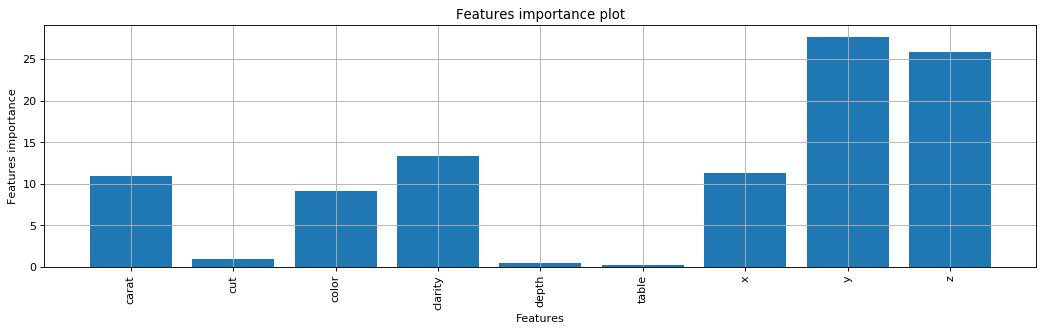

In [23]:
def regression_model_evaluation(true, pred):
    
    V0 = sklearn.metrics.explained_variance_score(true, pred) # Explained variance regression score function
    V1 = sklearn.metrics.max_error(true, pred) # max_error metric calculates the maximum residual error
    V2 = sklearn.metrics.mean_absolute_error(true, pred) # Mean absolute error regression loss
    V3 = sklearn.metrics.mean_squared_error(true, pred) # Mean squared error regression loss
    V4 = sklearn.metrics.median_absolute_error(true, pred) # Median absolute error regression loss
    V5 = sklearn.metrics.r2_score(true, pred) # R^2 (coefficient of determination) regression score function.
    
    scores = [V0, V1, V2, V3, V4, V5]
    results = {'function': ["explained_variance_score", "max_error", "mean_absolute_error", "mean_squared_error",
                            "median_absolute_error", "r2_score"],
               'scores': scores,
               'function description': ["Explained variance regression score", "Maximum residual error",
                                        "Mean absolute error regression loss", "Mean squared error regression loss",
                                        "Median absolute error regression loss", "R^2 regression score"]}
    output = pd.DataFrame(data = results)
    output["scores"] = output["scores"].apply(lambda x: '%.5f' % x)
    return(output)

CatBoost_model_best = CatBoost_model_grid.best_estimator_
Catboost_model_best_train = CatBoost_model_best.predict(X_train)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_best_validation_train_dataset_")
display(regression_model_evaluation(Y_train, Catboost_model_best_train))
CatBoost_model_best = CatBoost_model_grid.best_estimator_
CatBoost_model_best_test = CatBoost_model_best.predict(X_test)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_best_validation_validation_dataset_")
display(regression_model_evaluation(Y_test, CatBoost_model_best_test))
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.best_estimator_")
display(CatBoost_model_grid.best_estimator_)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.best_params_")
display(CatBoost_model_grid.best_params_)
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.best_estimator_Metrics")
display(results[results["params"] == CatBoost_model_grid.best_params_])
print("----------------------------------------------------------------------------------------------------------------------")
print("CatBoost_model_grid.best_score_")
display(CatBoost_model_grid.best_score_)
print("----------------------------------------------------------------------------------------------------------------------")
Importances = pd.DataFrame({'Variable': X.columns,
                            'Feature_Importance': CatBoost_model_grid.best_estimator_.feature_importances_})
display(Importances)
print("----------------------------------------------------------------------------------------------------------------------")
fig = plt.figure(figsize = (16, 4), dpi = 80, facecolor = 'w', edgecolor = 'k')
print("CatBoost_model_best.feature_importances_plot")
plt.bar(x = X.columns, height = CatBoost_model_grid.best_estimator_.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Features importance")
plt.title("Features importance plot")
plt.grid()